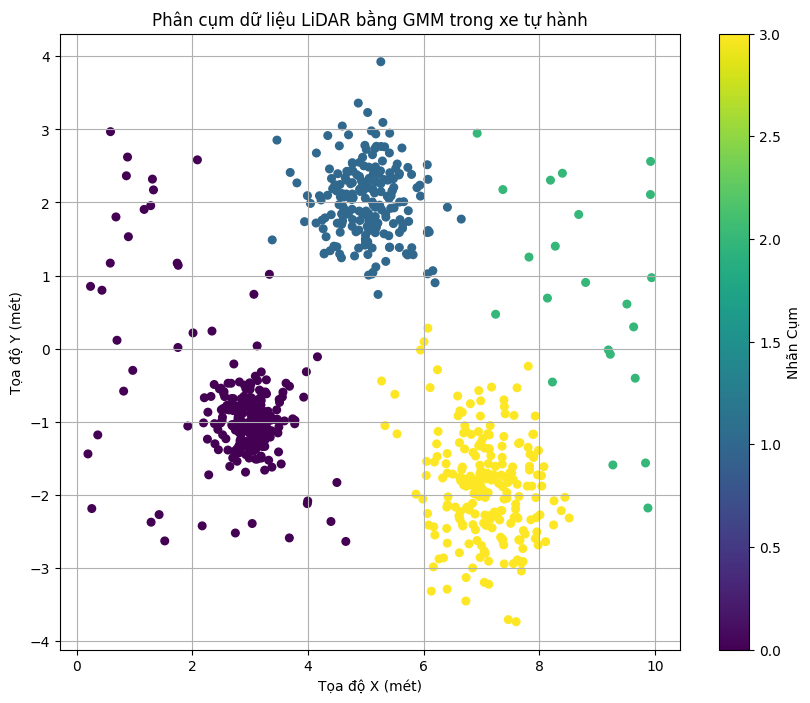

In [1]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# Đặt seed để kết quả có thể tái lập
np.random.seed(42)

# Giả lập dữ liệu LiDAR: Tạo các cụm điểm 2D đại diện cho các đối tượng trong môi trường

# Cụm 1: Một xe khác ở phía trước
n_points = 200
cluster1 = np.random.randn(n_points, 2) * 0.5 + np.array([5, 2])  # Trung tâm (5, 2)

# Cụm 2: Người đi bộ ở bên trái
cluster2 = np.random.randn(n_points, 2) * 0.3 + np.array([3, -1])  # Trung tâm (3, -1)

# Cụm 3: Xe khác ở bên phải
cluster3 = np.random.randn(n_points, 2) * 0.6 + np.array([7, -2])  # Trung tâm (7, -2)

# Nhiễu (noise): Các điểm ngẫu nhiên từ môi trường xung quanh
noise = np.random.uniform(low=[0, -3], high=[10, 3], size=(100, 2))

# Kết hợp tất cả dữ liệu
data = np.vstack((cluster1, cluster2, cluster3, noise))

# Áp dụng GMM với số cụm mong muốn (ở đây giả sử 4 cụm: 3 đối tượng chính và 1 nhóm nhiễu)
gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=42)
gmm.fit(data)
labels = gmm.predict(data)

# Vẽ biểu đồ phân cụm
plt.figure(figsize=(10, 8))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=30)
plt.title("Phân cụm dữ liệu LiDAR bằng GMM trong xe tự hành")
plt.xlabel("Tọa độ X (mét)")
plt.ylabel("Tọa độ Y (mét)")
plt.colorbar(label="Nhãn Cụm")
plt.grid(True)
plt.show()

In [ ]:
from abc import ABC, abstractmethod

class Expr(ABC):
    @abstractmethod
    def printPrefix(self):
        raise NotImplementedError

    @abstractmethod
    def eval(self):
        raise NotImplementedError

class Var(Expr):
    def __init__(self, name):
        self.name = name

    def printPrefix(self):
        return self.name
    
    def eval(self):
        return Number(1)

class Number(Expr):

    def __init__(self, number_thing):
        self.num = number_thing

    def printPrefix(self):
        return str(self.num)

    def eval(self):
        return self

class UnOp(Expr):

    def __init__(self, operator_thing, argument_expression):
        self.operator = operator_thing
        self.arg = argument_expression

    def printPrefix(self):
        return self.operator + " " + self.arg.printPrefix()

    def eval(self):
        value_of_argument = self.arg.eval().num

        if self.operator == '+':
            return Number(value_of_argument)
        elif self.operator == '-':
            return_value = -value_of_argument
            return Number(return_value)
        else:
           raise ValueError("unkonwn operator")

class BinOp(Expr):
    def __init__(self, operator_string, left_expr, right_expr):
        self.operator = operator_string
        self.left = left_expr
        self.right = right_expr

    def printPrefix(self):
      return self.left.printPrefix() + " " + self.operator + " " + self.right.printPrefix()

    def eval(self):

        left_value = self.left.eval().num
        right_value = self.right.eval().num

        if self.operator == '+':
            result_value = left_value + right_value
            return Number(result_value)
        elif self.operator == '-':
            return Number(left_value - right_value)
        elif self.operator == '*':
           return Number(  left_value   * right_value   )
        elif self.operator == '/':
            if right_value != 0:
                 return_this = Number(left_value / right_value)
                 return return_this
            else:
                raise ZeroDivisionError("Dividing by zero. skibidi")
        else:
            raise ValueError('unknown operator')


x = Var("skibidi")
y = Var("u i i a u u i a a a u u i a")
unary_test = UnOp('-', BinOp('+', x.eval(), y.eval()))
print(  unary_test.eval().printPrefix() )

-2


In [ ]:
from abc import ABC, abstractmethod

class Expr(ABC):
    @abstractmethod
    def printPrefix(self):
        raise NotImplementedError

    @abstractmethod
    def eval(self):
        raise NotImplementedError

class Var(Expr):
    def __init__(self, name):
        self.name = name

    def printPrefix(self):
        return self.name
    
    def eval(self):
        return Number(1)

class Number(Expr):

    def __init__(self, number_thing):
        self.num = number_thing

    def printPrefix(self):
        return str(self.num)

    def eval(self):
        return self

class UnOp(Expr):

    def __init__(self, operator_thing, argument_expression):
        self.operator = operator_thing
        self.arg = argument_expression

    def printPrefix(self):
        return self.operator + " " + self.arg.printPrefix()

    def eval(self):
        value_of_argument = self.arg.eval().num

        if self.operator == '+':
            return Number(value_of_argument)
        elif self.operator == '-':
            return_value = -value_of_argument
            return Number(return_value)
        else:
           raise ValueError("unkonwn operator")

class BinOp(Expr):
    def __init__(self, operator_string, left_expr, right_expr):
        self.operator = operator_string
        self.left = left_expr
        self.right = right_expr

    def printPrefix(self):
      return self.left.printPrefix() + " " + self.operator + " " + self.right.printPrefix()

    def eval(self):

        left_value = self.left.eval().num
        right_value = self.right.eval().num

        if self.operator == '+':
            result_value = left_value + right_value
            return Number(result_value)
        elif self.operator == '-':
            return Number(left_value - right_value)
        elif self.operator == '*':
           return Number(  left_value   * right_value   )
        elif self.operator == '/':
            if right_value != 0:
                 return_this = Number(left_value / right_value)
                 return return_this
            else:
                raise ZeroDivisionError("Dividing by zero. gyatttt")
        else:
            raise ValueError('unknown operator')

    
def construct_binop_recursive(operators, operands):
    if len(operands) == 1:
        return Number(operands[0])
    
    left = Number(operands[0])
    right = construct_binop_recursive(operators[1:], operands[1:])
    return BinOp(operators[0], left, right)




operators1 = ['+', '-', '-', '+']
operands1 = [3, 5, 7, 2, 22]
expression1_recursive = construct_binop_recursive(operators1, operands1)
print(f"{expression1_recursive.eval().num}") 


25


: 

In [ ]:
# 出埃及記 
# 在埃及為奴時的祝福 
# 1:11以色列的眾子2，各帶家眷3和雅各一同來到埃及。他們的名字4記在下面：1:2 有流
# 便、西緬、利未、猶大、1:3 以薩迦、西布倫、便雅憫、1:4但、拿弗他利、迦得、亞設。
# 1:5 凡從雅各而生的5，共有七十6人7；約瑟已經在埃及8。1:6 後來9，約瑟和他的弟兄們，並
# 1第一章引出了在埃及為奴的主題（the theme of bondage in Egypt），並顯示
# 出早前對亞伯拉罕（Abraham）、以撒（Isaac）、雅各（Jacob）應許的實現越來
# 越加劇的攔阻。開頭7節宣示了以色列（Israel）在埃及的繁茂，第二段（第8-14
# 節）記述了以色列在敵對下繼續興旺，第三段（第15-21節）解釋了興旺是因為神
# 的眷顧，縱使法老（Pharaoh）想用陰謀來約束人口的增長，最後一節記述暴虐發
# 展到極點，引出以下一段──法老下令公開屠殺男嬰。本章透過人口在惡勢力下興
# 旺顯示出神的大能（the power of God），但是在結尾時事情的發生卻令讀者對神的
# 權能產生疑問──「神能作甚麼？」這是希伯來文學敘事精采之處，它將讀者從緊
# 張帶入緊張，以此彰顯耶和華神的權能和威嚴（the sovereigh power and majesty of 
# the LORD God），卻又指出每一步都需要信心。參D. W. Wicke, “The Literary 
# Structure of Exodus 1:2–2:10,” JSOT 24 (1982): 99-107。 
# 2「以色列的眾子」（the sons of Israel）。希伯來文是 לארשׂי ינבּ (bene 
# yisra’el)，這詞句通常用以代表以色列全國，亦可譯作「以色列人」
# （Israelites）；但傳統用作指「以色列的眾子」。本處特指以色列族長
# （patriarch）的每一個兒子，按名排列。但這詞句也可指他們就是以色列人（參創
# 29:1，「東方人 (eastern people)」直譯作「東方之子 (sons of the east)」）。 
# 3「各帶家眷」（each man with his household）。原文作「各人和他的家」
# （a man and his house）。這詞句用作解釋「以色列的眾子」（the sons of 
# Israel），有着個別的意義。因此，當以色列的眾子」用作指族長的真正兒子，這
# 詞句也包括他們的家屬（參《新國際版》(NIV)，《今日英語譯本》(TEV)，《現代
# 英語譯本》(CEV)，《新普及譯本》(NLT)）。 
# 4「名字」（names）。在希伯來文聖經（the Hebrew Bible），《出埃及
# 記》（the book of Exodus）的書名是「名字 (Names)」（תוֹמשׁ (shemot)）是從本書希
# 伯來文頭二字而出。本處列出名字承接《創世記》（the book of Genesis），為奴的
# 以色列人（Israelites）依然追溯他們的列祖（their ancestry），因而得知神的應
# 許。 
# 5「從雅各而生的」（directly decended from Jacob）。原文作「從雅各腰間
# 所出的」（who went out from the loins of Jacob），指他的嫡系後裔（direct 
# descendants）。 
# 那一代的人都死10了。1:7 然而11以色列人12生養眾多，繁生茂長，極其強盛13，就住滿了那
# 地。 
# 1:8 後來，有不認識約瑟14的一位新王15登位16，治理埃及。1:9 他對百姓說：「你們看
# 17，這以色列民比我們還多，又比我們強盛。1:10來吧，我們不如用智謀18待他們，否則19，
# 6「七十」。創世記第46更詳盡的描述雅各（Jacob）舉家遷至埃及
# （Egypt）。希臘古卷（Greek text）在出埃及記1:5及創世記46:27並兩昆蘭古卷
# （Qumran manuscripts）作七十五人，人數的算法不同。E. H. Merrill和F. Delitzsch
# 指出創世記第46章的名單包括在埃及出生的希斯倫（Hezron）和哈母勒
# （Hamul），並約瑟的兩個兒子（Joseph’s sons）。E. H. Merrill在他的著作
# Kingdom of Priests, 49 說：「這名單不能逐字地追究。」 
# 7「人」（people）。希伯來字 שׁפנ (nefesh) 通常譯作「靈魂」（soul），但本處
# 是指身體加上靈魂的全人，故譯作「生命」（life）或「人」（person）較合意。 
# 8「約瑟已經在埃及」。原文作「和在埃及的約瑟」（and Joseph was in 
# Egypt）（如《美國標準譯本》(ASV)）。指出約瑟與眾弟兄不同，不是和雅各
# （Jacob）同時進入埃及。 
# 9「後來」（in time）。原文作「和」（and）。經文結構顯示這是繼上節之
# 後發生，但不必要是緊接着發生。事實上，讀者們從創世記（Genesis）中知道約
# 瑟在此之後多年才去世。這記述假設了時間隨事件的發生而消逝。 
# 10 「死」（died）。原文是一單數動詞（singular verb），作「約瑟死了，和
# 他的眾兄弟，和那一代的人」。這是典型的希伯來文風格，動詞只須和複合主詞
# （compound subject）的頭一個配合。既然「約瑟和兄弟們並當代的人」死去是自
# 然的事，這裏的記述必有其特意，指出以色列（Israel）在繁茂（flourishing）之下
# 仍有死亡。這主題將會重現：雖然在埃及有死亡，以色列國依然繁茂。 
# 11 「然而」（however）。這反意字點出與第一代人死亡的對比。 
# 12 「以色列人」（Israelites）。原文作「以色列的眾子」（the sons of 
# Israel）。 
# 13 「極其強盛」（extremely strong）。原文連用兩次「非常」（דאמ 
# (me’od)），加強了他們成為強盛的意念。明顯地，經文刻意的描述以色列人在埃
# 及的繁茂。「生養眾多 (be fruitful)」（הרפּ (parah)）、「滋生 (swarm)」（ץרשׁ 
# (sharats)）、「繁生茂長 (multipy)」（הבר (ravah)），和「強盛 (be strong)」（םצע 
# (’atsam)）這一連串動詞承接了創世記創造的記載。經文形容以色列人的興旺
# （Israel’s prosperity）是依照神原先的吩咐，生養眾多，遍滿全地，顯明這興旺是
# 神的本意也有神的祝福。創世時給人類的使命去遍佈及治理全地藉亞伯拉罕的子孫
# （the seed of Abraham）開始實現。 
# 14 「不認識」（did not know about）。本句簡單地指出新王對約瑟
# （Joseph）的事蹟一無所知，同時也引進出埃及記（Exodus）初段的重要主題，日
# 後的法老（Pharoah）宣稱不認識耶和華（Yahweh）。耶和華（the LORD）卻以大
# 能的作為使法老和全埃及都認識祂是真神（the true God）。 
# 他們繼續倍增20，日後若遇甚麼爭戰的事，就連合我們的仇敵攻擊我們，離開21這地去
# 了。」 
# 1:11 於是埃及人派督工22管治他們，用苦工壓制23他們，要他們為法老建造兩座積貨
# 城，就是比東和蘭塞24。1:12只是埃及人25越發壓制他們，他們越發多起來，越發蔓延26，埃
# 15 「一位新王」（a new king）。這「新王」是誰難以考證，因為古以色列
# （ancient Israel）和埃及（Egypt）的年代記（chronology）至今仍有爭辯。根據聖
# 經字意解釋的學者認為雅各（Jacob）下埃及是在主前1876年間，約瑟（Joseph）
# 當宰相的時段應在許克所斯人（the Hyksos）統治埃及之前（主前1720-1520），一
# 切有關約瑟的記載皆是埃及本土的背景而不是許克所斯人的背景。約瑟去世可能是
# 在主前1806年，僅在埃及第十二王朝（the 12th Dynasty of Egypt）結束前數年；這
# 也是埃及中古王國（the Middle Kingdom of Egypt）的結束。許克所斯人（亦是閃族
# 人 (Semites)）和以色列人（Israelites）關係友好，極可能就是1:10所指埃及害怕的
# 敵人。把不認識約瑟的新王看為是強大的第十八王朝（the 18th Dynasty of Egypt）
# 的創始者（亞模西士 (Amosis)，1570-1546）或是早期君王（如杜得模西士一世 
# (Thutmose I)）是合理的事，在新王的統治下，埃及人逐出許克所斯人，重建埃及
# 的主權。新的統治者當然關注境內閃族人口的增加（參E. H. Merrill, Kingdom of 
# Priests, 49-55）。 
# 16 「登位」（came to power）。原文作「興起」（arose）。 
# 17 「看」（look）。法老用（Pharaoh）「看」（הנּה (hinneh)）這分詞將聽
# 者的注意力集中於以色列人（the Israelites），以下的慫恿基於這觀察。這分詞亦
# 可作「由於」，「因為」等。 
# 18 「智謀」。原文這字有盤算之意。埃及人需用「智謀」防止以色列人繼續
# 增多。法老的話有要求評估之意。 
# 19 「否則」。原文 ןפּ (pen) 表達擔憂（fear）或預防（precaution），可譯作
# 「免得」（lest）或「恐怕」（else）。 
# 20 「繼續倍增」（continue to multipy）。原文可簡單地譯作「倍增」
# （multipy），但既然法老（Pharaoh）已經注意到這情況，這字應有「繼續增多」
# 的意味。參《新國際版》(NIV)「變成更多」（become even more numerous）。 
# 21 「離開」（leave）。原文作「從……上去」（go up from）。第10節「否
# 則 (otherwise)」、「免得 (lest)」（ןפּ (pen)）這分詞以後的所有動詞都有相同的動
# 力，都是埃及人（Egyptians）所擔憂（feared）的。這解釋了為何需要狡詐的政策
# （shrewd policy）來控制人口，他們要保留以色列人（Israelites）為奴役，不想他
# 們強盛至可「離開」的地步。 
# 22 「督工」（foreman）。原文作「勞工王子」。希伯來文 ירשׂ (sare) 這字在
# 不同經文有不同的譯法，如：「統治者 (ruler)」、「王子 (prince)」、「領袖 
# (leader)」、「官員 (official)」、「首長 (chief)」、「司令 (commander)」，和「隊
# 長 (captain)」。這字在 2:14; 18:21, 25再度出現。希伯來文一字指 סמ (mas) 強迫勞
# 役的工團（corvée）（申20:11；書17:13；王上9:15, 21）。整個片語譯作「督
# 工」，溶合了監督（oversight）和勞工（labor）之意。參《英王欽定本》(KJV)、
# 及人就厭煩以色列人。1:13 埃及人苛刻地使以色列人做工，1:14 使他們的生活艱苦27；無論
# 是和泥，是做磚，是做田間各樣的工，在一切的工上都苛刻地待他們。 
# 《新美國聖經》(NAB)、《新美國標準譯本》(NASB)、《新修訂標準譯本》(NRSV) 
# 作「工頭 (taskmasters)」，《新國際版》(NIV) 作「監工 (slave masters)」，《新普
# 及譯本》(NLT)作「監工 (slave drivers)」。 
# 23 「壓制」（oppress）。動詞 וֹתנּע (’annoto) 出自 הנע (’anah)，是「壓制」
# 之意，這字的意義相當廣。本處可包括身體的虐待（physical abuse）、抑制
# （forced subjudgation），和屈辱（humiliation）。法老以勞役消磨以色列人
# （Israel）的意志，本段用以形容此企圖的其他字有「艱苦」（bitter）和「壓榨」
# （crushing）。 
# 24 「蘭塞」（Rameses）。許多學者認為城既定名為「蘭塞」，當時的法老
# （Pharaoh）必是蘭塞二世（Rameses II），因此就證實了出埃及是較後的年代。但
# 將經文內的細節詳加排列便發現事非如此。假如當時是蘭塞二世在位，也是他壓制
# 以色列人（Israel），就必須注意到當時摩西（Moses）尚未出生，建蘭塞城需時廿
# 多年，之後再八十多年摩西才去見法老（蘭塞），再加兩年的十災（the 
# plagues），那這人就當了法老超過100年。歷史上的蘭塞二世卻非如此。更有決
# 定性的事實是無論這位法老（以色列人在他令下建兩城市的法老）是誰，他在摩西
# 開始十災時已經死去；聖經記載摩西長大殺了埃及人後，便在法老（無論是那一
# 位）面前逃跑，流落外地，直至聽到法老去世的消息。因此本節不能用以確定出埃
# 及的年代，除非不顧及本章其他的細節。又假如當時壓制以色列人的法老是蘭塞，
# 那他的繼承人就成了出埃及時的法老。蘭塞在主前1304-1236年統治埃及，然後由
# 馬尼他（Merneptah）繼位，這樣又將出埃及的年代推得太後，因為馬尼他碑文
# （Merneptah stele）指以色列是建立在自己土地的國家。因此我們必須看本章的蘭
# 塞是指早期的王，或更可能的是，敘事者將日後的名稱記進去（建造時有別的名
# 稱，日後蘭塞法老完工後改用己名。參B. Jacob, Exodus, 14）。詳細的討論可參G. 
# L. Archer, “An 18th Dynasty Ramses,” JETS 17 (1974): 49-50 和 C. F. Aling, “The 
# Biblical City of Ramses,” JETS 25 (1982): 129-37；第 11-14 節可參 K. A. Kitchen, 
# “From the Brick Fields of Egypt,” TynBul 27 (1976): 137-47。 
# 25 「埃及人」（the Egyptians）。原文作「他們」（they），譯作「埃及
# 人」以求明晰。 
# 26 「越發蔓延」。「蔓延」（spread）當然不是出自壓制（oppression），
# 卻是神對以色列人的祝福（創12:1-3），縱然埃及人（the Egyptians）用盡辦法攔
# 阻。神在創世記第15章已經預告了這段壓制時期（הנע (’anah)，創15:13），換言
# 之，神早已命定又預告了以色列受壓制，同時又要成為大國，顯示出雖然以色列人
# 在困鎖中，神可以成就祂對亞伯拉罕（Abraham）的應許。 
# 27 「艱苦」（bitter）。動詞 ררמ (marar) 預示了守逾越節（the Passover）規
# 條中「苦」的主題。 
# 1:15 有兩個希伯來接生婦人28，一名施弗拉，一名普阿。埃及王對她們說：1:16「你們
# 為希伯來婦人接生，看她們臨盆的時候，若是男孩，就把他殺了29；若是女孩，就可以存
# 活。」1:17但是接生婦人敬畏 神，不照埃及王的吩咐行，存了留男孩的性命。 
# 1:18 埃及王就召了接生婦人來，說：「你們為甚麼做這事，存留男孩的性命呢？」1:19
# 接生婦人對法老說：「因為希伯來婦人與埃及婦人不同，希伯來婦人本是健壯的，接生婦
# 人還沒有到，她們已經生產了！30」1:20 因此 神厚待31接生婦人。以色列人又多起來，極
# 其強盛。1:21接生婦人因為敬畏 神， 神便為她們成立家室32。 
# 1:22 法老又吩咐他的眾民說：「所有33出生的男孩，你們都要丟在河裏；所有的女孩，
# 你們可以存留性命。34」 
# 拯救者的誕生 
# 2:135有一個利未家36的人，娶了一個利未女子37為妻。2:2 那女人懷孕，生了一個兒子，
# 見他健壯38，就藏了他三個月。2:3 後來不能再藏，就取了一個蒲草籃子39，抹上石漆和松
# 28 「接生婦人」（midwives）。以色列人（Israelites）的數目不是兩個接生
# 婦人可能應付的，因此她們可能是希伯來接生婦人的主管。《七十士譯本》(LXX) 
# 及《武加大譯本》(Vulgate Version) 都不將「希伯來」用作形容詞，譯作「希伯來
# 的接生婦人」（midwives of/over the Hebrews）。這譯法表示這些婦女不一定是希
# 伯來人，也解釋了法老差使她們的疑問──法老怎能要求希伯來接生婦人殺死希伯
# 來的嬰孩。不過，這兩人卻有希伯來名字。 
# 29 「把他殺了」。殺男嬰這命令顯然是暫時性或局部性的，否則希伯來人口
# 就停止增長了。也可能法老下令前沒有想清楚，只是暫用此計以遏止人口的增長。
# 經文無意作詳細交代，只藉此描繪這存心不良的法老要毀滅以色列（Israel）。 
# 30 本段落的論點是接生婦人（the midwives）尊敬神過於埃及王，她們服從
# 至高的權威，不作殺人的事。敬畏神是真信心的基礎，引領人順服神的行動而無視
# 於世界的威脅（worldly threats）。她們說的可能是事實，但明顯地她們無意與埃
# 及王同流合污幹殺人的勾當，因此沒有給王直接的答案。神對她們的行動看為美。 
# 31 「厚待」（treated well）。神「厚待」接生婦人是因為她們敬畏順服神。 
# 32 「成立家室」（made household）。這是第二次經文肯定她們的與別不
# 同，她們對神的敬畏。 
# 33 「所有」。文法結構強調全部，即所有男孩，所有女孩；縱使原文名詞是
# 單數。 
# 34 第22節是全章的高潮，指埃及王不斷謀求粉碎以色列（Israel）的實力。
# 終於他頒佈了這公開滅絕希伯來男性（Hebrew males）的命令。本節過渡入下章，
# 摩西（Moses）被法老自己的女兒所救。這兩章顯出埃及王盡力要摧毀以色列的實
# 力，卻再三的受到挫折（明顯地這是神的作為），而這些挫折都是來自法老不認為
# 是威脅的女人。 
# 35 本章記載摩西（Moses）在法老屠殺的頒令（the decree of death）異常的
# 生存（第1-10節），摩西殺死埃及人後的逃亡（第11-15節），摩西的婚姻（第
# 16-22 節），最後以神聽到奴役中子民的哀求為結束（第23-25節）。第一部分是
# 摩西的誕生。聖經中有幾個故事，記述命定為以色列領袖的特殊或神蹟般的誕生和
# 脂，將孩子放在裏頭，把箱子擱在尼羅河邊的蘆葦叢中40。2:4 孩子的姐姐遠遠站着，要知
# 道他究竟怎麼樣。 
# 2:5 法老的女兒41來到河邊洗澡，她的使女們在河邊行走42。她看見蘆葦中的箱子，就打
# 發一個婢女43拿來。2:6 她打開箱子，看見那孩子。孩子在哭44，她就憐憫45他說：「這是希
# 伯來人的一個孩子。」 
# 拯救，這些事蹟印證了他們的使命。假如這些人物一開始就得到神的供應和保護，
# 他們的使命就必定從神而來。在本章，因着婦女的不遵命，這計劃規避法老屠殺嬰
# 孩的頒令。第二部分記載摩西的逃亡和婚姻。本章以好的開始介紹了拯救者摩西
# （Moses the deliverer），接着記載這拯救者怎樣因驕矜莽撞的行為而需要逃亡。神
# 意願中的拯救必定是超自然的（supernatural），本章末神應允禱告就闡明了。 
# 36 「利未家」（the household of Levi）。即「利未族」（the tribe of Levi）。 
# 37 「利未女子」。原文作「利未女兒」（a daughter of Levi）。「女兒」的
# 使用有「後裔」（descendant）之意，承接1:22法老頒令後新的記載。本段的首部
# 分記敘嬰兒的收藏（第1-4節）。結婚，生產，藏嬰，米利暗（Miriam）的跟蹤，
# 都是信心的行動，漠視或規避法老的頒令，以保存嬰孩的性命。 
# 38 「健壯」（healthy）或作「俊美 (fine)」（בוֹט (tov)）。本處的結構和創造
# 時的描述平行（「神看着是好的」，創1:4, 10, 12, 18, 21, 25, 31）。B. Jacob在著
# 作Exodus, 25說：「她看着兒子的喜樂和神看着祂的創造相似（創1:4起）。」 
# 39 「籃子」（basket）。本字別處只用於挪亞的方舟（the ark of Noah），它
# 可能和埃及文的「箱子」（chest）有關。關於這「籃子」的意義可參C. Cohen, 
# “Hebrew tbh: Proposed Etymologies,” JANESCU 9 (1972): 36-51。 
# 40 學者曾多次將拯救嬰孩摩西（the child Moses）的情景和撒珥根神話
# （Sargon myth）作比較。參R. F. Johnson, IDB 3:440-50和 L. W. King, Chronicles 
# concerning Early Babylonian Kings, 2:87-90。同意本敘述使用撒珥根（Sargon）故事
# 模式者指出摩西的遭遇正和古代期待成大事者或救贖者的遭遇相應。在撒珥根的故
# 事中，嬰孩的母親將他放在籃子中順河水流去，後來得諸神的眷愛而成就大業。若
# 說以色列人用這故事虛構《出埃及記》的記載，那就破壞了本書的可信度。撒珥根
# 故事還有其他不足比較的難題，至少這故事的意義和功用並不清楚。其次，嬰兒撒
# 珥根並沒有外來的威脅，故事只簡單地說一個孩子被遺棄，被拯救，蒙養育，最後
# 作王（參B. S. Childs, Exodus [OTL], 8-12）。第三，其他的細節不吻合：摩西有生
# 父，撒珥根沒有；摩西不是被遺棄，因為他的父母日後一直照顧他；覓得摩西的是
# 公主，不是女神。況且，沒有清楚知道撒珥根故事的實意和功用，根本不能解釋聖
# 經記載以此為摹仿。從簡單的角度看，一個母親想兒子被找到而將他放入河中是可
# 理解的，因為河邊是城內婦女洗衣沐浴的地方；盼望嬰兒能被好心婦人收養，放入
# 河中確是良策（R. A. Cole, Exodus [TOTC], 57）。敘述故事不必隨流，但出埃及記
# 第2章可能會借用其他記載的主題和格式來描寫摩西獲救的真實事蹟（假如他們知
# 道這個）。若是如此，摩西就被丟進古代偉人的範疇。 
# 41 「法老的女兒」（the daughter of Pharaoh）。無法確定這人是誰。對於認
# 為當時的法老是「蘭塞」（Rameses）者，「蘭塞」有許多女兒。次經《禧年書》
# 2:7 孩子的姐姐對法老的女兒說：「我去在希伯來婦人中找46一個奶媽來，為你奶這孩
# 子47，可以不可以？」2:8 法老的女兒說：「可以48。」童女49就去找了孩子的母親來50。2:9
# （Jubilees）47:5稱她為「帖模斯」（Tharmuth）；約瑟夫（Josephus）在《猶太古
# 史》（Jewish Angiquities）拼寫為「帖模提斯」（Thermouthis）（Ant. 2.9.5 
# [2.224]）；但猶西比烏（Eusebius）認為是「梅歷斯」（Merris）；E. H. Merrill在
# Kingdom of Priests, 60 一書中頗有理由的分析她是杜得模西一世（Thutmose I）的女
# 兒，聞名的「赫斯蘇特」（Hatshepsut），她在歷史上出現的時間是在摩西誕生的
# 年代，而史籍中對她的描述顯明這位公主有足夠的膽量違抗父命。 
# 42 「在河邊行走」。這是皇家隨員（royal entourage）來到河的支流，當公
# 主在河裏沐浴時，宮女們「在河邊行走」迴避。她們可能看不到以下的發現或對
# 話。 
# 43 「婢女」。原文作「女奴 (female slave)」（המאָ (’amah)）。以上譯作「使
# 女」的是「少女 (young woman)」（תרענ (na’arot)）。皇家隨員中可能有不同的僕
# 人和侍從。 
# 44 「孩子在哭」。原文以「看哪 (behold)」（המאָ (’amah)）開頭，引出法老
# 女兒打開籃子所意料不到的──一個嬰孩在哭。本句提供重要的補充資料，將讀者
# 放在她的位置，與她同看，也一同感受她憐憫的心。 
# 45 「憐憫」（felt compassion）。她對孩子憐憫的心強至可以違抗王命，把
# 他從死亡的頒令中救出來。這裏諷刺的是：一般人認為「憐憫」是女性的弱點，但
# 這情感卻強至可以違抗法老（Pharaoh）的命令。埃及王以為放過女性是安全的舉
# 動，但接生婦人，希伯來母親，法老的女兒，米利暗（Miriam），卻合作救了摩西
# （參林前1:27-29）。 
# 46 「找」。原文 ארק (qara’) 是「叫」（to call），或「傳召」（to summon）
# 之意。日後法老（Pharaoh）在十災時期多次「傳召」摩西（Moses）。本處是女
# 兒「傳召」母親來照顧摩西。《出埃及記》（The book of Exodus）前段有許多對後
# 段事蹟的預示（參M. Fishbane, Biblical Text and Texture）。第 8節同。 
# 47 「奶這孩子」（nurse the child）。當時有身分的埃及婦女（Egyptian 
# woman）不會為外族嬰兒哺乳，因此米利暗（Miriam）的建議是合適而又必須的。
# 米利暗當時站在不遠之處，故在孩子被發現時可以立即上前。 
# 48 「可以」。原文作「去」（如《新國際版》(NIV)；《美國標準譯本》
# (ASV)）。《新美國標準譯本》(NASB) 作「請去」。 
# 49 「童女」（young girl）。用作描寫姐姐（可能是米利暗 (Miriam)）的希伯
# 來字是 המלע (’alma)，與以賽亞書7:14同一字，一般譯作「處女」或「少女」。這
# 字基本的意思是達到婚嫁期的女子，這就可顯出米利暗大於摩西（Moses）十五年
# 左右。 
# 50 當時的皇宮建於埃及的北區或三角洲地帶（Delta area），不是日後在尼
# 羅河（Nile）的上游。皇宮和以色列人的居所相近，故日後十災的時期的描寫更有
# 真實感。假如摩西每次要沿河上皇宮，那面對面的接觸就幾乎不可能了。三角洲一
# 法老的女兒對她說：「你把這孩子抱去，為我奶他，我必給你工價。」婦人就抱了孩子去
# 奶他。 
# 2:10 孩子漸長51，婦人把他帶到法老的女兒那裏，就作了她的兒子。她給孩子起名叫摩
# 西，意思說：「因我把他從水裏拉出來。52」 
# 帶事物都靠近，百姓和皇家都能住在尼羅河的支流上，但皇家可能有行轅和行獵宮
# 等等。 
# 51 「漸長」（grew older）。原文是 לדגּ (gadal)，可指「他成為重要人物」
# （he became great）。但文義似指他長至斷奶、還未定名的時候，可能是三、四歲
# 之間（參創21:8）。 
# 52 起名成了本故事的高潮（climax），亦是一個概略（summary）。「摩西 
# (Moses)」（השׁמ (mosheh)）這名字被解釋為「我把他從水裏拉出來」（I have 
# drawn him (וּהתישׁמ, meshitihu) from the water），但從字源學的角度
# （etymologically），這名字似乎連於句子中從「拉出 (to draw out)」（השׁמ 
# (mashah)）而來的動詞。但解經家對法老女兒用希伯來文解釋這名字頗為困擾，因
# 故事全是埃及背景（U. Cassuto, Exodus, 20）。再者，這名字的希伯來拼寫是主動
# 語態分詞（active participle）格式（「拉出者 (the one who draws out)」），正確的
# 形容則應拼寫為 יוּשׁמ (mashuy)，是被動語態分詞（passive participle）格式（「被拉
# 出者 (the one drawn out)」）。這字源（etymology）不十分精確，相反，它是一相
# 關語（wordplay）（稱作「同音異字」(paronomasia)）。可能是敘事者將名字的解
# 釋算為公主所說（真實報導不大可能有此用法）或是希伯來的記載只是將公主所說
# 的翻譯成希伯來文，找出一個和名字發音相近的動詞。這種音譯名字（包括通用語
# 源）在聖經中常見。多數學者同意這是埃及名字，約瑟夫（Josephus）在《猶太古
# 史》（Jewish Angiquities）試將聖經的字源連於這名字的希臘文寫法Mouses，解釋
# mo是埃及文的「水 (water)」字，而uses是「從中被救出者 (those rescued from 
# it)」之意（Ant. 2.9.6 [2.228]，同參 J. Gwyn Griffiths, “The Egyptian Derivation of the 
# Name Moses,” JNES 12 [1953]: 225）。但名字的解釋不能從希臘文而來。因着埃及
# 人對尼羅河（Nile）的敬重，公主可能想到從河裏而來的嬰孩是上天所賜。埃及象
# 形文字（hieroglyphic）ms可以是名詞「孩子 (child)」或完成式動詞「被生下 (be 
# born)」。名字常與天意有關：Ptah-mose解作「蒲他誔生 (Ptah is born)」；「蘭塞 
# (Rameses)」（埃及文作R’-m-sw）是「（天神）Re’ 是將他生下那位 ([the god] Re’ 
# is he who has born him)」之意。若名字「摩西」是埃及文有語言學上的困難
# （philological difficulties）（參以上論述）。以上種種的重點在於當孩子被公主定
# 名時用上了埃及文的ms，就是「孩子」或「出生」之意，這名字可能更長，也許
# 和天神有關，如「某某神的孩子」（child of [some god]）。取這名的動機出於她從
# 埃及生命之源的尼羅河拉他出來，但名字的發音令希伯來人想起自己語言中的動詞
# 「拉出」。將公主的話譯成希伯來文，這相關語因着名字的發音捕捉到故事的重
# 點。對以色列人來說：「妳根據妳的文字和風俗給他取名為「出生的一位 (born 
# one)」，但在我們的文字這名是「拉出 (drawing out)」，是他將要作的。妳從水裏
# 拉他出來，但他要經過水拉我們出埃及。」這故事顯出摩西是承天命的（a man of 
# 拯救者的魯莽 
# 2:1153摩西長大了54。一日，他出去到他弟兄55那裏，察看56他們的苦工，看見一個埃及
# 人毆打57一個希伯來人，他本族的人58。2:12 他左右觀看59，見沒有人，就把埃及人打死60
# 了，藏在沙土裏。2:13 第二天他出去，見61有兩個希伯來人爭鬥，就對那犯錯的人62說：
# 「你為甚麼打63你同族的人64呢？」 
# destiny），這定名的插曲概述了神怎樣眷顧以色列人。這名字將這位偉大的拯救者
# 生平初期事蹟的預兆永誌在以色列人心裏。 
# 53 第1章描寫以色列（Israel）在捆鎖下興旺；第2章先述神如何護佑了這
# 位拯救者（the deliverer），但現在這位拯救者想要拯救一個同胞，結果事非所
# 願，自己反要逃命。本段頗有意味的描寫這位領袖的魯莽（presumption），正是基
# 督教解經家（Christian expositors）正確的解釋為以血氣企圖完成神的作為。本段
# 分為兩部分：拯救失敗後逃離埃及（第11-15節），和摩西（Moses）在米甸
# （Midian）得悉身為救贖者的定命（第16:22節）。 
# 54 「長大了」（had grown up）。與第10節「漸長」同一字，該處是「他開
# 始長大」之意，本處是「他已經長大了」。 
# 55 「弟兄」（brothers）。這名稱不必是同胞兄弟或親屬，它簡單的指同族
# 的希伯來人（fellow Hebrews）。摩西（Moses）開始對族人有親切感，他們是廣義
# 的「弟兄」，最終指約裏羣體（covenant community）的成員。 
# 56 「察看」（observed）。原文作「看看 (to see)」（האָר (ra’a)），文法結構
# 可指以管工、監督，或調查的身分察看。本處強調摩西（Moses）不是僅是看見希
# 伯來同胞們（fellow Hebrews）的處境，而是以同情和惻隱的目光來察看他們的勞
# 役（參2:25）。摩西察看的行動表示他開始瞭解到自己拯救他們的使命。本節敘
# 述摩西看見他們的苦情，下段記載神也看到了。 
# 57 「毆打」（attacking）。原文動詞 ךְיּו (vayyakh) 出自字根 הכנ (nakha)，是
# 「毒打，痛打，攻擊」之意，亦可用作「殺害 (killing)」（如下節，摩西藏屍於沙
# 土），但本處並不指埃及人（the Egyptian）殺了那希伯來人（the Hebrew）。 
# 58 「本族的人」。原文作「弟兄」。這同位子句（appositional clause）顯示
# 摩西（Moses）對這事件關注的原因。 
# 59 「左右觀看」。原文 הכו הכּ ןפיּו (vayyifen koh vakhoh) 是「環視」之意。
# 可指摩西（Moses）要確定無人看到他所作的，或如B. Jacob, Exodus, 37-38（引用
# 賽59:15-16）的論點：摩西看不到有人伸張正義（to do justice），就挺身而出。 
# 60 「打死」（attacked）。原文動詞 ךְיּו (vayyakh) 出自字根 הכנ (nakhah)（第
# 11 節所用的「毆打」同字）。本處的「毆打」是致命的（fatal）。重複使用這動
# 詞，特別是在出埃及記（Exodus），預示了「以牙還牙，以眼還眼」的立場。問題
# 是摩西（Moses）無權這樣執行公義。第14節的問題就非常恰當了：「誰立你作
# 我們的首領和審判官呢？」答案是：沒有，尚未有。 
# 61 「見」。這指示質詞（deictic particle）用作指出「這裏」或「那裏」之
# 意。但也可用 הנּה (hinneh) 作顯出他所遇的突然，如「噢，你看」。 
# 2:14 那人說：「誰立你作我們的首領和審判官呢？難道你要殺我，像殺那埃及人
# 嗎？」摩西便懼怕，他想65：「我作的66必是被人知道了。」2:15法老聽見這事67，就想殺摩
# 西，於是摩西躲避法老，逃往米甸68地居住，定居69在一個井70旁。 
# 2:16 米甸的祭司有七個女兒。一日，她們來打水，要打滿槽，飲父親的羣羊。2:17 有
# 牧羊的人來把她們趕走71，摩西卻起來保護她們72，又飲了她們的羣羊。2:18 當她們回到父
# 62 「犯錯」（in the wrong）。原文是法律名詞（legal term），指犯罪的一
# 方（guilty）。「犯錯」的人拒絕摩西（Moses）調停的理由和日後法老
# （Pharaoh）所用的（5:2）相同：不承認他的權威。稍後法老用同一字宣告自己是
# 在「犯錯」的一方而神是在「對」的一方。 
# 63 「打」。本段第三次使用這字。本處是未完成時式，可能是摩西
# （Moses）調停時，打鬥仍在進行中。 
# 64 「同族的人」（fellow Hebrew）。原文作「鄰舍 (neighbor)」（ ר
#  ך
#  ָע 
# (re’ekha)）。這字在 33:11重現，描寫神和摩西（Moses）對話時的無拘無束。律
# 法（the Law）定下許多以色列人（Israelites）如何對待鄰舍或本族人（neighbors , 
# fellow citizens）的規條（出 20:16-17; 21:14, 18, 35; 22:7-11, 14, 26；參路 10:25
# 37）。 
# 65 「他想」。原文作「他說」，是對自己說之意，故譯作「他想」 
# 66 「我作的」（what I did）。原文 רבדּה (haddavar) 作「這字（事情，事
# 件）（this word [thing, incident]）」，指的是摩西（Moses）所作的，故譯作「我
# 作的」以求明晰。 
# 67 「這事」。原文 רבדּה (haddavar) 作「這字（事情，事件）（this word 
# [thing, incident]）」，指的是摩西（Moses）所作的。 
# 68 「米甸」（Midyan or Midian）。實址不詳，但必是埃及境外（beyond the 
# Egyptians borders）東面的地方，可能是西奈（Sinai）或更遠的亞拉巴（Arabah）
# （死海 (Dead Sea) 以南），甚或在亞喀巴灣（Gulf of Aqaba）的東岸。「米甸」
# （Midianites）人似常在沙漠地帶往來。R. A. Cole (Exodus [TOTC], 60) 認為「米
# 甸」人日後既是以色列（Israel）的敵人，他們的風俗應不會影響以色列偉大的立
# 法者（the great lawgiver）；其次，他認為「以實瑪利人」（Ishmaelite）和「基尼
# 人」（Kenite）可能是米甸區域的部落。不同的觀點可參G. W. Coats, “Moses and 
# Midian,” JBL 92 (1973): 3-10。 
# 69 「定居」（settled）。原文動詞可作「坐下」（sat）或「居住」
# （lived）。譯作「坐在井旁」似將敘述從高峰拉了下來，亦和上文不連接。它可能
# 和上句（他在米甸居住）有相同的意思，住在一個井旁，這細節為下句鋪路。 
# 70 「一個井」（a certain well）。原文有定冠詞，作「那井」（the well）。
# 格澤紐斯（Gesenius）指出使用冠詞表示當時的人知道而讀者尚未知的事物（GKC 
# 407-8 §26.q-r）。有井的地方就有人居住，R. A. Cole說住在井旁的人都稱自己的
# 井為「那井」。 
# 親流珥73那裏，他說：「今日你們為何來得這麼快74呢？」2:19 她們說：「有一個埃及人救
# 我們75脫離牧羊人的手，他竟76為我們打水飲了羣羊。」2:20 他對女兒們說：「那個人在那
# 裏77？你們為甚麼撇下他？你們去請他來吃飯78。」 
# 2:21 摩西同意79和那人同住；那人把他的女兒西坡拉給摩西為妻80。2:22 西坡拉生了一
# 個兒子，摩西給他起名叫革舜，意思說：「因我在外邦作了寄居的81。」 
# 71 「趕走」（draw away）。原文動詞是 םוּשׁרגיו (vaygorshum)。牧羊的人來
# 趕走祭司的女兒，選用這動詞和摩西（Moses）長子的名字「革舜」（Gershom）
# 有關連。摩西清楚知道自己是異地寄居的人（a sojourner），他也曾被「趕走」。 
# 72 「保護她們」（defended them）。原文作「救了她們 (saved them)」
# （םוּשׁרגיו (vaygorshum)），是他來拯救了她們之意。敘事者的選字描繪了摩西
# （Moses）是拯救者（the deliverer），只是他尚未裝備完成去拯救以色列
# （Israel）。 
# 73 「流珥」（Reuel）。本處稱他「流珥」，別處（如第18章）稱他為「葉
# 忒羅 (Jethro)」（參《現代英語譯本》(CEV)，本處亦用「葉忒羅」）。有的認為
# 這是口傳的的混淆，但古代人，如示巴諸王（Sabean kings）和祭司們，常有多個
# 名字；幾個以色列王（kings of Israel），包括所羅王（Solomon），也是一樣。
# 「流珥」是「神之友」（friend of God）之意。 
# 74 「這麼快」（so early）。本處應注意兩點：首先是井旁的遭遇似是經常
# 發生的事，故父親對他們的早歸感到驚訝，而她們的回答提及牧羊人也是自然的
# 事。其次，這故事是另一個「井旁相遇」（meeting-at-the-well）的記載，讓讀者記
# 住這和列祖的經歷是連貫的。 
# 75 「救我們」（rescued us）。接續着摩西（Moses）是拯救者（the 
# deliverer）的主題，經文現轉用另一字「救援 (rescue)」（לצנ (natsal)）作「救贖」
# （salvation），是救拔，拯救出險之意。 
# 76 「竟」（actually）。原文 הלֹדּ הלד (daloh dalah) 是完成時態（perfect 
# tense）和獨立不定詞（infinitive absolute）連用，這文法結構有強調之意。B. Jacob 
# (Exodus, 41) 說：「她們使用獨立不定詞表達她們的激動：試想想，他竟為我們打
# 水，一個大男人為我們小女子服務。」 
# 77 「那個人在那裏」。流珥（Reuel）的問題之意是：「這人既然作了這麼
# 多，為甚麼不帶他來讓我見見？」 
# 78 「飯」。原文作「餅」，指食物。 
# 79 「同意」（agreed）或作「願意」（was willing）。《他勒目》
# （Talmud）理解這「同意」有宣誓的成分，因此到離開的時候，摩西（Moses）先
# 要得神的吩咐又要得岳父的允許（4:18-19）。 
# 80 「為妻」（in marriage）。原文無此字眼，但有此含意，加添以求明晰。 
# 81 「革舜」（Gershom）。和摩西（Moses）的定名一樣，這名字包含着發
# 音方面的相關語（phonetic wordplay），記念上段所述的事蹟。摩西似乎已經定居
# 下來，與妻子和岳父過着家居的生活，但長子誕生時，他卻起名為「革舜」（ גּ
#  םשׁר 
# 拯救者蒙召 
# 2:2382過了多年83，埃及王死了。以色列人84因做苦工歎息，他們哀求，絕望的哀聲達於 
# 神。2:24 神聽見他們的呻吟85， 神記念86他與亞伯拉罕、以撒、雅各所立的約。2:25 神
# 看到以色列人， 神也體諒87…… 
# (gereshom)）。關於名字本身意義的資料不多，若將它和早前所用動詞「趕走 
# (drive away)」（שׁרג (garash)）連結，那末後的字母 mem (מ) 應解釋為附屬的mem
# （enclitic mem）。更可能的是，本文用這動詞為名字構成一個次要的相關語（a 
# secondary wordplay）。主要的解釋來自摩西提供的字源（etymology），他將名字
# 連在動詞「寄居 (sojourn)」（רוּגּ (gur)），然後用分詞（רגּ (ger)）說自己是外地的
# 「寄居者」（a sojourner in a foreigh land），「外地 (foreigh)」（היּרכנ 
# (nokhriyyah)）一字增添了他異鄉作客的感覺。名字末後的發音連於副詞「那裏 
# (there)」（םשׁ (sham)），故這名字表達出「在那裏寄居」（sojourn there）故事的
# 意義。摩西自然知道這不是名字的真正意義，它已經被引入利未的家庭（the family 
# of Levi）（代上 6:1, 16）。他選用這名取其發音表達了他當時的心境，但他所指的
# 是甚麼呢？根據閃族人（Semites）起名的風俗，他極可能認為米甸（Midian）是異
# 鄉；假如埃及（Egypt）是異鄉，摩西既找到了自己的地方，就不能看米甸是異鄉
# 了。起名往往反映了個人現在或近時的體會，或是對將來的盼望，因此摩西起這名
# 清楚的表達出他知道本地不是他應住的地方，新約的司提反（Stephen）也支持這
# 點（徒7:29）。因此，名字的選定、解釋、相關語等，都刻意指出摩西曾經從他
# 應在的地方被逐出。 
# 82 本書以下的一段常被稱為「摩西的蒙召」（Call of Moses）。這誠然是恰
# 當的，但內容不慬是蒙召，也是神對一個知道自己命運之僕人的準備。在本段，神
# 向摩西顯示他一生的功業如何完成；能夠成就是因為神的同在（the divine 
# presence）保證了成事的能力，而神同在的應許來自那重要的啟示：「我是」（I 
# AM）。（中譯者按：《和合本》譯作「我是自有永有的.」）本段和他處「我必與
# 你同在」之記載的信息是：以信心配合神的同在，神的僕人對當前的任務就可以建
# 立自信。問題不再是「我是誰竟能去」（Who am I that I should go），關鍵是
# 「『我是』與你同在」（I AM with you）。第一小段（2:23-25）作為轉語和簡介，
# 因它記載了神對以色列人（Israel）苦難中哀求的回應。第二小段焚燒荊棘給摩西
# 的啟示（3:1-10），這是《妥拉》（Torah）中最重要的神學段落（theological 
# sections）之一。最後，摩西以推搪作回應的記載構成第三小段（3:11-22），亦由
# 此轉入下一段神引證祂的大能。 
# 83 「多年」或作「一段長的時間」。 
# 84 「以色列人」（Israelites）。作「以色列的眾子」（the sons of Israel）。 
# 85 「呻吟」（groaning）。這描寫極度痛苦呻吟的字出現在他處經文，形容
# 斷了雙臂的人的反應（結30:24）。 
# 86 「聽見，記念」（heard, remember）。這兩個動詞都是過去時態，他們的
# 內涵比字面所表達的深遽。「聽見 (to hear)」（עמשׁ (shama’)）通常包括「聽見」
# 後的反應，甚至在成語的結構中用作「服從」（to obey）。神「聽見」他們的怨聲
# 3:1 那時摩西88牧養他岳父米甸祭司葉忒羅的羊羣。一日，領羊羣往曠野的遠處89去，到
# 了 神的山，就是何烈山90，3:2 耶和華的天使91從荊棘裏的火燄中92向摩西顯現93。摩西觀
# 就是神有了回應。同樣地，「記念 (to remember)」（רכז (zakhar)）就是對所「記
# 起」的開始行動。對神的禱告說「求祢記念我」不是求神「記起」這麼簡單（參B. 
# S. Childs, Memory and Tradition in Israel [SBT], 1-8）。本章結尾的結構是強而有力
# 的，四種對以色列人的描寫引出神四重的回應。以色列人方面，他們歎息
# （groaning）（原文是 חנאָ (’anakh) 和 הקאָנ (ne’aqah)），他們向神哀求（cried out）
# （原文是 קעז (za’aq) 和 העושׁ (shav’ah)）；另一方面，神「聽見 (heard)」（עמשׁ 
# (shama’)）他們的嘆息，「記念 (remember)」（רכז (zakhar)）祂的約，「察看 
# (looked at)」（האָר (ra’ah)）以色列人，又「注意到 (took notice of)」（עדי (yada’)）
# 他們。這四個動詞強調神對祂子民的同情和憐憫，神在有需要的人的附近；事實
# 上，拯救者（the deliverer）已被選定。重要的是，本處重複的使用「神」（God）
# 字，經文正要以特殊的方式引出「耶和華」（Yahweh）的名號。同時，第24-25節
# 「神」字的四重使用並非尋常，是刻意指出神對以色列人苦況（Israel’s plight）關
# 注的記載。 
# 87 「體諒」（understood）。原文作「知道 (knew)」（עדי (yada’)）。最後一
# 句用了常用的動詞「知道」，但它並無受詞（object），故所「知道」的可包括第
# 23-24 節所描述的。（許多現代譯本根據《七十士譯本》(LXX) 加上受詞「他
# 們」；《和合本》加上「他們的苦情」。）本處的概念似乎是神親自「知道」、
# 「注意」、「顧念」他們，他處經文「知道」的意義和「拯救」、「憐憫」相近，
# 特別是創世記18:21，詩篇1:6; 31:7，和阿摩司書3:2。出埃及記在1:8已，列出
# 「不知道」（不認識）的後果。 
# 88 原文以反意連接詞（disjunctive）vav (ו) 和名字「摩西」（Moses）連用引
# 出重要的新篇幅。耶和華（the LORD）與摩西的談判記在下面兩章。 
# 89 「曠野的遠處」（the far side of the desert）或作「曠野的西面」（west of 
# the desert）。將原文「後面 (behind)」（רחאַ (’akhar)）解作「面前 (on the face of)」
# 及「東面 (east of)」（ינפּ־לע (’al-pene)）的相反（參創 16:12; 25:18）。 
# 90 「何烈山」（Horeb）。是「西奈山」（Mount Sinai）的別稱。本節有許
# 多預示，因日後摩西（Moses）牧養以色列民（the people of Israel），領他們至西
# 奈山承受律法（the Law）。參D. Skinner, “Some Major Themes of Exodus,” Mid
# America Theological Journal 1 (1977): 31-42。 
# 91 「耶和華的天使」（the angel of the LORD）。原文作「雅巍（耶和華）的
# 天使」（the angel of Yahweh）。這名稱已在創世記出現（16:7-13; 21:17; 22:11
# 18）。本處的措辭有點不明確，但這名稱常和神的名字互換使用，指神自己。 
# 92 「荊棘裏的火燄中」。「火燄中」（in a flame），格澤紐斯（Gesenius）
# 認為耶和華是「如火般」（as a flame）向摩西（Moses）顯現。在出埃及記
# （Exodus），火經常伴隨耶和華（Yahweh）的顯現，祂拯救、引領，和潔淨以色
# 列民（Israel）。本處的描寫非常獨特，引人注意荊棘中的火熖（a flame of fire 
# from within the bush）之顯明。斐羅（Philo）是第一位將荊棘演繹作以色列，在埃
# 看，見94荊棘被火燒着，卻沒有燒燬95！3:3摩西想96：「我要轉過去看這奇97景，這荊棘為何
# 沒有燒壞呢？」3:4 耶和華 神98見他轉了過來要看，就從荊棘裏呼叫說：「摩西！摩西
# 99！」他說：「我在這裏。」3:5 神說：「不要近前來100。把你腳上的鞋脫下來，因為你
# 所站之地是聖101地。」3:6 又說：「我是你父親的 神102，是亞伯拉罕的 神，以撒的 
# 神，雅各的 神。」摩西就掩着臉，因為不敢看103 神。 
# 及（Egypt）的壓迫下卻不致被毀滅。經文留待讀者自行演繹。不過在這次啟示，
# 火是來自荊棘裏而不是來自外面，代表了那位從困境中拯救自己子民的耶和華
# （the LORD）。 
# 93 「顯現」。原文動詞出自動詞「看」（to see），是主詞（the subject）的
# 自我「顯現」，即容許被見到之意，參創世記12:7; 35:9; 46:29；出埃及記6:3; 
# 23:17。B. Jacobs 指出神這種的「顯現」只向個人，從不向羣體這樣「顯現」，向
# 羣體「顯現」的是祂的榮耀（his glory）（第49章）。 
# 94 「見」。原文作「看哪 (behold)」（הנּהו (vehinneh)）。以凝視、張臂、睜
# 眼表示極其興奮和感興趣的語氣：「看，那裏！」將讀者帶進現場的感受。 
# 95 「卻沒有燒燬」。這是奇異的景象，因為在沙漠中沒有其他比荊棘叢
# （thornbush）更易焚燒。 
# 96 「摩西想」。原文作「摩西說」。是摩西「對自己說」之意。 
# 97 「奇」（amazing）。原文作「大」（geat），指不尋常的事。摩西
# （Moses）預計將有特別事情發生，就轉身離開羊羣看個究竟。 
# 98 「耶和華神」。原文作「當耶和華神」，是時間子句（temporal 
# clause）。這是擬人的（anthropomorphic）措辭，好像神的行動是看到摩西
# （Moses）所作而引發的。 
# 99 「摩西！摩西」。神兩次呼喚摩西（Moses）的名字強調呼喚的直接和立
# 時性（參創22:11; 45:2）。呼喚人的名字顯出神呼召的明確和神對那人的認識，重
# 複喚名更強調這人是神所選的。這對摩西是很大的鼓舞，因為和他相會的是耶和華
# （the LORD）自己。 
# 100 「不要近前來」。雖然神就近摩西（Moses），但摩西卻不能輕忽的就近
# 神；神和人之間仍有界限（barrier），於是神用以此指導摩西。在今日的東方
# （the East），「脫鞋」仍是在聖者面前謙卑和尊敬的表示。「脫鞋」代表除去世
# 上的塵土，但也挪去人的舒適安逸，使人更緊貼地面。 
# 101 「聖」（holy）。原文 שׁדק (qodesh) 這字是「分別的」（set apart）、
# 「不同的」（distinct）、「獨一的」（unique）之意。使一座山或任何地方成為
# 「聖」，全在乎神揀選在那裏顯現或與祂的子民同住。因為神在那裏，那地就與別
# 不同，是「聖」的。 
# 102 「我是你父親的神」。耶和華的自我介紹預備了聖名「我是」（I AM）的
# 啟示。本處的重點是列祖的名字被提及，指出神是立約的神，必成就祂的應許。 
# 103 「不敢看」。原文 טיבּהמ ארי (yare’ mehabbit) 是「不敢凝視」之意。 
# 3:7 耶和華說：「我的百姓在埃及所受的困苦，我實在看見了104；他們因受督工的轄制
# 所發的哀聲，我也聽見了，我知道他們的痛苦105。3:8 我下來106是要救他們107脫離埃及人的
# 手，領他們出了那地，到美好寬闊108流奶與蜜之地109，就是到迦南人、赫人、亞摩利人、
# 比利洗人、希未人、耶布斯人之地。3:9現在110以色列人的哀聲111達到我耳中，我也看見埃
# 及人怎樣欺壓他們112。3:10故此，去吧，我要打發你113去見法老，領我的百姓以色列人出埃
# 及。」 
# 104 「我實在看見了」。本句的語氣是：「毫無疑問我已經看見了，我也會
# 採取行動。」 
# 105 「困苦，痛苦」。兩個新字眼「困苦」（affliction）和「痛苦」
# （pain/suffering）形容了以色列人的狀況，刻劃出神子民受壓制的新層面。 
# 106 「我下來」（I have come down）。創世記（Genesis）和出埃及記
# （Exodus）常用這擬人法（anthropomorphism）來表達神直接介入，尤其在施行審
# 判的場合。 
# 107 「救他們」（to deliver them）。原文 וֹליצּה (lehatsilo) 是「救他們」之意，
# 文法結構指出這是神「下來」的目的。 
# 108 「美好寬闊」。原文是「又美好又寬闊」（good and large）之意，「美
# 好」形容質量，「寬闊」形容面積。 
# 109 「流奶與蜜之地」（a land flowing with milk and honey）。這是對應許之
# 地（the promised land）生動的描寫，格澤紐斯（Gesenius）將「奶與蜜」列為附加
# 說明的所有格（epexegetical genitives），因為它們為形容詞添加更準確的描寫。
# 「流」是誇大的形容，好像「奶」和「蜜」都川流成河的景象，表示當地這兩樣都
# 出產豐富，是何等理想的居所。 
# 110 「現在」。原文在此有質詞（particle）「看」（הנּה (hinneh)），集中注
# 意力在即將要說的，作為後來之事的根據。 
# 111 「哀聲」（the cry）。這字是人對法官呼寃的專有詞藻。神見到了壓迫，
# 因此知道這些呼寃是真實的；神啟始了對付欺壓者的行動。 
# 112 「看見埃及人怎樣欺壓他們」。原文作「看見埃及人欺壓他們的欺壓行
# 為」（seen the oppression with which the Egyptians oppress them）。「欺壓行為」
# （oppression），原文是 ץחל (lakhats)，指欺壓行為中的「壓制，壓力」，這成為日
# 後閃族用語（Semitic languages）的「酷刑」（torture）。本處重複使用相同字根
# 的動詞和名詞有加強語氣之意。 
# 113 「打發你」。本節是一連串志向的行動（volitives）：首先是祈使語氣
# （imperative）的「去 (go)」（הכל (lekha)），接着是「我要打發你 (and I will send 
# you)」或更可能的「我可以打發你 (that I may send you)」（ךָחלשׁאו 
# (ve’eshlakhakha)），之後是另一個祈使的「領出來 (and bring out)」或「你可
# 以……領出來 (that you may bring out)」（אצוֹהו (vehotse’)）。這一連串的行動由摩
# 西的「去」開始；當他去，這就是耶和華（the LORD）的差遣，若是耶和華差遣
# 他，目的就是領以色列人（Israel）出埃及（Egypt）。這些給摩西的指令完全根據
# 較早之前給他的啟示，拯救以色列人是神的作為，故作「我要打發你」。神要差派
# 3:11 摩西對 神說114：「我是甚麼人，竟要去115見法老，又要領以色列人出埃及呢？」
# 3:12 神說：「我必與你同在116。我打發你去的憑據117就是：你將百姓從埃及領出來之後，
# 你們要在這山上事奉118我。」 
# 人的時候，常用「打發」這動詞，意指他們帶着祂的支持（his backing）、祂的能
# 力（his power），和祂的權柄（his authority）而去。沒有這些，摩西沒可能領出
# 以色列人；若視這事件為差派（a commissioning），那完成任務的權柄就來自神
# （比較約3:2）。 
# 114 「摩西對神說」。年輕的摩西（Moses）滿有自信和衝勁，現已年長的摩
# 西對這重大的任務毫無把握。本章以下篇幅和下一章記載了摩西的四個難題和耶和
# 華（the LORD）逐一的解答（先是3:11-12, 13:22，然後是4:1-9，最後是4:10
# 17）。 
# 115 「要去」。原文 ךְלא (’elekh) 帶着不容推辭的語氣：「我竟要去」（that I 
# should go）。此時摩西（Moses）被代表神的任命（the task of representing God）攝
# 服了，既知本身的不足，他謙卑的質疑這選擇。 
# 116 「我必與你同在」。原文質詞 יכּ (ki) 有斷言之意，如「必然，的確」，
# 通常用於宣誓（參R. J. Williams, Hebrew Syntax, 73, §49）。原文未完成時態
# （imperfect tense）亦可作將來時態（future tense）「我將 (I will be)」與你同在或現
# 在時態（present tense）「我現在 (I am)」與你同在，本處作將來時態較為合適，因
# 所指的是將來的任務。但因為它是表態動詞（stative verb），時態可合適地說明神
# 的名字：「我常與你同在」（I am with you always），祂是那永遠存在的（he is the 
# One who is eternally present）。本處引出了使命的主題，這主題亦用作神名字的說
# 明。若是有神同在，受命的人是誰或他的所能均無關重要。提到神同在不是引為標
# 語，而是代表着對信的人豐富的供應（參下文第14節）。 
# 117 「憑據」（sign）。因着摩西（Moses）的猶豫，神就要用「憑據」來支
# 持應許。「憑據」通常是不尋常的事件或神蹟，用以介紹、認證，或說明任務；一
# 般人預期憑據和任務直接相關。本段的憑據是證實式（confirming）的，就是當以
# 色列人（Israel）在這山敬拜神，就證明神救了他們出埃及（Egypt）。因此，離開
# 埃及以致能敬拜神就足以證明一切皆是出於神。與此同時，摩西必需信靠耶和華
# （Yahweh）。 
# 118 「你們要事奉」。「你要事奉 (you will serve)」的原文 ןוּדבעתּ (ta’avdun) 
# 是妥拉 （Torah）中敬拜的首要用語。守誡命和事奉耶和華（Yahweh）通常概括了
# 信心的生活，真誠的敬拜者盡力服從神。舊約中一個人可獲的至高頭銜（title）就
# 是「耶和華的僕人」（the servant of yahweh）。「事奉」（serve）本處可解作「敬
# 拜」（worship），但保留「事奉」的基本意義更能強調敬拜的方向，這也圈點出
# 以色列人（Israel）從事奉埃及人（Egypt）轉為事奉神。本處的主詞（subject）是
# 複數式（摩西和以色列人），不像第10及12節的單數式。這憑據（sign）也是神
# 的應許（a promise from God）──「你們要在這山上事奉神」（you will serve God 
# on this mountain）；神以此作為目標（goal）給了摩西（Moses），是一個已達成
# 的目標，因它是神給的憑據。帶領以色列人出埃及是要他們來到這山上事奉神才算
# 3:13 摩西對 神說：「我到以色列人那裏，對他們說：『你們祖宗的 神打發我到你
# 們這裏來。』他們若問我：『他叫甚麼名字119？』我要對他們說120甚麼呢？」 
# 3:14 神對摩西說：「我是那我是121。」又說：「你必要對以色列人這樣說122：『那我
# 是打發我到你們這裏來。』」3:15 神又對摩西說：「你必要對以色列人這樣說：『耶和
# 完成。神並沒有告訴摩西從埃及到西奈山（Sinai）路上的細節，卻給了他目標和
# 隱約指出法老的敗局（the defeat of Pharaoh）；其餘的就要摩西和百姓對這位神的
# 信靠，祂早有計劃也有實施這計劃的權能。 
# 119 「名字」（name）。五經（Pentateuch）中耶和華的名稱（the name of 
# Yahweh）歷來有許多爭議，主因是許多理論認為「耶和華」（Yahweh）這名稱在
# 遠古時代（anqiquity）不為人所知（參6:3及註解）。本段的論點推翻了這見解，
# 假如神的名字在此首次被透露，人以前如何稱呼神就成了問題。「神」（god）這
# 字不是名稱，「伊勒沙代」（El Shaddai）出現在創世記僅有數次，但以色列
# （Israel）不能有一位無名的神──特別是創世記（Genesis）指出人很早就求告耶
# 和華的名（making proclamation of the name of Yahweh）（創 4:26; 12:8），若他們
# 心目中確定除祂以外並無別神，這位神就不需要名字。也許摩西（Moses）預期以
# 色列人要肯定他的信息是來自他們的神，並要一些證明的憑據。他們早知祂的名
# （耶和華），也知道祂顯示自己的方式，摩西若用神的新名字毫無幫助，因為這等
# 於為他們介紹一位新的神。新的名字不但不可能認證摩西的呼召，只有更加混淆；
# 以色列人禱告的對象一向是他們立約的神（their covenant God），因此不需要新的
# 名稱。以色列人要確定差摩西的他們立約的神，因此摩西要知道他們所熟悉的名稱
# 「耶和華」。他們也要知道耶和華差遣了摩西，更要知道拯救的方法，因為拯救是
# 他們所哀求的。事實顯示摩西的顧慮是多餘的，以色列人歡近摩西的來臨。名字的
# 關注可能是摩西自己要求的保證，確知這位是列祖的神（God of the fathers），和
# 所應許的拯救立時就要實現。 
# 120 「要說」。原文未完成時態（imperfect tense）有慎重的意味。摩西
# （Moses）在想當以色列人要證據時他最好的回答。 
# 121 「我是那我是」（I AM that I AM）。原文「我是」（היהא (’ehyeh)）是動
# 詞to be（היה (haya)）的第一身通性單數式（first person common singular），它與
# 名字構成美妙的同音相關語（paronomasia）。當神用這動詞表達自己時，祂就說
# 「我是」（I AM）；當神的子民稱祂為耶和華他們說「他是」（he is），就是相同
# 動詞的第三身陽性單數式（third person masculine singular）。有解經家認為應譯作
# 將來式的「我將是那我將是的」（I will be who I will be），因為動詞本身就有此特
# 性，加上以色列人活在未來的應許下；他們認為「我是」對在綑鎖中的以色列人起
# 不了作用。但譯作「我將是」亦起不了多大作用，反而將時間局限於將來。這動詞
# 肯定的表示神不受時間的限制，當祂存在（我是）祂就常存，甚至將來。因此「我
# 是」含涵括了永久長存的理念（參得2:13；詩50:21；何1:9）。舊約的希臘文譯
# 本用分詞掌握這理念，福音書中耶穌數次用「我是」有力的指明這點（例如約
# 8:58「就有了我」等於「我是」）。重點是耶和華有主權，不受任何被造物的限
# 制，祂的存在保證了約的實現（參賽41:4; 42:6, 8; 43:10-11; 44:6; 45:5-7）。有的辯
# 稱應譯作使役式（causative）的「我將使是」（I will cause to be），但聖經中無此
# 華123你們祖宗的 神，就是亞伯拉罕的 神，以撒的 神，雅各的 神，打發我到你們這
# 裏來。耶和華是我的名124，直到永遠；這也是我的紀念，直到萬代。』 
# 3:16「你去招聚以色列的長老，對他們說：『耶和華你們祖宗的 神125，就是亞伯拉罕
# 的 神，以撒的 神，雅各的 神，向我顯現126，說：我實在眷顧127了你們，我也注意到
# 用法。綜觀各不同觀點，可參G. H. Parke-Taylor, Yahweh, the Divine Name in the 
# Bible。 
# 122 「你必要……說」。原文作「你……當說」。譯文中的「必要」傳達了
# 祈使的語氣。下節同。 
# 123 「耶和華」（Yahweh或the LORD）。第14節用動詞「我是」（I AM）代
# 替名字以說明它的意義，亦提醒摩西（Moses）神與他同在的應許（第12節）。
# 本節用真實的名稱「耶和華」作證明：「耶和華……打發我。」耶和華是列祖在迦
# 南地（land of Canaan）祈求宣告的名號。 
# 124 「名，記念」（name, memorial）。這兩字在構成詩體的兩平行句的中
# 心。希伯來文的「記念」（remembrance）是「名字」（name）的詩體同義詞
# （poetical synonym）（參伯 18:17；詩 135:13；箴 10:7；賽 26:8），所傳遞的意念
# 就是那人的品質和性格是值得記念和稱頌的（S. R. Driver, Exodus, 24）。 
# 125 「你們祖宗的神」。「你們祖宗的神」（the God of your fathers）和名稱
# 「耶和華」（Yahweh或the LORD）同位，是歷來所認同的稱謂。若聖名（the holy 
# name）對以色列人（Israelites）來說是新的，那就必須附以說明。「我祖宗的神／
# 你們祖宗的神／我們祖宗的神」這頭銜廣泛地在古代近東（ancient Near East）一
# 帶被採用，亦見於創世記多處（26:24; 28:13; 31:5, 29; 46:1, 3）。 
# 126 「顯現」。原文動詞出自動詞「看」（to see）。參3:2註解。 
# 127 「眷顧」（attended to）。原文動詞 דקפּ (paqad) 傳統譯作「看望」
# （visit），但只能傳達字的部分意義。當神「看望」一個人，表示神介入他的生
# 命，改變他的處境（circumstances）或命運（destiny）。當神看望亞瑪力人（the 
# Amalekites），祂除滅了他們（撒上15:2）；當神看望撒拉（Sarah），祂賜她盼望
# 已久的孩子（創21:1）。「眷顧」指神在人的賜福或咒詛各事上積極的參與，本
# 處可解作神開始在拯救以色列人（Israelites）脫離勞役的事上動工，賜給他們約中
# 的福（blessings of the covenant）。本處「我實在眷顧了你們」的「實在」
# （indeed）強調了肯定性（certainty）。有的譯作「記念」（remember）、「保
# 護」（watch over），這些字眼都不能捕捉到介入以賜福（intervention to bless）的
# 概念，這概念常有將報復（vengeance）或審判（judgement）加諸對手之意。若神
# 要看望埃及人（Egyptians）的所為，祂就會制止壓抑（oppression）並施以報應
# （retribution）。「眷顧」傳遞親自照顧、精神意識，和行動，就像醫生護士照顧
# 病人的舉動。本字亦用於創世記末（50:24）相同的結構上，約瑟（Joseph）說
# 「神必臨到你們」（God will surely visit you）。摩西的事工可看為是約瑟預言的應
# 驗。 
# 你們在埃及的遭遇128。3:17 我也曾應許129要將你們從埃及的困苦中領出來，往迦南人、赫
# 人、亞摩利人、比利洗人、希未人、耶布斯人的地去，就是到流奶與蜜之地。』 
# 3:18「長老們130必聽你的話131。然後你和以色列的長老要去見埃及王，對他說：『耶和
# 華希伯來人的 神遇到132了我們，現在容我們往曠野去133，走三天的路程，為要祭祀耶和
# 華我們的 神。』3:19但我知道，雖在武力下134，埃及王也不容你們去。3:20因此我必伸手
# 135在埃及中間施行我一切的奇蹟136，攻擊那地，然後他才釋放137你們。 
# 128 「遭遇」（what has been done）。這是原文「看望」（visit）的另一個受
# 詞。神看望了這壓抑肯定了神已決定懲罰（judge）對手，施恩於以色列人
# （Israel）。 
# 129 「曾應許」（have promised）。原文作「說」（said）。 
# 130 「長老們」。原文作「他們」。譯作「長老們」以求清晰。 
# 131 「聽你的話」。原文 עמשׁ ךָלקל (shama’ leqolekha) 作「聽你的聲音」
# （listen to your voice）。暗示正面的回應。 
# 132 「遇到」。原文動詞 הרקנ (niqra) 有突然或預料之外的相遇之意。 
# 133 「容我們……去」（let us go）。原文可能是決定，但在法老（Phar
# aoh）前更可能是請求。既然他們打算一去不返，此請求是否算是欺騙？因為無人
# 知道用意，這問題就難以解答。這可能是投石問路的方式，看法老對以色列人
# （Israelites）有何看法，他會讓他們以自己的方式去敬拜自己的神嗎？無論如何，
# 法老有機會允准以色列人的所求，如其他民族已有的先例（參N. M. Sarna, Exodus 
# [JPSTC], 19）。 
# 134 「雖在武力下」（not even under force）。原文作「雖用大能的手」（not 
# with a mighty hand）。第 20節既說神要伸手和行奇蹟，本處的 הקזח דיבּ אלֹו, velo’ 
# veyad khazaqa) 甚為費解。有的將第19節下半也看作神大能的手（God’s mighty 
# hand），意思就是除非有大能的手驅使他，否則埃及王不會容以色列人離開（《新
# 國際版》(NIV)）。「大能的手」在經文他處用作神拯救以色列人（出6:1; 13:9; 
# 32:11；但亦參民20:20）。雖然「以……也不」（not with）在他處並不解作「除
# 了」（except）或「除非」（unless），《七十士譯本》(LXX) 卻譯作「除了以大能
# 的手」（except by a mighty hand）。在這些翻譯的難題下，有的認為第19節下半
# 是指以色列人（Israelites）強有力的威脅（如4:24起；5:3。參B. Jacob, Exodus, 
# 81）；但這看法的說服力還不如前點。另一可能是本片語傳達法老的觀點和意圖；
# 耶和華知道，無論力量有多大，法老都設法攔阻以色列人離開（P. Addinall, 
# “Exodus III 19B 及 Interpretation of Biblical Narrative,” VT 49 [1999]: 289-300。參民
# 12:8、 撒上20:15及其他經文有關「以……也不」的結構）。若是如此，第20節
# 耶和華宣稱祂伸手的果效，對法老的計劃（Pharaoh’s palns）是一諷刺和尖銳的矛
# 盾。無論如何，法老都將要被迫讓以色列人離開。 
# 135 「伸手」（extend my hand）。是顯著的擬人化（anthropomorphism），
# 描述神的大能。埃及人（the Egyptians）日後要承認十災（the plagues）是出自神
# 的手（8:19）。 
# 3:21「我必叫你們在埃及人眼前138蒙恩，你們離開的時候，就不至於空手而去。3:22 各
# 婦女139必向她的鄰舍，並居住在她家裏的人140要金器、銀器和衣裳，好給你們的兒女穿
# 戴，這樣你們就掠奪了埃及人141。」 
# 能力的來源 
# 4:1142摩西回答說：「倘若143他們不信我，也不聽我的話，卻說『耶和華並沒有向你顯
# 現』？」4:2 耶和華對摩西說：「你手裏的是甚麼？」他說：「是杖144。」4:3 耶和華說：
# 136 「奇蹟」（wonders）。原文 יתאלפנ (nifle’otay) 這字並無指明何種奇蹟。
# 經文以下的舖敍指出是將臨的災殃（the plagues）。徵兆（signs and portents）可以
# 是人為的，但奇蹟只能是神的作為。這字根指不尋常的（extraordinary），超然的
# （surpassing），驚異的（amazing），難以理解的（difficult to conprehend）事物。
# 參以賽亞書9:6；創世記18:14；詩139:6。 
# 137 「釋放」。本節用相同字根 חלשׁ (shalakh) 的「伸 (extend)」和「釋放 
# (release)」顯出它的力量，神「送出（伸出）(sends)」祂的手，法老（Pharaoh）
# 「送出（釋放）(sends)」以色列人（Israelites）離開埃及（Egypt）。 
# 138 「在……眼前」（in the eyes of）。成語，通常指人得到對方的優待
# （treated well）。本處不可能指埃及人（the Egyptians）喜歡以色列人
# （israelites），只表示他們會免費（gratis）的給以色列人財物（參12:35-36）。神
# 不但行大事令法老屈服，也在埃及人心中動工使他們甘心給以色列人財富。 
# 139 「各婦女」。原文作「一個婦人」。以一個代表全部。 
# 140 「居住在她家裏的人」。原文作「寄居者」。「鄰舍」（neighbor）和
# 「寄居者」（sojourner）都是陰性，她們之間的分別可能是後者是暫時居住的（旅
# 客），而前者是永久的居民。 
# 141 「掠奪了埃及人」（you will plunder Egypt）。明顯地神存心要以色列人
# （Israelites）掠奪埃及人，如同掠奪戰敗的敵人；他們不會空手離開，他們要掠奪
# 埃及人。動詞 םתּלצּנו (venitsaltem) 從字根 לצנ (natsal) 而來，通常解作「拯救」
# （rescue, deliver），如救拔出險（plucking out of danger）；本處卻有掠奪的含意，
# 因此當經文說她們問鄰舍要東西時，暗示了這「問……要 (ask for)」（הלאשׁו 
# (vesha’alah)）是多方需索，而埃及人就如戰敗國般回應。以色列人所取的戰利品
# （spoils）要被視為所欠的工資或勞役的補償（同參申15:13）。 
# 142 第 3章敍述這呼召的前半部，耶和華（Yahweh）應許要拯救祂的子民；
# 當摩西（Moses）猶豫時，神保證與他同在，並確保任務得成功。第4章敍述呼召
# 的下半部，摩西因任務的性質聲言自己力有不逮（his inadequacies）。「誰有能力
# 幹此事 (Who is sufficient for these things)？」經文以三方面解決這問題：第一段
# （4:1-9）描寫神賜摩西行神蹟的能力以應付以色列人（Israel）不信他；第二段
# （4:10-12）記錄神解決摩西口才的問題；第三段（4:13-17）記載神為摩西安排能
# 言的助手。 
# 「丟在地上。」他一丟下去，杖就變作蛇145，摩西便跑開。4:4 耶和華對摩西說：「伸出手
# 來拿住牠的尾巴。」他就伸手捉住蛇，牠就變回他手中的杖146。4:5「如此好叫他們信耶和
# 華他們祖宗的 神，就是亞伯拉罕的 神，以撒的 神，雅各的 神，向你顯現了。」 
# 4:6 耶和華又對他說：「把手放在外袍147裏。」他就把手放在外袍裏，及至抽出來，不
# 料148，手長了大痲瘋149，有雪那樣白。4:7 耶和華說：「再把手放在外袍裏。」他就再把手
# 放在外袍裏，及至從外袍裏抽出來，不料，手已經復原，與周身的皮膚150一樣。4:8又說：
# 「倘或他們不聽你的話151，也不信頭一個神蹟，他們必信第二個神蹟。4:9 這兩個神蹟若都
# 不信，也不聽你的話，你就從尼羅河裏取些水，倒在乾地上，你從河裏取的水必在乾地上
# 變作血152。」 
# 143 「倘若」（if）或作「假如……怎麼辦」（what if）。本處使用 ןה (hen) 
# 字眼是罕有的，問題引出了一個假設，卻沒有接着的後果（參出8:26；耶2:10；
# 代下7:13）。希臘文譯本（the Greek）添加「我該對他們說甚麼」（what shall I 
# say to them）。 
# 144 「杖 (staff)」或作「桿 (rod)」（《英王欽定本》(KJV) ，《美國標準譯
# 本》(ASV)）、「手杖 (walking stick)」（《新世紀譯本》(NCV)，《現代英語譯
# 本》(CEV)），或「牧人的杖 (shepherd’s staff)」（《新普及譯本》(NLT)）。摩西
# （Moses）所拿着的似是牧人的杖，它現在成了摩西行大事的工具，顯示神大能的
# 媒介。 
# 145 本節刻意的描寫杖變作蛇，所發的問題是要摩西（Moses）肯定那真的是
# 杖，摩西的跑開顯示那是真的蛇。用蛇作神蹟是針對埃及的宗教觀念（religious 
# ideas of Egypt），因眼鏡蛇（cobra）是他們的聖物之一。 
# 146 諸神蹟確認了摩西的任命（Moses’ ministry）是為耶和華的使者（the 
# LORD’S emissary）。本神蹟顯明神掌管着埃及，它的安定（stability）、生命
# （life）與死亡（death），但首先摩西要相信他能將活蛇變回死物的杖。 
# 147 「外袍」（robe）。原文 קיח (kheq) 一字常譯作「懷」（bosom），指前
# 胸外袍內存物的摺口（參箴6:27; 16:33; 21:14）。故本處及第7節可指摩西
# （Moses）伸手入胸前的衣服裏。類似今日外衣的內袋。 
# 148 「不料」。經文使用質詞「看 (look)」（הנּה (hinneh)）指出這驚愕或詫異
# 的情景，如讀者與摩西（Moses）一同看見一般。第7節同。 
# 149 「大痲瘋」（leprosy）。這突如其來的皮膚病（skin disease）指出神可降
# 此災與埃及（Egypt），也只有神可以挪去。皮膚發白是死亡的前奏（民12:10；王
# 下5:27）。此希伯來字傳統譯作「大痲瘋」，包括許多癥狀（利未記第13及14章
# 用法相同），不一定是今日所稱的痲瘋病（Hansen’s disease）。 
# 150 「皮膚」（skin）。原文作「肉」（flesh）。 
# 151 「聽你的話」。有聽而後行之意。 
# 152 這是有能的神蹟，因尼羅河（Nile）常被認作埃及（Egypt）生命之源，
# 現成為了死亡的證據。三個神蹟有相似之處，都是有關生命和死亡（life and 
# death）；這也明顯的預期了降與埃及人的各災。重點是當人半信半疑的時候，神
# 的僕人傳遞信息時要顯明神的大能，其他的由神處理。 
# 4:10 摩西對耶和華說153：「噢154，主155啊，我不是能言的人156，從前157是這樣，你對僕
# 人說話以後也是這樣，因我本是拙口笨舌158的。」 
# 4:11 耶和華對他說：「誰造159人的口呢？誰使人口啞、耳聾、目明、眼瞎呢？豈不是
# 我耶和華嗎160？4:12現在去吧！我必賜你口才161，教162你所當說的話163。」 
# 153 摩西（Moses）改以自己不善詞令為爭辯的藉口（第10-17節）。本處的
# 論點是神的僕人必要在神面前降服，如器皿交在造物者手中。只要有神同在，僕人
# 的特性或自以為弱點都不重要（摩西日後能言善辯）。神若選中一個人，他就要承
# 受一切神要他有的。 
# 154 「噢」。原文 יבּ (bi) 是懇請質詞（particle of entreaty），是請求發言的字
# 眼，通常下接「我的主人」（my lord）或「我主」（my Lord）等。它通常被譯作
# 「請」（please），用於「請求」（petitions）、「抱怨」（complaints）、「原
# 諒」（excuses）等（W. H. C. Propp, Exodus 1–18 [AB], 213）。第 13節同。 
# 155 「主」（my Lord）。摩西（Moses）用的是 ינדא (’adonay)，是尊敬的稱
# 呼如「閣下」（lord）、「主人」（master）、「先生」（sir），但當它代表四字
# 母詞（tetragrammation）時，則是神的名稱。B. Jacob在Exodus, 87說這既是摩西
# 第一次直接對神說話，他說來吞吞吐吐。 
# 156 「我不是能言的人」（I am not an eloquent man）。摩西（Moses）似乎
# 已接受他能行神蹟的事實，但他也知道神蹟需要說明。 
# 157 「從前」（in the past）。原文作「從昨日也從三日之前」（also from 
# yesterday also from three days ago）。是「從前」之意。 
# 158 「拙口笨舌」（slow in speech and slow of tongue）。原文是兩個詞語「口
# 重 (heavy of mouth)」（הפּ־דבכ (khevad peh)）和「舌重 (heavy of tongue)」（ 
# ןוֹשׁל 
# דב
#  כ
#  (khevad lashon)）。「重」表示慢，摩西（Moses）示意自己不是能言的人。可能他
# 居住在沙漠太久，也可能他有點不老實；無論如何，摩西仍未領略到神同在的意
# 思。 
# 159 「造」。原文動詞 םישׂ (sim) 是「安放」（to place）之意，全句可作「誰
# 將口放在人身上？」摩西（Moses）的巧辯引來神的反詰（rhetorical questions），
# 問題尖銳，是對摩西的責備。這信息有兩層面：首先，耶和華（Yahweh）完全有
# 能力克服摩西的不足（Moses’ deficiencies）；第二，摩西完全是在神的計劃中。因
# 此神的反詰是要激勵摩西的信心。 
# 160 「豈不是我耶和華嗎」。這最後的問題顯然要求正面的答案，但文句的
# 結構引回「我是」（I AM）的中心思想。以賽亞書45:5-7發揮了相同的神掌管生
# 命的觀念。摩西（Moses）申訴自己不善詞令，耶和華（the LORD）的回答卻提醒
# 摩西關於祂自己和祂的應許，「我必與你的口同在」，這確信重複使用的動詞，祂
# 在3:12, 14和對以撒（Isaac）、雅各（Jacob）的應許（創26:3; 31:3）中共用了四
# 次。 
# 161 「我必賜你口才」。原文作「我必與你的口同在」（I will be with your 
# mouth）。神同在的應許通常表示神的干預（祝福或咒詛）。本處意思是神透過摩
# 西（Moses）發言的器官幫助摩西說話。參申命記18:18；耶利米書1:9。 
# 4:13 摩西說：「噢，主啊，你願意打發其他的任何人164，就打發誰去吧！」 
# 4:14 耶和華向摩西發怒165說：「不是有你的哥哥利未人166亞倫嗎？我知道他是能言167
# 的。而且他正出來迎接你，他一見你，心裏就歡喜168。 
# 4:15 你要將當說的話傳給他169。至於我，我要賜你和他口才170，又要指教你們所當行171
# 的事。4:16 他172要替你對百姓說話，好像173他是你的口，又好像你是他的 神174。4:17 你手
# 裏要拿這杖，好行神蹟。175」 
# 162 「教」。原文動詞是 ךָיתירוֹהו (vehoretikha)。「教」（teach）在命令的
# 「去」（go）後，相連的動作成為：你「去」我就「教」你。這字出自字根 הרי 
# (yara)，與「律法 (law)」（הרוֹתּ (torah)）的字根相同。這「教」通常和智慧或啟示
# 有關，本處神應許教摩西（Moses）說話。 
# 163 「當說的話」。說話的內容不由摩西（Moses）自定。 
# 164 「打發其他的任何人」。原文作「你打發誰就誰吧 (send by the hand you 
# will send)」（חלשׁתּ־דיבּ אנ־חלשׁ (shelakh-na’ beyad tishlakh)）。這不是摩西接受差派，
# 而是另一次推搪，他求神派別的人去。 
# 165 「向摩西發怒」。摩西（Moses）不敢直說「除了我，打發誰就誰吧」，
# 但神知道他的意圖。摩西不應當存如此軟弱的信心，托詞推託神的呼召，現在神不
# 再用溫和的答問，改以怒氣的責備。因為摩西不願作，他就失去了獨領全事的功
# 勞。摩西的猶豫與結果有如以色列人（Israel）不肯進入迦南地與所承受的後果
# （參U. Cassuto, Exodus, 49-50）。 
# 166 「利未人」（the Levite）。S. R. Driver在 Exodus, 29建議「利未人」可
# 能指職業（profession）而不是祖籍（ancestry），因為摩西（Moses）和亞倫
# （Aaron）同屬利未支派，毋需指出亞倫的祖籍。他引述McNeile說「利未人」是
# 指受過祭司正式訓練的人（參士17:7「猶太族的利未人」），若祭司的責任是講
# 解律法（torah），語言能力就是必然的訓練。 
# 167 「能言」（can speak very well）。原文是 רבּדי רבּד (dabber yedabber)，很
# 會說話之意。耶和華（Yahweh）俯就摩西（Moses），選了摩西（和神）實在不需
# 的東西；祂似乎在說：「假若摩西認為口才是這樣重要（不是神的同在），這就是
# 他要的。」當然，這金舌頭的亞倫（Aaron）也能為鑄金牛犢（golden calf）的事辯
# 護。 
# 168 「心裏就歡喜」。這不似是兄弟相見的喜悅那麼簡單，因為經文的陳述
# 不容許如此的細節。文中所指的是更重要的環節，亞倫（Aaron）的喜樂是因為神
# 給摩西（Moses）的啟示和從勞役中拯救以色列人（Israel）的計劃（參B. Jacob, 
# Exodus, 93）。 
# 169 「你要將當說的話傳給他」。中譯者按：《網上聖經》(NET Bible) 作
# 「你要將話放在他口中」。 
# 170 「至於我，我要賜你和他口才」。原文作「我要與你的口同在，又與他
# 的口同在」，是「幫助你說話，也幫助他說話」之意。獨立代名詞（independent 
# pronoun）將強調的語氣（至於我 (as for me)）放在主詞（我 (I)）上。 
# 171 「當行」。原文文法有「必須」之意。 
# 摩西返回埃及 
# 4:18176於是摩西回到他岳父葉忒羅那裏，對他說：「容我走，讓我可以回去見我在埃
# 及的親屬177，看他們還在不在。」葉忒羅對摩西說：「你平平安安地去吧！」4:19 耶和華
# 在米甸對摩西說：「你回埃及去，因為尋索你命的人都死了178。」4:20 摩西就帶着妻子和
# 兩個兒子179，叫他們騎上驢，起程回埃及地去。摩西手裏拿着 神的杖。4:21耶和華對摩
# 西說：「你回到埃及的時候，將我交付你的一切奇事，行在法老面前。但我要使他的心剛
# 硬180，他必不容181百姓去。4:22 你必要對法老說：『耶和華這樣說：以色列是我的兒子，我
# 172 「他」。「他」字代表希伯來獨立代名詞（Hebrew independent pro
# noun），是加強語氣。 
# 173 「好像」（as if）。原文無此字眼，加添以求清晰。 
# 174 「好像你是他的神」（as if you were his God）。「好像」，原文無此字
# 眼，加添以求清晰。「你」，代表希伯來獨立代名詞（Hebrew independent 
# pronoun），是加強語氣。摩西（Moses）好像是亞倫（Aaron）的神一樣，給他要
# 說的話；感動他如神感動先知。全個程序現在添了一步驟，不是神對摩西說話然後
# 摩西告訴百姓，亞倫現在成了摩西的代言人。但神仍舊藉摩西成事。 
# 175 以杖作為本段的結束十分適合，因為神的大能（以杖作代表）要藉摩西
# （Moses）彰顯。全段的應用可總結成：感己不足的神僕必須顯出神的大能以為己
# 之足夠。」 
# 176 本章末段記載摩西（Moses）接受了使命。本段可分為四部：回去的決定
# （第18-20節），神的指令（第21-23節），與耶和華（Yahweh）的對立（第24
# 26 節），和亞倫（Aaron）一起向百姓陳明（第27-31節）。 
# 177 「親屬」（relatives）。原文作「弟兄」（brothers）。 
# 178 「都死了」。經文明指法老（Pharaoh）欲殺摩西（Moses），故本節示
# 意法老在摩西回去前不久死了。摩西居留米甸（Midian）40年，埃及第18王朝
# （18th dynasty）只有杜得模西士三世（Thutmose III）當時在位（主前1504 – 1450
# 年），因此摩西回埃及應在主前1450年間亞曼何塔二世（Amenhotep II）登基初
# 期，一般保守派認定他是以色列人出埃及時期的法老（pharaoh of the exodus）。蘭
# 塞二世（Rameses II）故然在位多年（主前1304 – 1236年），但假如他在位於摩西
# 逃亡時，他就不可能是出埃及時期的法老，他的兒子可能是──這卻將出埃及定於
# 1236 年以後，一般認為太晚。 
# 179 「兩個兒子」。至此，經文只提及革舜（Gershom），第18章才解釋另
# 一兒子的名字。解釋革舜的名字對摩西（Moses）在米甸（Midian）的寄居頗為重
# 要，以利以謝（Eliezer）的名意較宜於稍後解釋（18:2-4）。 
# 180 「使……剛硬」（harden）。原文作「強化」（strengthen），有使頑固
# 之意。「我要使他的心剛硬」，原文 בּל־תא קזּחא ינאו
#  וֹ 
# (va’ani ’akhazzeq ’et-libbo) 是
# 「我要強化他的意志 (I will make strong his will)」或「我要堅定他的決定 (I will 
# strength his resolve)」之意。「心」在此代表抉擇之所在（參箴16:1, 9）。本節首
# 次提到法老的心剛硬。神先吩咐摩西（Moses）要行一切的神蹟，但又宣稱祂要使
# 法老的心剛硬，似乎為難摩西。這些神為的障礙卻可使摩西領悟到更大的勝利，更
# 的長子182。4:23 我對你說過，容我的兒子去，好事奉我。你既然不肯容他去183。看哪！我必
# 要殺184你的兒子，你的長子。』」 
# 4:24 在路上住宿的地方，耶和華遇見摩西，想要殺他185。4:25西坡拉就拿一塊火石，割
# 下他兒子的陽皮，碰觸摩西的腳186，說：「你真是我的血新郎187了。」4:26 耶和華就放了
# 他。（當188西坡拉說「血新郎」時，所指189的是割禮。） 
# 大的榮耀。本節的論文頗多，可參F. W. Danker, “Hardness of Heart: A Study in 
# Biblical Thematic,” CTM 44 (1973): 89-100；R. R. Wilson, “The Hardening of 
# Pharaoh’s Heart,” CBQ 41 (1979): 18-36；及 R. B. Chisholm Jr., “Divine Hardening in 
# the Old Testament,” BSac 153 (1996): 410-34 
# 181 「他必不容」或作「以致他不容」。本處完成式的文法和預言的宣告
# （prophetic announcement）十分吻合，表示耶和華所說過的或現在說的，所傳遞與
# 先知的話仍要有效。 
# 182 「我的兒子，我的長子」。這隱喻（metaphor）以「兒子」（son）傳達
# 政治受護者（political dependent）的涵意，如古代文件描寫至誠的，有如父子的關
# 係，包含了公認的權利和義務。「兒子」可以直譯為兒子、後裔，王位繼承人（因
# 此，彌賽亞 (Messiah)）、門徒（見箴言），在此是直屬神的國民。若以色列人
# （the people of Israel）是神的「兒子」，他們就當事奉神而非法老。先知瑪拉基
# （Malachi）提醒百姓，律法（the Law）說「兒子尊敬父親」，因此神問「我既為
# 父親，尊敬我的在那裏呢」（瑪1:6）。 
# 183 「不肯容他去」。命令與抗命構成殺死法老兒子的背景。 
# 184 「我必要殺」（I will surely kill）。原文作「看哪，我要殺」（behold, I 
# will kill），是極強的語氣。質詞「看哪」表達出立時性和生動性，好像神已經開
# 始行動，有勢在必行之意。這些字眼至十災過後始再使用。 
# 185 「想要殺他」。第24-26節記載一段頗為奇怪的故事，神才說過假如法
# 老（Pharaoh）不服從，神就殺他的兒子；但神現在卻要殺摩西（Moses），神兒
# 子以色列（Israel）的代表。有人認為，很可能摩西在旅程中得了重病，他妻子知
# 道他的病因後，割下兒子的陽皮（foreskin）碰觸摩西的腳（象徵這是摩西的陽
# 皮），救了他一命。重點在於這位亞伯拉罕的後裔（son of Abraham）沒有亞伯拉
# 罕之約（Abrahamic covenant）命定的記號。出埃及記12:40-51記載沒有未受過割
# 禮的可以守出埃及的逾越節（Passover-exodus），因此，帶領神百姓的領袖怎能不
# 受割禮呢？因此本段的擬人法（anthropomorphisms）和在邊界的地點足以與創世
# 記第32章天使和雅各（Jacob）摔跤一事作比較，兩者皆有擦過死亡不能磨滅的景
# 象。 
# 186 「碰觸摩西的腳」。《七十士譯本》(LXX) 作「她倒在摩西腳前」及「我
# 兒子割禮之血在此」。明顯地這是她使陽皮（foreskin）觸及摩西（Moses），有以
# 此代彼之意（參U. Cassuto, Exodus, 60）。 
# 187 「血新郎」（bridegroom of blood）。卡塞圖（U. Cassuto (Exodus, 60
# 61)）解釋她在說：「我從死亡中救了你，你的復生使你成為我的二度新郎，這回
# 是血新郎，是以血得來的新郎。」 
# 4:27 耶和華對亞倫說：「你往曠野去迎接摩西。」他就去，在 神的山遇見摩西190，
# 親吻迎接他191。4:28 摩西將耶和華打發192他所說的言語和囑咐他所行的神蹟，都告訴了亞
# 倫。4:29 摩西和亞倫就去招聚以色列的眾長老193。4:30亞倫將耶和華對摩西所說的一切話述
# 說了一遍，又在百姓眼前行了那些神蹟，4:31百姓就信了。以色列人聽見194耶和華眷顧195他
# 們，看見了他們的困苦，就伏地下拜196。 
# 188 「當……時」（at that time）或作「因此」（therefore）。質詞 זאָ (’az) 不
# 是引出一連串動作的下一個，而是回指過去（「當……時」；參4:26）或是順理
# 的連接（「因此」）。 
# 189 「指」。此片語解釋所指的是割禮這行動（the act of circumcision）。有
# 學者猜測古代婚禮前有一種儀式，而本段事蹟和含義出自此儀式。但更可能的是，
# 古代的儀式出自本段事蹟。難題是受割禮的是兒子而不是摩西（Moses），令這神
# 話式的觀點（mythological view）不能成立。摩西可能沒有替以利以謝（eliezer）行
# 割禮，但他既帶同家眷回埃及（Egypt），神必須他堅守立約的記號（the sign of the 
# covenant）。很可能就在此時摩西為了前路艱難，將妻兒送返岳父家中（參
# 18:2）。 
# 190 「在神的山遇見摩西」。S. R. Driver在Exodus, 33認為本節是第17-18節
# 的延續，亞倫（Aaron）和摩西相會（Moses）是在摩西起程回埃及（Egypt）之
# 前。因此，動詞「說」有過去完成式之含意：耶和華曾說。 
# 191 「親吻迎接他」（greeted him with a kiss）。原文作「親吻他」（kissed 
# him）。 
# 192 「打發」及「囑咐」這兩動詞都有過去完成式（past perfect）之含意，因
# 耶和華（the LORD）所作的是在摩西（Moses）告訴亞倫（Aaron）之前。 
# 193 「眾長老」（all the leaders）。這些是各支派的領袖，代表全部百姓。離
# 開埃及後，摩西（Moses）從他們和其他人中選出最能幹的成為執法的領導
# （18:21）。 
# 194 「聽見」。《七十士譯本》(LXX)（舊約希臘文譯本）作「他們就歡欣 
# (and they rejoiced)」，可能將原文讀作 וּחמשׂיּו (vayyismekhu) 而不是《馬所拉文本》
# (Masoretic Text) 的「他們聽見 (and they heard)」（וּעמשׂיּו (vayyisme’u)）。百姓聽見
# 這消息，歡欣是正常的反應，而且這兩字的希伯來發音相近。明顯地本句是時間子
# 句（temporal clause），附屬於後載的動詞「低頭 (bowed)」和「敬拜 (wor
# shiped)」。但它也可作為一個過程：百姓信了，他們聽見就下拜。 
# 195 「眷顧」（attended to）或作「介入」（intervened for）。דקפּ (paqad) 一
# 字通常譯作「探望」（visited），但有多種看法。本處意為神介入以色列人的生命
# （the life of the Israelites）以應許的應驗賜福給他們；這裏不僅是注意到他們，憐
# 憫他們，或記念他們，神還未應驗祂的應許，但已經藉着呼召摩西（Moses）和亞
# 倫（Aaron）開始了祂的行動。譯作「眷顧」以包括以上諸般念意。 
# 196 「伏地下拜」（bowed down close to the ground）。本處肯定指百姓祈
# 禱，讚美，或其他敬拜的行動，經文着重描寫他們敬拜的姿態。如此的反應使摩西
# （Moses）的疑慮一掃而空，百姓信了，又感謝神。 
# 拒絕 神的計劃 
# 5:1197後來，摩西和亞倫去對法老說：「耶和華以色列的 神這樣說：『放198我的百姓
# 去，在曠野向我守節199。』」5:2 法老說：「耶和華是誰200，要我聽他的話201，放以色列人
# 去呢？我不認識耶和華202，也不容以色列人去！」5:3 他們說：「希伯來人的 神和我們相
# 遇，容我們往曠野去，走三天的路程203，獻祭204與耶和華我們的 神，免得他用瘟疫、刀
# 197 上章熱心的敬拜者在法老（Pharaoh）拒絕合作下冷卻了。本章清楚的指
# 出當神的子民要全心追隨服事神，他們遭遇到來自世界的阻力。與其找到頓時的祝
# 福和平安，他們找到衝突；這主題將貫徹整個災殃的記載。本章特殊之處在於描寫
# 百姓對攔阻的反應，可分為三段：第一段是摩西（Moses）面對法老（第1-5
# 節），然後是埃及王嚴厲的抗拒（第6-14節），最後是阻力對百姓影響的可悲記
# 載（第15-21節）。 
# 198 「放」（release）。原文動詞 חלּשׁ (shallakh) 傳統譯作「讓（我的民）
# 去」（let (my people) go），這字也有「送走 (send away)」，「釋放 (release)」，
# 「革退 (dismiss)」，「開釋 (discharge)」之意。B. Jacob  在他的著作 Exodus, 115
# 有如此見解：「假如一個人被別人〔革退〕，他就不再在革退者的權力之下；他將
# 是完全自由的人，有全權主宰今後的行動。」 
# 199 「守節」（hold a pilgrim feast）。原文動詞解作「守節」（to hold a 
# feast）或「朝聖」（to go on a pilgrim feast）。阿拉伯（Arabic）同源名詞是 haj，
# 專指穆罕默德朝聖之旅（pilgrim flight of Mohammed (hajira)）。原文字格（ חיו
#  וּגּ 
# (veyakhoggu)）附屬於命令式的「放」，表示「放」的目的。 
# 200 「耶和華是誰」（who is the LORD）。這是一個反詰（rhetorical 
# question），表達發問者的懷疑或憤慨，或表達耶和華算不得甚麼的負面看法（參
# 「反問法 (erotesis)」E. W. Bullinger, Figures of Speech, 944-45）。法老（Pharaoh）
# 在此並不是查詢資料（參撒上25:5-10）。 
# 201 「要我聽他的話」。有「要我服從他」之意。本句結構近於（諷刺性）
# 摩西所說「我是甚麼人竟能去見法老」。 
# 202 「我不認識耶和華」（I do not know the LORD）。法老（Pharaoh）這肯
# 定的聲明是接下連串衝突的部分主題。對法老而言，耶和華是不存在的，故此他說
# 「我不認識耶和華」。災殃和離開埃及都有「使他認識」的用意，法老終究認識耶
# 和華，但認識的方式並不快意。 
# 203 「三天的路程」（a three-day journey）。「路程」，用作說明摩西
# （Moses）要百姓走的距離。這不是說他們離開三天，而是說這路程需要走三天
# （參創31:22-23；民10:33; 33:8）。 
# 204 「獻祭」（sacrifice）。摩西從何得「守節」（piligrim feast）及「獻
# 祭」（make sacrifices）的主意呢？神只是吩咐百姓在那山上敬拜而已。在舊約，
# 朝聖者每年三次到會幕守節涵蓋了事奉耶和華和遵守誡命之意，故本處是指廣泛性
# 的朝見神。他們要去曠野是因為他們未有家鄉，摩西稍後說及這旅程是必須的──
# 免得冒犯埃及人的感情（Egyptian sensibilities）（8:25-26）。 
# 兵攻擊我們205。」5:4 埃及王對他們說：「摩西、亞倫，你們為甚麼叫百姓曠工呢206？回去
# 工作！」5:5法老想207：「這地的以色列人如今眾多，你們竟讓他們歇下擔子。」 
# 5:6 當天，法老吩咐監督的和管工208說209：5:7「你們不可照常210把草給百姓做磚，叫他
# 們自己去撿草。5:8 但他們素常做磚的定額，你們仍舊211向他們要，一點不可減少；因為他
# 們是懶散的212，所以呼求說：『容我們去祭祀我們的 神。』5:9你們要把更重的工夫加在
# 這些人身上，叫他們忙碌，不理會謊言213。」 
# 5:10 監督的和管工出來對百姓說：「法老這樣說：『我不給你們草。5:11你們自己在那
# 裏能找草，就往那裏去找吧！但你們的工一點不減少。』」5:12於是百姓散在埃及遍地，
# 205 本節最末一句頗為突然：「免得他用瘟疫、刀兵攻擊我們 (lest he meet 
# [afflict] us with pestilence or sword)。」不從神的傳命就會引來如此災殃，律法（the 
# Law）日後包括了不從命的種種咒詛。摩西（Moses）向法老（Pharaoh）表明懼怕
# 耶和華（Yahweh）的理由多於懼怕法老的理由。 
# 206 「你們為甚麼叫百姓曠工呢」。本句是反詰（rhetorical question），法老
# （Pharaoh）並非要知道他們這樣做的原因，而是控訴他們此行的動機。法老疑心
# 他們的要求是叫以色列人曠工，他認為摩西（Moses）和亞倫（Aaron）欲「卸下
# 他們的擔子 (removing the restraint)」（ערפּ (para’)）給他們歇息。諷刺地，律法
# （the Law）的確要求到神面前的百姓停下一切的工作，神將會給百姓法老不肯給
# 的歇息（rest）。另一點要注意的是，以色列人（Israel）並無摩西想像中的懷疑是
# 耶和華（Yahwe）差遣他，懷疑的是法老。 
# 207 「法老想」。原文作「法老說」。本句不像是法老（Pharaoh）會對摩西
# （Moses）說的話，可能是他的心想或自我思考。他處經文（如2:14; 3:3）也有類
# 似的用法。 
# 208 「管工」（foreman）。希臘古本（the Greek）作「抄寫員」
# （scribes），可能指一些記錄奴隸和磚塊的低級官員。 
# 209 第 6-14節（本章的第二段）描寫法老（Pharaoh）用減料加工的嚴厲手
# 段對待以色列人，所強調的是法老苦待以色列人和他所用的理由──他指他們敬拜
# 為名曠工為實。真正的理由當然是打擊摩西（Moses）的聲望（第9節），留下以
# 色列人為奴。 
# 210 「照常」或作「如以前」（as before）。原文作「如昨日和三日前 (as 
# yesterday and three days before)」或「如昨日和昨日之前 (as yesterday and before 
# that)」。慣用語，有「如以前」之意。 
# 211 「仍舊」。參第7節「照常」註解。 
# 212 「懶散的」（slackers）。原文 םיפּרנ (nirpim) 出自動詞 הפר (rafah)，指
# 「鬆懈」（to be weak）、「不振作」（to let oneself go）。法老（Pharaoh）認為
# 他們工作不勤，故有時間想起出去敬拜。 
# 213 「謊言」。本處稱摩西的話（the words of Moses）為「謊言 (lying 
# words)」（ 
# בד
#  רקשׁ־יר (divre-shaqer)）。法老（Pharaoh）為要毀譽摩西，故稱他的話
# 為「謊言」，這就是他新政策的主因。世界稱神的話為空洞虛假的，因為它們叫人
# 達到更高的準則。神很快就顯出祂話語的真實。 
# 撿碎秸當作草。5:13 監督的催迫他們說：「你們一天當完一天的工，與先前有草一樣。」
# 5:14 法老監督的責打他們所派以色列人的工頭說：「你們昨天、今天為甚麼沒有照向來的
# 數目做磚，完你們的工作呢214？」 
# 5:15215以色列人的工頭就來哀求法老說：「為甚麼這樣待你的僕人呢？5:16 監督的不把
# 草給僕人，並且對我們說：『做磚！』你僕人甚至216挨打，但錯217在你的百姓。」 
# 5:17 但法老說：「你們是懶散的218！你們是懶散的！所以說『容我們去祭祀耶和
# 華』，5:18 現在回去做工！草是不給你們的，磚卻要如數交納。」5:19 以色列人的工頭聽
# 說「你們每天做磚的數目一點不可減少」，就知道是遭遇禍患了。 
# 5:20 他們離了法老出來，看見摩西和亞倫得在等他們219，5:21就向他們說：「願耶和華
# 鑒察你們，施行判斷220，因你們使我們在法老和他臣僕面前221有了臭名222，把刀遞在他們手
# 中殺我們。」 
# 214 「昨天、今天」。這時間的慣用語亦見於3:10; 5:7-8。這問題毫無疑問地
# 代表了許多指向以色列人（Israelites）的責難，儘管他們盡了全力，仍然無法如前
# 達到定額的數目。 
# 215 末了一段敍述以色列人（Israel）受壓的結果，先是百姓（第15-19
# 節），後是摩西和亞倫（Moses and Aaron）（第20-21節）。以色列人首先的反應
# 是哀求法老（Pharaoh）──他們應學的功課是應向神哀求，當法老嚴峻地拒絕
# 時，他們轉而向領袖們苛責。 
# 216 「甚至」。原文以「看 (look)」（הנּה (hinneh)）將注意力引到「被打」的
# 行動：「看，你的僕人被打了」。 
# 217 「錯」（fault）。譯作「錯」這字是在舊約基本用作「犯罪 (sin)」
# （תאטחו (vekhata’t)）的動詞。本處的困難是它是完成式，雌性單數動詞，它是動詞
# 的其他格式或名詞較為合適。這字的基本意義可作「犯錯誤」（to err）、「犯
# 罪」（sin）、「錯失目標」（miss the mark）等。此字在本處似乎是指法老
# （Pharaoh）的人（監督的 (the slave masters)）犯錯，沒有給他們草。但本處文法
# 上有很大困難，因它可直譯作「你（雌性）使你的百姓犯罪」（you sin [fem.] your 
# people）；不少解經家欲將經文修訂至與希臘文譯本（the Greek）及《敍利亞文譯
# 本》(Syriac) 一致，作「你得罪了你的百姓 (you sin against your own people)」（意
# 思是以色列人 (Israelites)是他的臣民）。 
# 218 「懶散的」（slackers）。原文 םיפּרנ (nirpim) 出自動詞 הפר (rafah)，指
# 「鬆懈」（to be weak）、「不振作」（to let oneself go）。 
# 219 「在等他們」。摩西（Moses）和亞倫（Aaron）不會和這些希伯來工頭
# 們（Hebrew foremen）一樣去向法老哀求，但他們也關注可能發生的事，就在外面
# 等候他們。 
# 220 「施行判斷」。工頭們遷怒於摩西（Moses）和亞倫（Aaron）。「願耶
# 和華鑒察你和願他判斷」，可單指只有神可以判定摩西和亞倫是否犯錯，但他們接
# 下來所說的實在是要求刑罰。 
# 221 「在……面前」。原文作「在……眼中」。 
# 222 「有了臭名」。原文作「你使我們的氣味變臭」。 
# 拯救的保證 
# 5:22223摩西回到耶和華那裏說：「主224啊，你為甚麼苦待這百姓225呢？為甚麼還要226打
# 發我去呢？5:23 自從我去見法老，奉你的名說話，他就苦待227這百姓，你一點也沒有拯救
# 他們。」 
# 6:1 耶和華對摩西說：「現在你必看見我向法老所行的228，因我大能的手229逼使他放以
# 色列人去，也因我大能的手他把他們趕出他的地230。」 
# 223 在使命看來失敗的情況下，摩西（Moses）尋求耶和華（Yahweh）的保
# 證。耶和華的答覆不但是萬事皆妥，而且還有壯觀的拯救。本段可分為三部分：摩
# 西的抱怨（5:22-23）；耶和華的應許（6:1-9）；給摩西的指示（6:10-13）。摩西
# 因神沒有照所說的拯救祂的子民而抱怨，耶和華回答祂必會拯救，因祂是立約守約
# 的神。因此，摩西必須繼續他的使命去說神的話。本段的內容和新約的「再來的應
# 許在那裏」（彼後3:4）相似，摩西的抱怨（5:22-23）和彼得「再來的應許在那
# 裏」的主題有異曲同工處；耶和華的保證（6:1-9）和彼得的自答「主的應許……
# 不是耽延」（彼後3:9）措辭相近；給摩西的指示（6:10-13）也可以配合彼得的話
# 「切切仰望神的日子來到」（彼後3:12）。神的代言人必須確信要來的救贖──
# 摩西從埃及的勞役中得救，基督徒從罪惡的世界得救。 
# 224 「主」（Lord）。摩西（Moses）用的是 ינדא (’adonay)，是「閣下」
# （lord）、「主人」（master）的用詞，但當它代表四字母詞（tetragrammation）
# 時，則是神的名稱。 
# 225 「為甚麼苦待這百姓」。「苦待」，原文動詞是 התערה (hare’otah)，出自 
# עער (ra’a’)。這字本身解作「行惡」（to do evil），但本處有「帶來惡事」（to 
# cause evil）之意，「惡事」是指痛苦、災害、麻煩，或苦惱，不一定是指罪。「苦
# 待」是神容許法老（Pharaoh）敵對以色列人（Israelites），因而帶給他們更大的
# 痛苦。摩西（Moses）的問題是反詰（rhetorical），有抱怨和控訴神的意味，縱然
# 他也想知道答案。B. Jacob 在Exodus, 139解說這率直的言語表示發問者和神關係
# 的密切，神從來不怪責忠信者的直言；他又指出約伯記（the Book of Job）中神生
# 氣的對象是三位衛道者而非約伯（Job）充滿火藥味的投訴。 
# 226 「還要」。詞句結構顯示加強語氣。第二個問題摩西繼續他對神的直
# 言，但讉責的意味多於祈求；他在暗示假如這是呼召他的結果，那神是多此一舉了
# （比較耶利米書第20章先知耶利米 (Jeremiah) 類似的抱怨）。 
# 227 「苦待」。本處的苦待（ערה (hera’)）換了法老（Pharaoh）做主角。苦
# 待的起因是神，但近因是法老（Pharaoh）加重以色列人的勞役，工頭們歸咎於摩
# 西（Moses）和亞倫（Aaron）。摩西既以神的名義說話，自然知道神的權能（the 
# sovereighty of God），他亦見到神的話在外教人（pagans）身上的果效，因此他以
# 反問語句（rhetorical question）激發神改用其他方法。 
# 228 「我向法老所行的」。這說法通常指十災（the plagues），神先向法老
# （Pharaoh）顯示自己的權能，然後才打敗他。 
# 229 「大能的手」。「大能的手 (with a strong hand)」（הקזח דיבוּ (uveyad 
# khazaqah)）可指 (1) 神大能的干預（「我大能的手逼使」）或 (2) 法老有力的糾纏
# 6:2 神對摩西說：「我是耶和華231。6:3 我從前向亞伯拉罕、以撒、雅各顯現為全能的 
# 神232，至於我名耶和華，他們未曾知道233。6:4我曾與他們立約234，要把他們寄居的迦南地235
# （「他要強力地驅逐他們」）。在3:20神曾概說祂的手將在埃及（Egypt）所要作
# 的事，本處應許摩西（Moses）時當是此意。所有埃及人（all Egypt）最終渴望以
# 色列人（Israel）被釋放（12:33），當他們離去時法老（Pharaoh）追至海邊，故
# 也有趕走他們之意（無論這是否法老的意圖）。這一切至終仍是神的權能在掌管。
# 卡塞圖（U. Cassuto (Exodus, 74)）認為「大能的手」這片語用在同一經節兩次不大
# 可能有着相同的意義，故此他想第一次是神「大能的手」而第二次是法老「大能的
# 手」。當然法老若有甚麼手段催使以色列人離開埃及，這是因為神撼動了他。神間
# 接的指出神大能的手使法老放走祂的子民。 
# 230 「也因我大能的手他把他們趕出他的地」。若同意第二次「大能的手」
# 指的是法老的手而不是神的手（參上條註解），本句可作「他要強力地把他們趕出
# 他的地」。12:33記載埃及人（Egyptians）催促以色列人（Israel）盡快離開，因為
# 他們都以為必要死去。 
# 231 「我是耶和華」。「我是耶和華 (I am the LORD)」（LORD原文是
# Yahweh）這宣告接回3:15的啟示。當時神呼召摩西（Moses）作此工，又以謎般的
# 句語「我是那我是 (I AM that I AM)」解釋了「耶和華」這名字的意義。「我是 (I 
# AM)」不是名字，「耶和華 (Yahweh)」是名字，但以「我是」解釋這名字，顯示耶
# 和華是那位一直存在和保證未來的，因祂所作的一切和祂的屬性（nature）是一致
# 的。祂是永恆的（eternal），永不改變的（never changing），祂永遠長存（he re
# mains）。「耶和華」這名字的意義在本章有更詳細的說明。 
# 232 「全能的神」（God Almighty）。傳統譯作「全能者」（Almighty）這稱
# 謂出於《七十士譯本》(LXX) 及耶柔米（Jerome），但在詞源學（etymology）與
# 「全能的神（音譯『伊勒沙代 (El Shaddai)』（ידּשׁ־לא (’el-shadday)）」真正意義的
# 看法仍有不少分歧，包括了「山神」（mountain God）和「哺乳的神」（the God 
# with breasts），但這些看法缺乏引證，故古卷的記載無容置疑。 
# 233 「至於我名耶和華，他們未曾知道」。是「他們不知道我名是耶和華」
# 之意。本段的的演譯有數點需要明瞭。首先，「我是耶和華」（I am Yahweh）不
# 是一個以前不知道之名的新啟示，否則會有不同的介紹方式。這是顯明立約的神
# （the covenant God）就是呼召摩西（Moses）的神，給以色列人證明呼召摩西的是
# 他們的神。第二，「全能的神（音譯『伊勒沙代 (El Shaddai)』（ידּשׁ־לא (’el
# shadday)）」是頭銜（title），不是名字（name）。的確，「全能的神」在列祖事
# 蹟中用了6次，在約伯記（Job）用了30次，很多學者斷定它反映了權能或力量。
# 部分以「全能的神」顯示神的也同時使用「耶和華」這名字。威爾浩生
# （Wellhausen）及早期底本批判分析（earlier source critical analysis）的支持者以出
# 埃及記6:3指出P底本（祭司法典 (priestly source)）認為他們不知道「耶和華」這
# 名字，雖然J底本（耶和華底本 (Yahwistic source)）也在他的神學中用這名稱。第
# 三，創世記的經文（the texts of Genesis）顯示耶和華多次向列祖（the patriarchs）
# 顯現（創12:1; 17:1; 18:1; 26:2; 26:24; 26:12; 35:1; 48:3），也對他們個別的說過話
# （創12:7; 15:1; 26:2; 28:13; 31:3）；「耶和華」這名字在創世記出現162次，其中
# 34 次出自創世記人物的口（W. C. Kaiser, Jr., “Exodus,” EBC 2:340-41）；他們以
# 「耶和華」的名宣告（4:26; 12:8），也以此名作為地名（22:14）。這些經文不容
# 忽略，也不能看作日後的演繹。第四，「耶和華」顯為大能的神，全權的神，說話
# 真實可信，祂言出必行（民23:19; 14:35；出12:25; 22:24; 24:14; 36:36; 37:14）。
# 第五，關於啟示的理解，應許（promise）和應驗（fulfillment）有所不同。列祖們
# 以個人身分領受應許但未見應驗，應驗只能在以色列立國以後，現在他們立國的時
# 候到了；這兩段時期不是以有無「耶和華」的名字分野，而是以神啟示祂名字意義
# 的兩種方法作分野。對列祖說「我是耶和華」顯示祂是獨一（absolute）、全能
# （almighty），和永在（eternal）的神；列祖是以個人身分寄居，神以「全能的
# 神」的意義向他們顯現，那不是祂的名字，故在創世記17:1說：「耶和華顯
# 現……說：『我是全能的神。』」同參創世記35:11; 48:2; 28:3。第六，動詞「知
# 道」（to know）向來不用在介紹一個從來不認識的名字，它只用在認出名字的寓
# 意或意義（參耶16:21；賽52:6；詩83:17起；王上8:41起「禱告蒙應允，百姓就
# 知道他的名字」）。人若說他「知道」耶和華，就是說他體驗過（experienced）
# 「耶和華」，也認知（recognized）「耶和華」（參出33:6；王上18:36；耶28:9；
# 詩76:2）。第七，「耶和華」不是神眾多名字之一，而是祂唯一的名字。其他頭
# 銜如「全能的神」不是名字而是顯出耶和華的方法。一切向列祖的啟示都不能與此
# 相比，因神現在是向以色列國啟示，祂要藉祂的作為令全國「知道」祂的名（參結
# 20:5），故現在他們將要「知道」這「名」。動詞 עדי (yada’) 不僅是「知道，有概
# 念」，而是「體驗」這名字之啟示真實性。「名字 (name)」（םשׁ (shem)）包含神
# 的一切屬性（attributes）和作為，它不是單指一個頭銜，也指神顯示自己的方法─
#  ─神藉行動解釋自己名字的意義。神並非說從來未告訴過列祖祂的名字，而是說他
# 們未曾體驗過「耶和華」這名字的實意。當摩西告訴長老們呼召他的是列祖的神耶
# 和華，他們接受了。他們知道這名字，但要等到從勞役中得救之後才會全然憑體驗
# 知道（knew by experience）這名的實意，因為祂的應許成了事實。卡塞圖（U. 
# Cassuto  (Exodus, 79)）意譯本句：「我曾顯示自己與亞伯拉罕（Abraham）、以撒
# （Isaac）、雅各（Jacob），以全能的神這名字表達我自己……他們不知道我，就
# 是，我沒有讓他們認知我是成就應許的那位。」本世代的人將要「知道」祖先們知
# 道，也使用過的名字，但祖先們沒有從應許的實現體驗過這名字的意義。出埃及記
# （Exodus）本段肯定了這看法，因為神應許要領他們離開埃及（Egypt），又賜他
# 們應許之地──他們就知道祂是耶和華（6:7）。這看法是明顯的，從十災中不斷
# 重複提及埃及人就要知道耶和華（例：7:5）可見。 
# 234 「立約」。指和亞伯拉罕（Abraham）所立（創15起），後和其他列祖
# （the other patriarchs）確認的約。動詞 יתמקה (haqimoti) 是「設立，建立，使生
# 效，締結」條約之意。這約應許列祖們成為大國、得地（迦南 (Canaan)），和神
# 的祝福。他們活在這些應許之下，現在他們的後裔卻在埃及為奴。神提及這約表示
# 藉救贖的新啟示將開始實現祂的應許，也顯出「耶和華」這名字對他們的實在。 
# 235 「他們寄居的……地」（the land of their sojournings）。提醒了列祖們
# （the patriarchs）並無承受應許，同時也指出活在應許下的人並無體驗到立約之神
# 賜給他們。6:5我236也聽見以色列人被埃及人苦待的哀聲，我也記念237我的約。6:6所以你要
# 對以色列人說：『我是耶和華。我要用伸出來的膀臂重重地刑罰埃及人，救贖你們脫離238
# 他們的重擔，不做他們的苦工。6:7我要以你們為我的百姓，我也要作你們的 神239。你們
# 就知道我是耶和華你們的 神，是救你們脫離埃及人之重擔的。6:8我起誓240給亞伯拉罕、
# 以撒、雅各的那地，我要把你們領進去，將那地賜給你們241為業。我是耶和華。』」 
# 6:9242摩西將這話告訴以色列人，只是他們因苦工喪志243，不肯聽他的話。6:10 耶和華
# 曉諭摩西說：6:11「你去對埃及王法老說，他必定要容244以色列人出他的地。」6:12 摩西卻
# （the covenant God）的名字的全部意義。在迦南地（the land of Canaan）寄居就是
# 沒有業權和不能與附近居民建立平等的交往。 
# 236 「我」。加入獨立代名詞「我 (I)」（ינא (’ani)）強調是耶和華自己聽見
# 哀聲。 
# 237 「記念」（remember）。與2:24相同，這「記念」含有神開始實現應許
# 行動的意義。 
# 238 「要……救贖你們脫離」或作「要領你們脫離」。本字將在十誡
# （Decalogue）和其他與「約」有關的經文使用──「我是領你們出……的耶和
# 華。」 
# 239 「我也要作你們的神」。約內諸般應許在此重申，因為即將應驗。說話
# 的對象是全國，不是個人。耶和華（Yahweh）本來就是他們的神，他們早已向祂
# 祈求，祂也為他們採取了行動。當他們在西奈山（Sinai）和神立約時，神將以新
# 方式作以色列的神（God of Israel）（19:4-6。參創17:7-8; 28:20-22；利 26:11-12；
# 耶24:7；結11:17-20）。 
# 240 「起誓」（swore）。原文作「舉手」（raised my hand）。「舉手」是立
# 誓的動作，神起了誓賜迦南地給以色列人（the Israelite），他們對應許的成就應毫
# 無疑問。 
# 241 「賜給你們」。本處清楚的敍述這相重的語態（the twofold aspect）：神
# 起誓給列祖（the patriarchs）的應許，現即將這應許給當代的人。為此，當代的人
# 就更多的認識神。 
# 242 本段最後部分着重於給摩西（Moses）的指示。神給摩西的使命依舊──
# 他要對法老說話和要領以色列人（Israel）離開。他應該清楚神會作這事，神剛才
# 提醒他神會如何領出、救贖、以百姓為祂的子民、賜地，從始至終都是神愛的作
# 為，摩西只要做自己的工作。 
# 243 「喪志」（discouraged）。原文 רצּקּמ
#  חוּר
#  (miqqotser ruakh) 是「缺少精
# 神」（short of spirit）之意，表示他們灰心（discouraged），沮喪（dispirited），
# 疲乏（weary），雖然有的看為「不耐煩」（impatient）。以色列人（the 
# Israelites）在當時情況下無心聽摩西（Moses）的話。 
# 244 「必定要容」。原文 חלּשׁיו (vishallakh) 是命令語態（jussive）。他們要對
# 法老（Pharaoh）說話，結果是他放走以色列人（Israel）。神吩咐說話後，接下來
# 是說話的內容（參出11:2; 14:2, 15; 25:2；利 16:2; 22:2）。下節摩西（Moses）對
# 他說話的果效有所懷疑。 
# 回答耶和華245說：「以色列人尚且不聽我的話，法老怎肯聽我呢246？因我是拙口笨舌的
# 247。」 
# 6:13 耶和華吩咐248摩西、亞倫往以色列人和埃及王法老那裏去，把以色列人從埃及地
# 領出來。 
# 拯救者的祖先 
# 6:14249以色列人各家長250的名字記在下面： 
# 以色列長子流便的兒子251是哈諾、法路、希斯崙、迦米，這是流便的各家252。 
# 6:15 西緬的兒子是耶母利、雅憫、阿轄、雅斤、瑣轄，和迦南女子的兒子掃羅，這是
# 西緬的各家。 
# 6:16 利未眾子的名字，按着他們的世代記在下面：就是革順、哥轄、米拉利。（利未
# 一生的歲數是一百三十七歲。） 
# 6:17 革順的兒子按着家室是立尼、示每。 
# 6:18 哥轄的兒子是暗蘭、以斯哈、希伯倫、烏薛。（哥轄一生的歲數是一百三十三
# 歲。） 
# 6:19 米拉利的兒子是抹利和母示。這是利未的家，都按着他們的世代。 
# 6:20 暗蘭娶了他父親的妹妹約基別為妻，她給他生了亞倫和摩西。（暗蘭一生的歲數
# 是一百三十七歲。） 
# 6:21 以斯哈的兒子是可拉、尼斐、細基利。 
# 6:22 烏薛的兒子是米沙利、以利撒反、西提利。 
# 245 「回答耶和華」。原文作「在耶和華面前」。 
# 246 「法老怎肯聽我呢」。這是輕至重，由簡至繁的推理法（inference）。假
# 如信奉耶和華的以色列人（Israelites）尚且不聽摩西（Moses），法老（Pharaoh）
# 肯聽的機會更是微乎其微了。 
# 247 「我是拙口笨舌的」（I speak with difficulty）。原文作「我是嘴唇未受割
# 禮的」（I am of uncirculcised lips）。「嘴唇」代表他的發言（換喻法），他以
# 「未受割禮」形容他的發言比作以色列人（Israel）認為是無法接受、毫無準備、
# 外邦、對神起不了作用的事物。未受割禮的心表示麻木（利26:41；耶9:26），未
# 受割禮的耳聽不清楚（耶6:10）。摩西回到以前所說的──說話技巧不能勝任。 
# 248 「吩咐」。在這簡短的總結，差派摩西（Moses）和亞倫（Aaron）往以
# 色列人（Israel）和法老（Pharaoh）那裏表示無論結果如何，他們都要執行他們的
# 使命。 
# 249 本名單顯出摩西（Moses）和亞倫（Aaron）出自祭司族（priesthood）的
# 利未支派（the line of Levi），確認了他們作為神代言人的身分，在以色列歷史
# （the histroy of Israel）中肯定了他們的地位。N. M. Sarna在 Exodus [JPSTC], 33指
# 出：「因為族譜象徵動力和延續，它出現本處是在無望的情況下注入一點肯定。」 
# 250 「家長」。指「各先祖的家」，是從一位遠祖傳至的各家各族之意。 
# 251 「兒子」（sons）或作「後裔」（descendants）。 
# 252 「家」（families）或作「族」（clans）。本族譜內同。 
# 6:23 亞倫娶了亞米拿達的女兒拿順的妹妹以利沙巴為妻，她給他生了拿答、亞比戶、
# 以利亞撒、以他瑪。 
# 6:24 可拉的兒子是亞惜、以利加拿、亞比亞撒；這是可拉的各家。 
# 6:25 亞倫的兒子以利亞撒，娶了普鐵的一個女兒為妻，她給他生了非尼哈。 
# 這是利未人的家長，都按着他們的家。 
# 6:26 耶和華就是對這亞倫和摩西說：「將以色列人按着他們的編制253從埃及地領出
# 來。」6:27對埃及王法老說要將以色列人從埃及領出來的，也是這摩西和亞倫。 
# 鑑定是 神的話 
# 6:28254當耶和華在埃及地對摩西說話的時候255，6:29 他向摩西說：「我是耶和華。我對
# 你說的一切話，你都要告訴埃及王法老。」6:30但摩西在耶和華面前說：「因我是拙口笨
# 舌的256，法老怎肯聽我呢？」 
# 7:1 耶和華對摩西說：「我使你在法老面前像 神257，你的哥哥亞倫要作你的先知258。
# 7:2 凡我所吩咐你的259，你都要說；你的哥哥亞倫要告訴法老必須容以色列人離開他的地。
# 253 「編制」（regiments）。原文 תוֹאבצ (tseva’ot) 是軍用名詞，描寫神的子民
# 佈成戰陣。《美國標準譯本》(ASV) 及《新美國標準譯本》(NASB) 譯作「軍隊」
# （hosts），《英王欽定本》(KJV) 譯作「軍隊」（armies），《新美國聖經》(NAB) 
# 及《新修訂標準譯本》(NRSV) 譯作「連」（company），《新國際版》(NIV)、
# 《新世紀譯本》(NCV) 及《新普及譯本》(NLT) 譯作「師」（division）。本名詞也
# 暗示有秩序的離開。 
# 254 從本節開始，耶和華（Yahweh）與法老（Pharaoh）的衝突逐漸加劇，直
# 至法老被消滅。本處的重點是耶和華指示摩西（Moses）如何向法老說話。第一段
# （6:28 – 7:7）以摩西和亞倫（Aaron）照耶和華的吩咐行（第6節）作結束；第二
# 段（7:8-13）則以法老不肯聽（正如耶和華所預料的）為結束。 
# 255 本節引進了先前被族譜（the genealogy）打斷之對話的總結（第28
# 30）。 
# 256 「我是拙口笨舌的」。參6:12註解。 
# 257 「我使你在法老面前像神」（I have made you like God to Pharaoh）。原
# 文作「我使你在法老面前作神」（I have made you God to Pharaoh），譯作「像」
# 以求清晰。「神」（םיהלֹא (’elohim)）字在聖經中數次用於人（例：詩45:6; 
# 82:1），每次都明顯地有神的下屬之意，他們是神在地上的代表。本句的解釋回到
# 4:16，假如摩西（Moses）像神而亞倫（Aaron）是他的先知，那摩西肯定像是法老
# 的神了。故此，只有摩西能有這權威吩咐法老如此如此。 
# 258 「你的先知」。「你的先知 (your prophet)」（ךָאיבנ (nevi’ekha)）這字回溯
# 至4:16，摩西（Moses）對亞倫（Aaron）像神而亞倫代他發言，這表示「先知」
# 是神的發言人。這觀念是摩西、亞倫和出埃及記（the Exodus）的讀者所熟悉的。 
# 259 「我所吩咐你的」。文法結構可作「我將要吩咐你的」。這個別的吩咐
# 十分重要，凡神吩咐摩西（Moses）的，摩西要對亞倫（Aaron）說；凡摩西對亞
# 倫說的，亞倫要告訴百姓和法老（Pharaoh）。這正配合摩西的地位。 
# 7:3 但我要使法老的心剛硬260，我雖在埃及地多行神蹟奇事，7:4 但法老必不聽你們。我要
# 伸手261重重地刑罰埃及，將我的編制262以色列民從埃及地領出來。7:5 當我伸手263攻擊埃
# 及，將以色列人從他們中間領出來的時候，埃及人就知道264我是耶和華。」 
# 7:6 摩西、亞倫就這樣行，耶和華怎樣吩咐他們，他們就照樣行了。7:7摩西、亞倫與
# 法老說話的時候，摩西八十歲，亞倫八十三歲。 
# 7:8 耶和華曉諭摩西、亞倫說：7:9「法老若對你們說：『你們行件神蹟吧！』你就吩
# 咐亞倫說：『把杖丟在法老面前。』杖就變作蛇265。」7:10 當摩西、亞倫前去見法老，就
# 照耶和華所吩咐的行，亞倫把杖丟在法老和臣僕面前，杖就變作蛇。7:11於是，法老召了
# 智士和術士來，這些埃及行法術的266也用邪術267照樣而行。7:12他們各人丟下自己的杖，杖
# 260 「但我要使法老的心剛硬」或作「至於我，我要使法老的心剛硬」。摩
# 西（Moses）和亞倫（Aaron）要說，神卻硬化法老（Pharaoh）的心。動詞 השׁק 
# (qasha) 的未完成式（imperfect tense）在眾多描述「硬化」的記載只出現本處，概
# 述了法老的抗拒，他將頑強地反抗拒絶神藉摩西所作的，不肯降服。 
# 261 「伸手」（reach into）。這擬人法（anthropomorphism）的敍述表達神最
# 嚴厲的處罸埃及（Egypt）。重點是無論摩西（Moses）和亞倫（Aaron）所說的話
# 或是神將要行的神蹟都不生效，為此神要「伸手」作致命的一擊。 
# 262 「編制」。參6:26註解。 
# 263 「伸手」（extend my hands）。又是一個擬人法（anthropomorphism），
# 與上節平行。神若向他們「伸手」，他們就要被毀滅。有別於24:11。 
# 264 「就知道」。「就」（then），強調事情發生的次序。動詞「知道 (to 
# know)」（עדי (yada’)）圈點了 6:3所說的。到真正離開的時刻，埃及人（the 
# Egyptians）應已「知道」耶和華的名字，甚至不想再聽。當耶和華擊敗他們時，他
# 們藉親身的體驗「知道」這名字的真實。 
# 265 「蛇」（snake）。本處名詞是 ןינּתּ (tannin)，並非第4章所用的「蛇」字，
# 此字指大爬蟲（large reptile），有經文作大海洋生物（large river or sea 
# creatures）（創 1:21；詩 74:13）或大陸地生物（land creatures）（申 32:33）。這
# 神蹟與4:3摩西（Moses）杖變蛇的神蹟平行，但本處是亞倫的杖（Aaron’s 
# staff），是另一神蹟。本字的含意甚廣，足可包括「蛇」，故本處仍可譯作
# 「蛇」。 
# 266 「行法術的」（the magicians）。原文 םימּטּרח (kharttummim) 似是埃及
# （Egyptian）宗教法術記錄的保存者，抄經人。 
# 267 「邪術」。原文 םהיטהלבּ (belahatehem) 一字解作「秘密詐術」（secret 
# arts），希臘譯本作「魔術」，《盎克羅的他爾根》(Targum Onkelos) 用「唸唸有
# 詞」和「細語」，其他猶太文獻用「眩目的展示」或「鬼道」（參B. Jacob, 
# Exodus, 253-54）。他們可能用詐術駕馭動物或邪魔，許多認為亞倫（Aaron）和行
# 法術的（the magicians）都熟悉先麻醉蛇後使牠復甦的手法。不過本處亞倫的蛇卻
# 吞了其他的蛇。 
# 就變作蛇，但亞倫的杖吞了他們的杖。7:13 法老心裏卻變得剛硬268，不肯聽從摩西、亞
# 倫，正如耶和華所預料的。 
# 第一擊：水變血 
# 7:14269耶和華對摩西說：「法老心裏剛硬270，不肯容百姓去。7:15 明日早晨他出來往尼
# 羅河271的時候，你要往河邊迎見他272，手裏要拿着那變過蛇的杖，7:16對他說：『耶和華希
# 伯來人的 神打發我來見你說：容我的百姓去，好在曠野事奉273我。到如今你還是不聽
# 274。7:17 耶和華這樣說：我要用我手裏的杖擊打尼羅河的水，水就變作血275，這樣你必知道
# 268 「法老心裏變得剛硬」。本句譯自希伯來字 קזח (khazaq)。S. R. Driver在
# Exodus, 53 指出 קזח (khazaq) 是堅定不退讓的意志或態度，但另一字 דבכּ (kaved) 是
# 改變緩慢麻木的意志。 
# 269 給法老的第一災（the first plague）（或第一擊 (first blow)）開始了本書
# 的新段落。在此之前，事件的焦點在裝備出埃及的拯救者（the deliverer），在此
# 之後，事件的焦點在預備法老（Pharaoh）。連串災殃的神學思想（theological 
# emphasis）是：全權的耶和華（the sovereign LORD）有足夠的能力將祂的子民從世
# 界的逼迫中救贖出來，使他們單單的敬拜事奉祂。各災的獨立意義都在這主要思想
# 上加添一點點。明顯地，神從起初就可以用簡單和突然的方法救出祂的子民，但祂
# 選擇了使用連串災殃的較長過程。這選擇可能有數個理由：第一，災殃是用來刑罸
# （to judge）埃及，這是奴隸制度的處分。第二，災殃是用來告知（to inform）以色
# 列人（Israel）並埃及人（Egypt）耶和華的大能；每個人都必須知道是耶和華作成
# 這一切，埃及人必要在被滅前知道。第三，災殃是用來拯救（to deliver）以色列。
# 第一災是血災（the plague of blood）：神有絕對主權掌管生命之源。耶和華
# （Yahweh）在本處以死亡和腐化擊打埃及人生活的心臟地帶，這課題是神能夠將
# 生命之源變作死亡之路。將被視作神明的尼羅河（Nile）變作死亡，摩西
# （Moses）在此顯示了耶和華的超越性（the superiority of Yahweh）。 
# 270 「剛硬」（hard）或作「沒有反應」（unresponsive）。 
# 271 「尼羅河」（Nile）。尼羅河是國家豐饒之源（the source of fertility），
# 埃及人奉之為神明，年中有節期祭奠尼羅河神（the god of the Nile），尤其是在河
# 水氾濫季節。猶太教法典《他勒目》（Talmud）建議本段法老（Pharaoh）是以術
# 士的眼光觀察尼羅河的水位，別的建議他往河邊只是沐浴或檢察水位。這些建議都
# 不能改變尼羅河當時在人心中的地位。 
# 272 「往河邊迎見他」。往河邊似乎是法老（Pharaoh）每日的習慣，所以摩
# 西（Moses）可以在那裏等着見他。 
# 273 「事奉」。原文「事奉 (serve)」（דבע (’avad)）一字是一般用語，包括守
# 節和服從。 
# 274 「聽」（listened）或作「遵從」（complied）。 
# 275 「血」（blood）。W. C. Kaiser綜合了多位學者（包括多位保守派人士 
# (conservatives)）的觀點，認為各災皆與埃及的自然現象（natural phenomena）有
# 關。這理論說「血」不是真的血，而是水中的紅色污染（reddish 
# 我是耶和華。7:18河裏的魚必死，河也要腥臭，埃及人就不能276喝這河裏的水。』」7:19耶
# 和華又對摩西說：「你對亞倫說：『把你的杖伸在埃及所有的水以上，就是在他們的江、
# 運河277、池、水庫278以上，叫水都變作血。』在埃及遍地，甚至在木器中、石器中，都必
# 有血。」7:20 摩西、亞倫就照耶和華所吩咐的行279，摩西280在法老和臣僕眼前281舉杖擊打尼
# 羅河的水282，河裏的水都變作血283。7:21 河裏的魚死了，河開始284腥臭，埃及人就不能喝這
# contamination）。假如尼羅河（Nile）遇到不尋常的氾濫（inundation），河水緩慢
# 地流經沼澤地帶，會合山中帶有紅土的水，氾濫嚴重時，河水會有較深的紅色。除
# 了河水變色，亦有說法指出有一種產生臭味的藻類（algae）使水中的氧氣成份迅
# 速變化導致魚類死亡（參W. C. Kaiser, Jr., “Exodus,” EBC 2:350，他引用 Greta Hort, 
# “The Plagues of Egypt,” ZAW 69 [1957]: 84-103 及 ZAW 70 [1958]: 48-59）。雖然多
# 數學者同意水並無真變血（正如月亮沒有變血，珥2:31），許多卻不接納這類解
# 釋。假如本事件是尼羅河常見的現象，那對法老（Pharaoh）來說就不是甚麼神
# 蹟，而且這現象今日應仍可見到。本處的事件是由神的杖（the staff of God）所造
# 成，是預料不到的，也不是巧合；這污染、變色、發臭，和死亡的程度都是前所未
# 見的。神當然有在神蹟（miracle）中使用自然現象，但若作為徵兆（miraculous 
# signs）神蹟就不能僅僅配合自然現象。 
# 276 「不能」（unable）。原文動詞的用法是「厭惡」（be weary）、「不耐
# 煩」（impatient）之意。本處似是暗示埃及人（the Egyptians）不能喝這污染了的
# 水，因此而想盡辦法另覓水源，態度定是煩燥不耐。 
# 277 「運河」（canals）。或作尼羅河（Nile）的灌溉河流（irrigation 
# rivers）。 
# 278 「水庫」（reservoirs）。原文此字解作「收集」（gathering），指他們
# 儲水的地方，包括水池和水塘，甚至是最小的木器和石器。 
# 279 摩西（Moses）和亞倫（Aaron）各有任務。摩西既是法老的「神」（the 
# “god” to Pharaoh）就直接對付法老和尼羅河（the Nile），他要擊打尼羅河。「摩
# 西的先知」亞倫要伸杖在埃及其他水源之上。 
# 280 「摩西」（Moses）。原文作「他」（he），譯作「摩西」以求清晰。 
# 281 「眼前」（before the eyes）。強調事情發生的明顯和他們的親眼目睹。 
# 282卡塞圖（U. Cassuto (Exodus, 98)）指出擊水不是施行法術，這舉動表明：
# (1) 神蹟的開始，這是摩西（Moses）先前宣告依照神旨意（God’s will）所要行
# 的；(2) 象徵神真正的擊打埃及（Egypt）和其偶像（參第25節）。 
# 283 「河裏的水都變作血」。有許多關於本災（或擊）的分析，一個可能的
# 建議是這災（the plague）將尼羅河（Nile）變為「血」之後水逐漸還原，但是
# 「血」污染了河水以致死魚和其他污染物使水不能飲用；這也解釋了埃及行法術的
# （magicians of Egypt）也可以照樣而行（若所有水都已變成血他們無法這樣做），
# 也解釋了法老（Pharaoh）沒有要求將水復原的理由。這建議由B. Schor提供，並
# 由B. Jacob (Exodus, 258) 總結，他較喜歡 Rashi的觀點認為擊打只影響用到的水
# （water in use）。 
# 河裏的水。埃及遍地都有了血！7:22 但埃及行法術的也用邪術照樣而行。因此，法老的心
# 依然剛硬，不肯聽摩西、亞倫，正如耶和華所預料的。7:23法老轉身進宮，不把這事放在
# 心上285。7:24埃及人都在河的兩邊挖地，要得水喝，因為他們不能喝這河裏的水。 
# 第二擊：蛙災 
# 7:25286耶和華擊打287尼羅河以後滿了七天288。8:1 (7:26)289 耶和華吩咐摩西說：「你去
# 見法老，對他說：『耶和華這樣說：容我的百姓去，好事奉我。8:2你若不肯容他們去，我
# 必以青蛙降災於你的四境290。8:3 尼羅河要滋生291青蛙，這些青蛙要上來進你的宮殿和你的
# 284 「開始腥臭」（began to stink）。原文過去式動詞（preterite）可以譯作
# 簡單的過去式，但漸進過去式（ingressive past）似乎更能達意，因着死魚的緣故，
# 腥臭會逐漸加強。 
# 285 「不把這事放在心上」。原文直譯是「沒有將心調較到這事上」，「將
# 心調較」到某一事上是「加以考慮」之意。這希伯來慣用語表示法老（Pharaoh）
# 對這事不加注意或不放在心上（參撒下13:20；詩48:13; 62:10；箴22:17; 
# 24:32）。法老既不受這事影響，他對此舉的牽連漠不關心。 
# 286 一個將蛙災和埃及自然現象相連的嘗試建議因為尼羅河水漲，污染的水
# 上溢，青蛙放棄了牠們平常水邊的住處（第一災後七天），另尋能避太陽和潮濕的
# 房屋。由於牠們已受毒水的影響，就突然死去。這神蹟在於宣告和時間性（摩西事
# 先預告此災）並嚴重程度（不是自然現象）（參Hort, “The Plagues of Egypt,” ZAW 
# 69 [1957]: 95-98）。另一要點是部分埃及人相信青蛙附有邪靈，這些人甚至跪拜形
# 像恐怖的偶像企圖驅走邪靈。以青蛙代表邪靈可見於啟示錄（the book of 
# Revelation）16:13。埃及術士用邪術引來的青蛙可能屬於污靈一類。我們很難推斷
# 當時埃及人對這災的想法，但有足夠證據說這災已使他們內外不安，青蛙的死是神
# 打擊他們迷信和有關信念的一個記號。青蛙連於神祗Hapi和被認為幫助女人生產
# 的蛙頭女神Heqet。本災足以證明耶和華掌管他們的環境及動搖了他們的信仰。 
# 287 「耶和華擊打」。第一擊（the first blow）的意義清楚了：摩西
# （Moses）擊打河水，但災是神的擊打。 
# 288 「滿了七天」。法老（Pharaoh）有足夠的時間悔改和釋放以色列人
# （Israel），七天過後，神的第二擊（the second blow）來臨。 
# 289 中文聖經此處是8:1。第8章共有32節，希伯來聖經將8:1至8:4納入第
# 7 章，是為7:26至7:29，故第8章只有28節。 
# 290 「以青蛙降災於你的四境」。「四境」，喻意埃及全地，包括境內的人
# 和物（亦用於10:4, 14, 19; 13:7）。用作「青蛙」的字在舊約只用於和此災相關的
# 經文（本處及詩78:45; 105:30）。R. A. Cole (Exodus [TOTC], 91) 建議「青蛙」這
# 字的原文 םיעדּרפצ (tsefarde’im) 可能是一個擬聲字（onomatopoeic word），如貓
# 「咪」、羊「咩」等。本字源出於埃及（Egypt），可能是希伯來人（Hebrew）嘗
# 試寫出亞拉伯文（Arabic）的dofda。 
# 291 「滋生」（swarm）。此動詞 ץרשׁ (sharats) 的選用回想創造的記載（創
# 1:20），水要滋生青蛙。本處暗示了這也是神的創造。 
# 臥房，上你的床榻，進你臣僕的房屋，進你百姓的房屋，進你的爐灶和你的摶麵盆292，8:4
# 又要上你和你百姓並你眾臣僕的身上293。』」 
# 8:5 耶和華對摩西說：「你對亞倫說：『把你的杖294伸在江、運河、池以上，使青蛙到
# 埃及地上來。』」8:6亞倫便伸杖在埃及的諸水以上，青蛙295就上來，遮滿了埃及地。 
# 8:7 行法術的也用他們的邪術照樣而行，叫青蛙上了埃及地296。 
# 8:8 法老召了摩西、亞倫來，說：「你們祈求耶和華使這青蛙離開我和我的民297，我就
# 容百姓去祭祀耶和華。」8:9 摩西對法老說：「任憑你選擇298，我要何時為你和你的臣僕並
# 你的百姓祈求，使青蛙離開299你和你的宮殿，只留在河裏呢？」8:10 他說：「明天。」摩
# 西說：「就照你所說的300，好叫你知道沒有像耶和華我們 神。8:11 青蛙要離開你和你的
# 宮殿，並你的臣僕與你的百姓，只留在尼羅河裏。」 
# 292 本節列出青蛙所到之處：前三項有關法老個人，牠們要觸及他的私生
# 活；以後涉及臣僕和百姓。提及爐灶和摶麪盆（kneading troughs）顯示食物可能受
# 到污染，使人不能安然進食。 
# 293 希伯來經文的文字次序甚為重要，因它指出此災（the plague）是針對法
# 老（Pharaoh）：你，你的百姓，你的臣僕。 
# 294 「你的杖」。對法老（Pharaoh）的吩咐過後（7:25-8:4），此災現經由
# 亞倫（Aaron）手中的杖降臨（8:5-7）。這將引起正面的衝突（第8-11節）和法老
# 的硬心（第12-15節）。 
# 295 「青蛙」（frogs）。原文是單數，是集體名詞（collective noun）。B. 
# Jacob (Exodus, 260) 指出這是比較自然的用法。 
# 296 埃及人（the Eqyptians）能仿傚頭二災實在諷刺，他們的模仿為埃及徒增
# 苦惱。奇怪的是為何他們不用法術驅災，答案是他們做不到。 
# 297 這是首次在鬥爭中法老（Pharaoh）承認耶和華（Yahweh）的存在。現在
# 他要求摩西和亞倫祈求神除去青蛙，並答應讓以色列人（Israel）離開。這災的後
# 果定然對摩西（Moses）有所鼓勵。 
# 298 「任憑你選擇」（you have honor over me）。原文 ילע ראפּתה 
# (hitpa’er ’alay) 這詞頗難翻譯。動詞通常譯作「榮耀自己」（honor yourself）或
# 「為自己臉上貼金」（deck yourself with honor），它亦可用作負面的含意如「自高
# 身價」（self-exaltation）。但本處法老（Pharaoh）可以選擇驅逐青蛙的時間，有
# 佔優勢之意。《七十士譯本》(LXX) 作「你為我指定」（appoint for me）。摩西
# （Moses）不但禮待法老，更讓他佔盡上風地選擇時間。但這也是一測試，假如由
# 法老選定時間，表示不是摩西在操縱局面。卡塞圖（U. Cassuto (Exodus, 103)）指
# 出「我對神如此堅信，你可佔優勢選擇時間」。 
# 299 「使……離開」（to remove）或作「除滅」（to destroy）。原文作「隔
# 開」（to cut off）。 
# 300 「就照你所說的」（as you say）。作「就照你的話」（according to your 
# word）。 
# 8:12 於是摩西、亞倫離開法老出去。摩西為擾害301法老的青蛙呼求302耶和華。8:13 耶和
# 華就照摩西的話303行，凡在房裏、鄉村、田間的青蛙都死了。8:14埃及人304把青蛙聚攏成堆
# 305，遍地就都腥臭。8:15 但法老見災禍舒緩306，就硬着307心不肯聽他們，正如耶和華所預料
# 的。308 
# 第三擊：虱災 (蚊蚋之災) 
# 8:16309耶和華吩咐摩西說：「你對亞倫說：『伸出你的杖擊打地上的塵土，使塵土在
# 埃及遍地變作虱子310。』」8:17他們就這樣行，亞倫伸杖擊打地上的塵土，塵土就在人311身
# 301 「擾害」（brought on）。原文動詞 םישׂ (sim) 作「放置」（place, put）。
# 德賴弗（S. R. Driver）認為這是「為法老而來的」一個記號，青蛙肯定是為教訓這
# 頑梗的王而放置的。 
# 302 「呼求」（cried）。原文動詞 קעצ (tsa’aq) 用在人急難時的禱告。卡塞圖
# （U. Cassuto (Exodus, 103)）指出假如神不應允這祈求摩西（Moses）就大難臨頭。 
# 303 「照摩西的話」。正如摩西（Moses）對法老（Pharaoh）說「就照你的
# 話」（according to your word）（第 10節），現在耶和華（the LORD）「照摩西的
# 話」（according to the word of Moses）而行。 
# 304 「埃及人」（the Egyptians）。原文作「他們」（they），譯作「埃及
# 人」以求清晰。 
# 305 「堆」（heaps）。原文 
# םרמה
#  םרמח
#  (khomarim khomarim) 是「一堆一堆」
# 之意。「堆」字的重複使用強調了最高的程度（the highest degree），數不盡的
# 「堆」（參GKC 396 §23.e）。 
# 306 「舒緩」（refief）。原文 החור (revakhah) 一字解作「喘息 (respite)」，
# 「解除 (relief)」。BDB 926將它連於動詞「寬敞 (to be wide, spacious)」（חור 
# (ravakh)），有了自由行動的空間的確可以舒緩一口氣。 
# 307 「硬着」（hardened）。原文דבּכהו (vehakhbed) 用作有限式動詞（finite 
# verb），解作「重化」（to make heavy），就是頑梗、遲疑，和漠不關心之意。這
# 總結了他的態度和後果，就是他拒絕遵守諾言。 
# 308 這災的結局清楚顯示出神絕對掌管埃及（Egypt）的生命和神祗
# （deities），全在向神祈求者的動力。耶和華（Yahweh）以災擾動民生，卻也是祂
# 能除去災禍。人在困境中惟一能做的就是向全權的耶和華神（the sovereigh LORD 
# God）祈求，人人都應當知道無人能像耶和華。 
# 309 第三災（the third plague）是簡單和事先沒有預告。摩西（Moses）和亞
# 倫（Aaron）只以杖擊打塵土，塵土就變作虱子。這災不但沒有預告，埃及人（the 
# Egyptians）也無法仿傚。 
# 310 「虱子」（gnats）。原文是 םינּכּ (kinnim)。這昆蟲常被看為蝨（lice）、
# 蚋（gnats）、扁蝨（ticks）、蒼蠅（flies），跳蚤（fleas），或蚊
# （mosquitoes）。《別西大譯本》(Peshitta) 及《他爾根》(Targum) 譯作「蝨」
# （lice）（約瑟夫（Josephus）的《猶太古史》（Ant. 2.14.3 [2.300]）亦然）。希臘
# 文（Greek）及拉丁文（Latin）本作「蚋」。許多解經家認為「蚋」是蚊子，牠們
# 上和牲畜身上成了虱子；埃及遍地的塵土都變成了虱子。8:18行法術的試圖312用邪術生出
# 虱子來，卻是不能。於是，在人身上和牲畜身上都有了虱子。8:19行法術的就對法老說：
# 「這是 神的作為313！」但法老的心依然剛硬314，不肯聽他們，正如耶和華所預料的。 
# 第四擊：蠅災 
# 8:20315耶和華對摩西說：「你清早起來，法老來到水邊時，你去站在他面前，對他
# 說：『耶和華這樣說：容我的百姓去，好事奉我。8:21你若不容我的百姓去，我要叫成羣
# 的蒼蠅到你和你臣僕並你百姓的身上，並且進你們的房屋。埃及人的房屋和他們所在的地
# 316，都要滿了成羣的蒼蠅317。8:22 但當那日，我必分別318我百姓所住的319歌珊地，使那裏沒
# 生長在埃及的水邊（希臘文本的譯者對埃及相當熟悉）。無論牠們是甚麼，牠們來
# 自塵土，帶來人畜不少的困擾。 
# 311 「人」（people）。原文作「男人」（man），但指人類或一般人（第18
# 節同）。 
# 312 「行法術的試圖」（the magicians attempted to）。原文作「行法術的也
# 這樣行」（the magicians did so）。描述行法術的和描述摩西亞倫所行的字眼相同
# ──「他們就這樣行」（第17及18節）。術士們模仿摩西（Moses）和亞倫
# （Aaron）的行動，使讀者以為他們又成功了，但在本節末了的消息是「他們不
# 能」。與前兩災相比，第三災（the third plague）有了新的重要發現，就是術士們
# 的失敗和他們認識到災禍的源頭。 
# 313 「神的作為」。原文作「神的手指」（the finger of God）。「手指」是
# 明顯的擬人法（anthropomorphism）（將神人性化的描寫）。術士們清楚地表明被
# 打敗了，更知道是誰打敗他們。他們選用「手指」（finger）這字眼帶來不少理
# 論，但未見滿意解釋。他們的言論起碼認定了這災是神輕而易舉的作為。術士們不
# 能模仿的原因可能和創造生命有關，如創世記2:7從地上塵土創造生命。神創造的
# 大能使術士們狼狽，也為他們帶來可厭的災害。 
# 314 「法老的心依然剛硬」（Pharaoh’s heart remained hard）。原文作「法老
# 的心變得剛硬」（the heart of Pharaoh became hard），這片語從原文 קזח (khazaq) 
# 翻譯過來（參S. R. Driver, Exodus, 53）。文理是以前情的延續。 
# 315 第四災（the fourth plague）的宣告與第一災的宣告相似。這次要來的是
# 蒼蠅，可能是犬蠅（dog-flies）。埃及（Egypt）常有蠅患，夏季尤甚，本災所描寫
# 的不是尋常的季節性現象。本處的重點在蠅災的發展步驟，神用蒼蠅顯明了祂可以
# 懲罰一些人又保存另一些，就是將來審判中刑罰埃及人釋放以色列人的預告。神全
# 然可以使犬蠅在埃及人居地肆虐而保守自己的子民免受折磨。 
# 316 「所在的地」（the ground they stand on）或作「所住的地」（the land 
# where they live）（參《新修訂標準譯本》(NRSV)）。 
# 317 「成羣的蒼蠅」（swarms of flies）。原文 ברע (’arov) 一字可解作「混合
# 羣 (a mix)」或「一大羣 (swarm)」。本處可能指某種擾人的飛蟲，詩篇78:45說牠
# 們嘬盡（devoured）埃及人（Egyptians）。歷年來對於飛蟲有多種建議：(1) 它可
# 指野獸（beasts）或爬蟲（reptiles）；(2) 希臘文本（the Greek）認為是犬蠅（dog
# 有成羣的蒼蠅，好叫你知道我是天地間的耶和華。8:23我要分開320我的百姓和你的百姓，
# 明天必有這神蹟。』」8:24 耶和華就這樣行，大羣的蒼蠅進入法老的宮殿和他臣僕的房
# 屋，埃及遍地就因這成羣的蒼蠅敗壞321了。 
# 8:25 於是法老召了摩西、亞倫來，說：「你們去，就在這地祭祀你們的 神。322」8:26
# 摩西說：「這樣行並不合宜，因為我們獻給耶和華我們 神的祭物是埃及人所厭惡的323，
# fly），一種春天常見的吸血牛虻（blood-sucking gadfly）；(3) 普通的蒼蠅（house 
# fly），以賽亞書7:18用之以代表埃及（Egypt）；及 (4) 甲蟲（beetle），一種咬動
# 植物及其他物品的小蟲。本段的文義以蒼蠅最為合適，這災加刻了已存的蠅災問
# 題。 
# 318 「分別」（mark off）。原文動詞 הלפּ (palah) 解作「分別」（to set 
# apart）、「使分隔」（make separate），或「使與別不同」（make distinct）。神
# 要將蒼蠅留在歌珊地（the land of Goshen）以外，祂要將此地「分別」出來。希臘
# 古本（the Greek text）假定這字出於 אלפּ (pale’)，故譯作「我將神奇地榮耀」（I 
# will marvelously glorify）。 
# 319 「我百姓所住的」（where my people are staying）。此子句形容歌珊地為
# 「我百姓所住的」（in which my people are dwelling），但本處沒有用「居住」
# （dwelling）的子眼，卻用了直譯為「站立」（standing）的 דמע (’omed)，以色列人
# （Israel）「立足之地」免受蠅災及雹災。 
# 320 「分開」。原文是「救贖 (redemption)」（תדפ (pedut)），可能有以救贖
# 使以色列人（Israel）與別不同之意。但譯者作「分開 (separation, distinction)」
# （תלפ (pelut)）以與上節動詞相配合。 
# 321 「敗壞」（ruined）。譯作「敗壞」的希伯來文  תּ
#  תחשּׁ (tishakhet) 語意極
# 強，文法可以是「漸漸毀壞」或「毀壞了」。此動詞形容全然的毀滅（utter 
# devastation），創世記 13:10用這動詞形容耶和華（Yahweh）毀滅所多瑪
# （Sodom）和蛾摩拉（Gomorrah）。大羣的蒼蠅可以使生活陷入混亂，污染一切和
# 帶來疾病。 
# 322 災降下後，法老（Pharaoh）有所請求，第25-29節又是一場熟悉的唇槍
# 舌劍。法老的用詞較前進步，現在他用命令式：「你們去祭祀你們的神」，但限於
# 「在這地」。這是以狡猾之法留下以色列人為奴，又防止他們完全效忠於神。這建
# 議破壞了出埃及的原意，就是離開埃及重新效忠於耶和華。 
# 323 「我們獻給耶和華我們神的祭物是埃及人所厭惡的」。原文直譯是「我
# 們要把埃及人所厭惡的，祭祀耶和華我們的神」。換句話說，以色列人（Israel）
# 所獻的祭牲是埃及人（Egypt）看為神聖的（sacred），將牠們獻祭是埃及人看為大
# 逆不道的。卡塞圖（U. Cassuto (Exodus, 109) )說「埃及人所厭惡的」（the 
# abomination of the Egyptians）有兩個解釋：一是將神聖的動物（sacred animals）用
# 作獻祭牲在埃及人眼中看為可厭惡的；二是「所厭惡的」（abomination）這字可
# 以是對偶像有損的用詞（a derogatory term for idols），故而摩西（Moses）說埃及
# 人要用石頭打死他們。 
# 若把埃及人所厭惡的324，在他們眼前獻為祭，他們豈不拿石頭打死我們嗎？8:27 我們一定
# 要往曠野去，走三天的路程325，照着耶和華我們 神吩咐326我們的祭祀他。」 
# 8:28 法老說：「我容你們去，在曠野祭祀耶和華你們的 神，只是不能走遠327。你們
# 為我祈禱328。」 
# 8:29 摩西說：「我要出去求耶和華，使成羣的蒼蠅明天離開法老和法老的臣僕並法老
# 的百姓。法老卻不可再行詭詐，不容百姓去祭祀耶和華。」8:30於是摩西離開法老去求告
# 耶和華，8:31 耶和華就照摩西的話行，叫成羣的蒼蠅離開法老和他的臣僕並他的百姓，一
# 隻也沒有留下。8:32但這一次法老又硬着心，不容百姓去。 
# 第五擊：瘟疫災 
# 9:1329耶和華吩咐摩西說：「你去見法老，對他說：『耶和華希伯來人的 神這樣說：
# 容我的百姓去，好事奉我。9:2 你若不肯容他們去，仍舊強留他們，9:3耶和華的手必加重
# 重的瘟疫330在你田間的牲畜上，就是在馬、驢、駱駝331、牛羣、羊羣上。9:4 但耶和華要分
# 別332以色列的牲畜和埃及的牲畜，凡屬以色列人的，一頭都不死。』」 
# 324 「所厭惡的」（abomination）。是「越界」（off-limits）、「被禁止的」
# （tabu）之意。也可以譯作「可憎的」（detestable）或「可厭的」（loathsome）。 
# 325 「走三天的路程」。原文這子句放置在全句的開頭，強調這是必要的距
# 離。 
# 326 「吩咐」。原文文法可作「將要吩咐」。 
# 327 「不能走遠」。原文語氣極強，有「你們走得遠極為不智」之意，這含
# 威嚇的限制是為保障他的讓步。 
# 328 「你們為我祈禱」。法老（Pharaoh）在吩咐後加上這突而其來的命令，
# 顯出他最終的關注何在。摩西（Moses）似乎一聽就明白，立刻在第29節回應。 
# 329 這災顯明耶和華（Yahweh）掌管埃及牲畜（the livestock of Egypt）的大
# 能，祂能以瘟疫死亡擊打牲畜，從而打擊埃及的經濟及宗教生活。之前各災已然中
# 斷了很多宗教儀式，又污瀆及毀滅了被崇尚的各物（objects of veneration），現在
# 一些主要的神祗將要受到攻擊。在歌珊（Goshen），牲畜就是牲畜，不會受到瘟
# 疫的侵襲，但埃及的其他地方情況卻大不相同，各主要神祗一同絕命。因此，摩西
# （Moses）日後提醒以色列人（Israel）說：「耶和華也敗壞他們的神。」（民
# 33:4）當葉忒羅（Jethro）聽到各事件後也說：「我現在得知耶和華比萬神都
# 大。」（出18:11）。 
# 330 「瘟疫」（plague）。原文 רבדּ (dever) 通常用於人類的傳染病
# （pestilence），只在本處及詩篇78:50用於牲畜。 
# 331 「駱駝」（camels）。以前認為駱駝當時仍非家畜的觀點（S. R. Driver, 
# Exodus, 70；W. F. Albright, Archaeology and the Religion of Israel, 96; et. al.）已被近
# 來發現的資料（參see K. A. Kitchen, NBD3 160-61）所改正。 
# 332 「分別」。同8:22註解。參8:22; 11:7; 33:16。 
# 9:5 耶和華就定了時候，說：「明天耶和華必在此地行這事。」9:6第二天，耶和華就
# 行這事。埃及的牲畜幾乎都333死了，只是以色列人的牲畜一頭都沒有死。9:7法老打發人去
# 看，的確，以色列人的牲畜連一頭都沒有死。但法老的心依然剛硬334，不容百姓去。 
# 第六擊：瘡災 
# 9:8335耶和華吩咐摩西、亞倫說：「你們取幾把爐灰336，摩西要在法老面前向天揚起337
# 來。9:9 這灰要在埃及全地變作塵土，引致人身上和牲畜身上起了膿瘡338。」9:10 他們就取
# 了爐灰，站在法老面前，摩西向天揚起來，它就引致人身上和牲畜身上起了膿瘡。 
# 9:11 行法術的在摩西面前站立不住，因為在他們身上和一切埃及人身上都有這瘡。9:12
# 耶和華使法老的心剛硬339，不聽他們，正如耶和華對摩西所預料的。 
# 第七擊：雹災 
# 9:13340耶和華對摩西說：「你清早起來，站在法老面前，對他說：『耶和華希伯來人
# 的 神這樣說：容我的百姓去，好事奉我。9:14 因為這一次我要叫一切的災殃341臨到你自
# 333 「都」。明顯的不是全部（all）（中譯者註：《和合本》加上「幾
# 乎」），因為以後各災也影響牲畜。「都」可指能數目龐大，以致餘下的在經濟角
# 度下微不足道。「都」也可指「各類牲畜都死了」。 
# 334 「法老的心依然剛硬」（Pharaoh’s heart remained hard）。原文作「法老
# 的心變得剛硬」（the heart of Pharaoh became hard），這片語從原文 קזח (khazaq) 
# 翻譯過來（參S. R. Driver, Exodus, 53）。文理是以前情的延續。 
# 335 第六災（the sixth plgue）與第三災相同，事先並無警告。神指示祂的僕
# 人從埃及人的爐灶捧灰，在法老（Pharaoh）面前向天揚起來，這些灰使埃及人
# （the Egyptians）和牲畜身上都長了起泡的瘡。Greta Hort在他的The Plagues of 
# Egypt, ZAW 69 [1957]: 101-3 建議這是皮膚炭疽熱（skin anthrax）（參 W. C. Kaiser, 
# Jr., “Exodus,” EBC 2:359）。本災的教訓是耶和華對人體健康有絕對的掌管，一切
# 人都要承擔因罪而來的身體苦難，這與身份地位無關。神開始觸及人類的生命，埃
# 及人對此束手無策，對人類罪惡更大的審判還在後面。 
# 336 「爐灰」。原文  פּ חי (piakh) 是出現一次的詞語（hapax legomenon），解
# 作「灰」（soot）；它似乎出於動詞「呼氣，吹 (to breathe, blow)」（ חוּפּ 
# (puakh)）。「爐 (furnace)」（ןשׁבכּ (kivshan)）是燒陶瓷或磚的窰。 
# 337 「揚起」。動詞 קרז (zaraq) 是「用力丟起」（to throw vigorously）之
# 意。摩西（Moses）向天揚灰，象徵這病從天而降。 
# 338 「膿瘡」。原文 ןיחשׁ (shekhin) 解作「瘡」。這疾病連於約伯（Job）
# （伯2:7-8）和希西家（Hezekiah）（賽38:21），也連於律法所形容的各種皮膚病
# （skin diseases）。與「瘡」連用的字 תעבּעבא (’ava’bu’ot) 解作「水泡 (blisters)」或
# 「膿皰 (pustules)」，有時譯作「化膿 (festering)」。 
# 339 「使法老的心剛硬」。本句譯自希伯來字 קזח (khazaq)。參S. R. Driver 
# (Exodus, 53)。 
# 340 第七災（the seventh plague）有較多解釋神對法老（Pharaoh）所行的。
# 災的開始是延伸的教訓（第13-21節），雨幾乎不為埃及人（Egyptians）所知，冰
# 己342，你臣僕並你百姓的身上，叫你知道在普天下沒有像我的。9:15 我若伸手用災殃攻擊
# 你和你的百姓，你早就從地上除滅了。9:16其實我叫你存在343，是要向你顯示344我的大能，
# 使我的名傳遍天下。9:17你還向我的百姓自高345，不容他們去。9:18明天約在這時候，我必
# 叫重大的冰雹如雨降下，自從埃及開國以來，沒有這樣的冰雹。9:19現在你要打發人把你
# 的牲畜和你田間一切所有的收進來。凡在田間不收回家的，無論是人、是牲畜，冰雹必降
# 在他們身上，他們就必死。』」 
# 9:20 法老的臣僕中懼怕耶和華這話的，便叫他們346的奴僕和牲畜進到屋裏。9:21但那些
# 347不把耶和華這話放在心上的，就將他們348的奴僕和牲畜留在田裏。 
# 9:22 耶和華對摩西說：「你向天349伸杖，使冰雹落在埃及遍地的人身上和牲畜350身上，
# 並田間各樣農作物上。」9:23 當摩西向天伸杖，耶和華351就打雷352、下雹，降火353到地上；
# 雹（hail）和閃電（lightning）不足為禍，埃及人為這些天象着迷，甚至看為天
# 兆。希羅多德（Herodotus）描寫他們如何研習記錄這些天象（1.2.c.38）。若平常
# 的雷雨看為天兆，火和雹不知有何反應。埃及人將火稱為火與鍛鐵之神（Hephais
# tos），認為他是大能的神祗。波菲爾（Porphry）說在塞拉菲斯廟（the temple of 
# Serapis）開光時埃及人以水和火祭祀。若這些說法實在，則第七災的元素就是埃及
# 神祗降臨毀滅殺害敬拜者。 
# 341 「一切的災殃」。指餘下的各災並預料其後果。另外的看法是這些災殃
# 成為對埃及人的衝擊。 
# 342 「你自己」（your self）。原文作「你的心」（your heart）。這說法不常
# 見，但何能喻意法老的心剛硬，就是他的頑固和無視（B. Jacob, Exodus, 274）。 
# 343 「叫你存在」（caused you to stand）。原文一般解作「叫你存在」，但
# 這可能有兩個不同的涵意：德賴弗（S. R. Driver (Exodus, 73)）說這解作「保持你
# 繼續生存」（maintain you alive），有繼續（continue）之意。《七十士譯本》(LXX) 
# 有同樣的基本意義，就是「你得以存留」（you were preserved）。但保羅（Paul）
# 繞過希臘文譯本（the Greek）而寫成「祂興起你」（he raised you up），指出神對
# 法老（Pharaoh）有絕對的主權（absolute sovereignty）。其實兩種譯法都顯出神對
# 法老的主權。 
# 344 「向你顯示」（to show you）。這是神興起法老（Pharaoh）的主要目
# 的，讓法老看見是要他明白並經歷神的大能。 
# 345 「自高」。原文 ללוֹתּסמ (mistolel) 是「自我抬舉」（elevate oneself）或
# 「成為障礙者」（be an obstructionist）之意。參 W. C. Kaiser, Jr., “Exodus,” EBC 
# 2:363; U. Cassuto, Exodus, 116。 
# 346 「他們」。原文作「他」，單數。 
# 347 「那些」。原文也是單數。 
# 348 「他們」。原文作「他」，單數。 
# 349 「天」（sky）或作「諸天」（heavens）。希伯來文 םימשׁ (shamayim) 一
# 字可視乎文義作「諸天」或「天」。下節同。 
# 350 「牲畜」（animals）。原文作「野獸」（beast）。 
# 耶和華就使雹如雨下在埃及地。9:24那時，雹落下354，火攙雜其中355，甚是厲害，這是自從
# 埃及成國以來從未曾有過的。9:25 在埃及遍地，雹擊打了田間所有的人和牲畜，又打壞了
# 田間一切的農作物和一切的樹木。9:26惟獨以色列人所住的歌珊地沒有冰雹。 
# 9:27 於是法老打發人召摩西、亞倫來，對他們說：「這一次我犯了罪356！耶和華是公
# 義的，我和我的百姓是有罪的357。9:28 這大358雷和冰雹太多了359。請你們求耶和華，我就容
# 你們去，不再留住你們。」 
# 9:29 摩西對他說：「我出城360時，就要向耶和華舉手禱告，雷必止住，也不再有冰
# 雹，你就知道全地都是屬耶和華的361。9:30至於你和你的臣僕，我知道你們還是不懼怕362耶
# 和華 神。」 
# 351 以主詞作為子句的開始，經文肯定是強調這作為是耶和華（Yahweh）獨
# 自行的。 
# 352 「打雷」（sent thunder）。原文 תלֹק ןתנ (natan qolot) 直譯是「發聲」
# （gave voices），這是詩體裁形容打雷的詞句。詩篇29:3說及「耶和華的聲音 (the 
# voice of Yahweh)」──榮耀之雷的神（the God of glory thunders）。 
# 353 「降火」。此句有不同的演繹。閃電（lightning）通常伴隨打雷
# （thunder），此處特別提到「降火」可能不是指一般的閃電，而是電擊地面生
# 火。它也可解作火隨冰雹降臨地面。 
# 354 「雹落下」（hail fell）。原文 יהיו (vayehi) 一般譯作「有了雹」（there 
# was hail），但譯作「雹落下」較合文義。 
# 355 「火攙雜其中」（fire mingled with the hail）。原文 תחקּלתמ (mitlaqqakhat) 
# 解作「火在雹中閃耀」（fire taking hold of itself in the midst of the mail），可能指來
# 回的閃電。參以西結書1:4，神造了一場大雨，其間有閃爍的火。 
# 356 「這一次我犯了罪」（I have sinned this time）。法老（Pharaoh）受了審
# 判的擊打，承認過錯在己。但下文指出他的悔意短暫，他所承認犯的罪也不清楚。
# 表面看來他似乎是認同自己錯而耶和華（Yahweh）對。 
# 357 「有罪的」（guilty）。原文 עשׁר (rasha’) 可譯作「非神性 (ungodly)、邪
# 惡的 (wicked)、有罪的 (guilty)、犯罪的 (criminal)」。本處法老（Pharaoh）在說耶
# 和華（Yahweh）是對，他和埃及人（the Egyptians）不對，因此他們是有罪的。德
# 賴弗（S. R. Driver）說這些字眼有法律的含意（forensic sense）（法律之下的對與
# 錯）而不是道德意識（ethical sense）下的對與錯（出第75章）。 
# 358 「大」（mighty）。原文作「神的聲音」（the voices of God）。這神特性
# 的名詞（divine epithet）可以用作形容程度上最高的（superlative）（參拿3:3）。 
# 359 「這大雷和冰雹太多了」。原文 תיהמ ברו (verav mihyot) 一句基本上解作
# 「足夠有餘了」（more than enough），即「太多了」（too much），「足夠了」
# （it is enough）。 
# 360 「出城」。有許多對摩西（Moses）為何要出城才禱告的猜測。拉希
# （Rashi）說摩西不願意在偶像眾多的城裏禱告。也可能如米大示（midrash）（希
# 伯來文音譯字，意即「解經或釋經」）所言，災情最嚴重的是城外的田野，摩西就
# 是要到那裏禱告（Exodus Rabbah 12:5）。 
# 9:31（那時，麻363和大麥被雹擊打，因為大麥已經吐穗，麻364也開了花。9:32 只是小麥
# 和粗麥365沒有被擊打，因為還沒有長成。） 
# 9:33 摩西離了法老出城，向耶和華舉手，雷和雹就止住，雨也不再澆在地上了。9:34
# 法老見雨和雹與雷止住，又再犯罪366：他和他的臣僕都硬着心。9:35法老的心仍舊剛硬367，
# 不容以色列人去，正如耶和華藉着摩西所預料的。 
# 第八擊：蝗蟲災 
# 10:1368耶和華對摩西說：「你去見法老，我已使他和他臣僕的心剛硬，為要在他們中
# 間顯我這些神蹟，10:2並要叫你將我如何愚弄369埃及人370，和我在他們中間所行的神蹟，傳
# 於371你兒子和你孫子的耳中，好叫你們知道372我是耶和華。」 
# 361 本句指出摩西（Moses）的目的：他要祈求耶和華（Yahweh），大雨就止
# 住，你就知道……。只祈求停止災害是不夠的，法老（Pharaoh）必須「知道」耶
# 和華是全地的主宰，這就是憑經驗認識的目的。本句也解釋此災的要因：神彰顯祂
# 超於自然能力的大能證明祂的主權，全地都是耶和華的。祂能毀滅它，也能保存
# 它。人若藐視神的話和不敬畏祂，他可以因這罪施行審判。敬畏耶和華而又遵行祂
# 命令的必蒙保守。從正面看，本章的主旨是：敬畏耶和華遵行祂話語的必能逃避祂
# 為那些犯罪漠視祂話語的人所預備的毀滅。 
# 362 「還是不懼怕」。摩西（Moses）在說他知道法老（Pharaoh）不是真正
# 因敬畏神而讓以以色列人離去，就是說不是在宗教意識上的敬畏而是「懼怕」（S. 
# R. Driver, Exodus, 76）。 
# 363 此兩節為讀者提供了註釋資料。格澤紐斯（Gesenius）指出名詞在句首的
# 重複使用表示句子的重要。有學者認為因此兩節放在此處而不是在第25, 26節之
# 後，它們是摩西（Moses）對法老（Pharaoh）說話的一部分，解釋人必需的糧食
# 得以保存，其他的遭毀滅。這也可以解作摩西在說神（God）可以毀滅更多的東西
# （參B. Jacob, Exodus, 279）。 
# 364 麻（flax）用作織布，埃及的Tanis一帶盛產麻。大麥（barley）是窮人的
# 食糧，亦用作啤酒和牲畜口糧。 
# 365 「粗麥」。譯作「粗麥」的希伯來文 תמסּכּ (kussemet) 只出現在本處及以
# 賽亞書28:25和以西結書4:9。粗麥（spelt）和小麥（wheat）極為類似。 
# 366 「又再犯罪」（sinned again）。這結構又是修辭學的重言法（hendia
# dys）。原文 אטּחל ףסיּו (vayyosef lakhatto’) 直譯是「他罪上加罪」（he added to 
# sin）。經文清楚指出法老（Pharaoh）的硬心和不容以色列人（Israel）離開是罪。
# 至少這些災禍都是他的過錯，但這說法所指的可能不單如此──他不服從耶和華。 
# 367 「仍舊剛硬」（remained harden）。本節形容法老（Pharaoh）的心所用
# 之動詞 קזחיּו (vayyekhezaq) 是「它剛硬了」（it was hardened）或「加強以對抗」
# （strengthened to resist）之意。上節形容法老的反應之動詞 דבּכיּו (vayyakhbed) 是
# 「他硬着心腸」之意。連續使用不同字眼形容法老的心，加上他臣僕心境的描述，
# 圈點出問題越加嚴重。 
# 10:3 摩西、亞倫就去見法老，對他說：「耶和華希伯來人的 神這樣說：『你不肯在
# 我面前謙卑自己373要到幾時呢？容我的百姓去，好事奉我！10:4 你若不肯容我的百姓去，
# 明天我要使蝗蟲374進入你的境內。10:5 牠們要遮滿375地面376，甚至看不見地；牠們要吃那逃
# 過冰雹剩下377給你的，和田間所長的一切樹木。10:6 你的宮殿和你眾臣僕的房屋，並一切
# 368 埃及人（the Egyptians）懼怕蝗蟲（locusts），像其他古代文明社會一
# 樣，他們在這大災害中可以向特殊的神求助。埃及可能也仰仗希臘（Greece）及亞
# 細亞（Asia）驅逐蝗蟲的神祗（特別是埃及是多種宗教意念的起源）。蝗蟲災的宣
# 告是熟悉的模式：神吩咐摩西（Moses）去見法老（Pharaoh），卻同時提醒摩西
# 祂已經剛硬了法老的心。耶和華解釋祂所做的乃是要彰顯祂的大能，以致祂的名能
# 代代相傳。這多次強調的觀點不能被忽略，神在奠定以色列（Israel）信仰的基
# 礎：耶和華的主權（the sovereignty of Yahweh）。 
# 369 「愚弄」（made fools of）。原文 יתּללּעתה (hit’allalti) 是「玩弄」（to toy 
# with）之意，也可譯作「挖苦」（mock）。重點在於神使埃及人蒙羞受辱，在自我
# 的高傲和頑梗下顯為愚笨（W. C. Kaiser, Jr., “Exodus,” EBC 2:366-67）。有的將本
# 句譯作「我已經無情地處理了埃及人」（參U. Cassuto, Exodus, 123）。 
# 370 「埃及人」（the Egyptians）。原文作「埃及」（Egypt），以地名轉喻
# 其上的居民。 
# י
#  נזאָבּ
#  371 「傳於……耳中」。原文作「在……耳中宣告 (declare in the ears of)」
# （ רפּסתּ
#  (tesapper be’ozne)），這是神硬化法老（Pharaoh）的心的另一原因，就
# 是要以色列人（the Israelites）將神的奇妙告訴子孫。這表達形式嚴謹又有詩意，
# 如詩篇44:1說：「我們親耳聽見了。」重點在於一代傳一代的口頭明確教導。 
# 372 「知道」。神如此處治埃及（Egypt）的另一個目的。 
# 373 「在我面前謙卑自己」（humble yourself before me）。本句解答了法老
# （Pharaoh）「不肯」甚麼。這是個反詰的問題，因為神尚未完全使法老降卑，他
# 也不會謙卑自己。耶和華（Yahweh）和法老的癥結不只是法老肯不肯容以色列人
# （the Israelites）離開埃及（Egypt）。 
# 374 「蝗蟲」（locusts）。聖經中用作「蝗蟲」其中一個字是 הבּראַ (’arbeh)，
# 此字來自 הבר (ravah)（解作「許許多多」）。以此字指「蝗蟲」取其數目龐大之
# 意。 
# 375 原文數個形容蝗蟲（locusts）的動詞都是單數，因為是指一羣蝗蟲（a 
# swarm of locusts）或指蝗蟲之災（plague of locusts）。 
# 376 「面」（surface）。原文作「眼」（eye），一個不尋常的用字（參第15
# 節；民22:5, 11）。 
# 377 「逃過冰雹剩下的」（the remainder of what escapted from the hail）。
# 「逃過」，指前災未曾毀壞的。蝗蟲（locusts）要吃盡一切，因前災留下給牠們的
# 無多。 
# 埃及人的房屋，都要被蝗蟲佔滿了。自從你祖宗和你祖宗的祖宗在世以來378，直到今日，
# 沒有見過這樣的災。』」摩西就轉身離開法老出去。 
# 10:7 法老的臣僕對法老說：「這人是為我們的威脅379要到幾時呢380？容這些人去，事奉
# 耶和華他們的 神吧！埃及已經覆沒了，你還不知道嗎？」 
# 10:8 於是摩西、亞倫被召回來見法老，法老對他們說：「你們去事奉耶和華你們的 
# 神，究竟是誰與你同去381？」10:9 摩西說：「我們要和我們老的、少的、兒子、女兒同
# 去，且把羊羣、牛羣一同帶去，因為我們要向耶和華朝聖守節。」 
# 10:10 法老對他們說：「我若容你們和你們的家眷382去，耶和華真的要與你們同在383！
# 小心384，禍就在你們跟前385！10:11 不！只有男人386去，事奉耶和華，因為這是你們所求
# 的。」於是，摩西、亞倫就從法老面前被攆了出去。 
# 378 「在世以來」。原文作「他們在世的日子」（םתוֹיה םוֹיּמ (miyyom 
# heyotam)）。本句指無人（甚至最年長的）也不曾看見如此的蝗蟲災（a plague of 
# locusts）。 
# 379 「威脅」（menace）。原文作「網羅 (snare)」（שׁקוֹמ (moqesh)），捕雀
# 鳥用。本處用作毀滅埃及（Egypt）的人物。 
# 380 法老臣僕（Pharaoh’s servants）的問題和摩西（Moses）的問題起了共鳴
# ──「要到幾時呢」，現在法老臣僕與摩西作出同樣的要求──「釋放以色列
# 人」。他們知道地已毀壞，卻說成是摩西所造成的，這樣可以避免承認耶和華
# （acknowledging Yahweh）或指責法老（blaming Pharaoh）。 
# 381 「究竟是誰與你同去」（Exactly who is going with you）。原文作「要去
# 的是誰 (who and who are the ones going)」（םיכלהה ימו ימ (mi vami haholekhim)）。法
# 老（Pharaoh）以這無禮的問題作為給摩西（Moses）的回覆，他的說法是指他有
# 權控制出去的人。 
# 382 「家眷」（dependents）。摩西（Moses）的清單包括老的、少的、兒子
# 和女兒，又與第11節強壯的「男人」（men）形成對比，可見通常譯作「小子」
# （the little ones）或「孩子」（children）的希伯來文 םכפּט (tappekhem) 本處指家眷
# （dependent people），非戰士（noncombatants）。 
# 383 「耶和華真的要與你們同在」（the LORD will need to be with you）。法老
# （Pharaoh）絕對不是奉耶和華的名（in the name of Yahweh）祝福他們，他「祝
# 福」的意味連於下句──我正要放你們，願神幫助你們。德賴弗（S. R. Driver 
# (Exodus, 80)）認為法老以藐視的口吻說耶和華（Yahweh）保護他們的機會相等於
# 法老釋放他們的機會，就是絕對不會。法老打算留下婦人和孩子作人質逼使男人回
# 來。卡塞圖（U. Cassuto (Exodus, 125) ）將本句意譯為：「願你們神給你們的幫
# 助，與我給你們婦人孩子離去的准許同樣遙不可及。」真正的諷刺是，最後法老讓
# 他們走，耶和華也與他們同在。 
# 384 「小心」（watch out）。原文作「看」（see）。 
# 385 「禍就在你們跟前」（trouble is right in front of you）。「在你們跟
# 前」，原文作「在你們面前」。這在他們跟前的「禍」（trouble）或「惡事」
# （evil）可指他們設法脫離埃及（Egypt）的計謀，但這說法與本句文義不合，法老
# 10:12 耶和華對摩西說：「你向埃及地伸手，使蝗蟲到埃及地上來，吃盡地上一切所長
# 的387，就是冰雹所剩的。」10:13 摩西就向埃及地伸杖，那一晝一夜，耶和華使東風颳在埃
# 及地上。到了早晨，東風已把蝗蟲颳了來388。10:14 蝗蟲上來，落在埃及的四境。災情甚是
# 厲害，以前沒有這樣的，以後也必沒有。10:15 蝗蟲遮滿地面389，地也因此變黑了390；牠們
# 又吃地上一切的植物和冰雹所剩樹上的果子。埃及遍地，無論是樹木，是田間所長的，連
# 一點青的也沒有留下。 
# 10:16391於是法老急忙召了摩西、亞倫來，說：「我得罪392了耶和華你們的 神，又得
# 罪了你們。10:17 現在求你，只這一次，饒恕我的罪，求耶和華你們的 神只393使我脫離這
# 次死亡394。」10:18 摩西離開法老去求耶和華，10:19 耶和華就轉了極大的西風395，把蝗蟲颳
# （Pharaoh）為何要為此叫他們小心？卡塞圖（U. Cassuto (Exodus, 126) ）有較好的
# 建議，他認為法老在說「不要咄咄逼人 (don’t push me too far)」，倘若他們繼續不
# 斷的要求，這「禍」就是法老將要採取的行動；這解釋和接着摩西（Moses）和亞
# 倫（Aaron）被法老攆出宮的事實相配合。「禍」也可以暗指法老的神「銳」
# （Re’），就是太陽神（sun-deity）和眾神之首（head of the pantheon），將要和他
# 們對立。 
# 386 「男人」（men）。原文作「強壯的男人 (the strong men)」（םירבגּה 
# (haggevarim)），不同於第7節法老臣僕（Pharaoh’s servants）所用的字。法老
# （Pharaoh）似乎在讓步，但他要保留人質（hostages），故譯文中添加「只有」
# （only）以表明。 
# 387 「所長的」。原文 בשּׂע (’esev) 一字一般指農作物（cultivated grains），但
# 本處文義似泛指一切植物。 
# 388 文法表示蝗蟲在夜間已來到。 
# 389 「面」（surface）。原文作「眼」（eye），一個不尋常的用字（參第5
# 節；民22:5, 11）。 
# 390 「地也因此變黑了」。原文 ךְשׁחתּו (vattekhshakh) 作「它變黑了」（it 
# became dark）。意思是說地的顏色變成遮蓋着它之蝗蟲的顏色。 
# 391 本段第三部分開始，就是因嚴重災禍帶來摩西和法老的對峙。法老讓了
# 一步，認罪並求饒恕；但他的認罪不夠深入且無誠意。法老的心既未順服，他的認
# 罪亦無果效。 
# 392 「得罪」。嚴重的災情催使法老承認得罪了耶和華與摩西和亞倫，語氣
# 也較前重。他也求饒恕，可能是為求得脫災禍。他偽裝成不再犯罪的模樣，故求
# 「只此一次」的饒恕。 
# 393 「只」（only）。法老（Pharaoh）用了兩個不同的字強調「只」，實乃
# 存心欺詐。他要摩西（Moses）以為他終於醒悟，讓以色列人離開；但其實他無此
# 打算。 
# 394 「死亡」（death）。「死亡」是以果作因（name the effect for the cause）
# 的轉喻（metonymy）。若蝗蟲留下，一切生長的都要死亡。 
# 395 「西風」（west wind）。可能是「海風」（sea wind），從地中海（the 
# Mediterranean）來的風。 
# 起，吹入紅海396，在埃及的四境連一個也沒有留下。10:20 但耶和華使法老的心剛硬，不容
# 以色列人去。 
# 第九擊：黑暗災 
# 10:21397耶和華對摩西說：「你向天398伸手，使399埃及地黑暗，這黑暗可以摸400得着。」 
# 10:22 摩西就向天伸手，埃及遍地就漆黑了三天401。10:23 三天之久，人見不到人，也不
# 能起來離開本處，惟有以色列人家中都有亮光。 
# 396 「紅海」（Red Sea）。原文 ףוּס־םי (Yam Suf) 有時譯作「蘆葦海」（Reed 
# Sea 或 Sea of Reeds）。蘆葦是埃及用作紙張的植物。許多譯本譯作「紅海」，譯
# 自希臘古本的ejruqrav qalavssa (eruqra qalassa)。現今「紅海」是指亞拉伯
# 半島（Arabian Peninsula）西面的海，海的北面尖端分別伸展至西奈半島（Sinai 
# Peninsula）的東面和西面，現今稱作蘇彝士灣（the Gulf of Suez）和亞喀巴灣（the 
# Gulf of Aqaba）或艾拉特灣（the Gulf of Eilat）。古時的「紅海」包括亞拉伯海
# （Arabian Sea）及波斯灣（the Persian Gulf）（C. Houtman, Exodus, 1:109-10），
# 參民數記14:25; 21:4；申命記1:40; 2:1；士師記11:16；列王紀上9:26；耶利米書
# 49:21。這海的深度足可淹死日後的埃及全軍（entire Egyptian army）（因此沒有沼
# 澤地帶）。神驅趕蝗蟲（locusts）死於水裏，對埃及軍隊祂也有相同的能力，因祂
# 興起這強大的國家有其目的，之後將他們葬身海裏。以色列人（the Israelites）領
# 受的教訓就是神會使一切不降服的降卑。 
# 397 第九災是黑暗籠罩全地，以色列（Israel）除外。這災可與最後最大的前
# 天上的寂靜相比（啟8:1）。耶和華（Yahweh）要打擊埃及的核心宗教信仰，並描
# 繪埃及人的將來。聖經常以黑暗（darkness）象徵罪惡（evil）、混亂（chaos），
# 和審判（judgement）。眼瞎（blindness）是黑暗的一個表明（參申28:27-29），但
# 本災不是眼瞎，甚至不是屬靈的眼瞎，而是從外而來可畏的黑暗（參珥2:2；番
# 1:15）。值得注意的是太陽神（Sun God）是埃及的高神，現在太陽神被主耶和華
# （Lord Yahweh）封住；假如埃及不讓以色列人出去敬拜他們的神，埃及的神就變
# 為黑暗。本災的結構如前：災禍，不宣而降（第21-23節），面對法老（第24-27
# 節）。 
# 398 「天」。希伯來文 םימשׁ (shamayim) 一字根據文義可譯作「諸天」
# （heavens）或「天空」（sky）。下節同。 
# 399 「使」。B. Jacob (Exodus, 286) 指出經文只在本處說「要有黑暗」（參創
# 13:「要有光」）以賽亞書45:7以此喻意「造光又造黑」。 
# 400 「摸」。本句可直譯作「人可摸着黑暗」。這景象描繪黑暗雖然是空
# 氣，但深厚至有如實物（B. Jacob, Exodus, 286）。 
# 401 德賴弗（S. R. Driver (Exodus, 82, 83)）說：「這黑暗無疑是沙風暴情況，
# 由斷續的熱電風產生。」這是反超自然論（abtisupernatural）的另一應用。經文本
# 身可能形容一種非季節性的風，否則法老（Pharaoh）不會驚恐。假如這災發生於
# 風季，本處形容的也和尋常的不同而強烈，以致埃及人（the Egyptians）一看便
# 知。法老心知此事非比尋常，而他的神也無能為力。何況，以色列人（the Israel
# ites）的住處全都有光。 
# 10:24 法老就召摩西來說：「你們去事奉耶和華，只是你們的羊羣、牛羣要留下，你們
# 的家人402也可以和你們同去。」 
# 10:25 摩西說：「你是否也403給我們404祭物和燔祭牲，使我們可以祭祀耶和華我們的 
# 神？10:26 我們的牲畜也必要405帶去，連一蹄也不留下！因為我們要從其中取出來，事奉耶
# 和華我們的 神。我們未到那裏，還不知道用甚麼事奉耶和華。406」 
# 10:27 但耶和華使法老的心剛硬，不肯容他們去。10:28 法老對摩西說：「離開我407！你
# 要小心，不要再見我的面，因為你見我面的那刻408，你就必死！」10:29 摩西說：「隨你
# 吧，我必不再見你的面了。」 
# 第十擊：死亡災 
# 11:1409耶和華對摩西說：「我再使一樣的災殃臨到法老和埃及，然後他必容你們離開這
# 地。當他放你們的時候410，他要完全驅逐你們411出這地。11:2 你要指示百姓412，叫他們男女
# 各人向鄰舍413要414金器、銀器。」 
# 402 「家人」（families）或作「家眷」（dependents）。本詞通常譯作「小
# 子」或「孩子」（your little ones），如第10節所述，本處包括婦人和孩子及其他
# 家眷。法老（Pharaoh）肯放人走，卻以牲口為質以保證他們回來。 
# 403 「也」（also）。B. Jacob (Exodus, 287) 指出摩西（Moses）用 םגּ (gam) 
# 這字是強調的反詰，他引用其他經文作本字使用的例證，如民數記22:33；撒母耳
# 記上17:36；撒母耳記下12:14及其他。重點在法老（Pharaoh）吩咐他們去事奉耶
# 和華（Yahweh），他們必要帶備祭牲；假如法老扣留牲畜，他一定要另外供應。 
# 404 「給我們」。原文作「交在我們手中」。 
# 405 「必要」（must）。他們既是去獻祭（sacrifice），就「必要」帶牲畜
# 去；何況他們此行並無打算回來，所以要帶走一切。 
# 406 摩西（Moses）以憤怒而堅決的態度應付法老（Pharaoh）企圖控制以色
# 列（Israel），他清楚聲明他不會留下任何東西作抵押，凡屬他們的都帶走。 
# 407 「離開我」。原文有負面的意思，即「走開」，是「不要麻煩我」之
# 意。 
# 408 「你見我面的那刻」。原文作「你見我面的那日」（ םוֹיבּ
#  re’otekha)），是「當你見我面」之意。 
# ך
#  ָתאר
#  (beyom 
# 409 最後一災是最嚴重的一擊，此前各災都成了初步的警告。到目前為止耶
# 和華（Yahweh）都在彰顯祂毀滅法老（Pharaoh）的能力，現在祂降死亡給埃及人
# （the Egyptians）以實施這能力；這死亡為要應驗以牙還牙式的審判（talionic 
# judgement），就是「讓我的兒子走，否則我必殺你的兒子」。經文首先記錄審判
# 的宣告，先給摩西（Moses）然後經摩西轉告法老。首二節是神對摩西的話，接着
# 是指出神如何在埃及人眼中提拔了摩西和以色列人（Israel）的附加說明（第3
# 節）。接下是向法老的宣告（第4-8節），然後是神如何使法老的心剛硬，以致耶
# 和華顯得更超然的附加說明。10:28法老叫摩西不要再見他的面產生了問題；故
# 然，以法老忽冷忽熱的反覆無常的性情，以後的見面不是不可能，但摩西也親口說
# 過不再見他的面（第29節）。有的認為10:28的警告原本是在第11章之後，但這
# 更改並無支持也不需要。有一可能第1-3節是附加的說明（parenthetical note），
# 11:3（耶和華叫百姓得埃及人看重，並且摩西在埃及地法老臣僕和百姓的眼中，看為
# 極大。415） 
# 11:4 摩西說：「耶和華這樣說：『約到半夜，我必巡行埃及遍地416，11:5 凡在埃及地，
# 從坐寶座的法老，直到磨子後的婢女，所有的長子417，以及一切頭生的牲畜，都必死。11:6
# 第4節就緊接着10:29，那11:1給摩西的指示就是在他離開法老之前或甚至在
# 10:24-29 會面之前了。另外一個可能是亞甲文（Akkadian）所支持的，「見我的
# 面」及第29節的「見你的面」是官方的晉見（W. H. C. Propp, Exodus 1–18 [AB], 
# 342）。法老以為和摩西再無糾葛，但11:8描寫摩西看出將來是埃及人要來覲見
# 他。 
# 410 「當他放你們的時候」（when he releases you）。原文 הלכּ וֹחלּשּׂכּ 
# (kesallekho kalah) 頗難翻譯，它似乎在說「當他全部釋放你們」（as/when he 
# releases [you] altogether）。《七十士譯本》(LXX) 作「當他送你們和其他一切走」
# （when he sends you forth with everything），《盎克羅的他爾根》（Targum 
# Onqelos）（中譯者註：亞蘭文的五經譯本）和現代譯者將kala用作副詞，「完全
# 地」（completely）或「全部」（altogether）。蔡爾茲（B. S. Childs (Exodus [OTL], 
# 130)）將經文修改為「像人送新娘出嫁一樣」（as one sends away a bide），W. C. 
# Kaiser (“Exodus,” EBC 2:370) 譯為「像人送童養媳出嫁一樣」（in the manner of 
# one’s sending away a kallah）；後二譯法需要改變母音（vocalization）和引進不常
# 用的字。最簡單的譯法是「當他送你們和其他一切走」，包括人和牲口。 
# 411 「完全驅逐你們」。這是強調之意，表示法老（Pharaoh）極力地驅逐，
# 完全全的把他們趕走。 
# 412 「指示百姓」。原文作「在百姓耳中說話」。這是強調的說法，保證以
# 色列人（the Israelites）全都聽到。 
# 413 「鄰舍」（neighbor）。原文作「男人向他的鄰舍要，女人向她的鄰舍
# 要」。本處「鄰舍」指埃及人鄰舍（Egyptian neighbors），他們極望送走以色列人
# （12:33），故甘心給送出金器銀器。 
# 414 「要」（request）。原文是 וּלאשׁיו (veyish’alu)，有命令（jussive）之意。
# 這字始用在3:22，語氣可能比「問要」（ask）強烈，有「纏着要」（implore）之
# 意（參撒上1:20向耶和華「要」撒母耳 (Samuel) 名字的用法）。 
# 415 本句作為描寫摩西（Moses）的附註，指出為何埃及人（the Egyptians）
# 樂意將財物給以色列人（the Israelites）。他們對摩西所行的神蹟和他對法老
# （Pharaoh）的權能有深刻的印象。摩西有極大的形象──有能力和影響力。 
# 416 「我必巡行埃及遍地」。原文作「我必出去埃及中央」。 
# 417 「長子」（firstborn son）。在埃及和以色列文化中長子都有其重要性，
# 但法老（Pharaoh）的長子則更為重要。法老被認為是神祗，是大陽神（the sun 
# god）「銳」（Re’）之子，專責治理「銳」最關注的埃及地（the land of Egypt）；
# 為了傳宗接代，至高的神假裝成活的王，所生的成為下一代的君王，就是下一代
# 「銳」之子。而且，法老也是鷹神（a falcon god）「何魯斯」（Horus）的化身，
# 「何魯斯」的轄區是諸天（the heavens）。「何魯斯」代表繼承死王「奧撒理斯」
# 埃及遍地必有大哀號，從前沒有這樣的，後來也必沒有。11:7 至於以色列中，無論是人、
# 是牲畜，連狗也不會向他們吠418，好叫你們知道耶和華是將埃及人和以色列人分別出
# 來。』11:8 你這一切臣僕都要來俯伏419見我，說『求你和跟從你的百姓都出去』，然後我
# 就出去。」於是，摩西氣忿忿地離開法老出去了。 
# 11:9 耶和華對摩西說：「法老必不聽你們，使我的奇事420在埃及地倍增起來。」 
# 11:10 摩西、亞倫在法老面前行了這一切奇事，但耶和華使法老的心剛硬，不容以色列
# 人離開他的地。 
# 逾越節之設立 
# 12:1421耶和華在埃及地曉諭摩西、亞倫說：12:2「你們要以本月為一月，為一年之首
# 422。12:3 你們吩咐以色列全會眾說：『本月十日，各人要按着家庭423取羊羔424，一家一隻。
# （Osiris）的活王，每一位活王都是「何魯斯」，每一位死王都是「奧撒理斯」
# （參. A. Wilson, “Egypt,” Before Philosophy, 83-84）。擊殺任何長子就是斷掉血
# 脈，就是埃及人的希望和理想；殺了法老的長子更是毀了埃及神聖王權的主要教
# 條。這一擊足以使法老趕走以色列人（the Israelites）。 
# 418 「連狗也不會向他們吠」。原文作「連狗也不會磨利牠的舌」（nat a 
# dog will sharpen his tongue）。這形容不常見，應是指不但沒有任何傷害臨到以色
# 列人（the Israelites），甚至連不友善的威脅也沒有──連狗吠也沒有。狗可能指
# 守門犬（參F. C. Fensham, “Remarks on Keret 114b – 136a,” JNSL 11 [1983]: 75）。 
# 419 「俯伏」（bow down）。本處有力地顯出摩西的憤怒（Moses’ anger）：
# 他以神使者（God’s emissary）的身分或因法老的召喚見了法老（Pharaoh）十二
# 次，但他不會再來；埃及人需要幫助時必定要尋訪他（B. Jacob, Exodus, 289
# 90）。 
# 420 「奇事」（wonders）。本處的理念與7:3-4相同，只是所指的「奇事」
# 或「徵兆」（portents）仍未在埃及（Egypt）發生。 
# 421 第十二章詳述十災的終結和真正從綑鎖中得救贖的開始。逾越節（the 
# festival of Passover）的慶典成為以色列各聖日的中心。本章的內容對新約的研讀有
# 其重要性，因為逾越節是耶穌的死的表徵。本段所記是在過紅海之先，其結構如
# 下：逾越節的設立（12:1-28）；告別之夜與離開（12:29-42）；奴隸與陌生人
# （12:43-51）；頭生（the firstborn）的規例（13:1-16）。頭一段是逾越節本身的設
# 立（12:1-13），然後是無酵餅（Unleavened Bread）（12:14-20），再後是人民的
# 反應（12:21-28）。 
# 422 「一年之首」（first month of the year）。B. Jacob (Exodus, 294-95) 指出
# 本段的用意不在於定新年（New Year）「一月」在春天──那時是秋季。這個月是
# 值得記念的，是慶祝出埃及得自由的月份。他又觀察到有些學者不必要地嘗試將某
# 一新年定在其他之前。 
# 423 「家庭」。原文作「父家」，一般用作指家庭。逾越節（Passover）以家
# 為本，故羊羔是全家共享。 
# 12:4 若是一家的人太少425，吃不了一隻羊羔，這人就要和他隔壁的鄰舍共取一隻；你們預
# 備羊羔，要按着人數和食量426計算。12:5羊羔要無殘疾427、一歲的公羊羔，你們可以從綿羊
# 或山羊裏取。12:6 要留428到本月十四日，在黃昏的時候429，以色列全會眾把羊羔宰了。12:7
# 各家要取點血，塗在吃羊羔的房屋左右的門框上和門楣上。12:8當夜要吃羊羔的肉，用火
# 烤了，與無酵餅430和苦菜同吃。12:9不可吃生的431，也不可吃水煮的，要把羊羔連頭帶腿和
# 424 「羊羔」（lamb）。原文 השּׂ (seh) 是羊羣中的一頭或是一小羊，可以是
# 綿羊或山羊。 
# 425 「太少」。後期的猶太教定「太少」是少於10人（S. R. Driver, Exodus, 
# 88）。 
# 426 「食量」。通常是指一個人的食量，但B. Jacob (Exodus, 299) 建議這可
# 能是指全家的食量。每位家根據全家的食量決定多少家合用一羊羔。 
# 427 「無殘疾」。原文 םימתּ (tamim) 是「無瑕」、「完全」、「完整」之意，
# 指無疾病無瑕疵。祭牲的規定在此引用（參利22:19-21；申17:1）。 
# 428 「留」。原文是「你要負責保管」（it will be for you for a keeping），有
# 「保護」（watch over）、「照顧」（caring for）之意。可能是要將羊保持在最佳
# 狀態以作特殊用途（參16:23, 32-34）。 
# 429 「黃昏的時候」（sundown）。原文  יבּרעה ןיבּ (ben ha’arbayim) 作「兩黃
# 昏之間 (between the two evenings)」或「兩日落之間 (between the two settings)」。本
# 句有許多見解：(1)《盎克羅的他爾根》(Targum Onkelos) 認為是「兩太陽之間 
# (between the two suns)」，《他勒目》(Talmud) 解作日落和星晨能見之間的時段。
# 更嚴格的說，第一個「黃昏」是日落月升之間，第二個「黃昏」是接着的一小時或
# 月升至全黑之間（參申16:6「晚上日落的時候」）。(2) 薩迪亞（Saadia）、拉希
# （Rashi）和金奇（Kimchi）認為第一個黃昏是日頭開始西下有日影之時，第二個
# 黃昏是夜間開始之時。(3) 法利賽（Pharisees）人及猶太經學家（Talmudists）採納
# 的說法是：第一黃昏是太陽開始降溫時，第二黃昏是日落之時，大約是下午三時至
# 五時開始。《米示拿 (Mishnah)》《論逾越節 (m. Pesahim) 5:1》指明羊羔要約在下
# 午2:30宰殺，午前宰殺的無效。德賴弗（S. R. Driver (Exodus, 89-90)）縱合各考察
# 作出結論，雖然第 (3) 觀點為傳統接受，但第 (1) 觀點最為合適。黃昏日落的時段
# 可能是本處所指。 
# 430 「無酵餅」（bread made without yeast）。無酵餅可以即烤，不必等待發
# 酵。申命記16:3指無酵餅（the unleavened bread）是「苦難餅」（bread of 
# affliction），暗指以色列人（Isaelites）的驚恐和怱忙。後期的猶太教（Judaism）
# 及保羅的寫作（Paul’s writings）都指酵（leaven）是邪惡和敗壞的象徵，因而「無
# 酵餅」被看為純潔沒有不沾染敗壞或不潔（S. R. Driver, Exodus, 90-91）。 
# 431 「不可吃生的」。這規定是防止吃僅被火軟化的或是略被火烤的，這是
# 當時不同風俗所採用或容許的。 
# 五臟用火烤了吃。12:10不可剩下一點留到早晨，若有留到早晨的，要用火燒了。12:11你們
# 吃羊羔時當穿旅行服432，腳上穿鞋，手中拿杖，趕緊地吃，這是耶和華的逾越節433。 
# 12:12『那夜我要經過434埃及地，擊殺435埃及地一切頭生的，無論是人，是牲畜，又要
# 施行審判436埃及一切的神。我是耶和華。12:13 這血要在你們所住的房屋上作記號，我一見
# 這血，就越過你們437，我擊打埃及地的時候，這災殃438必不臨到你們毀滅439你們。 
# 432 「穿旅行服」（dressed to travel）。原文作「腰間束帶」（your loins 
# girded）。 
# 433 「耶和華的逾越節」（the LORD’S Passover）。希伯來文 חספּ (pesakh) 這
# 字引起爭辯：(1) 有的將這字連於希伯來文同字根解作「停止 (to halt)、跳躍 (to 
# leap)、跛行 (to limp)、蹣跚 (to stumble)」的動詞，參列王紀上 18:26此字形容巴力
# 的先知（the priests of Baal）在壇旁的踊跳，及撒母耳記下4:4瘸腿的孩子。(2) 有
# 的將此字連於亞甲文（Akkadian）passahu，是「緩和 (to appease)、軟化 (to make 
# soft)、和解 (to placate)」之意。(3) 埃及文（Egyptian）慶祝豐收的字眼（參J. B. 
# Segal, The Hebrew Passover, 95-100）。本動詞出現在以賽亞書 31:5有「保護 (to 
# protect)」的涵意。蔡爾茲（B. S. Childs (Exodus [OTL], 183, n. 11)）認為那是受了
# 出埃及（the exodus）傳說的影響。無論語源學（etymology）上有無相連，本處是
# 描寫耶和華的越過（Yahweh’s passing over）或耶和華的經過（Yahweh’s passing 
# through）。 
# 434 「經過」（pass through）。原文 יתּרבעו (ve’avarti) 這字宣告神將要採取的
# 審判行動。這字是「越過」、「穿過」之意，帶出了「逾越節」（Passover）的名
# 稱。 
# 435 「擊殺」（attack）。原文解作「擊打 (to strike)、殺 (to smite)、攻擊 (to 
# attack)」，不一定是殺死（to kill）之意，但本處文義卻有此後果。本字亦用於
# 2:12 描寫摩西（Moses）如何殺死埃及人又將之埋於沙土裏。 
# 436 「施行審判」（execute judgement）。原文 םיטפשׁ השׂעא (’e’eseh shefatim) 
# 是「我要進行審判」（I will do judgements）。本句清楚地概括了6:1所開始了的，
# 但神審判埃及神祗的聲明在本處正式引進（參民33:4），因為給法老（Pharaoh）
# 的審判和從捆鍞中的救贖，耶和華（Yahweh）實在顯出了祂是惟一的真神（one 
# true God）。故此「我是耶和華」（I am Yahweh）在此完全吻合（參B. Jacob, 
# Exodus, 312）。 
# 437 「越過你們」。本動詞的解釋部分來自上文的看見記號就略去毀滅，和
# 第12節開首的「經過」。以賽亞書31:5：「雀鳥怎樣搧翅覆雛，萬軍之耶和華也
# 要照樣保護耶路撒冷，他必保護拯救，要越門保守。」此字出現的次數不多，不足
# 以清楚確定它的解釋。它與列王紀上18:21的「心持兩意」（paralyzed by 
# indecision）和 18:26的「踊跳」（jump）（兩字原字都是to limp）可能不同一字，
# 除非其中另有深意。 
# 438 「災殃」（plague）。此字直譯是「擊打」（a bow, a striking），常用於
# 神憤怒下所降的災難（calamity）或痛苦（affliction），如在出埃及記30:12；民
# 8:19; 16:46, 47；約書亞記 22:17（S. R. Driver, Exodus, 92-93）。 
# 12:14『這日要成為你們的記念日440，你們要守為耶和華的節441，作為永遠的定例442。
# 12:15 你們要吃443無酵餅444七日445。頭一日你們要把酵從各家中除去，因為從頭一日起，到
# 第七日為止，凡吃有酵之餅的，必從以色列中剪除446。 
# 12:16『頭一日你們當有聖會447，第七日也當有聖會。這兩日之內，除了預備各人所要
# 吃的以外，無論何工448都不可做。12:17 你們要守無酵節，因為正當這日我把你們的編制449
#  439 「毀滅」（destroy）。此字是一嚴厲的措詞，創世記13:10用以形容耶和
# 華（Yahweh）毀滅所多瑪（Sodom）和蛾摩拉（Gomorrah）。 
# 440 無酵餅的訓示（第14-20節）以引進「記念日」開始，這是正月十五日
# 「無酵餅節」（Feast of Unleavened Bread）的開始。B. Jacob (Exodus, 315) 認為這
# 是指對埃及死亡的一擊（the death blow on Egypt），但記念日是在次日而不是當
# 夜，他又認為這是「耶和華的日子」（the Day of the LORD或the Day of the 
# Yahweh）的出處，就是先知們預言的聖戰之日（the day of the devine battle），仇敵
# 被滅的日子。希伯來文「記念」（remember）這字不僅是事件的回憶（a recollec
# tion of an event），而是事件的再次體驗（a reliving of the event），重新活現其重要
# 性。在約的禮儀中，「記念」（remembrance or memorial）是用以提醒神和敬拜者
# 依約而行。耶穌（Jesus）將這主旨帶到新約：「你們如此行，為的是記念我。」 
# 441 「節」（festival）。原文法的暗示，加上日後的定規，這應是前往耶和
# 華之殿朝聖之旅（a pilgrimage to the sanctually of Yahweh）。 
# 442 「永遠的定例」（perpetually as a lasting ordinance）。原文以兩辭句表達
# 這節須要永遠守下去：「世世代代 (for generations)」和「永遠的法規 (a statue 
# forever)」，「世世代代」是代代相傳，「永遠」是看不見盡頭之意。 
# 443 「要吃」。這指辭強調他們所必要履行的，就是吃無酵餅和規避一切的
# 酵。 
# 444 「無酵餅」（bread made without yeast）。原文 תוֹצּמ (matsot) 字源不詳。
# 與此字相關的動詞包括「擠、壓 (to squeeze, press)」、「離開、出去 (to depart, go 
# out)」、「贖回 (to ransom)」，亦可是埃及文（Egyptian）中的「食物、餅、晚餐 
# (food, cake, evening meal)」。 
# 445 說明節日是從正月十五日至廿一日。 
# 446 「剪除」（cut off）。這是典型的神的懲罰。「剪除」可能包括在社羣中
# 被逐出，更甚的是神的干預，將犯禁者根絕。利未記20:3, 5-6：神說到將人從以色
# 列民（the Israelites）中剪除。拉比（rabbis）提及夭折和無後可能是「剪除」的結
# 果，N. M. Sarna (Exodus [JPSTC], 58) 認為「一個故意和以色列宗教社羣隔絕的人
# 不可能承受約中之福」。 
# 447 「聖會」（holy convocation）。指為宗教原故將民召集在殿中聚會。
# 「會」暗示人是被召集，民數記10:2指出以號角召集。 
# 448 「無論何工」。主要指職業性的工作。B. Jacob (Exodus, 322) 解釋這命令
# 既是在安息日及其他節日的律法之先，本段禁止預備食物以外一切的工作。律法既
# 定，這一條就沒有需要了。 
# 從埃及地領出來，所以你們要守這日，作為永遠的定例450。12:18 從正月十四日晚上，直到
# 二十一日晚上，你們要吃無酵餅。12:19 在你們各家中，七日之內不可有酵，因為凡吃有酵
# 之物的，無論是寄居的，是本地的，必從以色列的會中剪除。12:20有酵的物，你們都不可
# 吃，在你們一切住處要吃無酵餅。』」 
# 12:21 於是，摩西召了以色列的眾長老來，對他們說：「你們要按着家口挑選羊羔451，
# 把這逾越節的羊羔宰了。12:22 拿一把牛膝草452，蘸盆453裏的血，灑在門楣上和左右的門框
# 上。你們誰也不可出自己的房門，直到早晨。12:23 因為耶和華要巡行擊殺埃及人，他看見
# 血在門楣上和左右的門框上，就必越過那門，不容滅命的進你們的房屋，擊殺你們。12:24
# 你們要守這禮，作為你們和你們子孫永遠的定例。12:25日後，你們到了耶和華按着所應許
# 賜給你們的那地，就要守這禮。12:26 當你們的兒女問你們說：『行這禮是甚麼意思？』
# 12:27 你們就說：『這是獻給耶和華逾越節的祭454。當以色列人在埃及的時候，他擊殺埃及
# 人，越過以色列人的房屋，救了我們各家。』」於是，百姓伏地下拜455。12:28 耶和華怎樣
# 吩咐摩西、亞倫，以色列人就怎樣行了。 
# 蒙拯救出埃及 
# 12:29456到了半夜457，耶和華殺盡了埃及地所有頭生的，就是從坐寶座的法老直到被擄
# 囚在監裏之人的長子，以及一切頭生的牲畜。12:30 法老和一切臣僕，並埃及眾人，夜間都
# 449 「編制」（regiments）。這字是「軍隊」（armies）、「師」
# （divisions）之意（參6:26及其註解。同參7:4。）下文繼續描繪以色列人
# （Israel）是強大的軍隊，按「師」前進。 
# 450 「作為永遠的定例」。參12:14。 
# 451 「羊羔」。原文名詞是單數，可指山羊羔或綿羊羔。 
# 452 「牛膝草」（hyssop）。是西奈（Sinai）遍植的小灌木，可能是帶香味
# 的脣形科植物。耶路撒冷（Jerusalem）城牆也長出這種植物（王上4:33）。祭司
# 亦用牛膝草作灑禮之用。 
# 453 「盆」（basin）。希臘文譯本和《武加大譯本》(Vulgate Version) 將 ףס 
# (saf) 這字譯作「門檻」（threshold）。W. C. Kaiser指出早期傳統如何從在門檻殺
# 羊羔延伸出來。 
# 454 「獻給耶和華逾越節的祭」（the sacrifice of Yahweh’s Passover）。這詞
# 句只用在此處。原文 חבז (zevakh) 解作「宰殺」（slaughtering），故這是血祭
# （blood sacrifice）。此字用於利未記第三章作為平安祭（peace offering），故引伸
# 至逾越節是平安祭的一種，這類祭的祭牲是人人共享的。 
# 455 「伏地下拜」。兩動詞構成一修詞學的重名法（hendiadys）：「百姓伏
# 地和他們下拜 (the people bowed down and they worshiped)。」兩字是同義詞，故其
# 中一字用作副詞，形容另一字。 
# 456 下一段記載以色列人蒙拯救出埃及（the deliverance of Israel from 
# Eygpt），成為本書的轉捩點。第28和29兩節可併入上段的說明，成為該段的高
# 潮。經文圈點出神以血祭為救贖出捆鍞的條件，神以清除腐敗和遵行話語的行動作
# 為救贖紀念的訓示。但這兩節也是下一段的開始（故可以是轉折句）。本單元包括
# 起來458了。在埃及有大哀號，無一家沒有人死的459。12:31 法老就在夜間召了摩西、亞倫
# 來，說：「起來！連你們帶以色列人，從我民中出去460，依你們所要求的461，去事奉耶和
# 華！12:32也依你們所要求的，連羊羣、牛羣帶着走吧！並要為我祝福462。」 
# 12:33 埃及人也催促463百姓，要打發他們快快離開那地，因為他們說：「我們全都死
# 了!」12:34 百姓就拿着沒有酵的生麵，把搏麵盆包在衣服中，扛在肩頭上。12:35 以色列人
# 已經照着摩西的話行，向埃及人464要了金器、銀器和衣裳。12:36 耶和華叫百姓在埃及人眼
# 前蒙恩465，埃及人給他們所要的，這樣他們就把埃及人的財物奪去了。 
# 埃及的審判（the judgement on Egypt）（29-30）、離開埃及（the exodus from 
# Egypt）（31-39），以及事蹟記載與總結（40-42）。 
# 457 「到了半夜」。本節以時間指標開始，原文文法結構傳達了擊殺的突然
# （the suddenness of the attack），句中重複使用「長子」和頭生的牲畜強調了擊殺
# 的詳盡（the thoroughness）。 
# 458 「起來」。動詞 םוּק (qum) 不是描寫平常的起牀，全國的人都因死亡而驚
# 起。 
# 459 「無一家沒有人死的」。本處不能以字面斤斤計較，所指的可能僅限於
# 家中有長子或頭生牲畜的。當代社會家庭中人類和牲畜都數代共居，多數家庭都有
# 頭生的人類或牲畜，但也有例外。 
# 460 法老一連串的命令表達了他言詞間的迫切性（the urgency of his 
# words）：「起來，出去 (get up, go)（ וּמוּק
#  וּאצּ 
# serve)（
# וּ
#  דבע
#  וּכלוּ
#  (qumu tse’u)）」、「去，事奉 (go, 
#  (ulekhu ’ivdu)）」、和「帶着，走 (take, leave)（
# וּ 
# חק
#  (qekhu...valekhu)）」。 
# …
#  וּכלו
#  461 「依你們所要求的」（as you have requested）。原文作「依你們所說
# 的」（as you have said），第 32節同。看來法老（Pharaoh）再無如以往一樣嘗試
# 加添限制，經過嚴厲的審判，他應該知道這些人不再是他的奴隸，他的權限到此為
# 止。正如摩西（Moses）所堅持的，所有以色列人（Israelites）連用他們的財產都
# 要離開，去事奉耶和華（Yahweh）。 
# 462 「並要為我祝福」（But bless me alos）。本句可能不是命令而是請求。
# 法老（Pharaoh）的意思可能是他（經過神審判後）讓他們離開，故以色列人獻祭
# 給耶和華（Yahweh）的同時也應為他祝福。為他祝福是求神賜他福氣。 
# 463 「催促」（were urging）。本處所用動詞 קזח (khazaq) 與法老
# （Pharaoh）的心被剛硬同為一字，表示他們的決意或堅持，是不會改變的。 
# 464 「埃及人」（Egyptians）。原文作「埃及」（Egypt），以國家的名字代
# 表國民。 
# 465 「蒙恩」。神毀掉了暴君、他的臣僕和當地的經濟，因為他們的頑梗抗
# 命，卻在自己的子民和埃及人（Egyptians）之間建立了和平的友誼。在出埃及記以
# 外，這詞句只用在創世記39:21，指約瑟（Joseph）。 
# 12:37 以色列人466從蘭塞起行，往疏割去，起行的約有六十萬男人467，加上他們的家眷
# 468。12:38 又有其他的羣眾469，並有許多羊羣、牛羣和他們一同上去。12:39 他們用從埃及帶
# 出來的麵團烤成無酵餅，這麵團原沒有發起，因為他們被趕出470埃及，不能耽延，也不能
# 為自己預備甚麼食物。 
# 12:40 以色列人住在埃及共有四百三十年471。12:41 正滿了四百三十年的那一天，耶和華
# 的编制都從埃及地出來了。12:42 這夜耶和華守夜，領他們從埃及地出來472，因此以色列眾
# 人世世代代向耶和華守這夜為紀念。 
# 466 「以色列人」（Israelites）。原文作「以色列的子孫」（the sons of 
# Israel）。 
# 467 「男人」（men）。用作「男人」的希伯來字 םירבגּה (haggevarim) 強調他
# 們的強壯與能力，指壯丁或可作兵士者，本字與下文「其他的羣眾」成為對比，並
# 顯出那些人是不能作戰者（non-combatants）。許多人嘗試計算出埃及的人數，但
# 經文除了六十萬步行的是男人外並無其他肯定的數字。二百萬的估計可能偏高，因
# 經文指出迦南地（the land of Canaan）當時有七個國家比以色列（Israel）強盛，
# 故此可能沒有二百萬人（經文無此記載，只是學者們的計算）。有學者意圖用
# 「族」（clan）、「宗」（tribe）或「家庭」（family）取代「千」（thousand）字
# 以減低這個數字，但所用的理由並不滿意，因聖經中的其他經卷所用數字要隨之更
# 改。B. Jacob (Exodus, 347) 排斥一切十八世紀理神論者（deists）和理性論者
# （rationalists）的論據和計算，認為經文所記是實在數字。有作者認為六十萬是誇
# 張的數字，應該除之以十，是為六萬；更堅持這才是字面解法（literal 
# interpretation）而不是靈意（spitirual）或寓意（allegorical）解法（參 R. Allen, 
# “Numbers,” EBC 2:686-96；同參 G. Mendenhall, “The Census Lists of Numbers 1 and 
# 26,” JBL 77 [1958]: 52-66）。這說法可以除掉這令人「困窘」的出埃及的龐大數
# 字，但與其他建議一樣缺乏有力的證據。更深入探討眾多以色列人在曠野的經歷，
# 請參民數記1:21「46,500」註解。 
# 468 「家眷」（dependents）。參10:10及24。 
# 469 「其他的羣眾」（a mixed multitude）。原文 בר ברע (’erev rav) 指加入以
# 色列人（Israelites）陣營的「一大羣人」，這些人可能受以色列人勝利的影響接受
# 了信仰，或只想離開埃及（他們可能是奴隸或許克斯人 (Hyksos) 的後代）。此句
# 為後來的暴民下了伏筆。 
# 470 「趕出」（thrust out）。運用本字的主旨可參2:17, 22; 6:1; 及 11:1。 
# 471 「四百三十年」。學者們又在430這數字下功夫，以圖減少埃及
# （Egypt）為奴的時段。有的說倘若430年包括迦南（Canaan）時期，這就將為奴
# 時期減半。德賴弗（S. R. Driver (Exodus, 102)）指出祭司法典（P）認為摩西是雅
# 各（Jacob）的第四代（6:16-27），假如那族譜不是選列的話。出埃及記第六章有
# 利未（Levi）──哥轄（Kohath）──暗蘭（Amram）──摩西（Moses），這算
# 法需時100年。有證據指出這族譜是選列的記載：歷代志上2:3-20比撒列
# （Bezalel）（參出31:2-5）與摩西同一時代，卻是猶太（Judah）的第七代；以利
# 沙瑪（Elishama）──以法蓮支派（the Ephraimites）的首領（民10:22）──是雅
# 逾越節的參與 
# 12:43473耶和華對摩西、亞倫說：「逾越節的例是這樣：外邦人都不可吃474，12:44 但各
# 人用銀子買的奴僕，接受了割禮，就可以吃。12:45僑居的外國人和雇工都不可吃。12:46應
# 當在一個房子裏吃，不可把肉從房子裏帶到外頭去，羊羔的骨頭一根也不可折斷。12:47以
# 色列全會眾都要守這禮。 
# 12:48「若有外國人住475在你們中間，願向耶和華守逾越節，他所有的男子務要受割
# 禮，然後才容他前來遵守，他也就像生在本地的人一樣，但未受割禮的都不可吃這羊羔。
# 12:49 生在本地的人和寄居在你們中間的外人同歸一例。」 
# 12:50 耶和華怎樣吩咐摩西、亞倫，以色列眾人就怎樣行了。12:51正當那日，耶和華將
# 以色列人按着他們的編制，從埃及地領出來。 
# 頭生的歸主為聖 
# 13:1476耶和華對摩西說：13:2「以色列中凡頭生的477，無論是人是牲畜，都是我的，要
# 分別478為聖歸我。」 
# 各的第九代（代上7:22-26）；摩西的助手約書亞（Joshua）是雅各的第十一代
# （代上7:27），因此引至摩西的「四代 (four generations)」不一定是全部的世代。
# K. A. Kitchen 對出埃及記第 6章的看法是，這四個名字不是指相連的四代，而是宗
# （tribe）（利未）、族（clan）（哥轄）、家（family）（暗蘭）、個人（摩西）
# （參Moses; K. A. Kitchen, Ancient Orient and Old Testament, 54-55）。關於寄居埃
# 及的年代可參E. H. Merrill, A Kingdom of Priests, 75-79。 
# ה
#  472 原文  והיל אוּה םירמּשׁ ליל
#  (lel shimmurim hu’ la’adonay [layhveh]) 意義不甚明
# 確，可能指耶和華（Yahweh）為以色列人（Israel）看守着，為要領他們從埃及地
# 出來，祂正在保護祂的子民（參S. R. Driver, Exodus, 102）。以後，這守夜傳給以
# 色列人，他們要向神守這夜。 
# 473 本段開列了過逾越節（the Passover）的條例作為本章的結束。本段從第
# 43 節開始，但第40-42節卻是背景；第43-45節成為一單元，因它強調陌生人
# （stranger）及外邦人（foreigner）不能吃；第46節是獨立句，申定逾越節筵席須
# 在家中吃；第47節指明全國都要遵守；第48-49節提供了外邦人欲參與守節的條
# 款；第50-51節記錄以色列人（Israel）的遵從。 
# 474 「外邦人都不可吃」。意思是外邦人（foreigner）都不獲准參與，除是家
# 中受過割禮的奴僕（circumcised slave）（第44節），或遵守第48節條款的非奴
# 僕（free individual）。 
# 475 「住」。「外國人」（foreigner）與「住」（lives）同來自原文動詞 רוּגּ 
# (gur)，指的是定居在本地的外籍人士。外族人遷居其他地方，失去本族人的保
# 護，就必當受當地法律及人的保護。若他受了割禮，他可以參與逾越節（S. R. 
# Driver, Exodus, 104）。 
# 476 驟看下本段似為雜亂，第1-2節說頭生的要歸神（the dedication of the 
# firstborn），第 3-10節是除酵節禮儀（the ritual of the Feast of Unleavened Bread）
# 的指示，然後第11-16節重回頭生的主題。B. Jacob (Exodus, 360) 解釋第3:16節是
# 一篇講道（sermon），摩西（Moses）開始時先提醒百姓適才發生的事蹟，將來如
# 13:3 摩西對百姓說：「你們要記念479從埃及為奴之地480出來的這日，因為耶和華用大能
# 的手將你們從這地方領出來。有酵的餅都不可吃。13:4亞筆月481的這日，是你們出來的日
# 子。 
# 13:5「將來耶和華領你進迦南人、赫人、亞摩利人、希未人、耶布斯人之地，就是他
# 向你的祖宗起誓應許給你那流奶與蜜之地482，那時，你要在這月守這禮483。13:6你要吃無酵
# 餅七日，到第七日要向耶和華守節。13:7 這七日之內，要吃無酵餅，在你四境之內不可見
# 有酵的餅，也不可見發酵的物。 
# 何紀念，然後解釋與紀念有關的規則。因此起首兩節是講道的中心──頒布被贖者
# （頭生的）要分別為聖的新命令，第二部分強調神要求被贖者（the redeemed）以
# 潔淨自己作為救贖的紀念（第3-10節），第三部分發展獻與耶和華的主題（第11
# 16 節）。論點是在神的大能拯救下，得贖者（以頭生的為代表）必要分別出來服
# 事耶和華（Yahweh）。 
# 477 「凡頭生的」或作「每子宮的首生」（the first offspring of every 
# womb）。第12及15節加入雄性的限定。 
# 478 「分別為聖」。原文動詞「使聖潔 (sanctify)」解作「聖潔的 (be 
# holy)」、「分別出來 (be set apart)」、「與眾不同 (be distinct)」。本處是全章的中
# 心──頭生的（the firstborn）在神眼中是聖的（sacred），必須分別出來（為
# 聖），被神使用。 
# 479 「記念」（remember）。本動詞通常暗示不同的記念應有不同的行動。
# 第3-10節及第11-16節的編排有着相同的模式，兩段都包括以大能救贖（mighty 
# deliverance）作為救贖記念的命令；「用大能的手 (with a mighty hand)」出現於第
# 3, 9, 14, 16 節；向兒子解釋出現於第8節及第14節；強調「手上作記號 (sign on 
# your hand)」與「額上 (between your eyes)」成為兩段結論的一部分（第9, 16
# 節）。 
# 480 「為奴之地」（the placed where your were enslaved）。原文作「奴隸之
# 家」（a house of slaves）。明顯地「家」不應照字面解釋，它指出一處以如僕稱著
# 的地方。埃及又稱為「熔鐵爐 (iron-smelting furnace)」（申4:20）。 
# 481 「亞筆月」（Abib）。似是本月分的舊稱，意指「新穗子（月）([month] 
# of fresh young ears)」（利 2:14）（參 S. R. Driver, Exodus, 106）。B. Jacob (Exodus, 
# 364) 解釋這明稱並非準確日期，而是以農曆計算的一般季節。 
# 482 「流奶與蜜之地」。參3:8註解。 
# 483 「守這禮」（keep this ceremony）。原文作「服事這事奉」（serve this 
# service）。W. C. Kaiser (“Exodus,” EBC 2:383) 解釋譯作「奴役 (slavery)」及「勞動 
# (work)」的名詞怎樣演變為對耶和華的「事奉 (service)」和「禮 (ceremony)」，以
# 色列人（Israel）從對埃及人的奴役（slavery to Egypt）被拯救轉變為對神的服事
# （service for God），就是這禮所要記念的。 
# 13:8「當那日，你要告訴你的兒子484，說：『這是因耶和華在我出埃及的時候為我所行
# 的事。』13:9485這486要在你手上作記號，在你額上487作紀念，使耶和華的律法常在你口中
# 488，因為耶和華曾用大能的手將你從埃及領出來。13:10所以你每年要按着日期守這例。 
# 13:11「將來耶和華照他向你和你祖宗所起的誓，將你領進迦南人489之地，把這地賜給
# 你；13:12 那時，你要將一切頭生的，包括牲畜中頭生的，歸給490耶和華；雄性的都屬耶和
# 484 「告訴你的兒子」。本教導的重要處在於救贖的記念（the memory of the 
# deliverance）在以色列（Israel）傳留的方式，他們要教導子女守節的原因，且成為
# 永遠的定例（a binding law forever）。這也提醒全國對耶和華（Yahweh）的責任，
# 作為大救贖的感恩。 
# 485 本段被虔誠的猶太人（devout Jews）逐字的謹守，他們將部分經文放在
# 佩經盒（phylacteries）裏戴在手臂上和額上。B. Jacob (Exodus, 368) 比較字意解釋
# 與寓意解釋的正反兩面後，認為字意派不應因他們象徵性的行動而被輕視，許多情
# 形下是喻意叫人死而字意叫人生（the spirit that kills and the letter makes alive），因
# 為很多反對採納字意的人往往以字意為缺乏行動的藉口。這真是討論中饒有趣味的
# 扭曲。本教導的論點明顯是要將耶和華的律法（the Law of Yahweh）藏在百姓的心
# 裏，提醒他們對神的責任。 
# 486 「這」。指禮儀（this ceremony）。 
# 487 「額上」（on your forehead）。原文作「兩眼之間」（between your 
# eyes），相同的表達出現於第16節。這些節期（festivals）和聖禮
# （consecrations）是記號和紀念，與箴言的表達方式相似（箴3:3：『繫在你頸項
# 上，刻在你心版上。』）百姓要以這些節期作為外在的能見的表徵，提醒自己遵守
# 律法（the Law）所要求的。 
# 488 「口中」。是換喻法（metonymy），重點在於要他們常提及律法（the 
# Law），以之作為常行事的指引（參申6:7; 11:19；書1:8）。 
# 489 「迦南人」（Canaanites）。此名詞有時用以概稱住在迦南地的各族。 
# 490 「歸給」（give over to）。本處不尋常的用字反映出這與耶和華
# （Yahweh）在出埃及（the exodus）前越過以色列人（the Israelites）救贖他們的長
# 子有關（12:12, 23）。律法在此說：「你要使……歸（獻）給耶和華 (you will 
# cause to pass over)（ תּרבעהו (veha’avarta) to Yahweh）。」耶和華宣稱凡頭生的（the 
# firstborn）都屬祂，值得注意的是耶和華不留下獻給他的首生，而容許孩子的父親
# 將他贖回。此舉確認了孩子的生命屬於神，有如那從死裏贖回的，也確認了孩子代
# 表全家。因此這紀念示意一切蒙救贖的都歸給神。曾經有學者假定本處陳述了古代
# 以兒女獻祭（child sacrifice）而祭司和先知移除了這講法。除了沒有任何證據此事
# 曾經發生，律法（the Law）明令禁止以兒女獻祭，並經常以此為例勸勉百姓不要
# 效法異教徒（the pagans）如此行（申12:31）。何況，耶和華既救了長子的命，卻
# 又吩咐以色列人殺他們，這是何等荒謬的事。 
# 華。13:13 凡頭生的驢，你要用羊羔贖回491，若不贖回，就要打折牠的頸492。凡你兒子中頭
# 生的493，你都要代贖。 
# 13:14494「日後495，你的兒子問你說：『這是甚麼意思496？』你就說：『耶和華用大能的
# 手497將我們從埃及為奴之地498領出來。13:15 那時法老堅決不放499我們，耶和華就把埃及地
# 所有頭生的，無論是人或是牲畜，都殺了。因此我把一切頭生的公牲畜獻給耶和華為祭，
# 但將頭生的兒子都贖回來。』13:16 這要在你手上作記號，在你額上作額飾500，因為耶和華
# 用大能的手將我們從埃及領出來。501」 
# 491 「贖回」（redeem）。原文動詞 הדּפתּ (tifdeh) 是以代價贖出之意。這字常
# 用作將人或畜從死亡或奴役中贖出（參S. R. Driver, Exodus, 109）。 
# 492 「打折牠的頸」（break its neck）。原文文法顯示這是義務或指令。主人
# 若不願贖回驢，他也不能將之留下，必要打折牠的頸（以羊贖回或殺驢）。驢不能
# 以流血方式殺（killed by shedding blood），因這樣會使牠成為祭牲，這類動物是不
# 能作祭牲的。參G. Brin著作The Firstling of Unclean Animals，JQR 68 (1977): 1
# 15。 
# 493 「頭生的」（firstborn）。人要將頭生的動物獻給耶和華，但長子需要由
# 父親贖回，贖價為5舍客勒（shekels）（民18:15-16）。 
# 494  與第8節相同，律法規定要教導後代紀念的意義，這是記念在埃及為奴
# 和頭生被殺的救贖。 
# 495 「日後」（in the future）。原文作「明天」（tomorrow）。 
# 496 「這是甚麼意思」。原文問題含意不明，只說「這是甚麼」。定是指前
# 述的傳統，問「這是甚麼意思」或「為甚麼這樣做」。 
# 497 「大能的手」（a mighty hand）。原文作「手的能力」（strength of 
# hand）。因「手」字表明「能力」的所在，故譯者時以「能力」作形容詞。「大能
# 的手」是以神人同形法（anthropomorphic）指神的能力（the power of God）。 
# 498 「為奴之地」（land of slavery）。原文作「奴隸之家」（house of 
# slaves）。 
# 499 「堅決不放我們」（stubbornly refused to release us）。原文作「苛刻的
# 不讓我們離開 (dealt hardly in letting us go)」或「使我們走得不易 (made it hard to let 
# us go)」（參 S. R. Driver, Exodus, 110）。 
# 500 「額飾」（frontlets）。原文 תפטוֹט (totafot) 字源不詳，指置放額前的記
# 號或物件（參《米示拿論安息日 (m. Shabbat)》6::1）。猶太教法典《革馬拉》
# （Germara）譯作從兩耳間的帶子。舊約聖經的亞蘭文譯本《他爾根》（Targum）
# 撒母耳記下1:10指這是掃羅（Saul）配帶的臂環（參S. R. Driver, Exodus, 110）。
# 這些帶子類似埃及（Egypt）風俗的護身符（amulets），就是縫在衣物上有字的草
# 紙卷（參W. C. Kaiser, Jr., “Exodus,” EBC 2:384）。 
# 501 全段的佈局更明朗了，全是有關被買贖者欠的恩債。第一部分吃無酵餅
# 回顧出埃及之夜，要求的是潔淨；第二部分獻首生確認首生的從為奴之地得救贖。
# 他們要以潔淨和獻祭作為救贖的紀念。新約聖經也說：「你們不是自己的人，因為
# 神的帶領 
# 13:17502當法老容百姓去的時候，非利士503地的道路雖近， 神卻不領504他們從那裏走，
# 因為 神說505：「恐怕百姓遇見打仗就改變主意506，折回埃及去。」13:18 所以 神領百姓
# 繞道而行，走曠野往紅海507的路。以色列人出埃及地，都帶着兵器508上去。 
# 你們是重價買來的，所以要在你們的身體上榮耀神。」（林前6:20）。神救贖的
# 真理要學習牢記，也要代代相傳。 
# 502 第 17-22節這一小段是以色列人（the Israelites）朝紅海及西奈（Sinai）
# 旅程的開始，重點是耶和華的帶領。這帶領是以獨特和超自然的方式顯明，而且當
# 時的現象是不大可能重演的。從本段獲得直接的應用不是易事，但原則卻非常清
# 楚：神以明確的啟示帶領子民進入應許的實現。本段分為三部分：帶領至海邊（第
# 17-18 節）、約瑟（Joseph）的骸骨（第19節）、雲和柱的帶領（第20-22節）。 
# 503 「非利士」（Philistines）。現代學者認為這名稱是時代的錯誤
# （anachronism），因為非利士人定居該地是蘭塞三世（Rameses III）時代的事（故
# 此本名稱對早出、遲出埃及的看法 (early of late view of the exodus) 皆不適用）。但
# 舊約早在列祖時代引用了非利士人這名稱；根據他們的名字推斷，當時的非利士人
# 可能是閃族人（Semites），又或是早期革哩底（Crete）的移民。出埃及後的非利
# 士人源出於希臘（Greek）。當時非利士人和迦南各族（Canaanitish tribes）爭戰的
# 危機明顯地存在。詳論可參：K. A. Kitchen, “The Philistines,” Peoples of Old 
# Testament Times, 53-54；J. M. Grintz, “The Immigration of the First Philistines in the 
# Inscriptions,” Tarbiz 17 (1945): 32-42 和 Tarbiz 19 (1947): 64；及 E. Hindson, The 
# Philistines and the Old Testament (Grand Rapids: Baker, 1970), 39-59。 
# 504 「領」（lead）。原文 החנ (nakhah) 這字是聖經中神帶領子民的常用字
# （如詩篇23:3的『引導我走義路』）。本段描述其他所確認的，神帶領子民的道
# 路都是對他們有益的，捷徑不是沒有，只是百姓還未準備好。 
# 505 「說」或作「想」。 
# 506 「改變主意」（change their mind）。原文這字一般譯作「懊悔」
# （repent）或「放棄」（relent）。本處非神學性的使用顯出改變主意或遺憾的基本
# 意義。 
# 507 「紅海」（Red Sea）。原文作 ףוּס־םי (Yam Suf)。這名稱來自《七十士譯
# 本》(LXX) 和其他譯本這海的希臘文名稱。今日地圖上的紅海在更南的位置，在西
# 奈半島（Sinai Peninsula）以下。古時的紅海可能含蓋蘇彝士灣（Gulf of Suez）和
# 亞喀巴灣（Gulf Aqaba）（參申1:1；王上9:26）。不同的英語譯本及解經書使用
# 「蘆葦海」（Sea of Reeds），反映出希伯來文 ףוּס 一字蘆葦的解釋（出2:3, 5；賽
# 19:6；拿2:6）可能與用作紙草（papyrus）和其他沼澤植物的一埃及字有關。據
# 此，有的認為疏弗（Yam Suph）是孟沙勒湖（Lake Menzaleh）或巴勒湖（Lake 
# Ballah），兩湖都盛產蘆葦，均在西奈西部紅海延伸的北面。無論所指的何水域，
# 決不是蒲草繁生的沼澤，而是一個面積廣大，深度足以掩滅埃及全軍的水域，這樣
# 的水域若非神助是人所不能走過的。孟沙勒湖的深度經常是人不能徒步走過的（E. 
# H. Merrill, Kingdom of Priests, 66）。有關地理方面的其他研究，可參 B. F. Batto, 
# 13:19 摩西把約瑟的骸骨一同帶去，因為約瑟曾叫以色列人嚴嚴地起誓，對他們說：
# 「 神必眷顧509你們，你們要把我的骸骨從這裏一同帶510上去。」 
# 13:20 他們從疏割起行，在曠野邊的以倘安營。13:21 日間，耶和華在雲柱中領他們的
# 路；夜間，在火柱中光照他們511，使他們日夜都可以行走。13:22 他總不將日間雲柱，夜間
# 火柱，從百姓的面前移開。 
# 紅海邊的得勝 
# 14:1512耶和華曉諭摩西說：14:2「你吩咐以色列人轉向，安營513在比哈希錄514前、密奪
# 和海的中間，對着巴力洗分，靠近海邊安營。14:3 法老必想515：『以色列人在地中繞迷了
# “The Reed Sea: Requiescat in Pace,” JBL 102 (1983): 27-35；M. Waxman, “I Miss the 
# Red Sea,” Conservative Judaism 18 (1963): 35-44；G. Coats, “The Sea Tradition in the 
# Wilderness Theme: A Review,” JSOT 12 (1979): 2-8；及 K. A. Kitchen, On the 
# Reliability of the Old Testament, 261-63。 
# 508 「帶着兵器」（prepared for battele）。原文 םישׁמח (khamushim) 一字放在
# 句子的開頭以示加強語氣，可惜此字甚為罕用，其意不詳。許多譯作有需要時「列
# 戰陣 (in battle array)」或「備戰 (prepared to fight)」（參書 1:14; 4:12）。《他爾
# 根》（Targum）譯作「武裝 (armed with weapons)」，《七十士譯本》(LXX) 則譯
# 作「在第五代 (in the fifth generation)」，亦有人譯作「分作五營 (in five 
# divisions)」。 
# 509 「眷顧」（attend to）。本字亦曾用於3:16及4:31，重複使用是提醒以
# 色列人神所作的是祂說過的，也是約瑟（Joseph）所期盼的。 
# 510 「帶」（carry）。以色列人（Israel）將約瑟的骸骨（Joseph’s bones）帶
# 上去是敬祖的舉動，也是以前與迦南（Canaan）銘合的記號（B. Jacob, Exodus, 
# 380）。 
# 511 神選擇日間以雲柱（a pillar of clour），夜間以火柱（a pillar of fire）引
# 導百姓，或作雲火柱（a pillar of cloud and fire），代表神的同在。神早已在荊棘的
# 火中向摩西（Moses）顯現，現在重複的以火顯現。無論這雲與火有何特性，它們
# 都是從神而來直接可見的啟示，清楚無疑的引導百姓。雲和火將不斷的代表神在祂
# 大能和威嚴中與百姓同在，引領保護他們，刑罰敵人。 
# 512 本章所記是聖經中最為人熟悉的事蹟之一。這事蹟是以色列人在埃及為
# 奴的生涯和百姓立國的分野，是從埃及的救贖。全章簡單的分為兩部分：第1-14
# 節是指示，第15-31節是勝利的報告。 
# 513 「安營」（camp）。本節的重點是耶和華（Yahweh）命令全隊前行的方
# 向和在海邊安營，文法顯示有其目的。 
# 514 「比哈希錄」（Pi-hahiroth）。W. C. Kaiser (“Exodus,” EBC 2:387) 建議
# 比哈希錄是埃及文字，解作「（敍利亞神祗）哈之廟 (temple of the [Syrian god] 
# Hrt)」或「河道的赫水 (The Hir waters of the canal)」或「哈特的居所 (The Dwelling 
# of Hator)」。 
# 515 「想」。原文作「說」。 
# 516，曠野把他們困住了。』14:4 我要使法老的心剛硬，他要追趕他們，我便在法老和他全
# 軍身上得榮耀517，埃及人就知道我是耶和華。」於是，以色列人這樣行了。 
# 14:5 有人報告518埃及王說百姓逃跑了。法老和他的臣僕就向百姓變心，說：「我們容
# 以色列人519去，不再服事我們，這是怎麼一回事呢？」14:6 法老就預備他的戰車，帶領軍
# 兵同去，14:7他帶着六百輛特選的戰車和埃及的其他戰車，每輛都有車兵長520。 
# 14:8 耶和華使埃及王法老的心剛硬，他就追趕以色列人，那時以色列人是昂然無懼521
# 地出埃及的。14:9 埃及人追趕他們，法老一切的馬匹、戰車、兵，與軍兵就在海邊上，靠
# 近比哈希錄，對着巴力洗分，在他們安營的地方追上了。14:10法老臨近的時候，以色列人
# 舉目522看見523埃及人在後面趕來，就極其懼怕524，向耶和華呼求525。14:11 他們又對摩西說：
# 「難道在埃及沒有墳地，你把我們帶來死在曠野嗎526？你將我們從埃及領出來是怎麼一回
# 516 「繞迷了」（wandering around and confused）。譯作「繞迷了」的字顯
# 出法老（Pharaoh）心想以色列人（the Israelites）應該徬徨困擾，不知朝何方向逃
# 走──他們絕對想不到渡海（參S. R. Driver, Exodus, 115）。 
# 517 「便……得榮耀」（will gain honor）。原文文法顯示未來時式，指出剛
# 硬和追趕的目的，耶和華（Yahweh）是要藉着對法老（Pharaoh）力量最後最大的
# 勝利得着榮耀。故審判不但毀滅惡人，更顯出神主權的榮耀與威嚴。 
# 518 「報告」（reported）。原文作「告訴」（told）。現今譯作「報告」，
# 因為是向上級呈報的資料。 
# 519 「以色列人」（the people of Israel）。原文作「以色列」（Israel）。這
# 是換喻法（metonymy），以國家的名字代表國民。 
# 520 「車兵長」（officers）。原文 םשׁלשׁ (shalishim) 一字解作軍中的長官或其
# 他特殊人員。曾有人譯作「三人戰車」（three man chariot），但圖片中的埃及戰
# 車只有二人，故可能解作王的近衛，「第三級的人」（men of the third rank）（參
# B. Jacob, Exodus, 394）。戰車和人員代表精選部隊。 
# 521 「昂然無懼」（defiantly）。原文作「傲慢地」（with a high hand），意
# 思是「大膽地 (defiantly)」、「勇敢地 (boldly)」或「無畏地 (with confidence)」。
# 「昂然無懼」也可以是擊打前高舉的手（伯38:15）。本處的敍述奠定了雙方磨拳
# 擦掌的局面。 
# 522 「舉目」。原文意思是刻意的觀察，定睛於遠處。 
# 523 「舉目」。原文結構將注意力戲劇性的帶到所看見的，捕捉到百姓的愕
# 然醒覺。 
# 524 「極其懼怕」。百姓的「昂然無懼」就因看了一眼而煙飛雲散。 
# 525 「向耶和華呼求」（cried out to the LORD）。向耶和華呼是合理也是必需
# 的，但他們對摩西（Moses）說的話卻是斥責和不忠，顯出不信和不明白。他們的
# 「昂然無懼」在危難時起不了作用，因為那是建基於血肉之上。摩西日後將要聽慣
# 這些抱怨，但目前他鎮靜地給他們適當的指示。他們向耶和華呼求了，現在耶和華
# 要進行拯救。 
# 526 B. Jacob (Exodus, 396-97) 指出此話出自慣於誇大的人民（民 16:14）是何
# 等的戲劇性，他們甚至使用雙重的否定（double negatives）。對摩西（Moses）的
# 事呢？14:12 我們在埃及豈不是對你這樣說：『不要攪擾我們，容我們服事埃及人527，因為
# 服事埃及人比死在曠野還好。528』」 
# 14:13 摩西對百姓說：「不要懼怕！只管站住529，看耶和華今天向你們所要施行的救恩
# 530；因為你們今天所看見的埃及人，必永遠不再看見531了。14:14 耶和華必為你們爭戰，你
# 們只管532靜觀。」 
# 14:15 耶和華對摩西說：「你為甚麼向我呼求？咐以色列人往前走。14:16你舉杖向海伸
# 手，把水分開，讓以色列人可以下海中走乾地。14:17我要使埃及人的心剛硬，他們就跟着
# 下去，我要在法老和他的全軍、戰車、馬兵上得榮耀533。14:18 我在法老和他的戰車、馬兵
# 上得榮耀的時候，埃及人就知道534我是耶和華了。」 
# 14:19 在以色列營前行走的 神的天使，轉到他們後邊去，雲柱535也從他們前邊轉到他
# 們後邊立住，14:20 在埃及營和以色列營之間。雲柱一邊黑暗，一邊發光，使兩營終夜不得
# 指責是雙重的反語（double irony），死在曠野可能得不到適當的安葬，但埃及有
# 許多墳地──它是墓穴之地。格澤紐斯（Gesenius）指出雙重的否定並不互相抵
# 消，卻加強了句子的語氣：「難道那裏沒有墓地……？」 
# 527 卡塞圖（U. Cassuto (Exodus, 164)）對以色列人的話作如此解釋：「這問
# 題驟看下令人驚訝，因為我們找不到以前曾對摩西（Moses）說過這些話，以色列
# 人的工頭責備摩西時（5:21）所說的也不相同。不過從心理學的觀點我們不難理
# 解，在危難的時刻，以色列人記起心中的埋怨，昔日的遠慮今日浮現眼前，此時此
# 刻正是生死關頭。」出於驚恐這「對你說過」宣言不必是絕對準確或合乎邏輯。 
# 528 希伯來文（Hebrew）不用引號，故不清楚以色列人（Israelites）所說的
# 延至第12節末還是止於「容我們服事埃及人」。無論如何，要求摩西（Moses）
# 「不要攪擾我們」在於服事埃及人（Egyptians）比摩西的建議較少風險。現在埃及
# 大軍舉目可見，以色列人確定他們最壞的打算無可避免了。 
# 529 「站住」。原文文法是「堅守崗位」、「堅守不移」之意。 
# 530 「救恩」（salvation）或作「勝利 (victory)」（《新美國聖經》
# (NAB)），或「救贖 (deliverance)」（《新國際版》(NIV)，《新修訂標準譯本》
# (NRSV)）。 
# 531 「看見」（see）。卡塞圖（U. Cassuto (Exodus, 164)）指出看見救恩
# （seeing salvation）與看見埃及人（seeing the Egyptians）這對比平行（antithetical 
# parallelism），「看見」這字在本節連用三次並非偶然。 
# 532 「只管」（can be）。或可譯作「必須」（must be）。 
# 533 「得榮耀」。參第4節註解。 
# 534 「埃及人就知道」。作「埃及就知道」，但動詞卻是眾數，故埃及
# （Egypt）必解作埃及人（Egyptians）。動詞是完成式，顯出埃及人的認出或承認
# 是神打敗他們的結果或目的。 
# 535 「柱」（pillar）。B. Jacob (Exodus, 400-401) 建議可能只有一根柱一片
# 雲，黑雲在柱後，光柱在雲前。他將這現象與西奈（Sinai）顯示相比，那時山上
# 有火卻為黑雲所罩（申4:11; 5:22）。參出13:21；民14:14；申1:33；尼9:12；書
# 24:7；詩78:14; 105:39。 
# 相近536。14:21 摩西向海伸手，耶和華便用大東風，使海水在一夜間退去，水便分開，海就
# 成了乾地。14:22於是以色列人下海中走乾地，水在他們的左右作了牆垣537。 
# 14:23 埃及人追趕他們，法老一切的馬匹、戰車和馬兵都跟着下到海中。14:24到了晨更
# 538的時候，耶和華從雲火柱中觀看539埃及的軍兵540，他使埃及的軍兵恐慌541，14:25 又使他們
# 536 《七十士譯本》(LXX) 將本節末句譯作「那裏有黑暗，一夜過去了」。蔡
# 爾茲（B. S. Childs (Exodus [OTL], 218)）總結了三個建議：(1) 根據《馬所拉文本》
# (Masoretic Text) 的翻譯，以據《他爾根》（Targum) 與猶太註釋（Jewish 
# exegesis），本處只有一片雲，一面的人看見黑暗，叧一面的人看見光；(2) 從名詞
# 「黑暗」重構一動詞或使用希臘文（Greek）動詞字意；(3) 從比較字源學
# （comparative philology）叧釋動詞「照亮」的意思，卻無公認的答案。既無簡易
# 的解決辦法，本譯本依據馬所拉文本。 
# 537 「水在他們的左右作了牆垣」。原文作「水作為他們的牆」（the waters 
# [were]for them a wall）。德賴弗（S. R. Driver (Exodus, 119)）仍想用自然現象解
# 釋，建議這應是東北風（他是東風是迎面風），在潮退的時候，淺灘就成了可涉渡
# 之處。他又引用迪爾曼（Dillmann）關於「水牆」的看法：「事件的一個簡短，頗
# 有詩意而誇大的描述，至多只能看為淺灘的乾涸，而兩旁的海潭仍有較深的水。」
# 不可能「淡化」（water down）經文的記載以配合自然現象的解釋，本處清楚指出
# 神奇妙的作為，在海中開闢寬度至少0.8公里（半英里）的通道，使眾多的人畜在
# 清晨2:00至6:00間通過。但經文並無明說他們只在晨更時通過。 
# 538 「晨更」（morning watch）。一夜分為三個更次，每更四小時。晨更是
# 清晨2:00至6:00。 
# 539 「觀看」（looked down）。原文動詞 ףקשׁ (shaqaf) 是顯著的神人同形論
# （anthropomorphism）：耶和華觀看（Yahweh looked down）。這字通常與恩典或
# 烈怒同用。德賴弗（S. R. Driver (Exodus, 120)）建議這「觀看」可能帶有猛烈的閃
# 電，驚嚇埃及人，使他們恐慌。詩篇77:17-19描繪傾盆大雨夾雜着閃電雷聲。 
# 540 「軍兵」（army）。原文作「營」（camp），與第20節所用的字相同。
# 此字可用作指一羣在休息的人或一羣前進的人。 
# 541 「恐慌」（panic）。原文動詞 םמה (hamam) 解作「陷於惶惑」（throw 
# into confusion）。聖經用此字形容軍隊在強大對手下的恐慌與潰亂（書10:10；士
# 4:15）。 
# 的車輪故障542，難以駕駛，以致埃及人說：「我們從以色列人面前逃跑543吧！因耶和華為
# 他們攻擊544埃及了。」 
# 14:26 耶和華對摩西說：「你向海伸手，叫水回流在埃及人並他們的戰車、馬兵身
# 上。」14:27 摩西就向海伸手，到了天一亮，海水回復原狀545。埃及人避水逃跑的時候，耶
# 和華把他們推翻546在海中，14:28 水就回流，淹沒了戰車和馬兵；那些跟着以色列人下海法
# 老的全軍，連一個也沒有剩下。14:29 以色列人卻在海中走乾地，水在他們的左右作了牆
# 垣。14:30 當日，耶和華就這樣拯救了547以色列人脫離埃及人的勢力548，以色列人也看見埃
# 及人在海邊的屍首。14:31 以色列人看見耶和華向埃及人所行的大能549，就敬畏耶和華，又
# 信服550他和他的僕人551摩西。 
# 542 「使……故障」。原文 רסיּו (vayyasar) 可譯作「轉變方向」（turned 
# aside），可能有拆除車輪之意。《七十士譯本》(LXX)、《撒瑪利亞人五經》
# （Samaritan Pentateuch），及《敍利亞文譯本》(Syriac) 建議字根 רסאָ (’asar) 是
# 「凝固」（to bind）。本處是「受阻」（clogged）之意，可能是陷於濕泥中（參S. 
# R. Driver, Exodus, 120）。 
# 543 「逃跑」（flee）。此字用在人於大難臨頭時的驚惶逃走，與第5節所用
# 的字不同。 
# 544 「攻擊」（fights）。與第14節爭戰（will fight）的宣告相應。 
# 545 「回復原狀」。海水有正常的水平，當埃及人（the Egyptians）在海中的
# 乾地時，海水回復正常的水平。 
# 546 「推翻」（overthrew）。此字有「抖開」或「擺脫」之意。參尼希米記
# 5:13 或約伯記38:13。 
# 547 「拯救了」（saved）。希伯來文 עשׁוֹיּו (vayyosha’) 這字是本章和本大段的
# 總結：「耶和華就這樣拯救了」。這是數章內神大能作為的終極點。 
# 548 「勢力」（power）。原文作「手」，「手」是「勢力」的換喻（meton
# ymy）。 
# 549 「大能」（great power）。原文作「大手」（great hand），「手」是
# 「能力」的換喻（metonymy）。 
# 550 「信服」（believed in）。德賴弗（S. R. Driver (Exodus, 122)）指出本處
# 的「信服」不僅是對一個人或一件事的相信，而是精神上的「堅信」（laying a 
# firm hold on）。有的認為本處文法是一項宣言，指出耶和華是可信可靠的，故將會
# 信靠。本段不一定是以色列人在宗教上的相信，他們卻相信神將來會拯救他們。 
# 551 「僕人」（servant）。本處稱摩西為（Moses）「僕人」，這是舊約給人
# 的最高稱號：「耶和華的僕人」。表示這人不僅是信徒，而是代神行事的人；摩西
# 伸手而神以之作為自己的手（賽63:12）就是一例，摩西是神的代表。本章記錄了
# 救贖和審判的信息，如前述逾越節（the Passover）的救贖，本章可以是從面前困
# 難得拯救的教材──假如神可以為以色列（Israel）如此行，就沒有任何困難是祂
# 不能克服的。本段也可以看作是世界最後審判時得拯救的圖畫。但以色列人以此事
# 蹟當作神大能的模範，就是神能將自己的子民從危難中救出，因為祂是全權的創造
# 勝利之歌 
# 15:1552那時，摩西和以色列人向耶和華唱歌說： 
# 「我要向耶和華歌唱，因他光榮的戰勝553， 
# 將馬和騎馬的554投在海中。 
# 15:2 耶和華是我的力量、我的詩歌555， 
# 也成了我的拯救。 
# 這是我的 神，我要讚美556他； 
# 是我父親的 神，我要尊崇他。 
# 15:3 耶和華是戰士557， 
# 他的名是耶和華。 
# 主宰（the sovereign Lord of creation）；祂的子民要學會信靠祂，即使是在絕望之
# 時；他們要懼怕的是神而不是環境。神可以用大能審判惡人以結束一切的驚嚇。 
# 552 本章是摩西（Moses）和百姓在過紅海（Red Sea）的拯救後隨即唱的讚
# 美詩。詩的本身在第1節下至第18節，分為三部分：向神的讚美（1下-3）、讚美
# 的原因（4-13）、結論（14-18）。第一部的重點是神的拯救激發子民的讚頌，第
# 二部是神大能的作為將子民從惡勢力中救出，第三部是神主權的彰顯引發子民對祂
# 的信心。故這「勝利之歌」（the Victory Song）和其他讚美的詩篇異曲同工：讚美
# 的決心、神的大能、勝過仇敵、神救贖的無比、百姓的敬畏。 
# 553 「光榮的戰勝」（triumphed gloriously）。本子句提供讚美的原因。原文 
# האָגּ האגּ־יכּ (ki ga’oh ga’ah)，動詞的基本字義是「昂然站立」（rise up 
# loftily/proudly），但字根引伸出威嚴（majesty）或榮耀（pride）的意味（S. R. 
# Driver, Exodus, 132），故本處可解作「祂受到大大的讚揚 (he is highly exalted)」或
# 「祂莊嚴的完成 (he has done majestically)」或「祂是光榮中的光榮 (he is gloriously 
# glorious)」。 
# 554 「馬和騎馬的」（the horse and its rider）。一般的看法認為當時在埃及
# 沒有人騎馬，故本句可看為時代錯誤（anachronism）或解釋為「駕車者」
# （charioteers）。「騎乘」（to ride）一字可解作「騎馬」或「乘車」。有的建議
# 更改發音（re-vocalization），將「騎乘」改為「戰車」，本句就變成「馬和牠的
# 戰車」。 
# 555 「詩歌」（song）。原文一字 תרמזו (vezimrat) 頗有商榷，可能它的字尾
# yod (י) 無意中被刪去，因為後面耶和華的名也有yod (י)。許多學者為此字另設解
# 釋，譯作「力量」在本處相當合適，與前字結合成重名法（hendiadys）──「力
# 量」（strength）和「能力」（power）成為「強力的能力」（strong power）；類
# 似的用法出現在以賽亞書12:2及詩篇118:14。有的建議譯作「保障」（protec
# tion）或「榮耀」（glory）。本處譯作「詩歌」並無不妥，只是與「力量」稍缺關
# 連。 
# 556 「讚美」（praise）。原文 הונ (navah) 一字只用在此處，可能是以讚美為
# 「美化 (beautify)」「裝飾 (adorn)」之意。 
# 557 「戰士」（warrior）。本處顯示耶和華通曉如何擊敗仇敵。 
# 15:4 法老的戰車和軍兵，耶和華已拋在海中， 
# 他特選的軍長都沉於紅海。 
# 15:5 深水淹沒他們， 
# 他們如同石頭墜到深處。 
# 15:6 耶和華啊，你的右手施展威嚴的能力； 
# 耶和華啊，你的右手砸碎仇敵。 
# 15:7 你大發威嚴， 
# 推翻那些起來反抗你的； 
# 你發出558烈怒559， 
# 燒滅他們像燒碎秸一樣。 
# 15:8 你鼻中的氣560，使水聚起成堆， 
# 大水直立如壘561， 
# 海中的深水凝結。 
# 15:9 仇敵說：『我要追趕562，我要追上， 
# 我要分擄物， 
# 我要在他們身上稱我的心願563。 
# 我要拔出刀來，親手消滅他們。』 
# 15:10 但564你一吹氣，海就把他們淹沒， 
# 他們如鉛沉565在大水之中。 
# 558 「發出」（sent forth）。原文是 חלשׁ (shalakh)，這動詞在要求法老
# （Pharaoh）釋放（to release）以色列時曾反覆使用。諷刺地，本處神向他們「釋
# 放」（released）烈怒。 
# 559 「烈怒」（wrath）。「烈怒」是目標的換喻（a metonymy of cause），真
# 正所指是審判的結果（the effect of the judgement）。 
# 560 「鼻中的氣」（the blasé of your nostrils）。顯然是神人同形的描寫
# （anthropomorphic expression），所指的是使海水分開及吹乾水分的風。 
# 561 「壘」（heap）。此字形容水牆（the walls of water）。流質的水當時豎
# 立如泥堆；同樣地，海洋深處的流水凝固了，有如結成冰（參U. Cassuto, Exodus, 
# 175） 。 
# 562 「我要追趕」。W. C. Kaiser (“Exodus,” EBC 2:395) 形容這連串的「我
# 要」（I will）似是埃及人（the Egyptians）沉重的、力竭前的喘息，他們誓說：
# 「我要……我要……我要。」 
# 563 「心願」（desire）。原文是「靈魂」（soul）之意。本處指全人（肉體
# 加上靈魂），或加深一層的指人體內的慾望，故它可象徵的指慾望（申12:15; 
# 14:26; 23:24)。加上本處動詞是「充滿」之意，故全句可作「我要以他們充分滿
# 足」或「我要塞飽自己」。這貪婪的慾望就是要毀滅。 
# 564 「但」。原文無此字，英譯者添加。 
# 565 「沉」。可能是帶着潺潺之聲下沉之意，有如水捲進漩渦（R. A. Cole, 
# Exodus [TOTC], 124; S. R. Driver, Exodus, 1）。 
# 15:11 耶和華啊，眾神之中566誰能像你567？ 
# 誰能像你至聖至榮，可頌可畏，施行奇事？ 
# 15:12 你伸出右手，地便吞滅他們568。 
# 15:13 你憑慈愛領了569你所贖的百姓； 
# 你憑能力引了570他們到你的聖所。 
# 15:14 眾民聽見571就發顫， 
# 劇痛572抓住非利士的居民； 
# 15:15 那時以東的族長就驚惶， 
# 摩押的英雄被戰兢抓住， 
# 迦南的居民心都顫抖了。 
# 15:16 驚駭恐懼臨到他們； 
# 耶和華啊，因你膀臂573的大能， 
# 他們如石頭寂然不動， 
# 等候你的百姓越過， 
# 等候你所贖574的百姓越過。 
# 15:17 你要將他們領進去， 
# 栽於你產業的山上575。 
# 耶和華啊，就是你為自己所造576的住處； 
# 566 第 11-17節聚焦在耶和華（Yahweh）身上，祂是無可比擬的，能從仇敵
# 手中救出以色列（Israel），又領他們進入應許之地（the promised land）。 
# 567 「誰能像你」。是反語的發問（rhetorical question），不求答案。這是肯
# 定沒有可以與神相比的一種形式。 
# 568 「地便吞滅他們」。「地」必包括海，或指墳墓或陰間，地淹沒了他
# 們。有學者意欲將本處所指的是大坍（Dathan）和亞比蘭（Abiram），以此作為本
# 段是日後補添或編排的證據。無論是否，這見解與本段文意相符。 
# 569 「領了」（will guide）。本節及下節的動詞是完成式，但也可譯作預告
# 完成式（prophetic perfect），指將來。 
# 570 「引了」。本動詞似有「引領到水邊」之意（詩23:2）。 
# 571 「聽見」。是預告完成式（prophetic perfect）。假定經文所指此歌是在
# 紅海旁唱的，眾民尚未聽見勝利的事蹟。 
# 572 「劇痛」（anguish）。此字可能指臨盆的痛楚。眾民聽到後將恐懼萬
# 分。 
# 573 「膀臂」。以神人同性法（anthropomorphic）描寫神的作為。 
# 574 「贖」（bought）。原文動詞 הנק (qanah) 是「獲得 (acquire)、購買 
# (purchase)」之意，可能與同音字「創造 (to create)、製造 (make)」不同（參創
# 4:1；申32:6；箴8:22）。 
# 575 「住處、住處」。指耶和華（Yahweh）與民相遇之處，本節指的是迦南
# （Canaan），應許列祖之地。 
# 576 「造」。指耶和華（Yahweh）選定為聖所之處。 
# 主啊，就是你手所建立的聖所。 
# 15:18 耶和華必作王，直到永永遠遠！ 
# 15:19 法老的馬匹、戰車和軍兵下到海中， 
# 耶和華使海水回流淹沒他們， 
# 惟有以色列人在海中走乾地。」 
# 15:20 亞倫的姐姐女先知米利暗，手裏拿着鼓，眾婦女也跟她出去拿鼓跳舞。15:21米利
# 暗應聲577說：「你們要歌頌耶和華，因他光榮的戰勝，將馬和騎馬的投在海中。578」 
# 苦水 
# 15:22579摩西領以色列人從紅海往前行580，到了書珥的沙漠，在曠野走了三天581找不着
# 水。15:23到了瑪拉582，卻不能喝那裏的水，因為水苦583。（所以584那地名叫瑪拉。） 
# 577 「應聲」（reponse）。原文動詞是「回答」（to answer）之意。但本處
# 可指以希伯來語（Hebrew）和烏加列語（Ugaritic）唱和。 
# 578 這紅海之歌（Song of the Sea）是偉大的讚美詩，歌頌耶和華（Yahweh）
# 從海中拯救以色列（Israel），及領去應許地的安排，這些都是外邦人觸目驚心的
# 事蹟。本處的原則和其他經文一樣，都是神的子民自然的以讚美回應神的拯救。神
# 大能的作為能和在埃及（Egypt）所彰顯的相比的不多，本處實在立了讚美的模
# 式。此歌肯定是天上眾聖徒讚美神從世界的奴役中以審判世界拯救他們出來所唱的
# 新歌的預表（typological of the songs）。讚美的中心仍是神的屬性和神的作為。 
# 579 以色列人（the Israelites）在沙漠的首次經驗是失敗的，因他們向神埋怨
# 而引致嚴重的警告，卻得到甜水。這事蹟的教訓是神能夠為百姓將苦水變甜，只要
# 他們順服。神能夠在沙漠供應他們的需要──祂不是領他們到沙漠而讓他們死亡。
# 但這故事有更深的層面，改變水亦附帶改變百姓，改變他們的小信。本段是一精巧
# 的交义配列結構（chiasm）（ABCDC'B'A'）：以旅程開始（A），以安營作結束
# （A'）；苦水（B），變甜水（B'）；百姓的埋怨（C），引致對百姓的教導
# （C'）； 中心點是神蹟（D）。 
# 580 「領……往前行」。原文文法強調摩西（Moses）令百姓往前行，但摩西
# 卻是跟從神。本處重點是神將以色列（Israel）帶至苦水。 
# 581 「三天」。經文提到走了三天是故意令人回想摩西（Moses）當時要求走
# 三天的路程去敬拜。現在，過了三天，他們找到苦水而埋怨──不是敬拜。 
# 582 「瑪拉」（Marah）。希伯來文「瑪拉」解作「苦」。本主題在本段出現
# 四次，指出問題的中心。本書較早前用此字作逾越節（the Passover）的「苦菜」
# （bitter herbs），記念為奴時的苦楚。所以本處的「苦」可能有雙重意義──苦水
# 和埃及（Egypt）的困苦，神都可以拯救。 
# 583 「水苦」。許多學者嘗試用自然現象解釋這些事情。瑪拉（Marah）被認
# 為是哈瓦拉泉（Ain Hawarah），這井的水以中人欲嘔的鹹味見稱；羅濱遜
# （Robinson）說這井直徑約2-3公尺（6-8英尺），深約0.6公尺（2英尺），水有
# 異味，鹹而帶苦。為此阿拉伯人（the Arabs）說這是全區中味道最差的水（W. C. 
# Kaiser, Jr., “Exodus,” EBC 2:398）。首先，這水量不足夠以色列人（Israelites）飲
# 用；其次，經文說他們不能飲；第三，摩西（Moses）如何將水改變？ 
# 15:24 百姓就向摩西發怨言585，說：「我們喝甚麼？」15:25 摩西呼求耶和華，耶和華指
# 示586他一棵樹587。當摩西588把樹丟在水裏，水就變得可飲用了。耶和華在那裏為他們定了律
# 例、典章，在那裏試驗589他們。15:26 他說：「你若留意服從590耶和華你的 神，又行他眼
# 中看為正的事，留心聽他的誡命，守他一切的律例，我就不將加與埃及人的一切591疾病592
# 加在你身上，因為我耶和華是你的醫治者593。」 
# 584 「所以」。原文是 ןכּ־לע (’al-ken)，五經（Pentateuch）常用此套語解釋事
# 情的因由。這處不一定是以色列人（Israel）為此地取名──無疑也可以是他們取
# 的名。 
# 585 「發怨言」（murmured）。原文一字的語氣比「埋怨」（to grumble）或
# 「投訴」（to complain）強得多，此字差不多只用於曠野漂泊的記載，形容以色列
# 人（the Israelites）對神的悖逆（參詩59:14-15）。他們不單是投訴，而是懷疑神
# 的能力和動機。這行動有如今日國會中投不信任票。 
# 586 「指示」。原文動詞 וּהרוֹיּו (vayyorehu) 是「指出 (to point)」、「指引 
# (direct)」之意，後來延伸至「教導 (teach)」，指律法（Law (הרוֹתּ, torah)）的教
# 導。卡塞圖（U. Cassuto (Exodus, 184)）認為這就是本段的指示：假如以色列人
# （Israel）要享受神的供應，他們須要遵守神的命令（律法）。 
# 587 「一棵樹」或作「一塊木」（參《新美國聖經》(NAB) ，《新國際版》 
# (NIV)，《新修訂標準譯本》(NRSV)，《今日英語譯本》(TEV)，《現代英語譯本》
# (CEV)），《新普及譯本》(NLT) 譯作「一樹枝」。德賴弗（S. R. Driver (Exodus, 
# 436)）根據民間傳說認定這樹應有（甚至今日仍有）一種將水變甜的特質。B. 
# Jacob (Exodus, 436) 認為從未找到這樹，但他補充說這也不能肯定當時沒有此類灌
# 木；他相信神用自然的手法（指示）將水變甜；他引用便西拉（Ben Sira）所說，
# 神創造萬物時已將治療的性質放置其中。 
# 588 「摩西」（Moses）。原文作「他」（he），譯作「摩西」以求清晰。 
# 589 「試驗」（tested）。經文用這字顯示對受試驗者有所疑問。本段全是來
# 自神的試驗，祂藉摩西（Moses）領他們到飢渴的處境，測試他們的信心。 
# 590 「服從」（obey）。原文 עמשׁ (shama’) 作「聽」（listened）。因為
# 「聽」後面是「耶和華你神的聲音」，希伯來文習慣將這動詞譯作「服從」。格澤
# 紐斯（Gesenius (GKC 342-43 §113.o)）指出本處的文法結構亦強調條件的重要，因
# 它左右事情的結果。 
# 591 「一切」或作「任何」。 
# 592 「疾病」（diseases）。毫無疑問這是指耶和華所降的災（plagues），這
# 一切都不會臨到神的真正子民（true people）。這類條件子句顯出它的反面一樣有
# 效：若你們不服從，我就必加以這些疾病。 
# 593 「我耶和華是你的醫治者」。這名字在本處出現頗為突然，似乎應該是
# 「我耶和華是你水的醫治者」。真正需要醫治的是百姓，因他們的信心軟弱。神叫
# 以色列（Israel）知道祂能夠掌管自然環境，使他們有屬靈的回應（參申8）。 
# 15:27 他們到了以琳594，在那裏有十二股水泉，七十棵棕樹，他們就在那裏的水邊安
# 營。 
# 供應嗎哪 
# 16:1595以色列全會眾596從以琳起行，在出597埃及後第二個月十五日，到了以琳和西奈中
# 間、汛的沙漠。16:2 以色列全會眾在沙漠向摩西、亞倫發怨言，16:3 說：「巴不得我們早
# 死在埃及地耶和華的手下；那時我們坐在肉鍋旁邊，吃得飽足598。你們卻將我們領出來，
# 到這沙漠，是要叫這全會眾都餓死599啊！」 
# 594 從故事的描寫看來，他們離沙漠中的綠洲不遠。但神另有計劃，要察看
# 他們是否會全心的信靠服從祂。第一次的試驗結果並不如意，他們仍要學習如何服
# 從。教訓非常明確：神以逆境考驗子民的忠誠，對逆境的反應必須是向神祈求，因
# 祂能將苦水變甜、壞變好、死路變生路。 
# 595 第 16章是本書主題發展重要的一環，它是引至西奈立約（the covenant at 
# Sinai）序幕一個較廣層面的一部分，服從和效忠是必然的（參P. W. Ferris, Jr., 
# “The Manna Narrative of Exodus 16:1-10,” JETS 18 [1975]: 191-99）。曠野漂泊的記
# 載是擇錄而非全面，可能依照教導的主題而安排。卡塞圖（U. Cassuto (Exodus, 
# 187)）形容本段是依據文字和語言結合而編排的教誨文集（a didactic 
# anthology），題目是：必需品的缺乏，埋怨，試驗，和供應。所有曠野的故事重複
# 這主題，故此日後以色列（Israel）抵達迦南（Canaan）時，他們可以回想是耶和
# 華一路的引領，縱管他們的叛逆。因為祂是他們的救主（Savior）和供應者
# （Provider），祂向他們要求忠誠。嗎哪的故事（the Manna Narrative）中有：因缺
# 餅而埋怨（第1-3節），和摩西的爭辯（第4-8節），榮耀的顯現和餅的應許（第
# 9-12 節），供應（第13-22節），安息日（Sabbath）的指示（第23-30節），存留
# 的嗎哪（第31-36節）。 
# 596 「會眾」（company/congregation）。希伯來文此字可指好人和壞人（士
# 14:8；詩1:5; 106:17-18）。 
# 597 「出」。原文作「當他們離開後」，清楚指他們獲拯救離開埃及
# （deliverance from Egypt）。 
# 598 「吃得飽足」。從記載本身可見，引至降嗎哪（manna）的怨言是不合理
# 的。他們帶着大羣牲畜離開埃及（Egypt），僅45天之後他們投訴缺糧。日後摩西
# （Moses）提醒他們當時一無所缺（申3:7；全段訓誡可參申8:1-20）。更荒謬的
# 是，他們為奴時的食物遠遠不及他們所記憶的；他們的投訴是向摩西發的。他們渴
# 望吃肉和餅，神就滿足他們的所求，從天上賜下餅和鵪鶉（quail）。 
# 599 「叫……餓死」。原文文法顯示目的。百姓不信任領袖，指控摩西
# （Moses）領他們出來，目的是要殺死他們。 
# 16:4 耶和華對摩西說：「我要將糧食從天降給你們。百姓可以出去，每天收取每天的
# 份，我好試驗他們600遵不遵我的法度601。16:5到第六天他們要把所收進來的預備好，比每天
# 所收的多一倍。602」 
# 16:6 摩西、亞倫對以色列眾人說：「到了晚上603，你們就知道是耶和華將你們從埃及
# 地領出來的。16:7 早晨，你們要看見耶和華的榮耀，因為耶和華聽見你們向他所發的怨言
# 了。我們算甚麼604，你們竟向我們發怨言呢？」 
# 16:8 摩西又說：「你們將要明白605，當耶和華晚上給你們肉吃，早晨給你們餅得飽
# 足，因為你們向耶和華發的怨言，他都聽見了。我們算甚麼？你們的怨言不是向我們發
# 的，乃是向耶和華發的。」 
# 16:9 摩西對亞倫說：「你告訴以色列全會眾說：『你們就近耶和華面前606，因為他已
# 經聽見你們的怨言了。』」 
# 16:10 亞倫正對以色列全會眾說話的時候，他們向沙漠觀看，不料，耶和華的榮光607在
# 雲中顯現608。16:11 耶和華就對摩西說： 16:12「我已經聽見以色列人的怨言，你告訴他們：
# 600 「試驗他們」。降嗎哪（manna）是試驗他們是否服從神詳細的指示
# （detailed instructions），也測試他們對神的信心（faith）（假如他們相信神就不
# 會多收）。第17章記載百姓試驗神，顯出他們的不信。 
# 601 「法度」（law）。本處的「法度」可能解作指示（dirction）（S. R. 
# Driver, Exodus, 146），但他們服從這命令可以顯出他們是否願意遵守將來在西奈
# （Sinai）頒布的律法（the Law）。 
# 602 這規定頗有問題：百姓不知道第六天多收的原因。換句話說，這規定似
# 乎假定百姓已知道安息日的法則（the Sabbath law）；這法則在本章內以不同形式
# 出現，有學者因此覺得本章不是順時序的記載，此法則置於本處有其目的。有的力
# 辯嗎哪（manna）這情節應在西奈（Sinai）頒律法之後，不過這些觀點是不必要
# 的。神在創世時已立定了安息日，若摩西（Sinai）在他的教導中詳細說明創世記
# （Genesis）的傳統，百姓早已知道這法則了。 
# 603 「到了晚上」。摩西（Moses）極小心的令百姓確實知道是耶和華
# （Yahweh）領他們出來，也是耶和餵養他們。他們現在應深信無疑了。 
# 604 「我們算甚麼」。原文作「我們─甚麼？」問題的答案暗示摩西
# （Moses）和亞倫（Aaron）算不得甚麼，報信者一而矣。下節重覆這問題，繼續
# 敦促以色列人（the Israelites）所行的嚴重性。第8節同。 
# 605 「你們將要明白」（you will know this）。原文無此句，譯者添加使文句
# 更為流暢。由於本節的不連貫，加上與第7節重覆，蔡爾茲（B. S. Childs (Exodus 
# [OTL], 273) 認為第 8節是抄經者重覆之誤，雖然《馬所拉文本》(Masoretic Text) 
# 亦有此句。但B. Jacob (Exodus, 447) 建議本節和第 6, 7節不同有其原因：上兩節是
# 摩西（Moses）和亞倫（Aaron）說話，故文句流暢有效，本節是摩西所說，因而
# 累贅繁複；他說「我們當記得摩西曾承認自己是拙口笨舌的人。」 
# 606 「就近」。此動詞是「接近、來到」之意。妥拉（Torah, 希伯來文律法
# 書）用此字作宗教用途，本處可能涉及獻祭，但經文並無提及。 
# 『到黃昏的時候，你們要吃肉609，早晨必有餅得飽，你們就知道610我是耶和華你們的 
# 神。』」611 
# 16:13 到了晚上，有鵪鶉612飛來，遮滿了營；早晨，在營四圍的地上有露水。16:14 露水
# 蒸發之後，野地面上有如白霜的片狀物613。16:15 以色列人看見，不知道是甚麼，就彼此對
# 問說：「這是甚麼614？」摩西對他們說：「這就是耶和華給你們作食物的餅。615 
# 607 「耶和華的榮光」。德賴弗（S. R. Driver (Exodus, 147-48) 說：「光輝熾
# 熱的火……象徵耶和華的同在，在雲中突現，停……在會幕上。雲遮掩大部分的光
# 輝，因那是肉眼不能見的。」（參結1:28; 3:12, 23; 8:4; 9:3等）「不料」，此希伯
# 來字通常譯作「看哪」以帶出意想不到的看見。 
# 608 「顯現」。原文動詞作「看見」，是「被看見」之意。但標準譯法是以
# 耶和華（Yahweh）為主體，故作「他顯現」（he appeared）。 
# 609 解釋上最大困難之一是出埃及記第16章和民數記第11章的比較。民數
# 記說到：降嗎哪（manna）是發生在出埃及記第16章時間後約24個月（假定本章
# 有明確的時間）、是在會幕豎立（the erection of the tabernacle）後、他備拉大火焚
# 燒（Taberah, the Burning）發生（出 16沒有記載）之後、因百姓對嗎哪生厭（不
# 是無餅可吃）故神送來鵪鶉（quail）、重災也隨之而來。出埃及記第16章說到嗎
# 哪和鵪鶉是同一天所賜，以後的日子卻沒有提及。由於兩者無法取得一致，故現代
# 學者認為這是兩段不同的記載。即使辯稱出埃及記是以主題式編排和略述某些事蹟
# 以強調立論，一致性仍有難度。有兩點必須注意的：首先，這可能是兩次不同的事
# 件，若此，可以看作在曠野漂泊期間發生的不同事件的生動記載，近似的事蹟不必
# 完全相同；其次，聖經的記載不一定順時序，尤其是在教誨的篇幅。出埃及記第
# 16 章可能描寫神以降嗎哪作為餅的供應，故安排作立約的序幕，而民數記描述百
# 姓的心境，作為對嗎哪降下一段時間後的反應。若此，民數記是從不同觀點下的回
# 顧。 
# 610 「就知道」。清楚顯示這是吃食物後的結果，是在神計劃中的後果。 
# 611 本節支持第6章「知道」（to know）的觀點，至此以色列人（the 
# Israelites）肯定知道耶和華（Yahweh）是他們的神，但他們還未體會這意義，他們
# 仍未得着應許的實現（fulfillment of the promises）。 
# 612 「鵪鶉」（quail）。牠們是候鳥，春天時從阿拉伯（Arabia）飛往西向
# 北，秋天時返回。牠們順風飛行，傍晚着地遮蓋地面。若這解釋正確，那神就要改
# 變牠們的航線，將大羣的鵪鶉帶到以色列（Israel）。 
# 613 「片狀物」（thin flaky substance）。嗎哪（manna）一般譯作「餅」
# （bread），其實它的形狀較似穀物（grain），因它可以磨粉製餅。原文這字是薄
# 片（若本字和阿拉伯字源有關 (Arabic etymological connection)）。從聖經出埃及可
# 以知道嗎哪是很小的片狀物，太陽熱力可融化，留至翌日會生蟲發臭，可以磨成
# 粉，可以烤煮，足夠以色列人（the Israelites）在曠野逗留期間每人每日收取一俄
# 梅珥（omer）。民數記第11章說它像胡荽子（coriander seed），狀似珍珠
# （bdellium），味像新油（fresh oil），隨露水降下。申命記8:3說是以色列人和列
# 祖都不認識的，詩篇78:24比作穀物。有學者將嗎哪比作古時來自天上的甘露。F. 
# 16:16 這是耶和華所吩咐的：『你們要按着各人的飯量，為帳棚裏的人按着人數收起
# 來，各拿一俄梅珥616。』」16:17 以色列人就這樣行，有多收的，有少收的。16:18 及至用俄
# 梅珥量一量，多收的也沒有餘，少收的也沒有缺；各人按着自己的飯量收取。 
# 16:19 摩西對他們說：「所收的，不許人617留到早晨。」16:20 然而他們不聽摩西的話，
# 有人留到早晨，所留的就生蟲變臭了；摩西便向他們發怒。16:21於是，他們每日早晨按着
# 各人的飯量收取，日頭一發熱，就消化了。16:22 到第六天，他們收了雙倍的食物，每人兩
# 俄梅珥。會眾的領袖們618來告訴619摩西，16:23 摩西對他們說：「耶和華這樣說：『明天是
# S. Bodenheimer (“The Manna of Sinai,” BA 10 [1947]: 2) 說是它是流浪的以色列人的
# 驚喜，因這給了他們所渴望的甜味；他說嗎哪是兩種昆蟲（植物寄生蟲 (plant lice) 
# 和介殼蟲 (scale insects)）甜的分泌物形成，分泌物凝固後掉在地上黏狀的固體；他
# 又說阿拉伯文稱蟬（cicadas）為man。這觀點解釋了本段數處：時間、地點、形
# 容，和味道；但也有難解之處：出埃及記需要的遠超分泌物的分量、會生蟲、能融
# 化、可以烤成餅、會腐爛發臭；故這解釋沒有說服力。Bodenheimer 又說「蟲」可
# 解作「螞蟻」，但這也很牽強──經文可直說螞蟻。經文稱「餅」沒有問題，因聖
# 經用 םחל (lekhem) 指餅及其他食物，包括山羊（士13:15-16）、蜂蜜（撒上14:24
# 18）。經文並非說嗎哪是他們這些年間唯一的食物，但他們吃了40年。故此，這
# 裏必須解釋為超自然的糧食供應。近代學者的見解可供比較和分析，卻不能完全解
# 釋經文。 
# 614 「這是甚麼」。原文作 אוּה־המ וּעדי אל יכּ אוּה ןמ (man hu’ ki lo’ yade’u mah 
# hu’)。「嗎哪」（manna）從這句話得名。ןמ 解作「甚麼 (what) 在希伯來文找不
# 到，但它卻出現在敍利亞文（Syriac），作「那又怎樣 (what then)」（ma den）的
# 縮寫。亞蘭文和阿拉伯文 man 是「甚麼」之意。本處用此字可能是為了字源學。
# 蔡爾茲（B. S. Childs (Exodus [OTL], 274)）認為與解作「甚麼」的字拉上任何關係
# 都是不必的，因為這本是一個名稱，只是和描寫物的發音有關而矣；這說法卻首先
# 假定了嗎哪是本記述前已認識的──申命記並不容許此點。德賴弗（S. R. Driver 
# (Exodus, 149)）雖然不知何時這簡略字開始使用，但本節似乎表達了。也許我們必
# 須接受古代以色列man的確解作「甚麼」，支持這觀點的證明似已足夠。 
# 615 B. Jacob (Exodus, 454-55) 建議摩西（Moses）對他們說：「這不是嗎哪
# （manna），這是耶和華給你們的食物。」他的結論基於來自這問話字的陌生字源
# （etymology），百姓不會以「甚麼？」作為名稱。 
# 616 「俄梅珥」（omer）。這量詞只在本章出現，分量不詳，只在第36節提
# 及一俄梅珥是一伊法（ephah）的十分之一。近代英譯本譯為2夸特（2 quarts）
# （參《新世紀譯本》(NCV)；《現代英語譯本》(CEV)，《新普及譯本》(NLT)）；
# 《今日英語譯本》(TEV) 作「2公升」（2 litres）。 
# 617 「人」。這是對「男人 (man)」（שׁיא (’ish)）說的，這吩咐似對一家之主
# （heads of households）而發。 
# 618 「領袖們」（leaders）。原文是「被抬高」過於他人者之意，故譯作
# 「領袖們」。 
# 歇工日620，是向耶和華守的聖安息日621，你們要烤的就今天622烤，要煮的就今天煮，所剩下
# 的都留到早晨。』」 
# 16:24 他們就照摩西的吩咐留到早晨，也不臭，裏頭也沒有蟲子。16:25摩西說：「你們
# 吃這些吧！因為今天是向耶和華守的安息日，你們今天在區內623必找不着了。16:26六天可
# 以收取，第七天乃是安息日，那一天必沒有了。」 
# 16:27 第七天百姓中有人出去收，甚麼也找不着。16:28 耶和華對摩西說：「你們不肯624
# 守我的誡命和律法要到幾時呢？16:29 你們看！耶和華既將安息日賜給你們，所以625第六天
# 他賜給你們兩天的食物，第七天各人要留在自己所在的地方，不許任何人出去。」16:30於
# 是，百姓第七天安息了。 
# 16:31，以色列家626叫這食物作「嗎哪627」，樣子像胡荽子，顏色是白的，滋味如同攙
# 蜜的薄餅。 
# 16:32 摩西說：「這是耶和華所吩咐的：『要將一滿俄梅珥嗎哪留到世世代代，使後人
# 可以看見我當日將你們領出埃及地，在沙漠所給你們吃的食物。』」16:33摩西對亞倫說：
# 「你拿一個罐子，盛一滿俄梅珥嗎哪，存在耶和華面前，要留到世世代代。」16:34耶和華
# 怎麼吩咐摩西，亞倫就怎麼行，把嗎哪放在約櫃628前存留。 
# 619 「告訴」。本處可能是領袖們看見眾人收取了雙分而報告摩西，恐防又
# 會發臭（參U. Cassuto, Exodus, 197）。 
# 620 「歇工日」。原文名詞 ןוֹתבּשׁ (shabbaton) 有一節略字尾（abstract 
# ending）「停止」，字根之意是「歇止 (cease)」過於「休息 (to rest)」。律法（the 
# Law）清楚指出各人停下所操各業，也不能做其他的事。 
# 621 「聖安息日」（a holy Sabbath）。本處用的是 שׁדק־תבּשׁ (shabbat
# qodesh)，解作為耶和華「為聖的停止」（a cessation of/for holiness），這安息被看
# 為聖的。 
# 622 「今天」。原文無此字，但有此含意。 
# 623 「區內」（in the area）。原文作「田野」（in the field）（如《和合
# 本》，《英王欽定本》(KJV)，《美國標準譯本》(ASV)，《新美國標準譯本》
# (NASB)，《新世紀譯本》(NCV)，《新修訂標準譯本》(NRSV)）；《新美國聖經》
# (NAB)，《新國際版》(NIV)，《新普及譯本》(NLT) 作「地上」（on the 
# ground）。 
# 624 「不肯」。動詞是眾數式，故這話是對全百姓發而不是向摩西（Moses）
# 發。 
# 625 「所以」。基於拉比訓言（rabbinic teaching）指出賜安息日（Sabbath）
# 是神愛的表徵──以第六日的雙倍供應去實現，B. Jacob Exodus, 461) 說：「神不
# 會作任何要求，除非祂已供應了執行時的一切所需。」 
# 626 「以色列家」（the house of Israel）。在本處文義頗不尋常。 
# 627 「嗎哪」。原文作 ןמ (man)。 
# 628 「約櫃」。原文作「見證」（Testimony），指「約櫃」（Ark of the 
# Covenant）。故盛嗎哪（manna）的罐子安置在會幕（tabernacle）中耶和華
# （Yahweh）面前。W. C. Kaiser說這吩咐應是在會幕建成後（參Exod 25:10-22; W. 
# 16:35 以色列人吃嗎哪共四十年，直到進了有人居住之地，就是迦南的邊界。16:36（俄
# 梅珥乃伊法629十分之一。）630 
# 瑪撒和米利巴的水 
# 17:1631以色列全會眾都遵耶和華的吩咐，從汛的沙漠按站632往前行，在利非訂633安營。
# 百姓沒有水喝，17:2就與摩西爭鬧634，說：「給我們水喝635！」摩西對他們說：「你們為甚
# C. Kaiser, Jr., “Exodus,” EBC 2:405）。這看法不成問題，因本章的結尾是在 40年
# 曠野生涯結束的時段。 
# 629 「俄梅珥」（omer）和「伊法」（ephah）都是希伯來文音譯；「俄梅
# 珥」只在本段被提及（它與「賀梅珥 (homer)」不同，參結45:11-14）。「伊法」
# 是乾貨容量單位，其容量不詳：「伊法」的容量估計由45至20公升不等（參C. 
# Houtman, Exodus, 2:340-41）。」 
# 630 本章的論點，包括所有指示及報告，都是神以神蹟供應子民食物，這是
# 神權力（sovereigh power）的展示而不是武力（military power）的展示。故事再一
# 次要求信心（faith），本處是對耶和華（Yahweh）供應子民的信心。供應也是考
# 驗他們是否遵從神的吩咐，申命記第8章解釋此點。因此本章重點是神供應子民的
# 需要，他們以順從顯出對神的信靠。本段的解釋必須與約翰福音第6章相互關連，
# 神從天降嗎哪（manna）供應子民的需要在耶穌自比是生命的糧有着新的意味，兩
# 處有着相同的要求──他們是否相信順服？事件的末後約翰（John）寫出眾人議論
# 耶穌。 
# 631 這熟悉的故事記載人在口渴時如何背叛耶和華（Yahweh），說摩西
# （Moses）帶他們到曠野，要渴死他們，與及摩西如何以杖從石中取水。因試探和
# 爭閙當地改名為瑪撒（Massah）和米利巴（Meribah）。這是對摩西領導的挑戰和
# 神是否同在的試探。本處的敍述成為全書重要的論據，故事指出神慈愛的供應，在
# 無水之地給百姓水喝。敍述的結構顯出百姓如何爭閙，因此故事中神豐富恩典的流
# 露和以色列人（Israel）犯罪悲痛的回憶互相纏繞。本段可分為三部分：處境和埋
# 怨（第1-3節），呼求和神蹟（第4-6節），改名以為紀念（第7節）。 
# 632 「按站」。經文是說他們「按旅程」前行，意思是說他們拔營起行，從
# 一地至另一地，或作分段而行。 
# 633 「利非訂」（Rephidim）。實址不詳。出埃及記19:1-2建議此地靠近西
# 奈（Sinai），雖然通常指它靠近北部的加低斯（Kadesh）。在沒有其他詳細資料
# 下，諾馬丁（M. Noth (Exodus [OTL], 138)）認為本處和 19:1-2是同一記載。德賴
# 弗（S. R. Driver (Exodus, 157)）卻認為作者這樣寫是不知道兩地相距15公里（24
# 英里）。評論家一直因一地兩名而受本段困擾，假如不同來源被合在一起，今日根
# 本無法認清它們。但諾馬丁（M. Noth）堅持既有兩名就必是兩不同地點。瑪撒
# （Massah）和米利巴（Meribah）單獨出現在數處經文（如申9:22和民20:1），亦
# 一同出現在詩篇第95篇和申命記33:8，卻無一處經文可以澄清這困難。大部分評
# 論家主張瑪撒在本記載是次要的，因本章的焦點是米利巴。從這點開始，他們在演
# 譯上仍有很大的分歧，通常環繞着水的試探。雖然民數記第20章與本章有多處平
# 行記載，不過仍有數處重要的差異：(1) 民數記第20章的記載發生在本處的40年
# 麼與我爭鬧，為甚麼試探636耶和華呢？」17:3 百姓在那裏甚渴，要水喝，就向摩西發怨
# 言，說：「你為甚麼將我們從埃及領出來，使我們和我們的兒女並牲畜都渴死？637」 
# 17:4 摩西就呼求耶和華說：「我該向這百姓怎樣行呢？再下去他們就要拿石頭打死
# 我。」17:5 耶和華對摩西說：「你手裏拿着你先前擊打河水的杖，帶着以色列的幾個長
# 後；(2) 該處把加低斯這名字和米利巴這名字連在一起；(3) 該處記載摩西
# （Moses）受責。故此我們必須下這樣的結論：既然一件事能相似地發生兩次（如
# 水的埋怨），相似名字的出現應屬可能。 
# 634 「爭鬧」（contended）。原文動詞 בריּו (vayyarev) 出於字根 ביר (riv)，是
# 「米利巴」（Meribah）名字的起源。此字是「抗爭 (strive)」、「爭吵 
# (quarrel)」、「爭論 (be in contention)」，甚至是「訴訟 (litigation)」之意。譯作
# 「爭吵」並不能表達當時激烈的氣氛，百姓和摩西（Moses）起了法律上的爭執，
# 好像要控告摩西。 
# 635 「給我們水喝」。難道摩西（Moses）和亞倫（Aaron）有水而不肯給百
# 姓喝，還是摩西是有求必應？百姓應當請摩西向神求水，但他們的行動令摩西說他
# 們實在是向神挑戰（參B. Jacob, Exodus, 476）。 
# 636 「試探」（test）。原文動詞 הסנ (nasah) 是「考驗 (to test)」、「試探 (to 
# tempt)」、「試驗 (to try)」、「證明 (to prove)」之意。這字也可用作人在不確知情
# 況下所做的（如大衛 (David) 試穿掃羅 (Saul) 的鎧甲 ），或是神考驗子民是否順服
# （如創22:1考驗亞伯拉罕 (Abraham)），或是人彼此間的較量（如示巴女王 
# (Queen Sheba) 來和所羅門 (Solomon) 的較量），又如百姓在沙漠以悖逆試探神。他
# 們懷疑神是否真的同在，又要求神證明祂的同在，他們在試探神。有時向神「求
# 證」是對的、是需要的，但需要憑着信心（如基甸 (Gideon)）；若是出不信，那
# 就是不忠的行為。 
# 637 這些話否定了神領他們出埃及（Egypt）的功勞，控訴神和摩西
# （Moses）領他們出來是要他們死，更顯示他們對神供應的能力缺乏信心。 
# 老，在百姓之前先走過去638。17:6我必在何烈的磐石上站在你面前639，你要擊打磐石，從磐
# 石裏必有水流出來，使百姓可以喝。640」摩西就在以色列的長老眼前這樣行了。 
# 17:7 他給那地方起名叫瑪撒，又叫米利巴，因以色列人爭鬧，又因他們試探耶和華641
# 說：「耶和華是在我們中間不是？」 
# 戰勝亞瑪力人 
# 17:8642那時，亞瑪力643來到利非訂攻打以色列人644。17:9 摩西對約書亞說：「你在我們
# 中間選人出來，出去和亞瑪力爭戰。明天我要手裏拿着 神的杖，站在山頂上。」 
# 638 「先走過去」（go over before）。指出摩西（Moses）是領袖先行，百姓
# 跟隨他。換句話說，ינפל (lifney) 在本處指時間而不是指地點（參B. Jacob, Exodus, 
# 477-78）。 
# 639 讀者研讀本段時有許多問題：為何盤石出水、為何發生在何烈
# （Horeb）、為何要擊打磐石而日後又只需吩咐、為何回想尼羅河（the Nile）的神
# 蹟等。B. Jacob (Exodus, 479-80) 說當百姓回想他們試探神的時候這些問題都得到了
# 答案：盤石出水這最不可能的事澄清了神能力的問題。事情在何烈發生的重要性是
# 因為摩西（Moses）在此地蒙召和領命帶他們到此地，百姓既懷疑神是否在他們中
# 間，神就不在營中施行神蹟，卻要摩西領長老們出到何烈；若百姓懷疑神是否在他
# 們中間，神就選擇不在他們中間。擊打磐石回想擊打尼羅河，後者將死亡帶到埃及
# （Egypt），本處將生命帶給以色列（Israel）。至此，百姓對神的同在和供應的能
# 力應再無疑問。 
# 640 耶和華（Yahweh）在何烈（Horeb）這磐石的出現讓保羅（Paul）孕育出
# 一個米大示的課題（midrashic lesson），就是類比的應用（an analogical 
# application）：基督（Christ）當時與以色列（Israel）同在，在曠野供應他們食
# 水；這就是基督顯現（Christophany）。但保羅將進一步的將磐石比作基督，磐石
# 被擊打而出水，同樣地基督被擊打而流出活水的江河。餅和水的供應為保羅提供了
# 現成的類比，就是基督在福音書的供應（林前10:4）。 
# 641 「瑪撒」（Massah (הסּמ, massah)）這名字是「證明」（proving）之意，
# 出自動詞「試驗 (test)、證明 (prove)、考驗 (try)」。米利巴（Meribah (הבירמ, 
# merivah)）解作「爭鬥 (strife)」，與動詞「鬥爭 (to strive)、爭吵 (to quarrel)、爭論 
# (to contend)」相關。選擇這兩名字作為地名是為了提醒以色列（Israel）的世世代
# 代這次在神面前失敗的事件，神要所有世代的人都知道不信就是試探神，但祂仍然
# 賜水給他們。所以即使他們失敗，神仍然忠於祂的應許。本事日後成為格言，詩篇
# 95:7-8 的警告（來3:15引用）：「你們不可硬着心，像當日在米利巴，就是在曠
# 野的瑪撒，那時你們的祖宗試探我，並且觀看我的作為，達四十年之久。」教訓很
# 明顯：堅持不信神只會失去神的祝福；換句話說，他們若拒絕相信神的能力，他們
# 就要無能為力地在曠野漂流。他們有足夠相信的理由，卻是不信。（注意他們並非
# 不信的人，就是不肯按字面意思接受神的話。） 
# 642 本小段記載以色列人（Israel）首次的聖戰（holy war），戰蹟與摩西
# （Moses）的舉手息息相關，直至最後勝利和紀念。許多人引此為代禱
# （intercessory prayer）的例證，經文卻無提及。出埃及記（Exodus）至此為止，神
# 17:10 於是，約書亞照着摩西對他所說的話行，和亞瑪力爭戰；摩西、亞倫與戶珥都上
# 了山頂。17:11摩西何時舉手，以色列人就佔優勢；何時垂手休息，亞瑪力就優勢。17:12於
# 是當摩西的手發沉645，他們就搬石頭來，放在他以下，他就坐在上面。亞倫與戶珥扶着他
# 的手，一個在這邊，一個在那邊，他的手就穩住646，直到日落的時候。17:13 約書亞用刀647
# 消滅648了亞瑪力和他的軍隊649。 
# 17:14 耶和華對摩西說：「我要將亞瑪力的記念650從天下除去651，你要將這話寫在書652
# 上作紀念，又念給約書亞聽653。」17:15 摩西築了一座壇，起名叫「耶和華是我旌旗654」。
# 17:16 因他說：「因為手向耶和華的寶座舉起655，耶和華必世世代代和亞瑪力爭戰。」656 
# 的杖就是神能力的表徵，每當摩西用杖，神就彰顯大能。用神的杖表示是神的作
# 為，不用杖而戰要面臨失敗。用神的杖也表代在生命各方面都順服神和依靠神的能
# 力。故事的開始報導敵人的攻擊和以色列人的備戰（第8-9節），接着描寫戰況及
# 戰果（第10-13節），最後是將此事蹟保存在以色列人的記憶（第14-16節）。 
# 643 「亞瑪力」（Amalek）。《新國際版》(NIV)，《新世紀譯本》(NCV)，
# 《今日英語譯本》(TEV)，《現代英語譯本》(CEV) 等作「亞瑪力人」
# （Amalekites）。 
# 644 「攻打以色列人」或作「和以色列人爭戰」。 
# 645 「發沉」（became heavy）。原文 םידבכּ (kevedim) 是「沉重」（heavy）之
# 意，但本處文意不僅是「疲倦」（being tired）。這是十災（the plagues）中常用的
# 重要字：當法老的心「剛硬」（hard），以色列人（the Israelites）就得不着自由
# 或勝利。同樣地，當摩西的手「發沉」，以色列人就形敗局。 
# 646 「穩住」（steady）。原文 הנוּמא (’emuna) 一字出自字根 ןמאָ (’aman)，通
# 常解作「信實」（faithfulness）。本處是這字基本用意的好例證──「穩固 
# (firm)」、「穩定 (steady)」、「可靠 (reliable)」、「可信賴 (dependable)」。這裏
# 可能語意雙關，一方面說摩西（Moses）的手「穩住」，以致以色列人（Israel）得
# 勝，另一方面描繪摩西「穩定」、「穩固」、「可靠」、「信實」。重點是：無論
# 神指定作為權力的媒介是甚麼──給摩西的是杖，給基督徒（Christians）的是聖
# 靈（the Spirit）──神的子民定要知道勝利只從神而來。 
# 647 「刀」（sword）。原文作「刀鋒」（the mouth of the sword）。意思是
# 「當刀吞食時──毫不留情」。 
# 648 「消滅」（destroyed）。此動詞是「使失去能力 (disabled)」、「使變弱 
# (weakened)」、「征服 (prostrated)」之意。聖經兩次用這字形容人之將死和無能為
# 力的景況（參伯14:10；賽14:12）。 
# 649 「軍隊」（army）或作「百姓」（people）。 
# 650 將亞瑪力的記念（the remembrance of Amalek）塗抹和下面「寫在書上」
# 似乎產生反效果。假如這戰爭被記錄，亞瑪力人（Amalekites）就會在記憶中；但
# 神是要除去他們的記念。「除去一民族的記念」其實就是消滅他們的慣用語，他們
# 再無後裔，再無遺下的文物。 
# 651 「除去」（wipe out）。原文結構強調耶和華（Yahweh）要消滅亞瑪力
# （Amalek）的決心。動詞 החמ (makhah) 一般譯作「塗抹」（blot out），但這不是
# 葉忒羅的建議 
# 18:1657摩西的岳父米甸祭司葉忒羅，聽見 神為摩西和 神的百姓以色列所行的一切
# 事，就是耶和華將以色列從埃及領了出來658， 
# 18:2 便帶着摩西的妻子西坡拉，就是摩西從前打發回去的，18:3 又帶着西坡拉的兩個
# 兒子，一個名叫革舜（因為摩西659說：「我在外邦作了寄居的」），18:4 一個名叫以利以
# 謝（因為他說：「我父親的 神幫助660了我，救661我脫離法老的刀」）。 
# 理想的概念，因仍留有痕跡。「消除 (efface)、擦掉 (erase)、刮去 (scrape off)」
# （如擦掉寫在羊皮紙 (palimpsest) 上的舊經文再寫上新的經文）是較準確的意念。 
# 652 「書」（the book）。冠詞（the）的出現並不代表一本已存的書，而是指
# 專為此而寫的書。「書」指「書卷」（scroll）。 
# 653 「念給約書亞聽」（rehearse it in Jushua’s hearing）。原文作「放置約書
# 亞的耳中」（place in the ears of Joshua）。是要給約書亞留下深刻印象之意。 
# 654 「耶和華是我旌旗」（The LORD is my Banner）。原文作「耶和華尼西 
# (Yahweh-nissi)」（如《新美國聖經》(NAB)），意思是「耶和華是我旌旗」。注意
# 到當以色列（Israel）埋怨和令神失望時，地名就成為失敗的紀念；當他們勝利，
# 名字就稱頌神。本處以舉起神的杖定為祭壇的名──神給了他們勝利。 
# 655 「因為手向耶和華的寶座舉起」（for a hand was lifted up to the throne of 
# the LORD）。本句翻譯十分困難。原文是 הּי סכּ־לע די־יכּ (ki yad ’al kes yah)（因為耶寶
# 座上的手 (for a hand on the throne of Yah)）。若是「寶座」（通常拼法不是這
# 樣），就是摩西的手（Moses’ hand）伸至神的寶座，表示代求或是能力的源頭。
# 這裏不能用作耶（Yah）舉手起誓消滅亞瑪力人（Amalekites）。《七十士譯本》
# (LXX) 譯作「以隱秘的手」（with a secret hand ）。許多學者認為這是抄本之誤，
# סכּ 應修正為 סנ (nes) 以符合名字的要求，因為舊約的定名常根據一般的字源
# （etymologies）──名字的含義定和情景有關。本處可讀成「我的手在耶的旌旗
# 上」（My hand on the banner of Yah），表示當以色列人（Israelites）再和亞瑪力人
# 作戰，旌旗（神的杖）應當常在手邊。 
# 656 這小段的信息是關乎神保護祂子民的大能，事蹟包括困難、勝利，和紀
# 念。勝利必須以紀念留在記憶中。故解釋本段經文的重點是：神的子民必須認清
# （爭戰之時和戰後的頌讚）勝利只從神的能力而來；新約中這觀念更為迫切，因為
# 是屬靈的爭戰──信徒不是與血肉之軀戰鬥。故只有神的能力帶來勝利。 
# 657 本章是律法時代的過度期。有了救贖、試驗，曠野的供應，和戰爭，任
# 何一神能為自己的子民做到這些都配受他們的忠順。在第18章頌法者（the 
# Lawgiver）以律例忠告百姓，自己卻接受忠告部署長老們協助。因此，當律法頒布
# 時，執法系統已然存在。本段的重點是一個偉大的領袖必要謙卑地接受其他虔誠信
# 徒的勸勉，分配責任，他不能自己處理一切事情，神也不要一人完成一切。本章分
# 為三部分：第1-12節記述葉忒羅（Jethro）聽聞消息而來，敬拜和祝福；第13-23
# 節是葉忒羅的忠告；第24-27節是摩西（Moses）實施計劃和葉忒羅的回去。 
# 658 葉忒羅（Jethro）所聽聞的是一重要的報告，神將以色列（Israel）從埃
# 及（Egypt）奴役中領出來的聲稱將成為立約的根基（出20）。 
# 18:5 摩西的岳父葉忒羅，帶着摩西的妻子和兩個兒子來到 神的山662，就是摩西在沙
# 漠安營的地方。18:6 他對摩西說663：「我是你岳父葉忒羅，帶着你的妻子和兩個兒子來到
# 你這裏。」18:7 摩西出去迎接他的岳父，向他下拜，與他親吻664，彼此問安，就都進了帳
# 棚。18:8 摩西將耶和華為以色列的緣故向法老和埃及人所行的一切事，以及路上所遭遇的
# 一切艱難，並耶和華怎樣搭救他們，都述說與他岳父聽。 
# 18:9 葉忒羅因耶和華待以色列的一切好處，就是拯救他們脫離埃及人的手，便甚歡喜
# 665。18:10 葉忒羅說：「耶和華是應當稱頌的666，他救了你們脫離埃及人和法老的手，將這
# 659 「摩西」（Moses）。原文作「他」，譯作「摩西」以求清晰。 
# 660 「幫助」（help）。至此為摩西（Moses）的另一兒子的名字提供了字源
# 學的解釋（etymological explanation），「以利以謝 (Eliezer)」（רזעילא (’eli’ezer)）
# 是「我的神是幫助」之意。解釋此名的背景是「我父親的神是我的幫助」。從前無
# 提及，現在摩西再次從法老（Pharaoh）的手中被救出來後，這名字更是恰當。
# 「幫助」是聖經的常用字，最先是用來描寫伊甸園的女人。「幫助」是為人成就那
# 人所做不到的。當耶和華（Yahweh）幫助以色列（Israel）戰勝之後，撒母耳
# （Samuel）立了「幫助的石頭 (stone of help)」（以便以謝 (Ebenezer)）（撒上
# 7:12）。 
# 661 「救」（delivered）。這動詞是本章的主題（參第8, 9, 10節與法老有關
# 的記載）。 
# 662 「神的山」（the mountain of God）。就是何烈（Horeb），因此本處的
# 沙漠應是附近的西奈沙漠（Sinai desert）。但第19章建議他們離開利非訂
# （Rephidim）行了15公里（24英里）才到西奈，可能本章的時段是來到西奈之
# 後，放置此處是為了主題的安排。 
# 663 本節似乎放錯了位置，因為上句已經說他們來到了沙漠。其實上節是概
# 述，本節開始記述事情的細節。第6節的「說」可能是抵達前先派僕人傳達的話或
# 是抵達時的話，兩者都符合引入第7節隆重的歡迎。這種先傳後見的方式對兩位重
# 要人物的相會是合適的；摩西（Moses）現時的身分已然改變。《七十士譯本》
# (LXX) 將本句譯作：「有人對摩西說：『看哪，你的岳父……來了』」以解決
# 「我」字的問題。 
# 664 「親吻」。下拜（bowed down）與親吻（kissed）已經超越了東方的傳統
# 禮節。葉忒羅（Jethro）是摩西（Moses）的恩人，岳父，又是祭司，他對他相當
# 尊重。現在他可以邀請葉忒羅進入他的家（參B. Jacob, Exodus, 496）。 
# 665 「歡喜」（rejoiced）。原文 הדח (khada) 是罕用字，只出現於約伯記3:6
# 及詩篇21:6，雖然是亞蘭文（Aramaic）的常用字。《七十士譯本》(LXX) 譯作
# 「戰慄」（shuddered），卡塞圖（U. Cassuto (Exodus, 215-16)）建議這是基於米大
# 示譯法（midrashic interpretation）：「身如刀割」（b. Sanhedrin 94b）──是這動
# 詞的雙關語。 
# 666 「耶和華是應當稱頌的」（Blessed be the LORD）。這是常用的頌詞。原
# 文動詞 ךְוּרבּ (barukh) 是被動分詞（passive participle），必須補添一命令語態
# （jussive）將分詞改變為述詞（predicate）：「願耶和華被稱頌」（May Yahweh be 
# 百姓從埃及人的管轄下667救出來。18:11 我現今得知耶和華比萬神都大，因在埃及人向這百
# 姓所發的狂傲事上，他毀滅了他們668。」18:12 摩西的岳父葉忒羅帶669燔祭和祭品給 神
# 670。亞倫和以色列的眾長老都來了，與摩西的岳父在 神面前吃飯671。 
# 18:13 第二天，摩西坐着審判672百姓，百姓從早到晚都站在摩西的四周。18:14 摩西的岳
# 父看見他向百姓所做的一切事，就說：「你向百姓做的是甚麼事呢673？你為甚麼獨自坐
# 着，眾百姓從早到晚都站在你的四周呢？」 
# 18:15 摩西對岳父說：「這是因百姓到我這裏來求問 神674。18:16 他們有事675的時候就
# 到我這裏來，我便在兩造之間作出決定676，我又叫他們知道 神的律例和法度677。」 
# blessed）。這動詞是「使豐盛」（to enrich）之意，故這頌詞是「願耶和華因子民
# 的稱頌而更豐盛」。 
# 667 「管轄下」。原文作「手下」。 
# 668 本句末似乎是未完或省略了，《網上聖經》(NET Bible) 翻譯時補添了
# 「他毀滅了他們」（he has destroyed them）。卡塞圖（U. Cassuto (Exodus, 216)）
# 以「萬神」（gods）作主詞，意念是：「正確的說，關於埃及諸神所誇的一切事
# 上，他比他們都大。」他建議本句譯作「在一切他們所爭的事情上都勝過他們。」 
# 669 「帶」（brought）。動詞是「携帶」（took）（參《英王欽定本》
# (KJV)，《美國標準譯本》(ASV)，《新美國標準譯本》(NASB)），應有帶來祭牲之
# 意。《敍利亞文譯本》(Syriac)，《他爾根》（Targum) 及《武加大譯本》(Vulgate 
# Version)  均作「獻祭」（offered），但因為經文的字眼考究，Cody辯稱葉忒羅
# （Jethro）沒有親自獻祭而是接受（A. Cody, “Exodus 18,12: Jethro Accepts a 
# Covenant with the Israelites,” Bib 49 [1968]: 159-61）。 
# 670 葉忒羅（Jethro）帶來祭牲有如是他主持獻祭。「燔祭」（burnt 
# offering）是單數，先敬神，其他的祭（other sacrifices）是與客人共用（其他祭日
# 後成為平安祭 (peace offering)）（參 B. Jacob, Exodus, 498）。 
# 671 「吃飯」（eat food）。原文 םחל (lekhem) 一字本處是指祭牲和其他一同
# 獻祭的食物。在神面前吃飯是立約的禮儀（covenantal ritual），表示與上帝（the 
# Deity）交誼，並彼此間相交。 
# 672 「審判」（to judge）。這是摩西（Moses）當日工作的概略，他不一定
# 每日都「審判」，當時恰好需要。百姓來到摩西跟前解決問題或徵求摩西的意見以
# 作決定。「坐在摩西的座位」（sitting in Moses’ seat）的傳統源出於此。 
# 673 「你向百姓做的是甚麼事呢」。下一問題為這問題作出描寫。摩西
# （Moses）整天獨自坐着和百姓整天圍繞着他顯出摩西過分關切民務──這方式不
# 能持久。 
# 674 「求問神」（to inquire of God）。是在某事情上、法律決定上，或解決
# 糾紛上尋求神的旨意。身為裁判者（a judge）摩西（Moses）是代神發言，身為耶
# 和華的僕人（a servant of Yahweh）摩西的話就是神的話。詩篇日後以「神」
# （gods）來形容裁判者，因他們以神的律法（God’s Law）為基礎作出正確的決
# 定。 
# 675 「事」或作「爭論」、「問題」。 
# 18:17 摩西的岳父說：「你這做的不好！18:18 你和這些百姓必都疲憊678，因為這事太
# 重，你獨自一人辦理不了。18:19 現在我為你出個主意，願 神與你同在：你要代表百姓到 
# 神面前679，將爭論680奏告681 神；18:20 又要將律例和法度教訓682他們，指示他們當行的道、
# 當做的事；18:21 並要從百姓中揀選683有才能的人684，就是敬畏 神685、誠實可靠686、恨惡賄
# 676 「作出決定」（decide）。原文動詞 טפשׁ (shafat) 是「審判」（to judge）
# 之意，更精確的以仲裁者或裁判員身分作決定。百姓將問題帶到摩西（Moses），
# 他就為雙方裁決。在出埃及記關於律法的段落，跟着十誡（the Ten 
# Commandments）來的就是判決（decisions）。 
# 677 「律例和法度」。「律例」（decrees）或作「法規」（statutes），是明
# 確的，不變的，永久的。「法度」（laws）是因環境需要而定的指令或聲明。德賴
# 弗（S. R. Driver (Exodus, 165)）建議這是另一個理由證明本段記載可能發生在耶和
# 華（Yahweh）在山上頒布律法（laws）之後。 
# 678 「疲憊」（wear out）。本動詞解作如樹葉般「掉落枯萎」（詩1:3）。
# 詩18:45用以象徵仇敵的後退，力氣和勇氣的消沉（參S. R. Driver, Exodus, 
# 166）。 
# 679 「代表百姓到神面前」。本處引出只有摩西（Moses）才能擔任這職務，
# 而他也一直在做。他要到神面前為百姓代禱代求。葉忒羅（Jethro）的語意是「我
# 知道你不能將這職務委託他人，繼續做吧」（參U. Cassuto, Exodus, 219-20）。 
# 680 「爭論」（disputes）。原文作「話」（words）。《英王欽定本》(KJV) 
# 及《美國標準譯本》(ASV) 作「訴訟」（causes），《新修訂標準譯本》(NRSV) 及
# 《和合本》作「案件」（cases），《新普及譯本》(NLT) 作「問題」
# （questions）。 
# 681 「奏告」。原文文法結構有命令之意，但因前文「代表」有「繼續」的
# 語意，故本處亦同。 
# 682 「教訓」。本處繼續對摩西（Moses）的訓示。只有他是他們的仲裁者，
# 亦只有他在宗教及道德的訓誨上領導他們。 
# 683 「揀選」。原文動詞是「看看」。希伯來文（Hebrew）和烏加列文
# （Ugartic）都以「看看」作為「揀選」之意。 
# 684 「有才能的人」（capable men）。「有才能的」形容那些人是受尊敬的
# （respected）、有影響力的（influential）、有能力的（powerful）、受社羣尊崇為
# 領袖的（looked up to as leaders），和熱心公務的。 
# 685 「敬畏神」（God-fearing）。「敬畏神的人」（God-fearer）就是敬虔的
# （devout）、虔誠的（worshipful）、順服（obedient）的神僕。 
# 686 「誠實可靠」。「誠實可靠的人 (men of truth)」（תמא ישׁנאַ 
# (’anshe ’emet)）必定是尋求真相的人（seekers of truth），他們明白審判者（a 
# judge）必須作出確切的判斷（true judgement）（參U. Cassuto, Exodus, 220）。
# 「誠實」（truth）一字包括了「信實」（faithfulness）或「可靠」（reliability），
# 及「事實」（factuality）。 
# 賂的人687，派他們作千夫長、百夫長、五十夫長、十夫長688，管理百姓。18:22 叫他們在一
# 般情況下689審判百姓，難斷的案件690都要呈到你這裏，小事他們自己可以審判。這樣，你
# 就輕省些，他們也可以同當此任。18:23 你若這樣行， 神也這樣吩咐你，你就能受得住
# 691，這百姓也都滿意地692歸回他們的住處693。」 
# 18:24 於是，摩西聽從他岳父的話，按着他所說的去行。18:25摩西從以色列人中揀選有
# 才能的人，立他們為百姓的首領，作千夫長、百夫長、五十夫長、十夫長。18:26他們在一
# 般情況下審判百姓，難斷的案件就呈到摩西那裏，但各樣小事他們自己審判。 
# 18:27 此後，摩西送走694他的岳父，葉忒羅695就往本地去了。696 
# 以色列在西奈 
# 19:1697以色列人出埃及地以後，滿了三個月的那一天，就來到西奈沙漠。19:2 他們離了
# 利非訂，來到西奈沙漠，就在那裏的山698下安營。 
# 687 「恨惡賄賂的人」。「賄賂」（brides）指不義之財（unjest gain）。恨
# 惡不義之財就是拒絕接受，他們的決定不能被貪婪所左右。 
# 688 「千夫長……十夫長」。不清楚這法制如何運作，「千夫長」（captains 
# of thousands）等通常是軍隊的編制。當時可能有較詳細的指示，因在這制度下以
# 色列人（Israelites）有四階層的領導人，或許是按案件的難度逐層遞升。但既然這
# 些人也有指示領導的功能，層次亦有其作用。申命記1:9, 13建議這人的揀選不是
# 摩西（Moses）個人的決定。 
# 689 「在一般情況下」（under normal circumstances）。原文作「隨時」（in 
# every time），指「所有的一般案件」（in all normal cases）或「在一般情況下」。
# 本說法亦出現於第26節。 
# 690 「難斷的案件」（difficult cases）。原文作「大事」（great thing）。 
# 691 「受得住」（to endure）。原文作「持久」（to stand）。B. Jacob 
# (Exodus, 501) 建議這可能是幽默的話：「你甚至可以持續的做」（you could even 
# do this standing up）。 
# 692 「滿意地」。原文作「平平安安地」（in peace）。 
# 693 「歸回他們的住處」或作「回家」。 
# 694 「送走」（sent…on his way）。原文動詞 חלּשׁיו (vayshallakh) 和當時要求
# 法老（Pharaoh）放走（to release）以色列（Israel）所用的字同一字根。本處是和
# 平地正義地送葉忒羅（Jethro）回家。 
# 695 「葉忒羅」（Jethro）。原文作「他」。列明名字以求清晰。 
# 696 本章給與神子民的屬靈領袖們一個最好的信息：應選出有屬靈責任感的
# 人在各項事工（如教導、決策、應付需要）上分擔任務，一方面可以有平安，另方
# 面可以免使領袖們過勞。或許有能之士已經準備好參與，只是領袖們不想分權。但
# 領袖們必須願意冒險，願意將工作託負他人。本處摩西（Moses）就是謙卑的典
# 範，接受了葉忒羅（Jethro）的糾正和勸告。葉忒羅也是理想的顧問，因他沒有留
# 下來接任的打算。 
# 19:3 摩西上到 神那裏，耶和華從山上呼喚他說：「你要這樣告訴雅各家，向以色列
# 人宣告：19:4『我向埃及人所行的事，你們都看見了，且看見我將你們背在鷹的翅膀699上，
# 帶來歸我700。19:5 如今你們若實在聽從我的話，遵守我的約，就要在萬民中作我特有的產
# 業701，因為全地都是我的，19:6 你們要歸我作祭司的國度702，為聖潔的國家703。』這就是你
# 要告訴以色列人的話。」 
# 697 本章主要是關於斡旋（mediation）的工作。百姓準備好見神，從祂領受
# 律法（the Law），和與祂立約，這一切都需要有人居中斡旋與安排。這以後，以
# 色列（Israel）將成為神獨特的產業，地上祭司的國度（a kingdom of priests）──
# 若他們遵守祂的法度（his law）。本章可分段如下：第1-8節講述神（以色列的偉
# 大拯救者）如何應許使他們成為祭司的國度；第9節神宣告摩西（Moses）是中間
# 人；第10-22節記載以色列準備敬拜耶和華（Yahweh）的各樣訓示及耶和華顯現時
# 的各種現象；最後本章以摩西代百姓進言為結束（第23-25節）。既從埃及
# （Egypt）得救贖，百姓現在承受神所賜的約。參R. E. Bee, “A Statistical Study of 
# the Sinai Pericope,” Journal of the Royal Statistical Society 135 (1972): 406-21。 
# 698 「山」（mountain）。這是西奈山（Mount Sinai），就是神的山
# （mountain of God），也是神與摩西（Moses）相遇、呼召他，和應許以色列人
# （Israel）在此敬拜祂的地方。若此山是摩西山（Jebel Musa）（傳統的西奈山），
# 那平原應是位於山的西北方，長約1公里（1.5英里），寛約0.3公里（0.5英
# 里），海拔1,600公尺（5,000英呎）的Er-Rahah（參S. R. Driver, Exodus, 169）。
# 也有學者建議阿拉伯半島（Arabian Peninsula）西面的一座山為可能的地點。 
# 699 「鷹的翅膀」（eagles’ wings）。以大鷹教小鷹飛翔離為喻形容耶和華
# （Yahweh）帶領以色列（Israel）離開埃及（Egypt）。本處的鷹是可能數類中之大
# 秃鷹（griffin vulture）。這是能力與愛的圖畫。 
# 700 「帶來歸我」。本處是新郎帶新娘入洞房的說法。這可能是故意提及另
# 一與約關係的隱喻（metaphor）。 
# 701 「特有的產業」（special possession）。以色列（Israel）要成為神特有的
# 產業，但日後先知們將範圍縮為餘留的信眾。萬國都屬於神，以色列卻立於擁有特
# 殊恩寵和極大責任的地位。參申命記7:6; 14:2; 26:18；詩篇135:4；瑪拉基書
# 3:17。 
# 702 「祭司的國度」。就是以祭司組成的國度。W. C. Kaiser (“Exodus,” EBC 
# 2:417) 提供四種可能的譯法：(1) 同位法：「君王也就是祭司 (kings, that is, 
# priests)」；(2) 所有格的陳述：「君尊的君司 (royal priesthood)」；(3) 將所有格成
# 為屬性形容詞：「祭司的國度 (priestly kingdom)」；(4) 與未表達的「和」同讀：
# 「君王和祭司 (kings and priests)」。他選擇後者，就是他們要成為君王和祭司。
# （其他資料可參：R. B. Y. Scott, “A Kingdom of Priests (Exodus xix. 6)”；OTS 8 
# [1950]: 213-19; William L. Moran, “A Kingdom of Priests”；The Bible in Current 
# Catholic Thought, 7-20)。）但由於下句平行體（parrallelism）的描述，本處應譯作
# 「祭司的國度」。神的國度是由祭司般的百姓組成，以色列人（Israelites）全民只
# 19:7 於是摩西召了以色列的長老來，將耶和華所吩咐他的話，都在他們面前陳明。19:8
# 百姓都同聲回答說：「凡耶和華所吩咐的，我們都會遵行。」摩西就將百姓的話回覆耶和
# 華。 
# 19:9 耶和華就對摩西說：「我要在密雲中臨到你那裏，叫百姓在我與你說話的時候可
# 以聽見，也會永遠相信你704了。」於是摩西將百姓的話奏告耶和華。 
# 19:10 耶和華又對摩西說：「你往百姓那裏去，今天明天使他們成為聖潔705，又叫他們
# 洗衣服，19:11 第三天之前要預備好，因為第三天耶和華要在眾百姓眼前降臨在西奈山上。
# 19:12 你要在山的四圍給百姓定界限，說：『你們當謹慎，不可上山去，也不可摸山的邊
# 界。凡摸這山的，必被治死！19:13 不可用手摸他706──他必要被石頭打死，或用箭射透，
# 無論是人是牲畜，都不得活。到公羊角響長聲的時候，他們才可707到山上來。』」 
# 19:14 摩西下山往百姓那裏去，使他們成為聖潔，他們也洗了衣服。19:15他對百姓說：
# 「第三天前要預備好；不可親近妻子708。」 
# 19:16 到了第三天早晨，在山上有雷轟、閃電和密709雲，並甚響710的角711聲，營中的百
# 姓盡都發顫。19:17 摩西率領百姓出營迎接 神，他們都站在山下。19:18 那時西奈全山冒
# 以服事神以活，享受晉見祂的權利。既是祭司，他們有責任依循祭司的職責在萬民
# 中代表神──宣告神的話、為百姓代求、使人認罪歸神（參申33:9, 10）。 
# 703 「聖潔的國家」（holy nation）。他們要和其他國家分開有別。這是他們
# 責任的另一觀點，要作為神特有的產業（God’s special possession），先要像祭司
# 又要聖潔。約中的任務將明述何為「聖潔的國家」。簡單的說，他們要保守自己不
# 沾染異教徒的任何事情（S. R. Driver, Exodus, 171）。因此這是雙方的合約：他們
# 享有特殊的權利，但他們要遵守特殊的限制以承擔特殊的任務。 
# 704 「相信你」。原文將「你」置於句子的開頭，強調百姓信靠摩西
# （Moses）。參出埃及記4:1-9, 31; 14:31。 
# 705 「使他們聖潔」（sanctify them）。這「使聖潔」先是棄絕一切能使他們
# 不潔的事物，然後經儀文的洗濯和沐浴。 
# 706 「不可用手摸他」。本句有點含糊不清，一可解作：無人能摸山，若有
# 人犯誡要被處死，但眾人也不能越界捉拿他，故只能用石頭打死或用箭射透；二是
# 其他的人不能觸及這進入山區犯禁的人。 
# 707 「可」。羊角會響號宣告啟示期間（the revelation period）結束，容許他
# 們登山。 
# 708 「不可親近妻子」（Do not go near your wifes）。原文作「不可接近女
# 人」（do not go near a woman）。《新國際版》(NIV) 作「戒絕性行為」（abstain 
# from sexual relations）。B. Jacob (Exodus, 537) 指出當百姓要親近神，他們不能迷
# 於地上的愛。這種的「分開」（separations）預備百姓見神。西奈（Sinai）有如新
# 娘，禁止其他人接近。守身是進到聖者（the Holy One）面前的屬靈預備。 
# 709 「密」（dense）。原文作「厚」（heavy (דבכּ, kaved)）。 
# 710 「響」（loud）。直譯可作「強有力」（strong）。 
# 煙，因為耶和華在火中降於山上，山的煙氣上騰，如大鎔爐712一般，遍山大大地震動713。
# 19:19 當角聲愈來愈響714時，摩西就說話715， 神也以聲音716回答他。 
# 19:20 耶和華降臨在西奈山頂上，耶和華召摩西上山頂，摩西就上去。19:21耶和華對摩
# 西說：「你下去鄭重的警告717百姓，免得他們闖過來到我面前觀看，有很多人就死亡；
# 19:22 又叫親近我的祭司自潔，免得我突然擊殺他們。」 
# 19:23 摩西對耶和華說：「百姓不能上西奈山，因為你已經鄭重的警告我們718說：『要
# 在山的四圍定界限，叫山分別為聖。』」19:24耶和華對他說：「下去吧！你要和亞倫一同
# 上來，只是祭司和百姓不可闖過來到我前，免得我突然擊殺他們。」19:25於是摩西下到百
# 姓那裏告訴他們。719 
# 711 「角」（horn）。原文 רפשׁ (shofar) 通常譯作「角」，這字特用於公眾場
# 合的重要宣告（參王上1:34; 撒下6:15）。第13節所用的是公羊角（ram’s horn 
# (לבי, yovel)）。 
# 712 「大鎔爐」（a great furnace）。這是大窰（a large kiln）的象喻，如創
# 世記19:28。 
# 713 「震動」（shook）。與上文（第13節）譯作「發顫」（trembled）的同
# 一字。 
# 714 「愈來愈響」（grew louder and louder）。此活動分詞（active particple）
# 加強句中動作的持續性，本處是角聲持續不斷，聲音愈來愈響。 
# 715 「說話……回答」。原文文法強調過去式中重覆的動作。不是一問一
# 答，是交談對話之意。 
# 716 「聲音」。原文可譯作「聲音」或「雷聲」。因第16節「聲音」被用作
# 「雷轟」，本處經文很自然的說重覆的雷聲是神的聲音，但雷聲怎能是回答呢？申
# 命記4:12說百姓聽到說話的聲音。卡塞圖（U. Cassuto (Exodus, 232-33）） 正確的
# 解譯為：「祂以響聲回答，使摩西（Moses）能在暴風雨中清楚聽到神的話。」他
# 又引用烏加列文獻（Ugaritic）的平行記載，說神祇以響聲說話。 
# 717 「鄭重的警告」（solemnly warn）。原文 דעה (ha’ed) 解作「命令」
# （charge），有「使他們發誓」（put them under oath）或「鄭重的警告」
# （solemnly warn them）之意。神要確信他們不會闖入預設的界線。 
# 718 「因為你已經鄭重的警告我們」。文法結構「因為你，你已經鄭重警告
# 我們」是重調語氣。摩西（Moses）對神的回應是：神已經命令他們不可越界，他
# 們怎會越界呢？神比摩西更清楚他們。 
# 719 經過深思詳釋，本段可以發展出許多主題及重點。它可用作默想：三個
# 分段的神學觀念皆隸屬於聖潔的主題（the theme of holiness）：神是聖潔的，因
# 此，服事祂必須遵從祂的話語、藉着中保（mediator）接近祂、以敬畏純潔讚美
# 祂。本段詳釋發展出的綱要可分為：(1) 假如神的子民順服祂，他們就有特權以獨
# 特的形式服事神（第1-8節）；(2) 假如神的子民要順服，他們必要深信這些命令
# 皆出於神（第9節）；(3) 假如神的子民深信中保是出於神的任命，而他們的指示
# 又是出於神，他們必要在祂面前成為聖潔（第10-25節）。簡而言之，耶和華
# （Yahweh）聖潔的彰顯就是成聖和敬拜的原因。彼得前書第2章將之引用於教
# 十誡 
# 20:1720神吩咐這一切的話721，說： 
# 20:2「我722耶和華是你的 神723，曾將你724從埃及地為奴之家725領出來。 
# 會，教會是祭司的國度，必要遵守神的話（the Word of God）。這動機是為了甚
# 麼？中保是耶穌基督（Jesus Christ），祂有了父的任命，彰顯了神的榮耀（the 
# glory of God），祂更宣稱教會的被召是要展示祂的榮耀。神的子民要遠離罪惡，
# 使不信的人可以因着他們的好行為歸榮耀給神。 
# 720 本章是以色列律法（the Law of Israel）的中心，也是普世皆聞的。十誡
# 研究著作之多致使扼要的言論幾乎不能合理的解釋這主題，但本書的引釋必須指出
# 十誡是新以色列立國的典章（the charter of the new nation of Israel）。十誡（十
# 言）是約的緒文，接着是判決（審判），至第24章所立的約正式生效。因此當以
# 色列人與神立約，他們表達甘心順服神的主權以進入神治的國度。律法就是以色列
# 國在耶和華管治下約定憲章，是在特定時間特定地點以特殊形式賜給他們的。律法
# 制定以色列人的生活方式，為了獲得神的祝福，又被神使用成為祭司的國度（a 
# kindgom of priests）。在制定生活準則的過程中，律法啟示了神。它啟示了耶和華
# （Yahweh）的聖潔以為一切敬拜和服事的標準，同時它也啟示或揭露了罪。不
# 過，律法所定為罪的，律法（利未記）也預備了贖罪和守節的規條。新約的教導說
# 律法是良善的，完全的，和聖潔的，也指出基督（Christ）是律法的終結（目
# 標），律法至終引至基督。保羅說這是領人至基督的思想，當應許在基督身上成
# 就，信徒就不能重回律法之下。對基督徒的意義就是以色列的律法彰顯了神，祂的
# 旨意是無時限的，並在信心與行為上依然是權威的；但律法制定以色列作為神子民
# 的規限在基督裏已被除去。十誡顯示了律法的精義，這十條誡命的主要部分都在新
# 約重述了，因為它們都反映出神聖潔和公義的本性。新約將十誡提升至更高標準，
# 以保存十誡的精神和字意。 
# 721 「話」。聖經（the Bible）清楚指出律法（the Law）是西奈山（Mount 
# Sinai）上神的啟示，但研究顯出律法規則（the law codes）的格式卻跟隨青銅器時
# 代晚期（Late Bronze Age）的立約規則，尤其是赫人的規則（the Hittite codes）。
# 要點是一切規則的條款都是恰當的，因為神為子民行出各樣奇妙的作為。神使用人
# 所熟悉的文字格式加深他們的責任感，也是將新酒放入舊皮袋的做法。神使用的做
# 法實有更高的層面。 
# 722 「我」（I）。耶和華（Yahweh）的啟示以「我」開始。「我」是一個活
# 着的人物，不是一物件或思想。「我」的身分就可以稱呼以色列人（Israel）和祂
# 的子民為「你」，使他們遵守所頒的條款，遵循祂的旨意（B. Jacob, Exodus, 
# 544）。 
# 723 「我耶和華是你的神」（I, the LORD, am your God）。很多英文譯本作
# 「我是耶和華你的神」（I am Yahweh your God），但前數章已經反覆顯示過耶和
# 華向人介紹自己的方法。本處的重點在於「我是你的神」（I am your God），和神
# 在他們生命中的意義。 
# 20:3 在我面前726，你不可有727別的神。 
# 20:4 不可為自己雕刻偶像728，也不可做甚麼形像729仿似天上、地下和地底下、水中的百
# 物。20:5 不可跪拜那些像，也不可事奉730它們，因為我耶和華你的 神，是忌邪731的 神。
# 724 「你」（you）。原文動詞字尾（suffix）是第二身陽性單數（second 
# masculine singular），是十誡中用作指全民（the whole nation）的字眼。神以他們
# 作為子民的身分向他們全體說話，但又是個別的叮囑，要他們順服。陽性的字眼並
# 不是要排除女性。 
# 725 「為奴之家」（the house of slavery）即是「為奴之地」（the land of 
# slavery）。耶和華（Yahweh）如此的宣告提醒以色列（Israel）是祂的作為使他們
# 從奴役中得以自由，現在他們可以自由的服事祂。神有權要求他們感恩順服，但這
# 卻不是殘忍奴役和壓制性的約，而是愛的約，正如神所說「我是你們的，你們也是
# 我的」。這是全權的主宰創造天地歷史的神在宣稱祂是他們的救主。 
# 726 「在我面前」（before me）。《和合本》譯作「除了我以外」。原文 
# ינפּ־לע (’al-panay) 一詞有數種譯法：德賴弗（S. R. Driver, Exodus, 193-94）建議作
# 「在我面前」（in front of me），是「強制我看他們」，又有「比我重要」之意；
# 奧爾布賴特（W. F. Albright在 From the Stone Age to Christianity, 297, n. 29）譯之為
# 「你不可另選他神」（you shall not prefer other gods to me）；B. Jacob (Exodus, 546) 
# 將之比作婚姻，他說妻子只屬於一個男人，其他的每一個男人都是「別的男人」
# （another man），他們繼續存在但都不是她的。無論這詞如何翻譯，律法上這點
# 卻很清楚。神要求的是絕對的忠貞（absolute allegiance），必須排除其他一切神
# 祗。本句隱含敵對之意，因假神的確與神為敵。卡塞圖（U. Cassuto, Exodus, 241）
# 補充說，神實在指出每當以色列人（Israel）轉向假神時他們必須知道耶和華（the 
# LORD）就在那裏──常在神的面前。 
# 727 「你不可有」（you shall have no）。原文  היהי־אלֹ
#  ך
#  ָל 
# (lo’ yihyeh lekha) 作
# 「你不可能有」（there will not be to you），文法結構強調絕對禁止，是順服的最
# 高期盼。從另一角度看本句，卡塞圖（U. Cassuto, Exodus, 241）建議單數的動詞指
# 出他們連一個別的神都不可有，眾數的「神」（gods）則包括一切的偶像。 
# 728 「偶像」。原文 לספּ (pesel) 是用木或石雕成的像。律法（the Law）針對
# 的是用作敬拜供奉的偶像，不是擺設品。 
# 729 「形像」。原文 הנוּמתּ (temunah) 指雕刻偶像所依據的意念，可以是實物
# 或幻想的形似。若以此為動詞的第二受詞，意思是「你不可以有的製造，也不可想
# 出形狀」來供奉（B. Jacob, Exodus, 547）。有的乾脆以此作為形容詞：「你不可
# 以……的形狀製造偶像」（如《新國際版》(NIV)）。 
# 730 「跪拜、事奉」。這兩動詞的連用一般指對異教神祗（pagan deities）的
# 敬拜（如申17:3; 30:17；耶8:2）（參J. J. Stamm and M. E. Andrew, The Ten 
# Commandments in Recent Research [SBT], 86）。「跪拜」（bow down）原文 
# הוחתּשׁת־אל (lo’ tishtakhaveh) 是「令自己俯伏貼地」（to cause oneself to be low to the 
# ground），亦用作對神的真敬拜。「事奉」（serve）原文是 םדבעת אלֹו (velo’ 
# to’ovdem)。這兩字可連用為「你不可俯伏來服事它們」（you will not prostrate 
# 恨732我的，我必追討733他的罪，自父及子，直到三四代734；20:6 愛我、守我誡命的，我必向
# 他們發慈愛735，直到千代736。 
# yourself to serve them）。卡塞圖（U. Cassuto, Exodus, 242）指出「事奉」這字此處
# 的拼音故意不同，顯出對偶像敬拜的諷刺，似乎這種舉動不配「事奉」的正確拼
# 法。格澤紐斯（Gesenius, GKC 161 §60.b）認為這是反常的用法，可能解作「你不
# 可讓自己被領至敬拜它們」（you shall not allow yourself to be brought to worship 
# them），但這譯法似乎不大可能。 
# 731 「忌邪」。原文作「妒忌」（jealous）。本字與一般譯作「熱心」
# （zeal）或「狂熱」（zealous）的同一字。這字形容保護防衛某臨危之事的強烈感
# 情；這字也可作「嫉妒」（envy）之意，但「嫉妒」的對象往往是在所及範圍之
# 外。神的「狂熱」或「妒忌」是要保護自己的子民，維持祂的法規，或保持自己的
# 尊嚴。耶和華（Yahweh）的尊嚴和祂子民的生命息息相關。 
# 732 「恨」（hate）或作「拒絕」（reject）。此字的意思是抗命性的拒絕和
# 對抗神和祂的話語。這樣的人必然繼續祖先所犯的罪而自己承擔後果。 
# 733 「追討」（responding to）。第 5, 6兩節非常精簡，原文 דקפּ (paqad) 一字
# 甚為難譯。這字常譯作「懲罰」（visiting），本處可能作負面意義的「處理」
# （dealing with）或「處罸」（punishing），但在13:19它卻有正面的意義。這字若
# 用於神，主要表示神以祝福或咒詛介入子民的生命。有的將本處譯作因着先祖所犯
# 的罪「處罰」子孫們（參利18:25；賽26:21；耶29:32; 36:31；何1:4；摩3:2），
# 這是可行的，但不能全然達意。本處可能指那些恨耶和華不守祂誡命的人重覆祖先
# 所犯的罪因而受罸，申命記24:16說人只會因自己的罪而死而不是因父親的罪而死
# （參申7:10及結18），故本處可能是各世代依循罪的模式而重犯。若一罪行未在
# 一世代間完全發展而不被對付，就會在以後世代延續。不過這也可指後世仍可體騐
# 到先祖犯罪的後果，尤其是以色列國被看為一單元（U. Cassuto, Exodus, 243）。神
# 在此顯出祂的倫理觀，明示祂如何對付罪惡和公義，勉勵人對祂效忠和遠離偶像。
# 神的作為中有公平公正的一面，那是異教世界中不存在的。 
# 734 「代」。原文中第5或第6節並無「世代」（generations）一字，但經文
# 含此意，因本節提及「子」（children）（參申7:9，該處有「世代」（רוֹדּ (dor)）
# 一字，因該處沒有提及「子」）。 
# 735 「發慈愛」（doing loyal love）。原文 
# דסח
#  השׂע
#  (’oseh khesed) 指神對屬祂
# 的人約中的忠誠與信實的愛，他們就是立約的人，受恩者，神的子民，神必保守護
# 佑遠離惡行及惡行的影響。 
# 736 「千代」（a thousand generations）。原文作「千千萬萬」（thousands）
# 或「第一千」（thousandth），希伯來文在「第十」（the tenth）以後都是以基數
# （cardinal numbers）作序數（ordinal numbers）。本句與上句成為對比，「千千萬
# 萬」或「第一千（代）」是指那些愛耶和華（Yahweh）守祂誡命的人，他們是義
# 人的後裔，也包括與他們來往的人，都得惠於神施與自己子民的恩典。德賴弗（S. 
# R. Driver, Exodus, 195）說本段的教導是神的憐憫（mercy）超過祂的憤怒
# （wrath），祂對良善一生的恩惠護佑至無限期，遠超過祂對不停犯罪的懲罰報
# 20:7 不可妄稱737耶和華你 神的名，因為妄稱耶和華名的，耶和華必不以他為無罪738。 
# 20:8 當記念739安息日740，守為聖日741。20:9六日你可以勞碌742做一切的工743，20:10但第七
# 日是向耶和華你 神當守的安息日；這一日你744和你的兒女、僕婢、牲畜，並你城裏寄居
# 的客旅，無論何工都不可做。745 20:11 因為六日之內，耶和華造天、地、海，和其中的萬
# 物，第七日便安息，所以耶和華賜福與安息日，定為聖日。 
# 應。說神的慈愛延伸至千代或第一千代就是說神的愛無窮無盡（詩118）。參出埃
# 及記34:7；申命記5:10; 7:9；詩18:51；耶32:18。 
# 737 「妄稱」（take … in vain）。《新世紀譯本》(NCV)、《今日英語譯本》
# (TEV) 作「用」（use）；《新國際版》(NIV)、《現代英語譯本》(CEV)，及《新普
# 及譯本》(NLT) 作「濫用」（misuse）；《新修訂標準譯本》(NRSV) 作「不正確的
# 使用」（make a wrongful use of）。希伯來文אושׁ (shav’) 形容「不真實」
# （unreality），本誡命禁止人無意義的、妄動的，或不誠懇的使用神的名字（參S. 
# R. Driver, Exodus, 196），這包括偽稱、異教的日頭禪、或不經意的閒談等。這名
# 要待之以崇敬尊重，因為這是聖神的名字。 
# 738 「以……為無罪」（hold guiltless）或作「免他受刑罰」（leave unpun
# ished）。 
# 739 「記念」（remember）。經文以 רוֹכז (zakhor) 作為安息日（the Sabbath 
# day）的命令，是西奈之約（the Sinatic Covenant）的記號，以絕對的口吻取代了強
# 調的口吻。這動詞包含了心中的回想和思考，也加上記念的後果。 
# 740 「安息日」（Sabbath）。原文 תבשׁ (shavat) 是「停止」（to cease），
# 「休息」（to rest）之意。這日子的起源多有理論，最顯著的是在巴比倫
# （Babylonian）時代，但各理論分歧極大，尤其是今日異教世界的「安息日」充斥
# 着幻術。無論如何，有證據顯示異教世界的確有設定一日作特別祭祀的傳統。 
# 741 「守為聖日」（set it apart as holy）。這是記念安息日（the Sabbath 
# day）的目的──將這日分開，與其他日子有別。第9, 10兩節部分解釋記念的方
# 法。將這日分別為聖，教導以色列人（Israel）聖與俗之分，在日常生活外有更高
# 的層次。假如以色列人全週彎腰辛勞，安息日使他們仰視，學效創造者（the 
# Creator）的榜樣（B. Jacob, Exodus, 569-70）。 
# 742 「可以勞碌」（may labor）。原文文法傳統譯作命令──「你要勞碌」
# （will labor），但本誡命的論點是在第七日不許工作，故譯作「可以」較為合適。 
# 743 「一切的工」。指一週之內謀生的工作。 
# 744 「你」（you）。名單沒提及妻子，並不表示妻子不重要或不用守安息
# 日，卻表示妻子重要的身分。她不是丈夫的僕人或地位遜於男人，而是在神面前與
# 男人有同等的地位。誡命中的「你」是對以色列人（the Israelites）個別說話，包
# 括男和女，正如神在伊甸園（the Garden of Eden）中要男女和女人各自承擔自己的
# 罪責（參B. Jacob, Exodus, 567-68）。 
# 745 安息日（the Sabbath day）是西奈之約（the Sinatic Covenant）的記號，
# 它要求以色列人（Israel）停下平日的工作，將該日獻給神，它要求以色列人進到
# 神的生活中，同享祂的安息；這給以色列人回想創造者作為（the work of the 
# 20:12 當孝敬746父母，使你在耶和華你 神所賜你的地上747可以活得長久748。 
# 20:13 不可殺人749。 
# 20:14 不可姦淫750。 
# 20:15 不可偷盜751。 
# 20:16 不可作752假見證753陷害人。 
# 20:17 不可貪戀754人的房屋；也不可貪戀人的妻子、僕婢、牛驢，或任何他所有的。」 
# Creator）的機會。但在新約使徒對教會的教導中並沒有定一日比他日為聖，卻要
# 求一生都成聖歸神。這教導是進入神的安息（the Sabbath of God）這意義的應用，
# 希伯來書（the book of Hebrews）說信基督的人停下他們的工作，進入祂的安息。
# 新約的基督徒毋須守星期六為聖日；一日的休息確有好處，但這不是對教會的硬性
# 規定。分開一日作為敬拜和事奉神的本義依然繼續，但守安息日的嚴格規定沒有。 
# 746 「孝敬」。原文動詞是 דבּכּ (kabbed)，它要求人給與父母合宜的關心和尊
# 敬。本句亦可意譯為：重視他們配得的權威。僅次於神，父母應受高度的敬重、照
# 顧和關心。 
# 747 這是對以色列全國的應許而不是對個人的應許，雖然長壽福氣是給每一
# 個順服神誡命的人（申4:1; 8:1等）。但W. C. Kaiser (“Exodus,” EBC 2:424) 卻簡述
# 說：應許之地是迦南地（the land of Canaan），以色列人（Israel）能住多久基於
# 他們各家的道德倫理和對神的敬畏（申4:26, 33, 40; 32:46-47）；日後被擄的部分
# 原因就是在這方面的失敗（結22:7, 15）；瑪拉基（Malachi）在書的末句說以利亞
# （Elijah）要在末期（the end of the age）回來使父母的心轉向兒女，兒女的心轉向
# 父母。 
# 748 「你……可以活得長久」（you may live a long time）。原文作「你的日
# 子得以長久」（your days may be long）。 
# 749 「殺人」（murder）。原文動詞 חצר (ratsakh) 指有預謀的（premedi
# tated）或意外的（accidental）取去別人的性命，包括未經許可的殺人（用作處死
# 謀殺犯，但不在禁止之列）。這誡命教導每一性命都是神聖的。 
# 750 「姦淫」（commt adultery）。這是獨犯婚姻破壞家庭的罪。律法將姦淫
# （處以死刑）和與少女交合（處以罰款和在女父同意下娶之為妻）分開，故婚前性
# 行為（fornication）有別於姦淫（adultry），兩者同樣是罪，但重要性不同。古代
# 社會稱姦淫為「那大罪」（the great sin）。 
# 751 「偷盜」（steal）。律法保障以色列人的私有財產。 
# 752 「作」（give）。原文作「回答」（answer），是法庭中的答覆。 
# 753 「假見證」（fasle testimony）。原文 רקשׁ דע (’ed shaqer) 一詞解作「說謊
# 的證人 (a lying witness)」（B. S. Childs, Exodus [OTL], 388）。本句可譯作「你不可
# 像說謊的證人般回答」。這誡命禁止偽證（perjury），似限於法庭的訴訟，卻可能
# 有更廣泛的應用──說假話（參利5:1；何4:2）。 
# 754 「貪戀」（covet）。原文動詞 דמח (khamad) 不是針對外在的行為，而是
# 行動背後的心思動機。這字可用作正面性（詩19:10; 68:16），但本處文義是負面
# 20:18 眾百姓見755雷轟、閃電、角聲、山上冒煙，就都發顫756，遠遠地站立，20:19 對摩
# 西說：「求你和我們說話，我們必聽，不要 神和我們說話，恐怕我們死亡。」20:20摩西
# 對百姓說：「不要懼怕，因為 神降臨是要試驗757你們，叫你們時常敬畏他而不犯罪。」
# 20:21 於是百姓遠遠地站立，摩西卻挨近 神所在的幽暗758之中。759 
# 祭壇 
# 20:22760耶和華對摩西說：「你要向以色列人這樣說：『你們自己看見我從天上和你們
# 說話了。20:23你們不可做銀的神像與我相提並論，也不可為自己做金的神像761。 
# 性的，因貪戀的對象是越界的。本誡命要遏止人貪戀別人所有的，這貪戀可引至奪
# 取的行動或動機。這字用在伊甸園（the story of Eden）故事中譯為「吸引」。 
# 755 「見」。原文動詞「看 (to see)」（האָר, ra’ah） 是指以所有感官來看或感
# 覺。W. C. Kaiser (“Exodus,” EBC 2:427) 認為本處是軛式修飾法（zeugma）的一例
# 子，動詞「見」勉強及於（yoked between）兩個受詞，其中一個和動詞匹配而另一
# 則不。故本處可譯作「百姓見雷轟、閃電，聽到角聲，看見山上冒煙」。 
# 756 「發顫」（trembled with fear）。原文一字  עוּנ (nua’) 是因害怕而「顫抖」
# 或「擺動」。比較以賽亞書7:2：「……心跳動，好像林中的樹風吹動一樣。」 
# 757 「試驗」（test）。文法結構顯出神和一切伴同現象的來臨的目的。原文
# 動詞 תוֹסּנ (nassot) 可解作「考驗」、「測試」，和「試驗」。「試驗」較合本處文
# 義，因驚恐的現象將對神的敬畏放在人心以致順服。換言之，神感動他們順服而不
# 是單單的測試他們會否如此。 
# 758 「幽暗」（thick darkness）。原文 לפרע (’arafel) 一字用於詩文如詩篇
# 18:9；列王紀上8:12；亦用於申命記4:11; 5:22。 
# 759 十誡在經文中定位後不難深入解釋。這些誡命大部分在新約以不同方式
# 複述，通常看重律法的精意（the spirit of the laws）而引進更高的標準。故此，這
# 些律法啟示了神公義的標準，也顯示了罪，難怪以色列人（the Israelites）看到神
# 的彰顯和聽到律法後感到懼怕。但當思考約的全部時，就清楚知道守誡命的原動力
# 在於人和立約之神的工作；祂救贖了子民，順從就成了人對使他們得自由的救贖者
# （the Redeemer）忠信和崇敬的回應，這是忠誠甘心的服事而非律法的階下囚。這
# 論點可作以下說法：神要求立約的子民，就是那些祂救贖了又啟示了自己的人，對
# 祂絕對的忠順和服從。這就是說，他們要敬拜和事奉祂，也要互相關顧。 
# 760 基於聖潔全權的神（the holy soverigh God）的啟示，本段教導以色列人
# （Israel）正確的敬拜方式，焦點在於敬拜的中心物祭壇（the altar）。中心思想
# 是：敬拜這位聖潔之神的人必須在敬拜上保存聖潔──在祂指定的地點，以祂指定
# 的方法，帶同祂應許的祝福來敬拜。有說本段展開了約書（the Book of the 
# Covenant），就是有關生活和敬拜的各樣細則。 
# 761 卡塞圖（U. Cassuto, Exodus, 255）解釋以平行句（parallelism）的看法，
# 上下半句所提到的都關乎全節，因此，「與我相提並論」和「為自己」都是指金銀
# 做的神像。 
# 20:24「『你要為我築土壇762，在上面以牛羊獻為燔祭和平安祭763。凡我使我名得尊榮764
# 的地方，我必到那裏賜福給你。20:25 你若為我築石壇，不可用鑿成的石頭，因你在上頭一
# 動工具，就把壇污穢了。20:26你上我的壇，不可用台階，免得露出765你的赤身來。』 
# 典章 
# 21:1766「你在百姓面前所要立的典章是這樣： 
# 希伯來僕人 
# 21:2「你若買希伯來人767作奴僕，他必服事你六年，第七年他可以自由768，白白地769出
# 去。21:3 他若孤身來，就可以孤身去；他來時若有妻，他的妻就可以同他出去770。21:4他主
# 人若給他妻子771，妻子給他生了兒子或女兒，妻子和兒女要歸主人，他要獨自出去。21:5
#  762 「土壇」（altar made of earth）。本處的指示是用天然物築壇，不是以人
# 工製品或刀斧所鑿的。壇要以土塊或未經加工的石塊築成。 
# 763 「燔祭」（burnt offerings）是利未記第一章所指定的祭，祭牲的全部火
# 焚作為馨香的祭獻與神；「燔祭」代表獻祭者的全然降服，全然被神悅納，因而得
# 赦罪。「平安祭」（peace offerings）的規定始於利未記第3及第7章，是團體的
# 食物祭，慶祝與神相安，通常是為了感恩、還願，或甘心的奉獻。 
# 764 「得尊榮」。原文 רכז (zakhar) 是「記念」，本處有「讚美」或「尊崇」
# 之意。本節的論點是神要給以色列人讚美祂尊崇祂的理由，也要在讚美的各處以賜
# 福顯出祂的同在。 
# 765 「露出」（exposed）。原文作「暴露」（uncovered）（如《美國標準譯
# 本》(ASV)，《新美國聖經》(NAB)）。 
# 766 以下是一連串的規定（rulings），稱為「決議」（the decisions）或「判
# 決」（the judgements）。每處先定條例，然後列出該規定應用的各案。這些規定
# 皆與前述的十誡（the Decalogue）相輔相成，可分為三類：民事及刑事法（civil 
# and criminal laws）、宗教或祭祀法（religious or cultic laws）、道德或人道法
# （moral or humanitarian laws）。民事及刑事法佔了第 21章的大部分篇幅，之後兩
# 章添入其他法則。 
# 767 「希伯來人」。本節中「希伯來人」的譯法不肯定，可作 (1) 種族的滅
# 亡；(2) 以色列族人；(3) 希伯來人中的僱傭工（參W. C. Kaiser, Jr., “Exodus,” EBC 
# 2:431）。這名稱很可能指生來是希伯來人的人而非外族人士（參S. R. Driver, 
# Exodus, 210）。 
# 768 「自由」（free）。原文是 ישׁפח (khofshi)，可能和一解作從奴僕中得解放
# 的專有名詞有關連。 
# 769 「白白地」（paying nothing）。原文副詞 םנּח (hinnam) 是「免費」
# （free）之意。 
# 770 本句指奴僕來時有妻，妻子與他同勞同役，走時同走。 
# 倘或奴僕明說：『我愛我的主人和我的妻子兒女，不願意自由出去。』21:6他的主人就要
# 帶他到審判官772那裏，又要帶他到門前，或門框前，用錐子穿他的耳朵，他就永遠773服事
# 主人。。 
# 21:7「人若賣女兒774作婢女775，婢女不可像男僕那樣出去。21:8 主人若選定776她歸自
# 己，後又不喜歡她，，就要許她贖身777。主人既然用詭詐778待她，就沒有權將她賣到外
# 邦。21:9 主人若選定她給自己的兒子，就當待她如同女兒。21:10 主人若另娶一個，那女子
# 的吃食779、衣服並好合780的事，仍不可減少。。21:11 若不供應她這三樣，她就可以不用錢
# 贖，白白地出去。781 
# 771 「給他妻子」（gave him a wife）。奴僕無權無能力娶妻，因此主人「給
# 他妻子」就是付出禮金及婚姻所需。在這情形下，妻子和她所生的子女都是主人的
# 財產，除非丈夫能將他們贖出，但作奴僕的人本來就是無法還債而賣身為奴。本律
# 法假定主人比出去的奴僕更能維持女方的生計，而兒女留在母親身邊尤為重要。 
# 772 「審判官」（judges）。原文是 םיהלֹאה (ha’elohim)。德賴弗（S. R. Driver, 
# Exodus, 211）說這是指「神」（God），就是到最鄰近的聖所（sanctuary）舉行宣
# 誓儀式，雖然他也說可以到人間的審判官那裏辦理。 
# 773 「永遠」或作「終生」。 
# 774 「賣女兒」。這段令現代讀者頗為困擾，但在古代風氣和婚姻的協定方
# 式下，「賣女兒」卻是窮人為女兒謀幸福的方法。 
# 775 「婢女」（female servant）。原文 המאָ (’amah) 一字指至終成為妻妾的婢
# 女，賣身價包括了工資和聘金（參B. Jacob, Exodus, 621）。這種安排承認了她作
# 以色列婦女的地位，入門時雖是婢女，卻可轉為主婦。這婚姻不一定履行，但卻保
# 障了她的待遇。這律法容許窮人為女兒謀好的出路。 
# 776 「選定」（designed）。原文不是「許配」（betroth）或「成親」
# （espouse），而是「選定」。主人買女子時選定她作為自己的人，給她和她的家
# 人婚盟的期盼。 
# 777 「許她贖身」（let her be redeemed）。有容許他人為她贖身之意，可能
# 是她父親或其他人，卡塞圖（U. Cassuto, Exodus, 268）說她也可為自己贖身而取消
# 約定。 
# 778 「詭詐」。是不照協定娶她為妻妾之意。 
# 779 「吃食」（food）。原文是「肉食」（flesh）之意。她將要嫁進去的是有
# 錢人家，有肉可吃。她的吃食不僅是平常人家的飲食，而是這家庭佳餚。 
# 780 「好合」（marital rights）。參 S. Paul, “Exodus 21:10, A Threefold 
# Maintenance Clause,” JNES 28 (1969): 48-53。Paul 建議「好合」應是「膏油」
# （ointments），因蘇美爾（Sumerian）及亞甲（Akkadian）文獻列出食物、衣服和
# 膏油為生活必需品。「好合」這譯法並不確定，因此字只在本處出現。論點是這女
# 子要以常理看顧。 
# 781 有關奴僕的課題是針對古代已有的風俗。律法的規定是：人若因某種原
# 因淪為奴僕，應有工作的選擇權和得自由的盼望（第2-6節）有關女子的規定是：
# 人身傷害 
# 21:12782「打人導致死亡783的，必要把他治死。21:13 人若不是預謀784殺人，而是出於意
# 外785，我就設下一個地方，他可以往那裏逃跑。21:14 人若任意用詭計786殺了他的鄰舍，就
# 是逃到我的壇那裏，也當捉去把他治死。 
# 21:15「打787父母的，必要把他治死。 
# 21:16「拐帶人口，無論是把人賣了788，或是留在他手下789，必要把他治死。 
# 21:17「惡待790父母的，必要把他治死。 
# 女人通常處於丈夫或主人的權勢下，不能被困於不幸的境況中，而要得丈夫或主人
# 的善待（第7-11節）神在此防止當權者濫用權柄。 
# 782 本段的主題至今仍為極為重要：神的百姓要以所有人命為神聖的。 
# 783 「導致死亡」。原文 תמו (vamet) 一字解作「他死了」（and he dies）而不
# 是「殺了他」（and killed him），但這死是前述行動的結果，因此這是謀殺案（a 
# case of murder）。 
# 784 「預謀」。原文作「埋伏以待 (lie in wait)」（如《新美國標準譯本》
# (NASB)）。 
# 785 「出於意外」（happens by accident）。原文作「神交在他手中」（God 
# brought into his hand）。這死亡是無意的（unintended），處境非人力所能控制。 
# 786 「用詭計」（cunningly）。原文 המרע (’ormah) 這字頗難翻譯。它可解作
# 有事先計劃（with prior intnet），連上箴言8:5, 12的字就是「明白 
# (understanding)」（或「智慮 (prudence)」──全面瞭解狀況」）之意。它亦可與
# 亞拉伯字「敵人」（enemy）連用，事情就是出於「惡意」（參U. Cassuto, Exodus, 
# 270）。本處似乎和約書亞記9:4的用法相近，那是蓄意和加以巧妙的掩飾的行
# 動。 
# 787 「打」（strike）。結構與第12節同，但本處並無提及父母死亡。故本處
# 的「打」毋須致命──若父母的一方死亡，第12節的條文已適用。德賴弗（S. R. 
# Driver, Exodus, 216）說本節嚴厲的處罸是和父母的身分相合。 
# 788 「把人賣了」。本節含意是綁架了以色列國民（Israelite citizen）賣與外
# 族或外國（如約瑟 (Joseph)），在當代奴隸總有市場。這罪行是強奪人口將之帶離
# 本家和宗教，賣為奴隸甚或置之死命。 
# 789 「留在他手下」。指仍未賣出。 
# 790 「惡待」（treat disgracefully）。原文解作「看輕 (treat lightly)」、「咒
# 罵 (curse)」、「惡言相向 (revile)」、「藐視 (declare contemptible)」、「可恥的對
# 待 (treat shamefully)」（參利 19:14；書 24:9；士 9:26-28；撒上 3:13; 17:43；撒下
# 16:5-13；箴 30:10-11；傳 7:21-22; 10:20）。這字與「孝敬 (honor)」（如 20:12）和
# 「祝福 (bless)」相反。本節可指任何與孝敬父母相違背的行動，B. Jacob (Exodus, 
# 640) 認為這本處和蘇美爾人（Sumerian）公開和父母脫離關係的重刑相同。C. 
# Houtman在其著作Exodus, 3:148說：「21:15, 17兩節合起來描繪了父母被打罵逐
# 出家門的圖畫（參箴19:26）。」 
# 21:18「人若彼此相爭，這個用石頭或是拳頭打那個，不至於死，卻要躺臥在床，21:19
# 若再能起來扶杖而出，那打他的可算無罪，但要將用錢賠補他時間的損失791，並要將他全
# 然醫好。 
# 21:20「人若用棍子打奴僕或婢女，立時死在他的手下，他必要受刑。21:21 若過一兩天
# 才死，就可以不受刑，因他已蒙損失792。 
# 21:22「人若彼此爭鬥，傷及有孕的婦人，以致早產793，隨後卻無別害，那傷害她的總
# 要按婦人的丈夫所要的，照審判官所斷794的受罰。21:23 若有別害，就要以命償命，21:24 以
# 眼還眼，以牙還牙，以手還手，以腳還腳，21:25以烙還烙，以傷還傷，，以瘀還瘀。795 
# 21:26「人若打壞了他奴僕或是婢女的一隻眼，就要因這人的眼放796他去得以自由。
# 21:27 若打掉了他奴僕或是婢女的一個牙，就要因他的牙放他去得以自由。 
# 有關牲畜的條例 
# 21:28797「牛若觸死男人或是女人，必要用石頭打死那牛，卻不可吃牠的肉，牛的主人
# 可算無罪。21:29 倘若那牛素來是觸人的，有人警告了牛主，他竟不加防範，以致把男人或
# 是女人觸死，就要用石頭打死那牛，牛主也必治死。21:30若罰他贖命的價銀798，他必要照
# 791 「時間的損失」。指因無法工作失去收入的賠償。 
# 792 「因他已蒙損失」（for he had suffered the loss）。原文作「因他是他的
# 錢」（for he is his money）（如《英王欽定本》(KJV)、《美國標準譯本》
# (ASV)），《新美國標準譯本》(NASB) 作「他的財產」（his property）。若奴僕能
# 生存一兩天，主人可能是在處罸他而不是有意殺死他，主人不必為以後的死亡格外
# 受罸，因他已經失去了他的奴僕（財產）──他蒙損失。 
# 793 「早產」（born prematurely）。本句引起頗多討論。這可指嬰孩死亡，
# 如流產（miscarriage）；也可指早產。本譯本採用「早產」，基於本段文義：(1) 
# 原文「她的嬰孩出來了」（her children come out）指出生而非夭折；(2) 無別害
# （no serious injury）；(3) 處罸是賠款。《和合本》譯作「別害」的「害」字，原
# 文是 ןוֹסאָ (’ason)，猶太文獻「法規」（Mekilta）將這字解作「死亡」（death）。
# 卡塞圖（U. Cassuto, Exodus, 275）說本句的論點是婦人及孩子都沒有死。 
# 794 「斷」（decides）。原文 םיללפבּ (biflilim) 是「仲裁」（with arbitra
# tors）。本句似是受害者丈夫要求的賠償金須經法庭批准。 
# 795 本處經文引進了以牙還牙的法規（lex talionis），所列各案似已與懷孕婦
# 人的處境無關。 
# 796 「放」（let go）。這字與本書前半部以色列人（Israelites）從奴役中得
# 「釋放」（release）是同一字。本節是以色列人要「放」走受傷的奴婢。 
# 797 本段各則的重點是人必須控制環境以保障他人的安全。 
# 798 「贖命的價銀」。死者家屬可為犯上刑事疏忽罪而定下贖命的數目。古
# 代社會常用此做法，在以色列（Israel）卻不多見。死者家屬若接受贖命款，被告
# 就可贖回己命。 
# 所罰的贖他的命。21:31牛無論觸了人的兒子或是女兒，牛主必照這例辦理。21:32牛若觸了
# 奴僕或是婢女，牛主必付三十舍客勒799銀子給他們的主人，也要用石頭把牛打死。。 
# 21:33「人若敞着井口，或挖井不遮蓋，有牛或驢掉在裏頭，21:34 井主要拿錢賠還主
# 人，死牲畜要歸自己。21:35 這人的牛若傷了那人的牛，以至於死，他們要賣了活牛，平分
# 價銀，也要平分死牛。21:36 人若知道這牛素來是觸人的，主人竟不加防範，他必要以牛還
# 牛，死牛要歸自己。800 
# 有關財產的條例 
# 22:1801 (21:37)802「人若偷牛或羊，無論是宰了，或是賣了，他就要以五牛賠一牛，四羊
# 賠一羊803。 
# 22:2「人若遇見賊挖牆洞804，把賊打了，以至於死，就不算他有流血的罪805；22:3 若太
# 陽已經出來，就算他有流血的罪。賊若被拿，必要賠還；若他一無所有，就要被賣，頂他
# 所偷的物。22:4若他所偷的，或牛，或驢，或羊，仍在他手下存活，他就要加倍賠還806。 
# 22:5「人若在田間或在葡萄園裏放牧807牲畜，任憑牲畜上別人的田裏去吃，就必拿自己
# 田間上好的和葡萄園上好的賠還。 
# 799 「舍客勒」（shekel）。「舍客勒」是重量單位。一舍客勒銀子的重量和
# 價值均難衡定。C. Houtman在其著作Exodus, 3:181說：「雖然不能確定，一舍客
# 勒應有11.5克重。」在此之前400年，約瑟（Joseph）以20舍客勒被賣到埃及
# （Egypt）。有自主身分的以色列國民（Israelite citizen）約值50舍客勒（利27:3
# 下）。 
# 800 本段（21:28-36）的重點是管治自己的產業財物以保障他人的安全。本段
# 是針對畜牲，含意卻可應用於類同情況。神的子民（God’s people）要留心保障別
# 人的財物，若出了問題，必要負責賠償。 
# 801 下一段是有關私有產權（property rights）的條例。這些條例保障被盜竊
# 或搶奪，卻也定下賠償的限額。論點是：神的律法（God’s law）要求犯罪者補償
# 所偷盜的，無罪者還以清白。 
# 802 由 22:1開始，中英文聖經的節數與希伯來文聖經的不同，中英文聖經的
# 22:1 即希伯來文聖經的21:37，如此類推，直至本章末。 
# 803 原文的 רקבּ (baqar) 和 ןאצ (tso’n) 是牛羊種類的統稱，故罪犯不一定以同
# 類牛羊賠償。 
# 804 「挖牆洞」（breaking in）。原文 תרתּחמּבּ (bammakhteret) 是鑿牆入屋之
# 意，當代的屋當以土製的磚蓋成。經文不多用此字，用時作挖入（屋）或竭力盪槳
# （拿1:13）。 
# 805 「流血的罪」（blood guilt）。本條例針對偷竊的合理防衛，人若在夜間
# 殺了闖入屋的小偷可算無罪，因他不知是小偷而已；若在日間而殺他就算有罪，假
# 設小偷在日間並不危害屋主的生命，可以捉賊要求賠償。 
# 806 「加倍賠還」（pay back in double）。他償還的其中之一是他偷的，另一
# 是罸款，他令人的損失成為自己的損失。 
# 22:6「人若失火蔓延至荊棘808，以致將別人堆積的禾捆、站着的禾稼，或是田園，都燒
# 盡了，那點火的809必要賠還。 
# 22:7「人若將銀錢或物品810交付鄰舍保管，這物從那人的家被偷去，若把賊找到了，賊
# 要加倍賠還；22:8若找不到賊，那家主必帶見審判官811，要看看他拿了812原主的物件沒有。
# 22:9 所有非法擁有的案件，無論是為牛，為驢，為羊，為衣裳，或是為甚麼失掉之物，有
# 一人說：『這是我的』，兩造就要將案件稟告審判官813，審判官定誰有罪，誰就要加倍賠
# 還。22:10 人若將驢，或牛，或羊，或別的牲畜，交付鄰舍看守，牲畜或死，或受傷，或被
# 帶走814，無人看見，22:11 那看守的人，要向着耶和華起誓，沒有拿鄰舍的物，本主就要罷
# 休，看守的人不必賠還。22:12 牲畜若從看守的那裏被偷去815，他就要賠還本主；22:13 若被
# 野獸撕碎，看守的要帶來當作證據816，所撕的不必賠還。 
# 22:14「人若向鄰舍借牲畜817，所借的或受傷，或死，本主沒有同在一處，借的人必要
# 賠還。22:15 若本主同在一處，他就不必賠還；若是雇的，也不必賠還，因為雇價已包括了
# 818。 
# 807 「放牧」（grazes）。動詞「放牧」（רעבּ (ba’ar）是出自「畜牲」
# （livestock）一字的說法未獲證實，故有學者建議作出輕微修改，本節變作：「人
# 若在田間或葡萄園裏焚燒，任憑火漫延至別人的田裏，燒掉別人的田。」（參S. R. 
# Driver, Exodus, 225） 
# 808 「荊棘」（thorn bushes）。荊棘被用作田間藩籬，但容易着火，助長火
# 勢蔓延。 
# 809 「點火的」。指火因他而起，無論有意無意。 
# 810 「物品」（articles）。本字常解作「器皿」（vessels），但也有「家
# 具」（household goods）、「物品」之意。它可以是珠寶（jewels），裝飾品
# （ornaments），武器（weapons）或瓷器（pottery）。 
# 811 「審判官」（judges）。「諸神」（gods）這字再次被使用，指裁判審斷
# 的官員。 
# 812 「拿了……沒有」（whether he has laid his hand on）。原文本句作「他
# 有否伸出手來」（if he has not stretched out his hand）。這可指宣誓（oath）的動作
# （但如此結構在此頗不尋常）或是「是否」（whether）（參W. C. Kaiser, Jr., 
# “Exodus,” EBC 2:438）。卡塞圖（U. Cassuto, Exodus, 286）認為本處修詞與宣誓並
# 不配合，雖然如此，在神前可能要宣誓（祂代替審判官）──若人肯宣誓，所說的
# 會被接受，若不肯宣誓，就被判為有罪。 
# 813 「審判官」（judges）或作「神」（God）。 
# 814 「帶走」或作「搶掠」。 
# 815 「被偷去」。本處之意是受託人應多加防範。 
# 816 「證據」（evidence）。原文是「證人」（witness），但帶來的動物屍首
# 是靜默的證人，故譯作「證據」。 
# 817 「牲畜」。原文無此詞，但有此含意，加添以求清晰。本處裁決是人借
# 了牲畜，主人又不在場，遇有損傷，所借的人須負責賠償。 
# 818 本句指出租牲畜的人，本人既在現場，已打算承受風險，故不必賠償。 
# 道德與禮儀的規定 
# 22:16819「人若引誘沒有受聘的處女820，發生性行為，他必要下聘821娶她為妻。22:17 若
# 女子的父親決不肯將女子給他，他就要按處女的聘禮，交出錢來。 
# 22:18「行邪術的女人，不可容她存活。822 
# 22:19「凡與獸淫合的，必要把他治死。 
# 22:20「祭祀別神，不單單祭祀耶和華的，那人必要滅絕823。 
# 22:21「不可虧負寄居的824，也不可欺壓他，因為你們在埃及地也作過寄居的。 
# 22:22「不可苦待825寡婦和孤兒。22:23若是苦待他們826一點，他們向我哀求，我必定聽827
# 他們的哀聲，，22:24並要發烈怒，用刀殺你們，使你們的妻子為寡婦，兒女為孤兒828。 
# 819 本章後半是關於貞潔和公義的律法，它們每一條都可詳加解釋，但本處
# 的縱覽可見神的公義準則：維護婚姻的神聖（16-17）；維護宗教制度的純潔（18
# 20）；維護人權（21-28）；維護神權（29-31）。 
# 820 「處女」（virgin）。原文指未婚或已訂婚的少女，仍是童身。 
# 821 「下聘」（endow）。原文動詞 רהמ (mahar) 是支付婚價（marriage 
# price），相關的名詞是聘禮（bride price）。B. Jacob (Exodus, 700) 說這是求婚的
# 禮物（proposal gift）而不是買賣價（purchase price）。「聘禮」是付給女方家長
# 作為一旦離婚的準備，禮金的數目通常由雙方決定，但貴族人家處女的聘金較高。
# 本處的引誘者必須付出聘禮，無論他和她成婚與否。 
# 822 許多人仍然追隨異教的信仰（pagan beliefs）交鬼（consort with the 
# dead）（參申18:10-11）。「行邪術的女人（女巫）」（sorceress）就是提供巫術
# 所用藥物的人。 
# 823 「滅絕」（utterly destroyed）。原文動詞 םרח (kharam) 解作要對神「忠
# 誠」（to be devoted）或「被禁止」（to be banned）。意思是神可隨己意而行，不
# 是人所能左右的。被禁止的都是為神，不論是為事奉神或為祂的判決。動詞在本處
# 是說那人要被徹底除滅。 
# 824 「寄居的」（foreigner）或作「外國人」（alien）。本處與23:9同。這
# 人是定居的外國人，在本地生活，但除本處的法令外，無其他法律保障的權益
# （legal rights）。 
# 825 「苦待」（afflict）。原文動詞 הנע (’anah) 其義甚廣：「使痛苦 
# (afflict)」、「欺壓 (oppress)」、「屈辱 (humilate)」、「欺凌 (rape)」。這些受害
# 者在審判官、商人，或惡人的掌握中，公義的王和義人不會苛待他們（參賽
# 1:17；伯31:16, 17, 21）。 
# 826 「他們」。原文是陽性單數，故引致德賴弗（S. R. Driver, Exodus, 232）
# 認為本句不應在此，雖然文法中本處可用「他」。卡塞圖（U. Cassuto, Exodus, 
# 292）說這用法是指某類別的人。 
# 827 「必定聽」。原文文法結構暗示「必定回應」。 
# 828 本處罸則是「以牙還牙，以眼還眼」的法則，刑罸與罪行相稱。神會使
# 用敵人的侵略（本處「刀」之意）毀滅他們，使他們的妻子為寡婦，兒女為孤兒。 
# 22:25「我民中有貧窮人與你同住，你若借錢給他，不可如放債的829向他取利830。22:26
# 你即或拿鄰舍的衣服作抵押，必在日落以先歸還他，22:27因他只有這一件當蓋頭，是他蓋
# 身831的衣服。若是沒有，他怎麼睡覺呢832？他哀求我，我就垂聽，因為我是有恩惠的。 
# 22:28「不可褻瀆833 神834，也不可毀謗你百姓的官長。 
# 22:29「不可扣留你從你穀倉中和酒醡中當獻上的835。你要將頭生的兒子歸給我。22:30
# 你牛羊頭生的，也要這樣；七天當跟着母，第八天要歸給我。 
# 22:31「你們要在我面前為聖潔的836人；田間被野獸撕裂牲畜的肉，你們不可吃，要丟
# 給狗吃。 
# 公義之律 
# 23:1837「不可佈散838謠言839，不可與惡人840連手841作惡毒842的見證。 
# 829 「放債的」（moneylender）。放債的的人是苛求的（exacting）。詩篇
# 109:11 及王下4:1這字譯為強取者（extortioner）。 
# 830 「取利」（charge interest）。古代的貸款主是要解決經濟之拮据而不是
# 生意的經營（參H. Gamoran, “The Biblical Law against Loans on Interest,” JNES 30 
# [1971]: 127-34）。貸款與窮人基本是救濟而不是趁機牟利。原文  שׁנ
#  ך
#  ְ (neshekh) 一
# 字可能出自動詞「咬」（to bite），意思指放款取利就是放出之款可「咬」人（參
# S. Stein, “The Laws on Interest in the Old Testament,” JTS 4 [1953]: 161-70 及 E. 
# Neufeld, “The Prohibition against Loans at Interest in the Old Testament,” HUCA 26 
# [1955]: 355-412）。 
# 831 「身」（body）。原文作「皮」（skin）。 
# 832 「他怎麼睡覺呢」。原文直譯就是「他睡在甚麼裏面呢」（in what can 
# he lie down）。外衣在晚間作被子用，故此作為抵押的外衣不能拿去而不歸還，因
# 這是窮人唯一的財產。西諺「背上的襯衣」（the shirt of his back）就是此意。 
# 833 本節兩動詞同義：ללק (qalal) 解作「看輕 (treat lightly)」、「咒罵 
# (curse)」，而 רראָ (’arar) 則是「咒罵 (curse)」 
# 834 「神」。原文是「受尊崇的人」（gods）或「神」（God）。若作簡單的
# 眾數式，可指人間的審判官（human judges）（如律法書中使用），本處也與下半
# 節對稱。若用作指「神」（God），本處的「咒罵神」譯作「褻瀆神」更為合適。
# B. Jacob (Exodus, 708) 說本處應指「審判官」，間接指神，因他們代表宗教權威和
# 處理公益的君王。 
# 835 本句表達方式並不常用。卡塞圖（U. Cassuto, Exodus, 294）將本句譯作
# 「從你豐盛的莊稼和酒醡中滴出來的酒」。他又說人要按時將祭物獻上，不要讓它
# 們重疊，因初熟的果實是給祭司（the priest）先嘗的。 
# 836 「聖潔的」（holy）。本處是有關聖殿的法則，不是「聖潔」進一步的觀
# 點。聖殿中禮儀的潔淨禁止人吃被野獸撕毀的肉。 
# 837 自稱敬拜事奉宇宙公義審判者的人必在與人交往時保持公正（equity）與
# 公義（justice）。以下各節教導：神的子民必要作誠實的見證人（第1-3節）；神
# 23:2「不可隨眾843行惡844，不可在爭訟的事上隨眾同流，作見證歪曲公理；23:3 也不可
# 在爭訟的事上偏護845窮人。 
# 23:4「若遇見你仇敵的牛或驢失迷了路，總要牽回來交給他。23:5若看見恨你人的驢壓
# 臥在重馱之下，不可袖手旁觀846，務要和驢主一同抬開重馱。 
# 23:6「不可在窮人爭訟的事上屈枉正直。23:7 當遠離虛假的控訴847，不可殺無辜和有義
# 的人848，因我必不以惡人為義849。 
# 23:8「不可受賄賂，因為賄賂能叫明眼人變瞎，又能顛倒義人的話。 
# 23:9「不可欺壓850寄居的，因為你們在埃及地作過寄居的，知道寄居者的生涯。 
# 的子民必要公義，就算面對的是敵人（第4-5節）；神的子民必要秉公行事（第6
# 9 節）。 
# 838 「佈散」（give）。原文動詞 אשׂנ (nasa’) 是「接受 (take up)」、「運送 
# (lift)」、「携帶 (carry)」之意。這字也用在「妄稱耶和華的名」（taking the name 
# of Yahweh in vain）之禁令上。有時這動詞的受詞是物質的，如約拿書1:12及
# 1:15。本處所禁止的涉及言語，包括自創和引用謊言。 
# 839 「謠言」（false report）或作「無根據的傳聞」（groundness report）
# （有關原文 אושׁ (shav’) 一字可參20:7）。 
# 840 「惡人」（the wicked）。原文指「罪犯」（guilty criminal），做了錯事
# 的人。在宗教背景上，它指不在約中的人，也許涉及諸般的罪，縱使表面上是道德
# 和屬靈的人。 
# 841 「連手」（make common cause）。原文作「參與」（put your hand）
# （參《英王欽定本》(KJV)，《美國標準譯本》(ASV)）；《新美國標準譯本》
# (NASB) 作「聯手」（join your hand）。 
# 842 「惡毒」（malicious）。原文 סמח (khamas) 通常解作「傷害」
# （violence），指不公平待人，尤其是對窮苦的。一個「惡毒」的見證人對人遺害
# 甚深。 
# 843 「眾」（crowd）。原文是 םיבּר (rabbim)，本處譯作「羣眾」，有時亦用
# 作指社會中有權勢的人（the mighty）（伯35:9；參利19:15）。 
# 844 無論何人參眾行惡就是違反律法（the Law），定要承當己責。 
# 845 「偏護」。本處是原文 רדה (hadar) 的負面意念，是假同情之意（參S. R. 
# Driver, Exodus, 237）。 
# 846 「不可袖手旁觀」（do not ignore him）。原文作「要停止棄絕他」（you 
# will cease to forsake him），就是克制自己對敵人見死不救。 
# 847 「虛假的控訴」（a false charge）。原文作「虛假的事」（a false 
# matter），本處文義可能指虛假的案子或非憑虛假不能勝訴的案子。 
# 848 本節兩句或有關連：牽涉入虛假的控訴可能引致無辜者死亡。 
# 849 神不會稱不義者為義，社會亦應當一致，但卻不能如神看出目的和動
# 機。 
# 安息日與節期 
# 23:10851「六年你要耕種田地，收藏土產，23:11 只是第七年要叫地歇息，不耕不種，使
# 你民中的窮人有吃的。他們所剩下的，田間的野獸852可以吃。你的葡萄園和橄欖園，也要
# 照樣辦理。23:12 六日你要做工，第七日要安息，使牛、驢可以歇息，並使你婢女的兒子和
# 僱工853都可以恢復體力854。 
# 23:13「凡我對你們說的話，你們要謹守遵行。別神的名你不可提855，也不可從你嘴唇
# 856中聽聞。 
# 23:14「一年三次，你要向我上行守節857。23:15 你要守除酵節，照我所吩咐你的，在亞
# 筆月內所定的日期，吃無酵餅七天，因為你是這月出了埃及。誰也不可空手朝見我。 
# 23:16「又要守收割節，所收的是你田間所種、勞碌得來初熟之物。在年底收藏的時
# 候，要守收藏節。23:17一切的男丁要一年三次朝見主耶和華858。 
# 850 「欺壓」。德賴弗（S. R. Driver, Exodus, 239）認為文義可能指法庭上不
# 公平的判決。 
# 851 本段記載神子民向神感恩敬拜時宗教上的責任。這些原則是：神要求祂
# 的子民與窮人分享自己的所得（第10-11節）；神要求子民給為他們服苦的人休息
# 恢復體力的機會（第12節）；神要求子民對祂忠誠（第13節）；神要求子民以感
# 恩的態度來到祂面前並分享所得的（第14-17節）；神要求子民保持正確的敬拜方
# 式（第18-19節）。 
# 852 「田間的野獸」。原文作「田間的活物／動物／獸」，是指「野戰」的
# 一般字眼，包括食肉的獸類（參出23:29；創2:19-20；利26:22；申7:22；撒上
# 17:46；伯 5:22-23；結 29:5; 34:5）。 
# 853 「僱工」（hired help）。原文作「外國人 (alien)」或「寄居的外國人 
# (resident foreigner)」。這些為生活到處遊蕩的人依靠四周的人好意對待。本處譯為
# 「僱工」是假定這些是為以色列人（Israteite）服務的外邦人，他們既替以色列人
# 工作，就應和僱主一樣享安息日（Sabbath）。 
# 854 「恢復體力」（refresh themselves）。原文動詞是 שׁפנּיּו (veyyinnafesh)，通
# 常和譯為「靈魂」或「生命」的字有關連。 
# 855 「提」（mention）。原文 רכז (zakhar) 是「尊敬」（honor）之意。參出
# 20:25；書 23:7；賽26:13。 
# 856 「嘴唇」（lips）。原文作「口」（mouth）。參詩篇16:4大衛（David）
# 以此說法表達對神的忠心。 
# 857 「上行(朝聖)守節」（pilgrim feast）。原文本字 גחתּ (takhog) 出自字根 גגח 
# (khagag)，描寫包括朝聖的守節（feast）。摩西（Moses）向法老（Pharaoh）提出
# 以色列人（Israel）要以往曠野走三日的路程守節時首次使用此字。 
# 858 「主耶和華」（Lord GOD）。原文是 הוהי ןדאָה (ha’adon yeh)，若遵照傳統
# 譯法以「主」（LORD）作「耶和華」（Yahweh），本處就是「主主」（Lord 
# LORD）因此有些英語譯本譯作「主神」（Lord GOD），《網上聖經》(NET Bible) 
# 依循此譯法。（中譯者按：中譯本作「主耶和華」無此問題，《和合本》同。） 
# 23:18「不可將我祭牲的血和有酵的餅一同獻上，也不可將我節上祭牲的脂油留到早
# 晨。23:19地裏首先初熟之物要送到耶和華你 神的殿。 
# 「不可用山羊羔母的奶煮山羊羔。859 
# 差遣天使引領保護 
# 23:20860「我將要861差遣天使862在你前面，在路上保護你，領你到我所預備的地方去。
# 23:21 我的名在他裏面863，你們在他面前要謹慎，聽從他的話，不可違背他，因為他必不赦
# 免你們的過犯。23:22 你若實在聽從他的話，照着我一切所說的去行，我就作你仇敵的仇
# 敵，作你敵人的敵人。23:23 我的天使要在你前面行，領你到亞摩利人、赫人、比利洗人、
# 迦南人、希未人、耶布斯人那裏去，我必將他們滅絕864。 
# 23:24「你不可跪拜他們的神，不可事奉他們，也不可效法他們的習俗，卻要把神像盡
# 行拆毀，打碎865他們的柱像866。23:25 你們要事奉耶和華你們的 神，他867就必祝福你的糧
# 859 本命令重複記於34:26，結束了敬拜儀式的一連串吩咐。 
# 860 本段有全書中有趣的表達和難解的結構。全段主要是應許（promise），
# 但也是律法（the Law）中的一部分，故要求以信心遵守。主要論點是：神應許差
# 遣天使為祂的忠僕預備道路（第20-23節）；神應許賜福與祂的忠僕們（第24-33
# 節）。從本段我們可以學到神應許順服忠心的敬拜者的保護（勝利）和祝氣（藉天
# 使）。 
# 861 「將要」（going to）。原文是 הנּה (hinneh)，結構顯示即將來臨的未來，
# 就是神將要做的事情。 
# 862 「天使」（angel）。原文是「使者、天使」（messenger, angel）。這位
# 天使要以對耶和華（Yahweh）一般的敬畏相待，因耶和華要藉他發言。卡塞圖（U. 
# Cassuto, (Exodus, 305-6)）說本句不是暗示他是耶和華本身以外的一位，因古代社
# 會對差遣者與被差者的界線並不明顯；他又指出創世記中「耶和華的天使」（the 
# Angel of Yahweh）就是耶和華自己；他總結本處就是「我要引領你」（I will guide 
# you）。基督教學者一般認為這位「耶和華的天使」是三位一體（the Trinity）中的
# 第二位（W. C. Kaiser, Jr., “Exodus,” EBC 2:446）。不過，除了是基督道成肉身前的
# 顯現（preincarnate appearance），這字也可指耶和華自己。 
# 863 「我的名在他裏面」（my name is in him）。S. R. Driver (Exodus, 247) 認
# 為這是「我本人的顯明在他裏面」，他引用McNeile的說法：「這「天使」是耶和
# 華（Yahweh）自己，為了特別的目的暫時降下現身。」有學者認為「名」
# （name）代表耶和華的「能力 (power)」（如《新世紀譯本》(NCV)）或「權威 
# (authority)」（如《新美國聖經》(NAB)、《現代英語譯本》(CEV)）。 
# 864 「將他們滅絕」（destroy them completely）。原文作「將他們剪除」
# （cut them off）（如《英王欽定本》(KJV)、《美國標準譯本》(ASV)）。 
# 865 「打碎」。兩個動詞都連於自己的獨立形不定詞（infinitive absolute），
# 顯出最強的語氣。迦南（Canaan）地的假神偶像都要完全徹底的清除。 
# 與你的水868，也必從你們中間除去疾病。23:26 你境內必沒有墜胎的、不生產的，我要使你
# 滿了你年日的數目869。 
# 23:27「凡你所到的地方，我要事先使那裏的眾民驚駭870、擾亂他們，又要使你一切仇
# 敵轉背逃跑。23:28我要打發黃蜂飛在你前面，把希未人、迦南人、赫人攆出去。23:29我不
# 在一年之內將他們從你面前攆出去，恐怕地成為荒涼，野獸多起來害你。23:30我要漸漸地
# 將他們從你面前攆出去，等到你的人數加多，承受那地為業。23:31我要定你的境界，從紅
# 海直到非利士海，又從曠野直到大河871。我要將那地的居民交在你手中，你要將他們從你
# 面前攆出去。 
# 23:32「不可和他們或他們的神立約。23:33 他們不可住在你的地上，恐怕他們使你得罪
# 我。你若事奉他們的神，這必成為你的網羅872。」 
# 耶和華批准約書 
# 24:1873耶和華對摩西說：「你和亞倫、拿答、比戶，並以色列長老中的七十人，都要
# 上到我這裏來874，遠遠地敬拜875。24:2惟獨你可以就近耶和華，他們卻不可就近；百姓也不
# 可和你一同上來。」 
# 866 「柱像」。原文是「立着的石頭 (standing stones)」（םהיתבצּמ (matsevote
# hem)）。這些豎立的石柱代表神祗的住處，通常在高處或祭壇旁。毀滅這些就是徹
# 底除滅當地迦南人（Canaanite）的敬拜中心。 
# 867 「他」。《七十士譯本》(LXX) 譯作「我」，使與說話的耶和華
# （Yahweh）一致。 
# 868 「祝福你的糧與你的水」。B. Jacob說這是創世記（Genesis）中咒詛的
# 轉逆，因為「糧和水」代表田間的工作和地豐富供應的果效（Exodus, 734）。 
# 869 本句指沒有人早逝，可指個人或全民。神賜福的計劃極其寬廣，只要人
# 肯順服。 
# 870 「驚駭」（terror）。譯作「驚駭」的原文是，有「恐懼 (panic)」、「恐
# 慌 (dread)」之意。神要使列國聽到以色列的戰績又知道他們臨近時感到「驚
# 駭」。卡塞圖（U. Cassuto, Exodus, 308）認為第 28節的「黃蜂」（hornets）是指
# 本處的「驚駭」而不是又一次的昆蟲入侵。有的建議「黃蜂」是入侵的軍隊（如埃
# 及）象徵，也可以直譯作昆蟲（參E. Neufeld, “Insects as Warfare Agents in the 
# Ancient Near East,” Or 49 [1980]: 30-57）。 
# 871 「大河」（the River）。希伯來文聖經通常指幼發拉底河（the 
# Euphrates）（參《新美國標準譯本》(NASB)、《新世紀譯本》(NCV)、《新修訂標
# 準譯本》(NRSV)、《今日英語譯本》(TEV)、《現代英語譯本》(CEV)、《新普及
# 譯本》(NLT)），也有認為是指黎巴嫩（Lebanon）和敍利亞（Syria）之間的克博
# 河（Nahr el Kebir）。參 W. C. Kaiser, Jr., “Exodus,” EBC 2:447 及 G. W. Buchanan, 
# The Consequences of the Covenant (NovTSup), 91-100。 
# 872 「網羅」（snare）。是被誘至審判之意。神可能是警告禁止他們在敬拜
# 或商業與迦南人（the Canaanites）接觸。他們容易吸收外族文化的本性會造成居
# 住其間的危險性。 
# 24:3 摩西下山876，將耶和華的命令877、典章都述說與百姓聽。眾百姓齊聲說：「耶和華
# 所吩咐的，我們都必遵行。」24:4 摩西將耶和華的命令都寫上。清早起來，在山下築一座
# 壇，按以色列十二支派，排列十二根石柱878。24:5 又打發以色列人中的少年男子去獻燔
# 祭，又向耶和華獻牛為平安祭。24:6摩西將血一半盛在盆中，一半灑在壇上879。24:7又將約
# 書880念給百姓聽，他們說：「耶和華所吩咐的，我們都必遵行。」24:8 摩西將血灑在百姓
# 身上881，說：「這是立約的血882，是耶和華按這一切話與你們所立的約。」 
# 873 出埃及記第24章在多方面是全書的高潮，但最重要的是耶和華
# （Yahweh）和祂的子民立約──西奈之約（the Sinaitic Covenant）。本單元不但記
# 載以色列立國的事蹟，又是神約中子民敬拜的楷模──進入耶和華同在的榮耀。本
# 章可分為四段：第1-2節是敬拜的命令；第3-8節是敬拜者的聖禮；第9-11節是約
# 的確定；第12-18節是與耶和華的交通。 
# 874 他們要在完成第3-8節的預備工夫後上山。 
# 875 「遠遠地敬拜」。這74人上山至某處，俯伏敬拜耶和華（Yahweh），而
# 摩西（Moses）則繼續上山就近耶和華。摩西超然的身分是中保（mediator）（如
# 新約的基督），只有他才可登山至耶和華面前，而其餘的人等候他的回來。本處的
# 「俯伏」和「遠遠的」強調山上的顯現。這位是聖潔的神，只有祂命定的中保才可
# 就近祂。 
# 876 「下山」。一般學者認為這是摩西（Moses）在20:21登山後的「下
# 山」。本處是摩西來頒布律法（記載在20:22至23:33）和就近耶和華（Yahweh）
# 的命令。 
# 877 「命令」。本處可能不包括十誡（the Decalogue），因較早時百姓已親
# 自聽過。 
# 878 「石柱」（standing stones）。原文作單數。這「立着的石頭」可以是30
# 公分（1英尺）高的小石或比人高的石柱，用作立約的紀念（創第32章），或異
# 象（創第28章），或定地界，立作墓碑。本處和祭壇同作敬拜之所。 
# 879 「一半灑在壇上」。經此之後，耶和華（Yahweh）與子民以血相連，因
# 一半的血灑在壇上，另一半灑在百姓身上（第8節）。 
# 880 「約書」（Book of Covenant）。「書」應是剛才寫下包括第20至23章
# 所載律法（the laws）的書卷。根據這書卷立約到此結束，宣讀書卷是向百姓保證
# 所寫的和他們先前同意的相同。現在他們願意遵從的宣告更有約束力，因為他們的
# 承諾已由血之約（a covenant of blood）所確定。 
# 881 「灑在百姓身上」。因着人數的龐大，本處介系詞可能須要譯作灑
# 「向」（toward）百姓而非灑「在」（on）各人身上。 
# 882 「立約的血」（the blood of the covenant）。指「約被批准的血」（the 
# blood by which the covenant is ratified）（參 S. R. Driver, Exodus, 254）。與本處鮮
# 明的平行就是基督的血（the blood of Christ）所立的新約（參太26:28；林前
# 11:25）。當耶穌（Jesus）開始新約時就結束了舊約。 
# 24:9 摩西、亞倫、拿答、亞比戶，並以色列長老中的七十人，都上了山。883 24:10他們
# 看見以色列的 神884，他腳下885彷彿有藍寶石的台階，如同天空886的明淨。24:11 他沒有加
# 害887以色列的領袖，他們看見 神888，他們又吃又喝889。 
# 24:12890耶和華對摩西說：「你上山到我這裏來，留在這裏，我要將上面有我所寫的律
# 法和誡命的石版891賜給你，使你可以教導892百姓。」24:13 摩西和他的幫手約書亞起行893，
# 883 本節可能連接第1-2節。無論如何，神現在容許他們來到祂面前。接下
# 的一段頗有趣味，卻難忖摩其意。 
# 884 「看見以色列的神」。德賴弗（S. R. Driver）為保持神不能被看見的傳
# 統觀念而將本節譯為「他們看見以色列的神站立之處」  (Exodus, 254)。但卡塞圖
# （U. Cassuto, Exodus, 314）認為「看見神」和「耶和華顯現」並無多大區分，他說
# 本處用「神」（God）字而不用「耶和華」（Yahweh）示意他們所看見的是神聖的
# 現象（divine phenomenon）。《七十士譯本》(LXX) 添入「他站立之處」，第11節
# 下半節成為了「他們在神的地方出現」。參巴爾（James Barr）的Theophany and 
# Anthropomorphism in the Old Testament,” VTSup 7 (1959): 31-33。本處並無詳述他們
# 所看見的（參賽6；結1），所描寫的只是身伏在地之人的所見。 
# 885 「腳下」（under his feet）。德賴弗（S. R. Driver, Exodus, 254）建議他們
# 所見的是神的榮耀而不是直接看見神，當他們朝上望之時，視線如穿過透明的藍寶
# 石台階。 
# 886 「天空」（sky）。希伯來文 םימשׁ (shamayim) 一字視乎文義可譯作「天」
# （heaven）或「天空」，本處既有藍寶石（sapphire）的形容，譯作「天空」較為
# 合適，因寶石的顏色似是藍色的晴空。 
# 887 「沒有加害」。原文作「沒有向他們伸手」，是沒有毀滅他們之意。 
# 888 「他們看見神」（they saw God）。原文動詞是 הזח (khazah)，可解作「看
# 見 (to see)」、「察覺 (perceive)」，或如先知的「見異象 (see a vision)」。《七十
# 士譯本》(LXX) 維護神不能被看見的傳統觀念而譯作「在神的地方出現」。B. 
# Jacob (Exodus, 746) 說他們的「看見」是預言性和宗教性的「看見」，但其義不
# 詳。神沒有伸手加害的事實表示他們看見不當看見的卻仍存活。有基督徒譯者認為
# 這是指三位一體（the Trinity）中的第二位，道成肉身前的基督（preincarnate 
# Christ）的顯現，他們看見的所彰顯的榮光而非細節。日後，摩西（Moses）仍要
# 求見到神的榮耀──現象背後的實存。 
# 889 「他們又吃又喝」。這是立約的宴席（covenant meal），他們在山上吃
# 的平安祭（peace offering）。吃喝所獻的祭表示他們與神和好，依盟守約。同樣
# 的，新約信徒藉所獻的祭就近神，吃渴祭物也因與神和好，在基督裏（in Christ）
# 得見神的顯再現。 
# 890 末後記載的是摩西（Moses）上山領受石版。摩西消失於雲彩時，百姓得
# 見耶和華的榮耀（the glory of Yahwah）。 
# 891 「石版」。這是刻有十誡（the Ten Commandments）的石版，本處是經文
# 首次提及。十誡很可能先傳與摩西（Moses），然後由摩西傳與百姓。現在雙方既
# 已確認，神就刻在石版上作永遠的約。 
# 上了 神的山。24:14 摩西對長老說：「你們在這裏等着，等到我們回來，有亞倫、戶珥與
# 你們同在。凡有爭訟的，都可以就近他們去894。」 
# 24:15 摩西上山，有雲彩把山遮蓋。24:16 耶和華的榮耀停895於西奈山，雲彩遮蓋山六
# 天，第七天他從雲中召摩西。24:17 那時耶和華的榮耀在山頂上，在以色列人眼前，有如烈
# 火。24:18摩西進入雲中上山，在山上四十晝夜896。 
# 造聖所的材料 
# 25:1897耶和華對摩西說：25:2「告訴以色列人當為我送898禮物899來，凡甘心樂意900的，你
# 們就收下歸我。25:3 所要收的禮物就是：金、銀、銅，25:4 藍色901、紫色902、朱紅色903，細
# 892 「教導」。教導律法的責任將傳至家長（申6:6-9, 20-25）和利未一族
# （申33:9-10；瑪2:1-9）。 
# 893 「起行」（set out）。原文作「起來」（arose），是「起行」之意。 
# 894 「可以就近他們去」。摩西（Moses）和約書亞（Joshua）不在時，亞倫
# （Aaron）和戶珥（Hur）為代表。摩西離開前各般的安排刻劃出不忠的以色列人
# （the faithless Israelites）和亞倫的罪責，尤其是亞倫被摩西委以重任。 
# 895 「停」。原文動詞 ןכּשׁיּו (vayyishkon) 是「停留／住下」之意。本字引申至
# 「舍建拿的榮耀」（Shekinah Glory）一詞，就是住在中間的榮耀（the dwelling 
# glory）。耶和華的榮耀（glory of Yahweh）可在遠處得見，清楚現在以色列人
# （Israelites）眼前；對他們而言，這是遮蓋全山的雲彩中的烈火。火表明耶和華願
# 意接受他們的獻祭，就如利未記（Leviticus）說的馨香之祭達到祂面前。根據卡塞
# 圖（U. Cassuto, Exodus, 316）這動詞亦稍為引出本書下段會幕（the tabernacle）─
#  ─住處（the dwelling place, ןכּשׁמ (mishkan)）──的建造。耶和華榮耀的異象確認了
# 賜與以色列人律法的權威。本章是神帶領子民進入與自己立約的高峰，啟示的全面
# 成就，和以神蹟顯出其真確性，最後以中保進入雲中見神而百姓在山下切切等候作
# 結束。全章信息可作如此總結：神以立約的血（the blood of the covenant）分別為
# 聖和以約書（the book of the covenant）作為訓誨的人可以享受與神交往，並且可以
# 期盼極為榮耀的交往。同樣的，在新約耶穌（Jesus）的誡命與教導亦由祂的神蹟
# 奇事所確認，更有變像山上（Mount of the Transfiguration）的榮耀彰顯，數位眼見
# 變像的代表所有門徒得見祂的榮耀而能教導他人。新約的人也是經過立約的血得與
# 神交往，他們也是切切等待祂從天上的雲彩中再來。 
# 896 B. Jacob (Exodus, 750) 對摩西（Moses）上至雲中的奧妙有如下的描寫：
# 摩西上到神面前卻依然在地，他沒有升天──他的腳實踏地面。但他的確被帶到神
# 面前，如同天上的僕人站在神寶座前一般，也如天使一般不吃不喝。他到神面前的
# 目的是要熟習神的要求與目標，他要領受石版和建造會幕（第25章起）的一切指
# 示。他要到金牛犢的罪發生後才下山。 
# 897 本章開始建造耶和華會幕（the tabernacle of Yahweh）和其內一切設備的
# 細則，第一段介紹建造的天上模式（the heavenly pattern），要求百姓甘心的奉獻
# （第2-7節），又解釋了奉獻的原因（第8-9節）。本處的信息是神要求子民甘心
# 樂意的獻上物料以建造祂的聖所（sanctuary）。 
# 898 「當……送」。原文動詞 וּחקיו (veyiqkhu) 有命令式的語氣。 
# 麻布904，山羊毛905，25:5 染紅的公羊皮906，細皮料907，皂莢木908，25:6 點燈的油，並做膏油和
# 香的香料，25:7 紅瑪瑙與別樣的寶石，用作鑲嵌在以弗得和胸牌上。25:8 又當為我造聖所
# 899 「禮物」（offering）。原文是，既是甘心樂意的，理解作「捐獻」
# （contribution）較合適。本字的字源不清楚，「舉祭」（heave-offering）的傳統解
# 釋出自「抬高」（elevation）的意思。B. Jacob說這是從一堆物件中抽出一些作較
# 高尚用途（Exodus, 765），而德賴弗（S. R. Driver, Exodus, 263）則將「舉祭」的
# 意義更正為「舉起」或「抽出」之意，他說這是一大堆的物件中抽出部分作為神聖
# 的用途。《七十士譯本》(LXX) 譯作「拿出一些東西」（something taken off）。 
# 900 「甘心樂意」。原文 וּנּבדּי (yiddevennu) 這動詞連於「甘心奉獻 (freewill 
# offering)」（הבדנ (nedavah)）一字。這動詞也用作志願式的兵役（士5:2, 9），並第
# 1, 2 次聖殿所需的奉獻（代上29:5, 6, 9, 14, 17）。 
# 901 「藍色」。指用貝類水族製成的顏料，深藍色或紫藍色，幾近紫色。顏
# 色的意義沒有明述。 
# 902 「紫色」。顏料由腓尼基（Phoenicia）進口，用貝類水族或蝸牛製成，
# 色成深紫紅。 
# 903 「朱紅色」。這是用coccus ilicus蟲類的身體及其卵製成的顏料。此蟲可
# 在冬青類植物找到，故希伯來人稱之為「光明之蟲」。乾蛆蟲製成的粉末有閃亮帶
# 微黃的紅色（參W. C. Kaiser, Jr., “Exodus,” EBC 2:452）。B. Jacob認為本處所說不
# 僅是顏色，而是以各色染成的布料（Exodus, 765）。無論如何本處的順序是金屬，
# 布料，及皮子（第5節）。 
# 904 「細麻布」（fine linen）。一般認為這是埃及的（Egyptian）上等細麻
# 布，織法比較精細。 
# 905 「山羊毛」（goat’s hair）。以山羊毛訪線（35:26）織成的毛料作為居所
# 的第一重帳幕。毛料取適宜用作帳幕，因織法鬆散可以透風，下雨時纖維發脹而不
# 滲水。 
# 906 「染紅的公羊皮」（ram skins dyed red）。W.C. Kaiser (“Exodus,” EBC 
# 2:453) 將之比作摩洛哥山羊皮（morocco leather），這是將毛去盡後染紅的皮料。
# N.M. Sarna 從另一角度說：「古希伯來文獻（anciant Hebrew texts）從沒提及皮料
# 的製造技術，因此不清楚直譯為「染紅 (made red)」的原文me’oddamim (םימדּאמ) 是
# 否指染色的過程（Exodus [JPSTC], 157）。 
# 907 「細皮料」（fine leather）。原文 םישׁחתּ (tekhashim) 一字的解釋頗有爭
# 議。阿拉伯文（Arabian）的tuhas或duhas是海豚（dolphin or porpoise），故有的
# 認為這是海裏類似海豚的動物（《新美國標準譯本》(NASB) 及《美國標準譯本》
# (ASV) 作「海豹皮 (sealskins)」；《新國際版》(NIV) 作「海牛皮 (hides of sea 
# cows)」。海豚常出沒於紅海（Red Sea），當地的遊牧民族以其皮作衣服。這字亦
# 連於埃及文的「皮料」(ths)，參S. R. Driver, Exodus, 265。《新修訂標準譯本》
# (NRSV) 譯之為「細皮料 (fine leather)」，《新普及譯本》(NLT) 譯作「高等的山羊
# 皮 (fine goatskin leather)」。另有建議將此字連於亞甲文（Akkadian）的字，用作形
# 909，使我可以住在他們中間。25:9 你們製造會幕和其中的一切器具，都要完全照我所指示
# 你的樣式910。 
# 約櫃 
# 25:10911「你要用皂莢木做一櫃912，長一二五公分，寬七十五公分，高七十五公分913。
# 25:11 要裏外包上精金，四圍鑲上金牙邊914。25:12 也要鑄四個金環，安在櫃的四腳上，這邊
# 容為黃色或橙色的寶石及染作寶石顏色的皮料（N. M. Sarna, Exodus [JPSTC], 157
# 58）。 
# 908 「皂莢木」（acacia wood）。比橡木（oak）黑且硬，極為耐用。 
# 909 「聖所」。原文 שׁדּקמ (miqdash) 是「聖所」（sanctuary）或「聖地」
# （holy place），參《新普及譯本》(NLT) 譯作「聖居所」（sacred residence）。建
# 造「聖所」的目的是耶和華（Yahweh）可以住在他們中間。卡塞圖（U. Cassuto）
# 提醒讀者神是不需要居所的，但以色列人（Israelties）卻需要為神預備居所，以致
# 每次看見到「聖所」就記起神在他們中間（Exodus, 327）。 
# 910 「會幕的樣式」（the pattern of the tabernacle）。原文 ןכּשׁמּה תינבתּ (tavnit 
# hammiskan) 一詞引起許多探索。譯作「樣式」的字與動詞「建造」（to build）相
# 關，故是模型（model）。德賴弗（S. R. Driver）指出古代文學古底亞（Gudea）的
# 故事中，他在夢中得見要建立的廟宇的模型（Exodus, 267）。本段中摩西
# （Moses）在山上看到一些東西作為地上聖所的樣式，較合理的解釋就是他所見的
# 與希伯來書（the Letter to the Hebrews）和啟示錄（the book of Revelation）互有關
# 連，該兩書描寫天上的聖所是真聖所（the true sanctuary），地上所建的只是複製
# 或影兒，也可以說摩西看到的是日後約翰（John）在拔摩海島（the island of 
# Patmos）的所見，就是天上聖所的異象。但這仍不能解釋所見的是甚麼，但可以是
# 他見到真聖所的啟示，也暗示摩西知道聖所在屬靈和永恆上的全部意義。以色列的
# 聖所與其他文化的廟宇相似並不能否定本處啟示的事實，反而引出在人類歷史尚未
# 有啟示之前其他民族從何獲得他們之概念的問題。我們的結論是：昔日在伊甸園先
# 祖所得的啟示遠比經文所記載的為多（該隱 (Cain) 和亞伯 (Abel) 在利未記 
# (Levitcus) 定法之先已知如何獻祭）；同樣，我們不難想像到墜落了的撒但（the 
# fallen Satan）和他的天使在異教世界的影響。不論何種來源，神在西奈山（Sinai）
# 顯示真的聖所，又命令聖所的建造不受任何異教的沾染或附加物。卡塞圖（U. 
# Cassuto）指出聖所和廟宇的雷同更能顯出本段會幕的記載不能考入第二聖殿時間
# （the second temple period），而更適合較早的時段（Exodus, 324）。 
# 911 本段以約櫃（the ark）開始，以色列人敬拜中最神聖最重要的物件。第
# 10-15 節記載建造的指示，第16節記放入法版，第17-21節蓋上施恩蓋（the mercy 
# lid），第22節在約櫃上相會。約櫃在會幕中的重點是：立約的子民在在近前敬拜
# 時要達到神聖潔的標準，學習這標準就要聚焦於神的本性（神是有次序 (order)、
# 精確 (precision) 和完美 (perfection) 的神）、約櫃在敬拜時的作用，和約櫃的預表
# （typology）性。 
# 912 「櫃」（ark）。原文是 ןוֹראָ (’aron)。這字用作挪亞（Noah）逃避洪水和
# 以色列人（Israelites）放在會幕內的木造的「盒 (box)」或「箱 (chest)」。 
# 兩環，那邊兩環。25:13要用皂莢木做兩根槓，用金包裹。25:14要把槓穿在櫃旁的環內，以
# 便抬櫃。25:15 這槓要留在櫃的環內，不可抽出來。25:16 你要將我所要賜給你的法版915放在
# 櫃裏。 
# 25:17「你要用精金做贖罪蓋916，長一二五公分，寬七十五公分。25:18 要用金子錘出兩
# 個基路伯917來，安在贖罪蓋的兩頭。25:19 這頭做一個基路伯，那頭做一個基路伯，二基路
# 伯要接連918在贖罪蓋的兩頭。25:20 二基路伯要高張翅膀，遮掩919贖罪蓋。基路伯要臉對
# 臉，朝着贖罪蓋。25:21 要將贖罪蓋安在櫃的上邊，又將我所要賜給你的法版放在櫃裏。
# 913 原文作「長二肘半，寬一肘半，高一肘半」。（中譯者按：中文翻譯基
# 於一肘（cubit）約等於半公尺的假設。） 
# 914 「牙邊」（border）。原文 רז (zer) 一字只用在本處，似是形容有花紋作
# 裝飾用的鑲邊，櫃頂和各邊均如此。經文並無指出它的外觀或功用。 
# 915 「法版」（testimony）。指刻着「十誡」（the Decalogue）的石版（出
# 24:12; 31:18；申 4:13; 9:9；王上 8:9）。這字示意它見證或確定神的命令是祂與以
# 色列（Israel）所立的約，這表達出神的意願和人的責任。其他文明亦將重要文件
# 置於廟內神祗（gods）的腳下。 
# 916 「贖罪蓋」。原文 תרפּכּ (kapporet) 譯作「贖罪蓋」（atonement lid）或
# 「贖罪板」（atonement plate）。傳統式譯作「施恩座 (mercy-seat)」（如《英王欽
# 定本》(KJV)、《美國標準譯本》(ASV)、《新美國標準譯本》(NASB)、《新修訂標
# 準譯本》(NRSV)）來自1530年的丁道爾（Tyndale），亦於1523年為馬丁路德
# （Luther）所用。這名詞出自動詞「贖罪」（to make atonement），故以色列人
# （the Israelities）要造的不僅是約櫃的蓋，而是代表贖罪的地方。這字若譯為「遮
# 蓋」（covering）似為不當（因「遮蓋」與「蓋」出自不同字根）。這地方的價值
# 在於耶和華（Yahweh）的寶座正在其上，故約櫃就是神的腳凳（footstool）。血塗
# 在櫃的蓋上，因此地正是贖罪的所在（參S. R. Driver, Exodus, 269-270）。 
# 917 「基路伯」（cherubim）。證據指出「基路伯」是混合式的天使活物
# （composite angelic creatures），常顯示神就在左右。故他們的形像錘在約櫃的兩
# 頭表示他們的所在。以西結書第一章形容四位「基路伯」各有人臉、四翅膀，和不
# 同野獸的部分作為身體。其他文化也有他們的出現。他們的任務是守衛聖地及扛抬
# 神的寶座。本處他們的形像被錘作贖罪蓋的一部分。 
# 918 「接連」。兩天使與蓋相連，不可分開。本處可譯作與蓋「成為一
# 塊」，但可能是永久性的連在蓋的兩頭。 
# 919 「遮掩」（overshadowing）。有守衛（guarding）之意（參下上8:7；代
# 上28:18；同參創3:24）。基路伯（cherubim）因此顯明兩事：他們伸張的翅膀成
# 為神的寶座，神坐在約櫃（the ark）以上（律法 (the Law) 在祂的腳下）；他們的
# 遮掩和守衛顯示人必要先贖罪（propitation）始能與神相交，否則被拒在外。參U. 
# Cassuto, Exodus, 330-35。 
# 25:22 我要在那裏與你相會920，又要從法櫃贖罪蓋上二基路伯中間和你說我所要吩咐你傳給
# 以色列人的一切事。 
# 同在餅桌 
# 25:23921「你要用皂莢木做一張桌子，長一百公分，寬五十公分，高七十五公分。25:24
# 要包上精金，四圍鑲上金牙邊。25:25 桌子的四圍各做八公分寬的外框922，外框上鑲着金牙
# 邊。25:26 要做四個金環，安在桌子的四角上，就是桌子四腳上的四角。25:27安環子的地方
# 要挨近外框，可以穿槓抬桌子。25:28 要用皂莢木做兩根槓，用金包裹，以便抬桌子。25:29
# 要用精金做桌子上的盤子923、調羹924，並爵和瓶，作奠祭物925之用。25:30 又要在桌子上，
# 在我面前，常擺同在餅926。 
# 920 「我要在那裏與你相會」（I will meet with you there）。這是約櫃（the 
# ark of the covenant）的主要目的，也是敬拜（worship）的主要目的，就是藉贖罪
# （atonement）與神相會。經文清楚指出本處神要與摩西（Moses）相會（「你」是
# 單數式），然後由摩西傳話給百姓，因摩西是約的中保（the mediator of the 
# covenant）。德賴弗（S. R. Driver, Exodus, 272）更指出這「相會」不是偶然的相見
# （如3:18），而是有目的的約會（原文是 יתּדעוֹנו (veno’adti)）。新約中與此平行的
# 就是耶穌基督（Jesus Christ）和祂的事工。神學意義是律法（the Law）判定人的
# 罪，但基督的犧牲作了贖罪，故祂是「贖罪之處 (the place of propitiation)」（羅
# 3:25），為罪人挽回與天父的相交。本段可強調的是：敬拜的中心必定是基督的贖
# 罪──神公義標準的永遠提示（約櫃內的法版）和神恩惠的預備（贖罪蓋）。 
# 921 同在餅桌（The Table for the Bread of the Presence）（《英王欽定本》
# (KJV) 使用丁道爾（Tyndale）的翻譯「陳設餅」（Shewbread），《美國標準譯
# 本》(ASV) 及《新美國聖經》(NAB) 亦受其影響）是耶和華供應日用飲食的永遠首
# 肯。因為是擺設在神的面前，故稱為「同在餅」。神學的觀點是神供應了，人如此
# 行是要不斷的感恩。故此，若約櫃（the ark）述及藉贖罪的相交，這桌就提醒了專
# 一的謝意。（中譯者按：《和合本》亦採用「陳設餅」。） 
# 922 「外框」( surrounding frame）。原文 תרגּסמ (misgeret) 有不同譯意。它不
# 似是桌和四腳的一部分，提多拱門（Arch of Titus）的畫像顯示在桌的半高部分腳
# 的中間有兩根橫梁（cross-stays）；它們可能是靠近桌頂，但拱門的畫像顯出它在
# 半高的位置。外框亦以花邊裝潢。 
# 923 「盤子」（plates）或作「深口的金碟」（deep gold dish）。本處四物件
# 都與桌和它的用途有關。 
# 924 「調羹」（ladles）或作「杯子」（cups），如《新美國聖經》(NAB) 與
# 《今日英語譯本》(TEV)。 
# 925 「奠祭物」（pouring out offerings）。原文是 ןהבּ ךְסּי רשׁא (’asher yussakh 
# bahen)，直譯是「可以藉它們傾出」之意。 
# 926 「同在餅」（Bread of Presence）。這名稱的基本意義是擺在耶和華面前
# 的餅。放餅在桌上作為感恩祭的風俗亦通用於其他文化。本處的餅要長年擺在桌上
# 以象徵神對十二支派的供應，因為他們要不斷的表示感恩。祭司可食用擺了一段時
# 間的餅，新鮮的餅經常添換。 
# 燈台 
# 25:31927「你要用精金做一個燈台，燈台的座和幹，與杯928、蕾、花都要接連一塊錘出
# 來。25:32 燈台兩旁要伸出六個枝子，這旁三個，那旁三個。25:33這旁每枝上有三個杯，形
# 狀像杏花，有蕾有花；那旁每枝上也有三個杯，形狀像杏花，有蕾有花。從燈台伸出來的
# 六個枝子都是如此。25:34燈台上有四個杯，形狀像杏花，有蕾有花，25:35燈台每兩個枝子
# 以下，有蕾與枝子接連一塊，燈台出的六個枝子都是如此。25:36蕾和枝子要接連一塊，都
# 是一塊精金錘出來的。 
# 25:37「你要做燈台的七個燈盞929，安在燈台上，使燈光照亮前面的地方。25:38 燈台的
# 剪930和盤也是要精金的。25:39 做燈台和這一切的器具，要用三十四公斤931精金。25:40 要謹
# 慎做932這些物件，都要照着在山上指示你的樣式。933 
# 會幕 
# 26:1934「你要用十幅幔子做會幕935，這些幔子要用細撚的麻和藍色、紫色、朱紅色936線
# 製造，並用巧匠的手工繡上937基路伯。26:2每幅幔子要長十四公尺，寬二公尺938，幔子都要
# 927 本處重點顯然是在會幕內照明到神面前的道路。神供應敬拜者通向祂的
# 照明，但要求人預備油以確保燈不熄滅。第31-36節形容燈台，它基上是一主幹，
# 兩邊各有三向上的枝子，主幹和枝子間加添精 金的花形裝潢，形狀作杏花的蕾和
# 花。主幹和六枝子的頂端就是燈盞。 
# 928 「杯」。卡塞圖（U. Cassuto, Exodus, 342-44）說「杯、球、花」在第32
# 36 節解釋為每枝子上作杏花形杯子結構的三種裝飾。每杯各有兩部分：(1) 球，就
# 是在底部的花托；(2) 花，就是花冠。燈盞就安放在花的頂部。 
# 929 「燈盞」。「燈盞」（lamps）和「燈台」（lampstand）固然來自同一字
# 根。原文是 תוֹרנ (nerot)，可能指燈台上的小瓷碟，碟的邊上搯有放燈蕊之處，小碟
# 盛以橄欖油為燃料。 
# 930 「剪」。「剪」指用以檢起燈蕊修剪的鉗狀物，「盤」指火盤或香爐。 
# 931 「三十四公斤」。原文作「一他連得」（a talent），古代的重量單位，
# 相當於75磅。 
# 932 「謹慎做」。原文作「看和做」（see and make），這可演譯為動詞的重
# 言法，以一動詞形容另一動詞。這示意摩西（Moses）和以色列人（Israel）要小心
# 做這些物件，不能有錯。 
# 933 本段的信息肯定關於就近神。既然這是製燈台的指示，信息應是：神要
# 求子民碓定光要照明通往神的道路。更精細的查考是準備光的指示（一燈，七
# 枝），然後是燈的目的和維護的指示，最後一節指出這些指示來自神。光價值的隱
# 喻必在探討中出現，尤其在新約時代。故新約中警告各教會，若教會對神不忠，神
# 就將拿去她們的燈台，就是她們的事工（啟2 – 3）。 
# 934 本章是建造會幕（the taberncale）的細則：幔子（the curtains）、罩棚的
# 蓋（coverings）、豎板（boards and walls）及門簾（veil）。本段一個學習的層面
# 是它的功用，對以色列人（Israel）敬拜方面實踐和象徵性的功用；另一個學習的
# 層面是它的預表（typology），因會幕及其多元部分述及基督（Christ）。讀者應參
# 考解經著作研究後點。 
# 一樣的尺寸。26:3 這五幅幔子要幅幅相連，那五幅幔子也要幅幅相連。26:4 在這相連的幔
# 子末幅邊上要做藍色的環扣，在那相連的幔子末幅邊上也要照樣做。26:5要在這相連的幔
# 子上做五十個環扣，在那相連的幔子上也做五十個環扣，都要兩兩相對。26:6又要做五十
# 個金鉤，用鉤使幔子相連，這才成了一個會幕。 
# 26:7「你要用山羊毛939織十一幅幔子，作為會幕以上的罩棚940。26:8 每幅幔子要長十五
# 公尺，寬二公尺，十一幅幔子都要一樣的尺寸。26:9要把五幅幔子連成一幅，又把六幅幔
# 子連成一幅。這第六幅幔子要在罩棚的前面摺上去941。26:10 在這相連的幔子末幅邊上要做
# 五十個環扣，在那相連的幔子末幅邊上也做五十個環扣。26:11又要做五十個青銅鉤，鉤在
# 環扣中，使罩棚連成一個。26:12 罩棚的幔子所餘那垂下來的半幅幔子，要垂在會幕的後
# 935 希伯來文文序將直接受詞「會幕」（the taberncale）置於句首作為特別的
# 強調，上章交待了一二件傢俱，現在描述會幕的本身。 
# 936 德賴弗（S. R. Driver, Exodus, 280）建議幔子（the curtains）是用這些顏
# 色的線製造。可能染色的線用作刺繡基路伯（cherubim）在幔子上。 
# 937 本句結構因文字次序形成翻譯上的難題。「基路伯」（cherubim）在本
# 句作副詞形容幔子如何製成，而 בשׁח השׂעמ (ma’aseh khoshev) 直譯作「設計師的作
# 品」（work of a designer），與「基路伯」同格（in apposition to）。這希伯來文分
# 詞是「設計師」之意，故可譯作「精巧的編織設計」（S. R. Driver, Exodus, 280
# 81）。B. Jacob認為應作「精巧的織工」（Exodus, 789）。 
# 938 「長十四公尺，寬二公尺」。原文作「長二十八肘 (cubits)，寬四肘」，
# 約等於長42英尺，寬6英尺。（中譯者按：中文翻譯基於一肘（cubit）約等於半
# 公尺的假設。） 
# 939 本章指出在木製的建築物以上有兩套幔子和兩套罩棚以製成會幕（the 
# taberncale）或住處（the dwelling place）。上述的細麻布幔子（the curtains of fine 
# linen ）只有祭司可以從裏面看見，其上是山羊毛幔子（the curtain of goats’ 
# hair），再其上是染紅色公羊皮做的內罩棚（inner covering of rams’ skin dyed 
# red），然後是細皮料的外罩棚（outer covering of hides of find leather）。次序是由
# 內至外，因這是神的居所；敬拜者就近的次序剛好相反。細麻布代表神的公義
# （the rightous of God），由刺繡上的基路伯（cherubim）守衛；藉每日所獻的山羊
# 作為贖罪祭，山羊毛幔子是罪的提醒（a reminder of sin）；染紅公羊皮的罩棚提示
# 以血分別為聖的獻祭及祭司的職分，而最外層的罩棚指出神與世界的分隔。以上是
# Kaiser 的演譯，其他經學者的意見亦大同小異（參W. C. Kaiser, Jr., “Exodus,” EBC 
# 2:459）。 
# 940 這幔子作為「會幕以上的罩棚」，成為居住之所。 
# 941 「摺上去」。經文似指這是會幕前的一幅，在入口處垂下，形成門簾
# （參S. R. Driver, Exodus, 284）。 
# 頭。26:13 罩棚的幔子所餘長的，這邊五十公分942，那邊五十公分，要垂在會幕的兩旁，遮
# 蓋會幕943。 
# 26:14「你要用染紅的公羊皮做罩棚的蓋944，再用細皮料945做一層罩棚上的頂蓋。 
# 26:15「你要用皂莢木做會幕的豎946板947，26:16 每塊要長五公尺，寬七十五公分。26:17
# 每塊必有兩榫948並排949，帳幕一切的板都要這樣做。26:18 你要為會幕這樣做板：南面要做
# 板二十塊，26:19 在這二十塊板底下要做四十個接榫的銀座，兩銀座接這塊板上的兩榫，兩
# 銀座接那塊板上的兩榫；26:20會幕的第二面，就是北面，也要做板二十塊，26:21和銀座四
# 十個，這板底下有兩銀座，那板底下也有兩銀座；26:22會幕的後面，就是西面，要做板六
# 塊。26:23 會幕後面的兩角950要做板兩塊，26:24 板的下半截要雙層的，直連到頂部的同一個
# 環子，兩角都要這樣做。26:25 那就有八塊板和十六個接榫的銀座，這板底下有兩銀座，那
# 板底下也有兩銀座。 
# 26:26「你要用皂莢木做閂，為會幕這面的板做五閂，26:27 為會幕那面的板做五閂，又
# 為會幕後面朝西的板做五閂，26:28 板腰間的中閂要從一頭通到另一頭951。26:29 板要用金子
# 942 「五十公分」。原文作「一肘」（a cubit）。（中譯者按：中文翻譯基於
# 一肘（cubit）約等於半公尺的假設。下同。） 
# 943 「遮蓋會幕」。卡塞圖（U. Cassuto, Exodus, 353）說：「帳幕的幔子
# （the tent curtains）由南到北既是 30肘（cubits）長，因此每邊餘下10肘，這包括
# 了9肘的會幕幔子（curtains of the tabernacle）和豎版底部的1肘（會幕幔子不足
# 夠遮蓋），這就是第13節之所指。」 
# 944 這兩層外蓋用堅靱的物料造成，罩在帳幕（the tent）和罩棚（curtain）
# 兩內層之上。 
# 945 「細皮料」（fine leather）。參25:5註解。 
# 946 「豎」（upright）。指這些板的放置方法，是直立（vertical）而不是橫
# 放（horizontal）（參 U. Cassuto, Exodus, 354）。 
# 947 「板」。基於所列的尺寸，原文 םישׁרקּה (haqqehim) 一字可譯作「板 
# (boards)」（如《英王欽定本》(KJV)、《美國標準譯本》(ASV)、《新美國聖經》
# (NAB)、《新美國標準譯本》(NASB)），或「骨架 (frames)」（如《新國際版》
# (NIV)、《新世紀譯本》(NCV)、《新修訂標準譯本》(NRSV)、《今日英語譯本》
# (TEV)），或「甲板 (planks)」（參結27:6），或「樑 (beams)」。 
# 948 「榫」（projections）。原文作「手」（hands），可能指突出之物用作
# 固定之用，可以是從皮底部凸出的榫（tenons）或栓（pegs），以便和接口部分連
# 接（參S. R. Driver, Exodus, 286）。 
# 949 「並排」或作「和其他部分連合」。 
# 950 「角」。譯作「角」的字是「指在轉角位特別結構的建築學專用名詞。
# 本處似指在西面牆上每角落加添的支撐。」（參N. M. Sarna, Exodus [JPSTC], 
# 170。） 
# 951 這些閂連貫各豎板，加強其豎立能力。希伯來文這字與城門的橫閂相同
# （士16:3；尼3:3）。 
# 包裹，又要做板上的金環套閂，閂也要用金子包裹。26:30要照着在山上指示你的樣式952立
# 起會幕。 
# 26:31「你要用藍色、紫色、朱紅色線和細撚的麻織一特別的幔子953，以巧匠的手工繡
# 上基路伯。26:32 要用金鉤把幔子掛在四根包金的皂莢木柱子上，柱子安在四個銀座上。
# 26:33 要使幔子垂在鉤子下，把法櫃抬進幔子內。這幔子要將聖所和至聖所隔開。26:34又要
# 把贖罪蓋安在至聖所內的法櫃上。26:35 把桌子安在幔子外會幕的北面，把燈台安在會幕的
# 南面，彼此相對。 
# 26:36「你要拿藍色、紫色、朱紅色線和細撚的麻，用繡匠的手工954織帳幕的門簾955。
# 26:37 要用皂莢木為簾子做五根柱子，用金子包裹，柱子上當有金鉤，又要為柱子造五個青
# 銅座。956 
# 952 「樣式」（plan）。原文是 טפּשׁמ (mishpat)，這字在其他經文一般譯作
# 「判斷 (judgement)」或「決定 (decision)」，反映出定製（custom）的基本意義。
# 本處可譯作「指定的規範 (prescribed norm)」或「圖樣（樣式）」。 
# 953 「特別的幔子」（special curtain）。雖然譯作「幔子」（傳統作「幕 
# (veil)」，如《美國標準譯本》(ASV)、《新美國聖經》(NAB)、《新美國標準譯
# 本》(NASB)），但與上文譯作帳幕幔子（tent curtains）的不同字，故採用「特別
# 的幔子」。原文 תכרפ (farokhet) 一字似和解作「隔離」（to shut off）的動詞有關
# 連，用於聖地或神龕（shrine）。這幔子成為接近神的攔阻（參S. R. Driver, 
# Exodus, 289）。 
# 954 「繡匠」（embroiderer）。原文 םקר (roqem) 一字指染工，故不清楚顏色
# 是織上還是繡上，因此「繡匠」的意義不大明顯。 
# 955 「門簾」（hanging）。這是另一幔子（curtain），作為入口處的簾子
# （screen）。由於它遠離分隔至聖所（the Most Holy Place）的特別幔子，製法較簡
# 單，不需用巧匠的精工而用繡匠的手工織成，其上亦無基路伯（cherubim）。 
# 956 讀者對本章所列的各項細則應以全面性的角度瞭解主要的信息，而不需
# 對每項細則所訂的象徵加以猜測。這畢竟是預備耶和華居所（the dwelling place for 
# Yahweh）的聖喻，要點可以這樣說：耶和華的居所必定要依照神的話，也是憑着
# 神的話去預備。假若神要和子民相交，則敬拜的中心要依照神的指定營建，與神的
# 本性相協調。藉着神供應的禮儀（the ritual by divine provisions），就近神的一切事
# 物都有其功用，但一切也反映神的本性：對稱（the symmetry）、次序（the 
# order）、純木（the pure wood）、包金（the gold overlay），或（更靠近神的）精
# 金（the solid gold）。其他如光（the ligt）、桌子（the table）、幔子（the veil）、
# 基路伯（the cherubim）的象徵，皆有其啟示性，一切的一切都反映出天堂的實在
# （the reality in heaven）。今日的教會不需依循古會幕（the old tabernacle）的樣式
# 和陳設，但她們從神對以色列人（Israel）的要求中應有所學習，使教會的結構也
# 依照敬拜的神學（the theology of worship）和就近神的神學（the theology of access 
# to God）為準則。雖然功用佔了大部分，但象徵（symbolism）和啟示
# （revelation）指示一切事物的設計。基督徒活在基督應驗（the fulfillment of 
# Christ）的亮光中，因而知道古時預示的實在。敬拜固然不需要在特定的建築物
# （正如以色列人在聖殿以外亦可以敬拜），但假如建築物有其實際用途，極其量使
# 祭壇 
# 27:1「你要用皂莢木做這957壇，壇要四方的，長二公尺半，寬二公尺半，高一公尺半
# 958。27:2 要在壇的四拐角上做四個尖角959，與壇成為一塊960，用青銅把壇包裹。27:3 要做灰
# 盆961，又做鏟子、灑血的碗962、叉子、火盤；壇上一切的器具都用青銅做。27:4要用青銅為
# 壇做一個網狀的柵子963，在柵子的四角上做四個青銅環。27:5 把柵子安在壇四面的圍腰板
# 以下，使柵子從下達到壇的半腰。27:6 又要用皂莢木為壇做槓，用青銅包裹。27:7 這槓要
# 之成為會眾學習和敬拜的所在。這樣，本章就為信徒提供了啟示，如何去預備一個
# 與神話語一致的敬拜的地方，就是一個實用的（functional）、有象徵性的
# （symbolical），和命定的（ordered）所在。也有說要盡可能美化敬拜處和使人的
# 靈提升，作為甘心樂意對神的奉獻。當然，預備敬拜處最重要的一環是預備人的
# 心。神悅納的敬拜必定要在基督裏，祂說過聖殿被拆毀後祂要在三天之內重新建造
# 起來；誠然祂所指的是自己的身體，但亦暗指聖殿本身。他們殺害耶穌（Jesus）
# 的同時也毀滅了聖殿；祂復活時實在也開始了敬拜的新方式。祂就是聖殿（the 
# sanctuary）所預表的那會幕（the tent）、幔子（the curtain），和贖罪
# （atonement）。以後，當信徒接受基督時也成了耶和華的殿（the temple of the 
# LORD）。故此新約將本章的象喻和教導演化成有效的和值得深研的學習。不過，
# 這學習並不包含會幕中每項細節的寓意探討（allegorization）。 
# 957 「這」（the）。冠詞（article）示意「這」壇是獻祭用的主高壇（main 
# high altar）。 
# 958 「長二公尺半，寬二公尺半，高一公尺半」。原文作「長五肘，寬五
# 肘，高三肘 (cubits)」，約等於英制7呎6吋，7呎6吋，和4呎6吋）。（中譯者
# 按：中文翻譯基於一肘（cubit）約等於半公尺的假設。） 
# 959 「尖角」（horns）。壇上的角是不可缺的，它們是至聖的部分：血抹在
# 其上，逃難者攀住它們，祭司代禱時亦以手挽住此處。角代表能力，有如野生動物
# 的角（故「角」亦用於王者）。「角」也可能代表獻在壇上的祭牲， 
# 960 「成為一塊」。經文以片語「從它而出 (from it)」或「它的一部分 (part 
# of it)」表示「角」是的一部分──出於同一塊木。「角」不能另造然後接於壇上，
# 而是在造壇的板末端雕出（參U. Cassuto, Exodus, 363）。 
# 961 「灰盆」（pots for the ashes）。原文直譯作「脂油」（fat），有時可作
# 「帶脂油的灰 (fatty ashes)」（《今日英語譯本》(TEV) 作「油膩的灰 (greasy 
# ashes)」）。脂油流下混入灰中，需要接收清除。 
# 962 「灑血的碗」。這是用以灑血在壇邊的大碗。 
# 963 「柵子」（grating）。原文名詞 רבּכמ (mikhbar) 解作「欄柵」，與一解作
# 「篩子」（sieve）的字相關。這「柵子」成為壇的垂直支架，豎立地面撐托壇的四
# 邊（參S. R. Driver, Exodus, 292）。 
# 穿在壇兩旁的環子內，用以抬壇964。27:8 要用板做壇，壇是中空的，都照着在山上指示你
# 的樣式做。965 
# 院子 
# 27:9「你要做會幕的院子，院子的南面966要用細撚的麻做帷子，長五十公尺967。27:10 帷
# 子的柱子要二十根，青銅座二十個，柱子上的鉤子和環子968都要用銀子做。27:11 北面也當
# 有帷子，長五十公尺，帷子的柱子二十根，青銅座二十個，柱子上的鉤子和環子都要用銀
# 子做。27:12院子的西面當有帷子，長二十五公尺。帷子的柱子十根，座十個。27:13院子朝
# 日出的東面要寬二十五公尺。27:14 門這邊969的帷子要長七公尺半，帷子的柱子三根，座三
# 個。27:15 門那邊的帷子也要長七公尺半，帷子的柱子三根，座三個。27:16院子的門當有簾
# 子，長十公尺，要拿藍色、紫色、朱紅色線和細撚的麻，用繡匠的手工織成，柱子四根，
# 座四個。27:17 院子四圍一切的柱子都要有銀環970，銀鉤，和青銅座。27:18 院子要長五十公
# 尺，寬二十五公尺，高二公尺半971，帷子要用細撚的麻做，座要用銅做。27:19 會幕各樣用
# 處的器具，並會幕一切的橛子和院子裏一切的橛子都要用青銅做。972 
# 964 本處的文法結構應是說槓不是長時穿在環子內，而是抬壇時才穿進去。 
# 965 壇的頂部全無提及，有解經學者建議既然以前已有指示用土或石建祭
# 壇，這壇亦應填以土塊，而祭牲在上焚燒。若祭牲在壇內焚燒，壇的木料極易焚
# 毀。有些近代學者認為這只是假設的計劃，仿照所羅門（Solomon）的樣式造能搬
# 動的祭壇，但這不是能令人滿意的建議。本處的建造必是院子中可以搬動的祭壇的
# 結構，勝於野外的祭壇。祭獻的意義和功用是無容置疑的，敬拜的人在此獻祭與神
# 求赦免求贖罪，亦慶賀對神的敬拜。非此無人能敬拜神，非此亦無人能接近神。因
# 此壇所傳告的真理也成了所有基督徒敬拜的基礎。我們可以組成這實用的課題：信
# 徒必須保證敬拜的基礎和中心都在祭壇，也就是犧牲性的贖罪。 
# 966 「南面」（south side）。原文作「南面朝南」（south side southward）。 
# 967 「長五十公尺」。原文作「長一百肘 (cubits)」。院子（courtyard）長約
# 150 呎，寛約75呎，四面以一幅帷子圍着，由安放在青銅座上的柱子支撐，以橛
# 子和繩子定位。（中譯者按：中文翻譯基於一肘（cubit）約等於半公尺的假設。） 
# 968 「環子」（bands）。有的認為這是連接柱子上端的杆，但更可能是圍繞
# 柱子底部的環圈（參38:17）。 
# 969 「邊」（side）。原文直譯是「肩」（shoulder），本節和第15節的
# 「門」是譯者添加。東面是院子的入口處，門兩旁以帷子作牆（參第16節）。 
# 970 「有銀環」。原文是「以銀連結」之意。 
# 971 「五十公尺，寬二十五公尺，高二公尺半」。原文作「長一百肘，寬五
# 十肘，高五肘」，約相當於長150呎，寛75呎，高7.5呎。（中譯者按：中文翻
# 譯基於一肘（cubit）約等於半公尺的假設。） 
# 972 會幕（tabernacle）是舊約神學（Old Testament theology）的重點。至此
# 為止，作者的模式是：約櫃（ark），桌子（table），燈（lamp），和它們的外面
# 的會幕；然後是祭壇（the altar）和外面的院子（the courtyard）。院子是百姓聚集
# 敬拜之處──他們進到神的院宇。今日的讀者也許對院子不大感興趣，但昔日的以
# 奉獻燈油 
# 27:20「你要吩咐以色列人，把那為點燈973榨成的純橄欖油拿來給你，使燈規律地974點
# 着。27:21 在會幕中法櫃前的幔外，亞倫和他的兒子，從晚上975到早晨，要在耶和華面前管
# 理這燈。這要作以色列人世世代代永遠的定例。976 
# 祭司的聖衣 
# 28:1977「你要從以色列人中，使你的哥哥亞倫和他的兒子拿答、亞比戶、以利亞撒、
# 以他瑪一同就近978你，給我供祭司的職分979。28:2 你要給你哥哥亞倫做聖衣980，為榮耀，為
# 華美981。28:3 又要吩咐一切有特殊技巧982的，就是我用智慧的靈983所充滿的，給亞倫做衣
# 色列人（Isaelites）是相當重視的。在院子裏有獻祭、詩班的獻詩、信眾的頌讚、
# 罪得赦免，他們來這裏禱告，聖日來此聚集，在此聽神的話語。會幕是聖的，因神
# 在此處和他們相會，他們等於離開了世俗，進到神的面前。 
# 973 「燈」。原文是單數，應是所有燈的統稱。 
# 974 「規律地」（regularly）。此字可解作「不斷地」（continually），但本
# 處（如同述及獻祭的段落）文義譯作「規律地」較佳，因為燈每天早上都需要清理
# 及添油。 
# 975 燈在早上撤去剪燈蕊和添油（30:7），然後晚上燃點至天明。 
# 976 這是祭司眾多職責（priestly duties）的首件。本處重點十分簡單：帶領敬
# 拜者用百姓所獻的去確保通往神的道路是規律性又經常照明的。新約經常使用光的
# 象徵。 
# 977 有近代學者覺得本章和下章對處身於曠野的以色列人太過繁複，他們大
# 部分認為這是反映後期祭司法典（P Code）作者所指的撒督祭司制度（Zadokite 
# priesthood），用以鑑定摩西的律例（Mosaic legistation），但沒有鮮明的理由指出
# 是後期的制定；只因為他們假定這是祭司法典，故認為是後期的制定。這頗長的一
# 章可以分段如下：預備聖衣的指示（第1-5節），聖衣的細則（第6-39節），不
# 依從的警告（第40-43節）。第一部分的主旨是神要求祂所選的司事們表達出祂聖
# 潔的本性，第二部分的主旨是神要求祂所選的司事們充分準備好承擔職事，第三部
# 分的主旨是神警告所有司事們必須維護所有事奉的聖潔。 
# 978 「使……就近」（to bring near）。本處有宗教層面的意義，就是呈奉物
# 件給神，如獻祭、奉獻（offering）等。 
# 979 「給我供祭司的職分」（minister as my priest）。這是希伯來文 יל־וֹנהכל 
# (lehano-li) 的翻譯，就是「成為我的祭司」（be a priest to me）之意，但這格式並
# 不常用。這字解作「作為祭司」（to be a priest）或「充當祭司」（to act as a 
# priest）。祭司（ןהכּ (kohen)）一字的字源不詳。 
# 980 「聖衣」（holy garments）。「聖」（holy）字表示這些衣服與普通衣服
# 有別，因它們將亞倫（Aaron）分別出來在聖所供職。 
# 981 「為榮耀，為華美」（for glory and for beauty）。原文是
# תראפתלוּ ד 
# וֹבכל
#  (levod ule’aret)。W. C. Kaiser (“Exodus,” EBC 2:465) 引用《新國際版》(NIV) 的「給
# 他尊嚴和榮譽 (to give him dignity and honor)」說這些衣袍提升了祭司長的職務（the 
# 服，使他分別為聖984，可以給我供祭司的職分。28:4 所要做的就是胸牌985、以弗得986、外
# 袍、緊身長袍987、禮冠、腰帶。使你哥哥亞倫和他兒子穿這聖服，可以給我供祭司的職
# 分。28:5要用金色、藍色、紫色、紅色線，並細麻布去做。 
# office of the high priest），亦美化了對神的敬拜（這解釋已超過《新國際版》(NIV) 
# 的譯意）。「榮耀」（glory）的字意故然與職務的重要性有關，但這字在出埃及
# 記（Exodus）中常用作耶和華同在的光彩（the brilliance of the presence of 
# Yzahweh），故聖衣的華麗的確提升了敬拜者對這職事的感受。 
# 982 「有特殊技巧」（specially skilled）。原文作「心中有智慧」（wise of 
# heart）。希伯來文「智慧 (wise)」（ימכח (khakhme)）一字通常譯作「聰明，有智
# 慧」，但有其基本意義作「技能 (skill)」或「技巧的 (skillful)」，出埃及記31:3, 6
# 及35:10等就是如此用法。神將「智慧」（wisdom）放在這些人的心中，使他們明
# 白如何造成這些物件。「心」（heart）在希伯來（Hebrews）文化中就是理解
# （understanding）、理性（mind）和意志（will）的所在。「心中有智慧」就是會
# 做巧工，是有天份的藝術或手藝者。 
# 983 「智慧的靈」（the spirit of wisdom）。本處不一定指在這些人心中生發
# 智慧的聖靈（Holy Spirit），故然不是完全沒有可能。許多英語譯本（如《新美國
# 聖經》(NAB)、《新國際版》(NIV)、《新世紀譯本》(NCV)、《新修訂標準譯本》
# (NRSV)、《今日英語譯本》(TEV)、《現代英語譯本》(CEV)、《新普及譯本》
# (NLT) ）略去「靈」（spirit）字。這裏可能指他們的態度（attitude）和能力
# （ability）。卡塞圖（U. Cassuto, Exodus, 371）譯作；「在一切能做出這莊嚴袍服
# 的手藝者的心中，我已注入機敏，使他們能完成任務。」 
# 984 「分別為聖」或作「使聖潔 (to sanctify)」（如《美國標準譯本》(ASV)」
# 或「任聖職 (to consecrate)」（如《英王欽定本》(KJV)，《新美國標準譯本》
# (NASB)，《新修訂標準譯本》(NRSV)）。（中譯者按：《網上聖經》(NET Bible) 
# 譯作「分別出來 (to set apart)」，中譯本依隨《和合本》作「分別為聖」。使亞倫
# （Aaron）分別為聖的是聖衣而不是做衣服的人。本處亦可解作「為他供聖職之用 
# (for his consecration)」（如《新國際版》(NIV)），因為衣服是分別出來任聖職的一
# 部分。 
# 985 「胸牌」（breastpiece）。可能是某種袋狀物或附有袋子的物件，因它可
# 以摺疊（28:16; 39:9）和放置烏陵（Urim）和土明（Thummim）（出28:30；利
# 8:8）。 
# 986 「以弗得」（Ephod）。是希伯來文（Hebrew）的音譯，因無人知曉如
# 何翻譯此字，對其圖樣亦無一致意見。本處是指祭司（the priests）穿著之一，但
# 這字亦可指某神的神像（士8:27）。 
# 987 「緊身長袍」（fitted tunic）。原文形容「內袍」（ץבּשׁתּ (tashbets) ）這
# 字只在本節出現，它和第39節用以形容做袍子的，出於相同字根的罕用動詞有所
# 關連，但它們的字義不詳（參C. Houtman, Exodus, 3:473-75的詳論）。相關的名詞
# 形容鑲嵌寶石的金框子（28:11, 13, 14, 20, 25; 36:18; 39:6, 13, 16, 18；參詩
# 28:6「他們要拿金色和藍色、紫色、朱紅色線，並細撚的麻，用巧匠的手工做以弗
# 得。28:7 以弗得當有兩條肩帶，接上兩頭，使它相連。28:8其上巧工織的腰帶988，要和以弗
# 得一樣的做法，與以弗得成為一塊；要用金色和藍色、紫色、朱紅色線，並細撚的麻做
# 成。 
# 28:9「你要取兩塊瑪瑙，在上面刻以色列兒子989的名字，28:10 六個名字在這塊寶石
# 上，六個名字在那塊寶石上，都照他們出生的次序990。28:11 要用刻寶石的手工，彷彿刻印
# 章，按着以色列兒子的名字，刻這兩塊寶石，要鑲在金框991裏。28:12 要將這兩塊寶石安在
# 以弗得的兩條肩帶上，為以色列人做紀念石。亞倫要在兩肩上擔他們的名字，在耶和華面
# 前作為記念992。28:13 要用金絲做配框，28:14 又拿精金，彷彿擰繩子，做兩條鏈子，把這鏈
# 子搭在配框上。 
# 28:15「你要用巧匠的手工，做一個決斷的胸牌993；要和以弗得一樣的做法，用金色和
# 藍色、紫色、、朱紅色線，並細撚的麻做成。28:16 這胸牌要四方的、疊為兩層，長二十五
# 45:14）。本節「合身的」可能反映「內袍縫至緊貼身體」（參C. Houtman, Exodus, 
# 3:475）。 
# 988 「腰帶」（waistband）。原文 בשׁח (kheshev) 一字與第6節譯作「巧匠」
# 的為同源字（cognate）。全件以弗得（Ephod）都是以同樣材料做成，不知為何
# 「腰帶」特別指明是「巧工織的」。可能這字出於另一字根，形容這物件為「帶
# 子」。無論如何，「腰帶」是與以弗得同樣材料，同為一件，圖案可能不一（參 S. 
# R. Driver, Exodus, 301）。就是這腰帶將以弗得繫於祭司的身上。 
# 989 「以色列兒子」（the sons of Israel）。這字一般譯作「以色列人」
# （Isalites），但本處清楚指明以色列真正的兒子，十二支派（the twelve tribes）的
# 名字。 
# 990 「照他們出生的次序」（according to the order of their birth）。作「根據
# 他們的出生 (according to their begettings)」（這是創世記 (the book of Genesis) 重要
# 的字）。本處指出名字是根據長幼排序。 
# 991 「金框」（gold filigree settings）或作「薔薇形飾物」（rosettes），指盾
# 形的寶石框子。原文此字解作「摺疊」（to plait），「使交錯」（checker）。 
# 992 「記念」（memorial）。指祭司（the priest）是代表以色列十二支派
# （the twelve tribes of Israel）服事，他們的名字掛在祭司胸前作為永遠的提醒。 
# 993 「決斷的胸牌」。原文  
# ח
#  טפּשׁמ ןשׁ (khoshen mishpat) 作「決斷的胸牌 (a 
# breastpiece of decision)」（如《新美國聖經》(NAB) 與《和合本》）（中譯者按：
# 《網上聖經》(NET Bible) 譯作「用以作決斷的胸牌 (a breastpiece for use in making 
# decisions)，本譯本依循《和合本》譯法）。譯作「胸牌」的字字源不詳。這物件
# 用以弗得（ephod）相同的材料做成，上有四排寶石，每排三粒，刻有十二支派的
# 名字。「胸牌」內放置烏陵（urim）和土明（thummim）。海厄特（J. P. Hyatt）指
# 出在埃及的浮雕找到類似物件，甚至包括將胸牌繫在祭司身上的金鍊（Exodus 
# [NCBC], 282）。 
# 公分994，寬二十五公分。28:17 要在上面鑲寶石四行：第一行是紅寶石，紅壁璽和水蒼玉；
# 28:18 第二行是綠寶石，藍寶石和翡翠；28:19第三行是藍瑪瑙，綠瑪瑙和紫晶；28:20第四行
# 是黄璧璽，紅瑪瑙和碧玉；995這都要鑲在金框中。28:21 這些寶石都要按着以色列十二個兒
# 子的名字，彷彿刻印章，刻十二個支派的名字。。 
# 28:22「你要為胸牌用精金擰成兩條如繩的鏈子，28:23 在胸牌上也要做兩個金環，安在
# 胸牌上邊996的兩頭。28:24 要把那兩條金鏈子，穿過胸牌兩頭的環子。28:25 又要把鏈子的那
# 兩頭接在兩框上，安在以弗得前面的肩帶上。28:26 要做兩個金環，安在胸牌的另997兩頭，
# 在以弗得裏面的邊上。28:27 又要多998做兩個金環，安在以弗得前面兩條肩帶的下邊，挨近
# 相接之處，在以弗得的腰帶以上。28:28 要用藍細帶子把胸牌的環子與以弗得的環子繫住，
# 使胸牌貼在以弗得巧工織的腰帶以上，不致與以弗得離縫。28:29亞倫進聖所的時候，要將
# 決斷胸牌，就是刻着以色列兒子名字的，帶在心上999，在耶和華面前常作記念。 
# 28:30「你要將烏陵和土明1000放在決斷的胸牌裏，亞倫進到耶和華面前的時候，它們要
# 在他的胸前。在耶和華面前亞倫要常將以色列人的決斷1001帶在胸前。 
# 994 「二十五公分」。原文 תרז (zeret) 一字是半肘（half a cubit），通常譯作
# 一「虎口 (span)」（手掌張開時，小指到姆指尖的長度），相當於9吋。（中譯者
# 按：中文翻譯基於一肘（cubit）約等於半公尺的假設。） 
# 995 卡塞圖（U. Cassuto, Exodus, 375-76）指出這些寶石與以西結書28:13所
# 述的相同，都曾見於神的園子伊甸園（Eden）。故此每當祭司（the priest）贖罪之
# 時要掛起這些寶石，象徵它們所出之地，就是人尚未犯罪時的伊甸園。 
# 996 「上邊」。原文無此字眼，是英譯者添加。 
# 997 「另」。原文無此字眼，是英譯者添加。 
# 998 「多」。原文無此字眼，是英譯者添加。 
# 999 「帶在心上」（over his heart）。亞倫（Aaron）將有十二支派的名字在
# 肩頭上（第12節）表示祭司職位的重要與象徵（參賽9:6; 22:22），扣在心上(胸
# 前)（示意十二支派常在他的關注中佔一席位（申6:6））。故此亞倫每逢以國家代
# 表的身分進到神面前時，他要思念國家的利益，也要將這記念帶到神前（參S. R. 
# Driver, Exodus, 306）。 
# 1000 「烏陵和土明」（the Urim and the Thummim）。這是用以尋求神旨意的
# 兩件物件，它們的大小、形狀，和材料皆無明證，但似乎是摩西（Moses）和百姓
# 所熟悉的；它們的用法最佳的例子記在撒母耳記上14:36-42。有的根據字源學
# （etymologies）建議它們是深色輕的物體，可能是石頭或木條，或其他物件。它們
# 似乎在大衛王朝（Davidic period）預言神諭（prophetic oracles）普及民間後不再
# 使用。可能因為「決斷的胸牌」（breastpiece of judgement）這名字指出它們是用
# 「作決定」（making decisions）之用（J. P. Hyatt, Exodus [NCBC], 283-84）。卡塞
# 圖（U. Cassuto, Exodus, 378-82）對這題目有最為詳盡的討論，他列出經文中數項
# 關於它們用法的清楚記載，包括它們是一種聖籤（a form of sacred lot），只有祭司
# （priests）或領袖們可以使用，在人無法得知的情況下尋求神的旨意。 
# 1001 「決斷」（decisions）或作「審判」（judgement）（如《英王欽定本》
# (KJV)、《美國標準譯本》(ASV)、《新美國標準譯本》(NASB)、《新修訂標準譯
# 28:31「你要做以弗得的外袍1002，顏色全是藍的。28:32 袍上要為頭留一開口1003，口的周
# 圍織出1004領邊來，彷彿領口1005，免得破裂。28:33 袍子周圍底邊上，要用藍色、紫色、朱紅
# 色線做石榴1006，在袍子周圍的石榴中間要有金鈴。28:34 樣式是1007一個金鈴一個石榴，一個
# 金鈴一個石榴，在袍子周圍的底邊上。28:35亞倫供職的時候1008要穿這袍子，他進聖所到耶
# 和華面前，以及出來的時候，袍上的鈴聲必被聽見1009，使他不至於死亡。 
# 本》(NRSV)）。原文是 טפּשׁמ (mishpat)，與描寫盛載烏陵（Urim）和土明
# （Thummim）的「胸牌」（breastpiece）同字。本處譯作「決斷」是因為藏在胸牌
# 裏的烏陵和土明代表耶和華（the LORD）為以色列人（the Israelites）作決定所用的
# 方法。祭司長（the high priest）在國事上負起洞悉神旨意的責任。 
# 1002 「外袍」（robe）。根據德賴弗（S. R. Driver, Exodus, 307）原文 ליעמ 
# (me’il) 一字是穿在以弗得（ephod）上的長袍，可能是敝開前胸和有袖子。這是以
# 上等材料所做，與普通外袍不一樣的長袍，為有身分人士所穿著。 
# 1003 「開口」（opening）。原文作「它頭的口」（mouth of its head），可能
# 指頸。這可譯作「為頭而開的洞」，代表詞的字尾所指的是指亞倫（Aaron），但
# 經文沒有明示。 
# 1004 「織出」或作「織件」（如《英王欽定本》(KJV)，《美國標準譯本》
# (ASV)，《新美國標準譯本》(NASB)）。文意表示布料邊上織成而非其他織件縫上
# 外袍，用途明顯是免領口破裂。 
# 1005 「彷彿領口」（like the opening of a collar）。原文 ארחת יפכּ (kefi takhra’) 
# 一詞頗為難譯，早期譯作「彷彿鎧甲的領口」（like the opening of a coat of 
# mail），它只在本處和39:23出現。德賴弗（S. R. Driver, Exodus, 308）這是希臘人
# 「布造的甲冑」（a linen corselet）。 
# 1006 「石榴」（pomegranate）。這必定是如石榴狀的線球。石榴在當地極為
# 常見，但不明本處為何作此選擇。以石榴作裝飾圖案可見於地中海北部古城烏加列
# （Ugarit），可能是豐饒的象徵，本處可能代表神賜給以色列人（Isralites）盛產之
# 福。它們之間的鈴可能用作祭司（the priest）走動時發出聲響以吸引神的注意（這
# 固然是神人同形的觀念 (anthropomorphic)），或是讓百姓知道祭司仍舊活着在內走
# 動。有的建議石榴令人回想園內所吃的禁果（寶石已回指伊甸園），也是祭司進入
# 贖罪的原因，鈴聲轉移神的注意提醒祂人的需要。這是可能的，但缺乏支持，因經
# 文並無提及原因，亦無指明是園內的禁果。 
# 1007 「樣式是」。原文無此字眼，英譯者加添以求清晰。 
# 1008 「供職的時候」（as he ministers）。德賴弗（S. R. Driver, Exodus, 308）
# 認為是「使他可以供職」（in order that he may minister），意思是亞倫（Aaron）
# 沒有穿上這袍子就不敢進入聖所（the Holy Place）。 
# 1009 「鈴聲必被聽見」。神聽見鈴聲被提醒祭司正代表全國進到祂面，而祭
# 司已遵照聖所的規則穿上適當的袍子，連同其上的附件。 
# 28:36「你要用精金做一面牌1010，在上面按刻印章之法，刻着「歸耶和華為聖1011」。
# 28:37 要用一條藍細帶子將牌繫在禮冠的前面。28:38這牌必在亞倫的額上，亞倫要擔當干犯
# 聖物1012的罪孽，這聖物是以色列人在一切的聖禮物上所分別為聖的。這牌要常在他的額
# 上，使他們可以在耶和華面前蒙悅納。28:39你要用細麻線織1013內袍，用細麻布做禮冠，又
# 用繡匠的手工做腰帶。 
# 28:40「你要為亞倫的兒子做內袍、腰帶、裹頭巾1014，為榮耀，為華美。 
# 28:41「你要把這些給你的哥哥亞倫和他的兒子穿戴，又要膏他們1015，按立他們1016，將
# 他們分別為聖1017，好給我供祭司的職分。28:42 要給他們做細麻布內衣，當從腰達到大腿，
# 1010 「牌」。原文 ץיצּ (tsits) 一字似是解作「閃亮的東西」，故譯作金屬造的
# 牌。原意解作「花」，但花不能刻字，故必是可以穿戴於外，易見和閃亮之物。拉
# 比傳統（Rabbinic tradition）認為它是二指寬，長度由左耳延伸至右耳，但這是他
# 們嘗試加添律法（the Law）所無提及的細則（參B. Jacob, Exodus, 818）。 
# 1011 「歸耶和華為聖」（Holiness to the LORD）。所刻的是永久的提醒，聖
# 潔是耶和華（Yahweh）所配得的；所有的衣物、傢具，和活動皆屬此範圍。這與
# 全國民將律法繫於額上兩眼之間為記號相呼應，作為承諾的永遠提示。 
# 1012 「干犯聖物」（the iniquity of the holy things）。本語甚為難解。「聖
# 物」在文中指出是百姓分別為聖帶來給耶和華（Yahweh）的禮物，但其中難免有
# 欠缺干犯。卡塞圖（U. Cassuto, Exodus, 385）解釋：「亞倫（Aaron）要為關於聖
# 禮儀式、所分別為聖之物的純潔、聖物的使用等一切冒犯來贖罪，因為刻在金牌上
# 的字證明一切都出於「歸耶華為聖」（to be holy to the LORD）的意願，若有不合規
# 格之處，至少動機是好的。」 
# 1013 「織」（weave）。原文  תּצּבּשׁו (veshibbatsta) 甚難翻譯。有認為這動詞描
# 寫一種特別的紡織法，字根似指布料上有以不同的線交替相織而形成的圖案。這是
# 織匠的工（39:27）而非特指某種布料（26:1），但也不是一色的紡織法（參S. R. 
# Driver, Exodus, 310）。不過，本處可能指現成的布料，所需的只是縫工（C. 
# Houtman, Exodus, 3:475, 517）。 
# 1014 「裹頭巾」（headbands）。指裹在額上的布帶，形成一無邊的凸形帽
# 子，形狀有如半個蛋。這是普通祭司（ordinary priests）的頭飾（參S. R. Driver, 
# Exodus, 310-11）。 
# 1015 「膏他們」（anoint them）。本節的指示預述第29章，並利未記第8, 9
# 章的受職禮（ordination ceremony）。律法（the Law）明令亞倫（Aaron）要受
# 膏，因他是大祭司（High Priest）。「按立他們」（ordain them）這一詞可譯作
# 「委任他們」（install them）或「授他們以聖職」（consecrate them）；按字面解
# 釋就是「充滿他們的手」（fill their hands），利未記8:33用以表達祭司就任聖
# 職。接下來的將他們分別為聖是獻贖罪祭的儀式，使祭司能在聖所受職。 
# 1016 「按立他們」（ordain them）。原文作「放在他們的手上」（fill their 
# hand）。按立儀式之後，他們正式就職，這觀念似是將祭司的責任（the priestly 
# responsibilities）放在他們的掌握中（就是以工作「放在他們的手上」）。參利未
# 記8:33「七天承接聖職」（ordained seven days）註解。 
# 遮掩赤身1018。28:43 亞倫和他的兒子進入會幕，或就近壇，在聖所供職的時候必要穿上，免
# 得擔罪而死1019。這要為亞倫和他的後裔作永遠的定例。1020 
# 亞倫和兒子授任聖職 
# 29:11021「你要如此行，使亞倫和他的兒子成聖，給我供祭司的職分：取無殘疾1022的公
# 牛犢一隻，公綿羊兩隻，29:2 連同無酵餅和調油的穿孔無酵餅與抹油的無酵薄餅1023，這都
# 1017 「將他們分別為聖」（set them apart as holy）。傳統譯作「使他們成聖 
# (sanctify them)」（如《英王欽定本》(KJV)，《美國標準譯本》(ASV)）。 
# 1018 「赤身」（naked bodies）。原文作「裸露的肉體 (naked flesh)」（如
# 《新美國聖經》(NAB)，《新修訂標準譯本》(NRSV)；《英王欽定本》(KJV) 作
# 「下體」（nakedness）。 
# 1019 「免得擔罪而死」（bear no iniquity and die）。意思是假如他們不莊重
# 的就近聖物，如異教徒（pagans）以裸露（nakedness）及淫亂（saxuality）作為宗
# 教儀式的一部分，他們就會沾污聖物，結果就要擔罪而死。 
# 1020 祭司要為百姓代禱、從神所啟示的旨意作決定、以潔淨進到神面前，和
# 代表歸耶和華為聖。祭司的服飾有以上的功能，同時也帶來榮譽和專尊嚴，因此，
# 祭司要以潔淨、聖潔，和敬畏（瑪拉基 (Malachi)）事奉神。很多屬靈領袖原則的
# 形成可以溯源於本章，但主旨可以如此表達：神所揀選以代禱、牧者的勸告，和獻
# 祭領導會眾的人，必定要在態度和行為上常常代表耶和華的聖潔。 
# 1021 本章是頗長的一章，包括亞倫（Aaron）授任為祭司。這與利未記第8
# 章的按立禮（the ordination service）相類似，事實上，本處指示的執行記載在那
# 裏；但這些指示必定在利未記第1至7章的同時或後期陳述，因它們假定了各樣獻
# 祭的知識（a knowledge of the sacrifices）。本章的大部分是祭司的授職禮（the 
# consecration of the priests）（第 1-35 節），其中包括預備（the preparation）（第
# 1-3 節）、洗濯（washing）（第4節）、穿戴和膏立（investiture and anointing）
# （第5-9節）、贖罪祭（sin offering）（第10-14節）、燔祭（burnt offering）（第
# 15-18 節）、授職時的平安祭（installation peace offering）（第 19-26; 31-34節）、
# 其他獻祭的規則（other offerings’ rulings）（第 27-30節），和按立儀式持續的時
# 間（the duration of the ritual）（第 35 節）；然後是祭壇的聖化（consecration of 
# the altar）（第 36-37節），和每日的祭品（the oblations）（第38-46節）；這些
# 資料有許多研讀和解釋的可能性。全章是會幕（tabernacle）、祭壇（altar）、百
# 姓（people），和大部分祭司的祝聖，神以聖禮開始神聖的運作，因此，全章的信
# 息是：每個任聖職者，每個敬拜者，和一切在耶和華面前使用的物件，一定要經過
# 神潔淨、使能夠，和使聖潔的過程，分別為聖歸神（set apart to God）。 
# 1022 「無殘疾」（blemish）。原文 םימתּ (tamim) 一字解作「完美無瑕」
# （perfect）。動物不得帶病、缺肢，或瞎眼（參瑪拉基書第1章），這要求是為確
# 保百姓將最好的獻給耶和華（Yahweh）。這預表（typology）直指無罪的彌賽亞
# （sinless Messiah）在十字架上以一次的獻祭成就了所有這些獻祭。 
# 1023 這應是與祭牲同獻的素祭（利未記第2章）。 
# 要用細麥麵1024做成。29:3 這些餅要裝在一個筐子裏，連筐子與公牛和兩隻公綿羊一同獻上
# 1025。 
# 29:4「你要把亞倫和他的兒子帶到1026會幕門口來，用水洗1027他們，29:5 給亞倫穿上內袍
# 和以弗得的外袍，並以弗得，又帶上胸牌，用巧工織的腰帶將以弗得束上1028，29:6 把禮冠
# 戴在他頭上，將聖冠1029加在禮冠上。29:7 然後把膏油倒在他頭上膏1030他。29:8 你要叫他的
# 1024 「細麥麵」（fine wheat flour）。這是上述糕餅的材料，以小麥（不是窮
# 人所用的大麥）精研的細麫造成。無酵的細麫、無瑕疵的牲畜，成為本處祭禮的所
# 需。 
# 1025 「獻上」（present）。動詞 ברק (qarav) 解作「帶近」（bring near）祭壇
# 或獻一些東西給神。這些禮物就是為這儀式獻給神。 
# 1026 「帶到」（present）。本處動詞解作「帶近」（bring near）祭壇。這動
# 詞的使用顯示他們不單被帶近，而是和祭物一般正式的「呈獻」給耶和華
# （Yahweh）。 
# 1027 「洗」（wash）。這是利未記8:6所述的「洗」，是全人的洗，不是以
# 後供職時洗手和腳。這是按立禮開始時潔淨或淨煉象徵性的禮儀。新約也用「洗」
# 作為更新（regeneration）的象喻。 
# 1028 「將以弗得束上」（fasten the ephod on him）。原文是一出自名詞之動
# 詞（a denominative verb），故「給他以弗得上以弗得」（ephod the ephod on him）
# 解作「將以弗得如以弗得繫在他身上」（fasten as an ephid the ephod on him）（參
# S. R. Driver, Exodus, 316）。 
# 1029 「聖冠」（holy diadem）。這名稱在第28章沒有記載，但它只能指繫在
# 禮冠（turban）上刻有字的金牌。本處稱之為「聖冠」，清楚地分別出來作此事奉
# 的「冠」。稱為「聖衣」（holy garments）的其他衣物，全都是為將祭司分別出來
# 作此聖務（holy service）。不同衣物是為不同場合的服事而設計，故按立禮（the 
# consecration）中這一步驟是象徵被分別出來負此聖務或被預備（賦與能力）執行
# 職務。 
# 1030 「膏」（anoint）。這行動是為將他分別出來，在耶和華家（the house of 
# Yahweh）的聖工所用。詩篇指出這禮儀中的油不可省，因它從鬍鬚流到衣襟（詩
# 133）。所有重要職事都要「膏立」（稱為「受膏」或「彌賽亞 (messiah)」）。經
# 文更顯示油不但表示「分別出來」（setting apart），也有「賦與能力」
# （enablement）之意，聖靈（the Holy Spirit）常在膏立時臨到受膏者身上。橄欖油
# （olive oil）在舊約也是聖靈的記號（亞4:4-6），新約的「膏」表示聖靈賜能力使
# 人能以服事。 
# 兒子來，給他們穿上內袍。29:9 你要給亞倫和他的兒子1031束上腰帶，包上裹頭巾，他們就
# 憑永遠的定例得了祭司的職任。你要這樣按立1032亞倫和他的兒子。 
# 29:10「你要把公牛牽到會幕前，亞倫和他的兒子要按手在公牛的頭上1033。29:11 你要在
# 耶和華面前，在會幕門口，宰這公牛；29:12要取些公牛的血，用指頭抹在壇的四角上1034，
# 把其他的1035血都倒在壇腳那裏。29:13 要把一切蓋臟的脂油與肝上的網膜1036，並兩個腰子和
# 腰子上的脂油，都燒1037在壇上。29:14 只是公牛的皮、肉、糞都要用火燒在營外1038。這是潔
# 淨祭1039。 
# 1031 「亞倫和他的兒子」。原文作「他們，亞倫和他的兒子」。《七十士譯
# 本》(LXX) 及利未記8:13皆無「亞倫和他的兒子」字樣，示意這是後期添加的註譯
# （later gloss）。 
# 1032 「按立」。原文作「放在……手上」（fill the hand），故譯作「授職」
# （consecrate）或「按立」（ordain）。 
# 1033 「按手在公牛的頭上」。這些獻祭的細節要從利未記（Leviticus）仔細
# 研究才能確定。按手在祭牲頭上的意義有許多議論，最低限度這正式認定那頭是他
# 們的祭牲，但基於獻祭的性質和果效，也可指祭牲是他們的代替品。 
# 1034 這舉動似乎圈點出血的效能，因角代表能力。這是平常人（laity）獻贖
# 罪祭儀式（the ritual of the sin offering）的一部分，因祭司（priests）未成為祭司前
# 以平常人看待。本處的祭稱為潔淨祭（purification offering）較稱為贖罪祭（sin 
# offering）更為合適，因為根據利未記（Leviticus）這祭是同為罪和不潔所獻的。再
# 者，本祭主要是要潔淨聖所（to purify the sanctually），使受沾污的人或罪人可以
# 進入（參J. Milgrom, Leviticus [AB]）。 
# 1035 「其他的」。原文無此詞，英譯者添加以求清晰。 
# 1036 「網膜」（lobe）。德賴弗（S. R. Driver, Exodus, 320）建議這是附屬物
# （appendix），第22節同。「尾狀葉瓣（Lobus caudatus）：在牛、綿羊或山羊
# （不在人類）肝上的附屬物。」（參HALOT 453 s.v. תרתי）。 
# 1037 「燒」（burn）。原文作「化作馨香的煙」（turn [them] into sweet 
# smoke），因這字用作燒香。獻內臟（visceral organs）和（fat）脂油有不同的解
# 釋。脂油代表最好的，就是將最好的獻給神。假如祭牲是代替品，內臟就代表敬拜
# 者向神降服的意願。 
# 1038 「用火燒在營外」。這樣做是因當時尚未有祭司制度（priesthood）。祭
# 司（priests）按立後，贖罪或潔淨祭（sin/purification offering）的祭物由主禮祭司
# 食用，表示該已被接納；但祭司不能吃自己的贖罪祭。 
# 1039 「潔淨祭」（purification offering）。「潔淨祭」有兩類，其一是為了悔
# 罪（confessio for sin），另一類不是。這名稱應將兩者都包括在內，假如依照傳統
# 譯法作「贖罪祭」（sin offering），那當人為了皮膚病、月經、產子而獻祭，就表
# 示他們犯了罪，而事實並非如此。再者，通常祭禮名稱的翻譯在於祭所給與的過於
# 祭所掩蓋的，如有平安祭（peace offering）、贖愆祭（reparation offering），和潔
# 淨祭。 
# 29:15「你要牽一隻公綿羊來，亞倫和他的兒子要按手在這羊的頭上。29:16 要宰這羊，
# 把血灑在壇的周圍。29:17 要把羊切成塊子，洗淨五臟和腿，連塊子帶頭，都放在一處。
# 29:18 要把全羊燒1040在壇上。這是給耶和華獻的燔祭1041，是獻給耶和華為馨香的火祭1042。1043 
# 29:19「你要將另一隻公綿羊牽來，亞倫和他的兒子要按手在羊的頭上。29:20 你要宰這
# 羊，取點血抹在亞倫的右耳垂上和他兒子的右耳垂上，又抹在他們右手的大拇指上和右腳
# 的大拇指上，1044並要把血灑在壇的四圍。29:21 你要取點膏油和壇上的血，彈在亞倫和他的
# 衣服上，並他的兒子和他兒子的衣服上，他們和他們的衣服就一同成為聖潔1045。 
# 29:22「你要取這羊的脂油和肥尾巴，並蓋臟的脂油與肝上的網膜1046，兩個腰子和腰子
# 上的脂油並右腿，因這是按立禮所獻的羊；29:23 再從耶和華面前裝無酵餅的筐子中取一個
# 餅、一個調油的穿孔餅和一個薄餅。29:24 將這些都放在亞倫的手上和他兒子的手1047上，搖
# 一搖，作為在耶和華面前的搖祭1048。29:25 要從他們手中接過來，燒1049在壇上，作為耶和華
# 1040 「燒」（burn）。原文作「化作馨香的煙」（turn into sweet smoke）。 
# 1041 「燔祭」（burnt offering）。依照利未記（Leviticus）第 1章燔祭（一般
# 稱作全燒祭 (whole burnt offering)，除了通常給與祭司作入息的皮子外）是贖罪祭
# （atoning sacrifice）。祭牲全部焚燒後，神表示祂已全然接納敬拜的人；既是馨香
# 的火祭，神表示祂悅意的接納。敬拜者獻上全隻祭牲表示他對神全然降服。 
# 1042 「火祭」（offering made by fire）。希伯來文 השּׁא (’isheh) 這字一般譯作
# 「火祭」，但烏加列文獻（Ugaritic）深入的探討建議這字可能單解作「禮物 
# (gift)」（參 Milgrom, Leviticus 1-16, 161）。 
# 1043 本段指出祭司（priests）必要被潔淨，從罪的沾污中被贖出來，藉着獻
# 祭的血被主（the LORD）接納。這兩祭的本義也是想服事神之人的要素。 
# 1044 經過這儀式後祭司們（the priests）完完全全被分別為聖（set apart）為
# 神供職。耳代表聽覺器官（如詩篇第40篇的「你已經開通的耳朵」或以賽亞書第
# 50 章的「甦醒我的耳朵」），必須分別為聖歸神，才能聽見神的話語（the Word of 
# God）。大拇指和手代表所有聖工運作的工具，因此他們參與的一切事情都必要為
# 神而做，為了聖工。腳指將腳分別為聖歸神，表示祭司的行為舉止必要聖潔──所
# 到之處、言行舉止、生活習慣，盡都屬於神。 
# 1045 這儀式的結果是亞倫（Aaron）和他的兒子被分別出來，在生命和職事
# 上都與眾不同。 
# 1046 「網膜」（lobe）。德賴弗（S. R. Driver, Exodus, 320）建議這是附屬物
# （appendix），第13節同。「尾狀葉瓣（Lobus caudatus）：在牛、綿羊或山羊
# （不在人類）肝上的附屬物。」（參HALOT 453 s.v. תרתי）。 
# 1047 「手」（hands）。原文作「掌」（palms）。 
# 1048 「搖祭」（wave offering）。從利未記第23章的記載這似是給祭司物品
# 的獻祭動作，但他們要先獻給耶和華（Yahweh），然後從祂接受歸己。故此
# 「搖」不是左右的搖，而是向前給耶和華而向後歸祭司。本處只是介紹搖祭的常
# 規，因這是祭司的按立禮（the ordination of priests），祭物仍未歸他們，故要全部
# 燒在壇上。 
# 1049 「燒」（burn）。原文作「化作馨香的煙」（turn into sweet smoke）。 
# 面前馨香的燔祭；這是獻給耶和華的火祭。29:26 你要取亞倫按立禮所獻公羊的胸，搖一
# 搖，作為在耶和華面前的搖祭，這就是你的分。29:27那搖祭的胸和呈獻1050的腿，就是按立
# 禮所搖的、舉的，是歸亞倫和他兒子的。你要使這些都成為聖潔，29:28作亞倫和他子孫從
# 以色列人中永遠所得的分，因為是捐獻。這是從以色列人的平安祭中，作為給耶和華的呈
# 獻。 
# 29:29「亞倫的聖衣要留給他的子孫，可以穿着受膏，又穿着受按立1051。29:30 他的子孫
# 接續他當祭司的，首次1052進會幕在聖所供職的時候，要穿七天1053。 
# 29:31「你要將按立禮所獻公羊的肉煮在聖處1054。29:32 亞倫和他的兒子要在會幕門口吃
# 這羊的肉和筐內的餅。29:33 他們吃那些贖罪之物，好承接聖職，得以成聖；只是其他人1055
# 不可吃，因為這是聖物。29:34 那按立禮所獻的肉或餅，若有一點留到早晨，就要用火燒
# 了。不可吃這物，因為是聖物。 
# 29:35「你要這樣照我一切所吩咐的，為亞倫和的他兒子行按立1056禮七天1057。29:36 每天
# 要獻一隻潔淨祭的公牛1058作為贖罪。1059你要藉贖罪潔淨1060壇，且要用膏抹壇使壇成聖。
# 29:37 要為壇贖罪七天，使壇分別為聖，壇就成為至聖1061。凡接觸壇的都成為聖1062。 
# 1050 「呈獻」（contribution）。屬祭司的祭有兩種：搖祭（wave offering）和
# 呈獻祭（presentation offering）。「呈獻祭」又作「舉祭」（heave offering）（名
# 稱由動詞「高舉 (to lift up)」而來，所獻不是祭物而是捐獻 (contribution)）。獻祭
# 所用的胸和腿都歸祭司。 
# 1051 「受按立」（be consecrated）。原文直譯是「放在……手上」（filling 
# the hand），本詞語在本章用作「授職」（isstallation）或「按立」
# （ordaination）。 
# 1052 「首次」。原文可譯作「每逢」，但文義似指他首次以大祭司（High 
# Priest）的身分進入會幕供職的時候，故譯作「首次」。 
# 1053 「七天」。按立的禮儀（the ritual of ordination）要重覆進行七天，故他
# 們要穿聖衣七天。 
# 1054 「聖處」（a holy place）。這應是指聖所的院子（the courtyard of the 
# sanctuary），利未記8:31說煮在會幕（the tent of meeting）的門口，本處說在會幕
# 門口吃用。所以這成為交誼的祭品（a communion sacrifice），平安祭（peace 
# offering）後共享的餐食。在聖處交誼進食表示敬拜者和祭司皆與神相和。 
# 1055 「其他人」（no one else）。原文作「陌生人 (strange)，外人 (alien )」
# （רז (zar)），但本處文義指任何不是祭司（not a priest）的人（參S. R. Driver, 
# Exodus, 324）。 
# 1056 「按立」。原文作「放在他們手上」（fill their hand）。 
# 1057 「七天」。按立禮須每天進行，連續一星期；利未記（Leviticus）清楚
# 指出這七天內他們不能離開聖所。 
# 1058 「一隻潔淨祭的公牛」。是一隻指定用作贖罪祭（sin offering）（稱為
# 潔淨祭 (purification offering) 更佳）的公牛。 
# 29:38「你每天所要獻在壇上的，就是兩隻一歲的羊羔，29:39 早晨要獻一隻，黃昏1063的
# 時候要獻另一隻。29:40 和第一隻羊羔同獻的，要用十分之一伊法1064的細麵與四分之一欣1065
# 搗成的橄欖油調和，又用四分之一欣的酒作為奠祭。29:41 第二隻羊羔要在黃昏的時候獻
# 上，照着早晨的素祭和奠祭的禮辦理，作為獻給耶和華馨香的火祭。 
# 1059 本處與其他段落頗不吻合，較早段落的禮儀都是為祭司和百姓贖罪，本
# 處卻是潔淨祭壇。贖罪祭（sin offering）（潔淨祭 (purification offering)）似是要潔
# 淨聖所（the sanctuary）和祭壇（altar），使能接受敬拜者。 
# 1060 「潔淨」（purge）。原文動詞  תאטּחו (vete’ta) 一般譯作「犯罪」（to 
# sin），但本處亦可譯作否定意思（privative）的「除罪 (remove sin)」（如詩51:7
# 的「潔淨」）。它亦和譯作「贖罪祭」（sin offering）的字相關連，成為出自名詞
# 的動詞（denominative verb），解作「潔淨」（to purify, cleanse）。希伯來人（the 
# Hebrews）明白罪和沾污能禍及物件，故要潔淨。 
# 1061 「至聖」（most holy）。原文文法結構作「聖中之聖」（holy of 
# holies），或作「至聖」。 
# 1062 本句陳述不尋常的原則，是為要保存壇的神聖（the sanctity of the 
# altar）。德賴弗（S. R. Driver, Exodus, 325）作此解釋：任何接觸到壇的物件就成
# 聖（become holy），必要留在聖所內為耶和華（Yahweh）所用。任何接觸到壇的
# 人同樣成聖，不能回到俗世；他要被獻與神，任憑神處置。凡沒有條件接觸壇的就
# 不敢接近壇，因為任何接觸都會使他不能自由離開，成為神的神聖產業（God’s 
# holy possession），可能因此付上生命的代價（參出30:29；利6:18下，27；結
# 46:20）。 
# 1063 「黃昏的時候」（around sundown）。原文 םיבּרעה ןיבּ (ben ha’arbayim) 作
# 「兩夕之間」（between the two evenings）或「兩日落間」（between the two 
# settings）。這表達方式引起不少討論：(1) 盎克羅的他爾根（Targum Onqelos）作
# 「兩日之間」（between the two suns），他勒目（Talmud）解釋為日落至星晨升起
# 之間。更細節的解釋是：第一「夕」是從日落到新月初升的時候，第二「夕」是以
# 後的一小時或新月初升至全黑的時候（參申16:6「晚上日落的時候」）。(2) 薩迪
# 亞（Saadia）、拉希（Rashi），和金奇（Kimchi）說第一夕是太陽開始偏西有斜影
# 的時候，第二夕是黑夜的開始。(3) 法利賽人（Pharisees）和他勒目經典派
# （Talmudists）的觀點為第一夕是太陽熱度開始減退時，第二夕是日落的開始或下
# 午3時至5時。米示拿（Mishnah）指出宰羊約在下午2:30，中午前所作的一概無
# 效。縱觀以上各說，德賴弗（S. R. Driver, Exodus, 89-90）認為第 (1) 說可能最佳，
# 雖然第 (3) 為傳統所接受。所指的可能是下午的末段（late afternoon）或黃昏的初
# 期（early evening），也可能是薄暮（twilight）時分。 
# 1064 「伊法」（ephah）。原文無此字眼，加添以求清晰（參民28:5）。
# 「伊法」是通用的乾貨容量單位，容量不詳，一般估計是20公升（參C. Houtman, 
# Exodus, 2:340-41）。 
# 1065 「欣」。是希伯來文的音譯字，似來自埃及文。「欣」是液體容量單
# 位，實數不詳。估計約3.5至7.5公升之間（參C. Houtman, Exodus, 3:550）。 
# 29:42「這就是在耶和華面前、會幕門口，你世世代代常獻的燔祭。我要在那裏與你們
# 相會，和你們說話。29:43我要在那裏與以色列人相會，會幕就要因我的榮耀分別為聖1066。 
# 29:44「因此我要使會幕和壇成聖，也要使亞倫和他的兒子成聖，給我供祭司的職分。
# 29:45 我要住1067在以色列人中間，作他們的 神。29:46他們必知道我是耶和華他們的 神，
# 是將他們從埃及地領出來的，為要住在他們中間。我是耶和華他們的 神。」 
# 香壇 
# 30:11068「你要用皂莢木做一座燒香的壇1069。30:2這壇要四方的，長五十公分1070，寬五十
# 公分，高一公尺1071。壇的四尖角要與壇成為一塊。30:3 要用精金把壇的上面1072，與壇的四
# 1066 「因我的榮耀分別為聖」（will be set apart as holy by my glory）或作
# 「因我的榮耀成為聖」（will be safctified by my glory）（如《英王欽定本》(KJV)，
# 《美國標準譯本》(ASV)）。會幕（the tabernacle）、祭司（the priests），及祭壇
# （the altar）都因耶和華（Yahweh）同在的大能成聖。本處所指是每當耶和華在祂
# 的大能中進入聖所（the sanctuary）的時候（參40:35起）。 
# 1067 「住」（reside）。原文動詞的字根是 ןכשׁ (shakan)，住所（dwelling 
# place）、聖所（sanctuary）、它自己（itself (ןכּשׁמ, mishkan)）均從它而出。這字也
# 用作描寫「神同在的榮耀」（the Shekinah glory）。神再次肯定祂要住在百姓中
# 間。 
# 1068 本段保留至今的原因是個謎，一般估計在會幕各物件的指示中列出。現
# 今普遍的觀點認為本段是後期的寫作也解答不了這問題，只是將作者的抉擇轉移至
# 編者的抉擇。N. M. Sarna (Exodus [JPSTC], 193)對有關本章各物指出：「這些物品
# 的材料於25:3-6徵求奉獻的名單中早已預備，而這些物品在亞倫（Aaron）和他兒
# 子的按立禮並不需用。」第1-10節可分為三段：建造香壇（incense altar）的指示
# （第1-5節）、它的放置（第6節），和它的正確使用方法（第7-10節）。 
# 1069 「一座燒香的壇」（an altar for burning incense）。原文 תרטק רטקמ חבּזמ 
# (mizbeakh miqtar qeet) 可作「一座壇，稱為香壇 (an altar, namely an altar of 
# incense)」或「一座壇，作燒香用 (an altar, [for] burning incense)」。第二名詞是
# 「香的壇」（altar of incense），雖然有的建議它是解作「燒」（burning）的活動
# 名詞（active noun），若是前者，它就是「壇」的同位名詞；末後的名詞是「香 
# (incense)」或「馨香的煙 (sweet smoke)」，可用作形容「香的壇」或作為活動名詞
# 的受詞。B. Jacob (Exodus, 828) 說為了標明這壇只作燒香用，《妥拉》特為本段預
# 備那第二名詞，指出本壇的功用。 
# 1070 「五十公分」。原文作「一肘」（a cubit），相當於1.5呎。（中譯者
# 按：中文翻譯基於一肘（cubit）約等於半公尺的假設。） 
# 1071 「一公尺」。原文作「「二肘」（two cubits），相當於3呎。（中譯者
# 按：中文翻譯基於一肘（cubit）約等於半公尺的假設。） 
# 1072 「上面」。原文作「頂部」。 
# 圍，並壇的四角包裹，又要在壇的四圍鑲上金牙邊1073。30:4 要做兩個金環安在牙子邊以
# 下，在壇的兩旁1074，作為穿槓的用處，以便抬壇。30:5要用皂莢木做槓，用金包裹。 
# 30:6「你要把壇放在法櫃前的幔子外，對着法櫃上的贖罪蓋，就是我要與你相會的地
# 方。30:7 亞倫在壇上要燒馨香料做的香，每早晨他收拾1075燈的時候，要燒這香1076。30:8 黃
# 昏點燈的時候，也要燒這香，作為世世代代在耶和華面前常燒的香。30:9在這壇上不可奉
# 上異樣的香，不可獻燔祭、素祭，也不可澆上奠祭。30:10亞倫一年一次要在壇的尖角上行
# 贖罪之禮，他一年一次1077要用贖罪祭牲的血，在壇上行贖罪之禮，作為世世代代的定例。
# 這壇在耶和華面前為至聖1078。」 
# 贖命銀 
# 30:111079耶和華對摩西說1080：30:12「你要按以色列人的數目1081作統計；你數的時候，他
# 們各人要為自己的生命把贖價1082奉給耶和華，免得在數1083的時候他們中間有災殃。30:13 凡
# 1073 「四圍鑲上金牙邊」。原文作「為它圍上金邊」。參25:11，約櫃（the 
# ark）也用相同的圍邊。 
# 1074 「兩旁」。由於香壇不大，故只需兩環，每邊一個，作扛抬用。「兩
# 旁」指面向壇時的左右兩側。 
# 1075 「收拾」（attend）。原文動詞 וֹביטיהבּ (beivo) 解作「修補」（to make 
# good），故本處文義應是「整頓」（to fix）或「整理」（to dress）之意，指清理
# 和修剪燈蕊。 
# 1076 這小金香壇（gold altar of incense）的目的一般是為代禱用，亦在贖罪日
# （Day of Atonement）用作以血贖罪。製香壇的指示顯出神要百姓預備禱告的地
# 方，使用香壇的指示顯出神期望百姓的所求能討祂的喜悅。 
# 1077 「一年一次」。這條例假定已有贖罪日（Day of Atonement）的設立（或
# 至少即將設立）。這是一年一次將罪和儀文不潔除淨的日子。 
# 1078 「在耶和華面前為至聖」（most holy to the LORD）。指這壇除本處所列
# 的，不得作其他用途。 
# 1079 聖經學者對這段有不同的詮釋（詳論可參B. Jacob的 Exodus, 829
# 35）。經文所指的可能是豎立及管理聖所（sanctuary）的危險，故要作損失的統
# 計，預保接近聖所的風險，付贖命銀使已點數的人不致死亡。所收的錢用作管理聖
# 所。原理相當簡單：耶和華救贖的民（the redeemed of the LORD）中所被點數的要
# 支持祂的工作，維持約中規定的交往。本段條理分明：(1) 每個約中之民必要付贖
# 命銀以免死亡（第11-12節）；(2) 無論貧富，贖命銀都是一樣（第13-15節）；(3) 
# 贖命銀支持聖所作為所贖者的記念（第16節）。 
# 1080 「耶和華對摩西說」。原文作「耶和華對摩西說，說」（Yahweh spoke 
# to Moses, saying），這種引用耶和華說話的方式亦用於30:17, 22; 31:1; 40:1，最先
# 出現於6:10。 
# 1081 「按以色列人的數目」（according to their number）。原文是「按被數
# 的以色列人」（according to those that are numbered of/by them），出於動詞 דקפּ 
# (paqad)「訪問」（to visit）。但此字似乎關於更改或決定命運更接近，故譯作「指
# 過去歸那些已被數之人的1084，都要按聖所的舍客勒1085，付銀子半舍客勒1086（一舍客勒是二
# 十季拉），這半舍客勒是奉給耶和華的禮物1087。30:14 凡過去歸那些被數的人，從二十歲以
# 上的，要將這禮物奉給耶和華。30:15 他們為贖生命將禮物奉給耶和華，富足的不可多出，
# 貧窮的也不可少出，各人要出半舍客勒。30:16你要從以色列人收這贖罪銀，作為維持會幕
# 的使用1088。這在耶和華面前為以色列人作記念1089，贖生命。」 
# 銅洗濯盆 
# 30:171090耶和華對摩西說：30:18「你要用青銅1091做洗濯盆和盆座，以便洗濯。要將盆放
# 在會幕和壇的中間，在盆裏盛水。30:19亞倫和他的兒子要在這盆裏洗手洗腳。30:20他們進
# 派」或「點數」更合適。本處就是指統計（census），但這字用作統計時，通常是
# 召集士兵作軍事用途；本處雖無戰事的提及，但可能是立定原則，當他們要如此行
# 時，這就是價銀。B. Jacob (Exodus, 835) 用民數記第31章為例，指出戰士若在戰
# 爭中殺了人，他就是殺人者；他的血因而喪失，他若生存就必要付贖價，因每人的
# 生命皆有價值而必要代贖。本處點數時所付的代表「假定的贖價」（presumptive 
# ransom），使他們無論在戰場所生何事都不入以罪。 
# 1082 「贖價」（ransom）。原文是 רפכּ (kofer)，這字與譯作「贖罪」
# （atone）的字有關連。本處是「贖命價」，是以代替品救出或贖出之意──這裏
# 的代替品是金錢。他們若付這金額，生命就得保存（參W. C. Kaiser, Jr., “Exodus,” 
# EBC 2:473）。 
# 1083 「數」。也可譯作「集合」。 
# 1084 每個男人都要經過點數員的面前，過到已被數的人那一邊。 
# 1085 「聖所的舍客勒」（the shekel of the sanctuary）。舍客勒的重量似有一
# 定的標準，「聖所的舍客勒」有時被認為是一般舍客勒價值的兩倍。「季拉」
# （gerah）的意義不明，在本處提及作為古代讀者的參考，明白所需付的價值。本
# 處亦可解作「聖舍客勒」（sacred shekel），指出它的目的──聖所稅（sanctuary 
# dues）。這可解釋設定「聖所的舍客勒」的標準是因為這就是傳統的聖所稅（參S. 
# R. Driver, Exodus, 333）。「雖然不能確定，一舍客勒約相當於11.5公克……無論
# 「聖所的舍客勒」是指公認的標準或「聖所的舍客勒」的重量有異於「平常的舍客
# 勒」，現已無法得知。」（參C. Houtman, Exodus, 3:181） 
# 1086 「半舍客勒」（a half shekel）。半舍客勒的銀子約重6公克（1/5安
# 士）。 
# 1087 「禮物」或作「捐獻」。 
# 1088 「使用」。指會幕的維護和運作，就是晨昏二祭及其他所需。 
# 1089 「記念」。德賴弗（S. R. Driver, Exodus, 334）說這是「讓耶和華常常記
# 念他們為自己的生命已付的贖價」。 
# 1090 本段介紹一件新的器皿，洗濯盆（the laver）。這是圓形的盛水盆，放
# 在盆架上使水能（經由某類水龍頭）流出，供祭司洗濯用──他們不能伸髒手入
# 盆。這盆是供祭司（priests）進入會幕前洗手腳之用，放在壇與會幕間的院子裏。
# 會幕，或是就近壇前供職，燒香，作為給耶和華獻火祭的時候，必用水洗濯，免得死亡。
# 30:21 他們洗手洗腳，就免得死亡。這要作亞倫和他後裔世世代代永遠的定例。1092」 
# 膏油與香 
# 30:221093耶和華對摩西說：30:23「你要取1094上品的香料：流質的沒藥1095十二公斤1096，香
# 肉桂一半，就是六公斤，菖蒲六公斤，30:24桂皮十二公斤，都按着聖所的舍客勒，又取橄
# 欖油四公升1097，30:25按巧匠之工，調和成香膏1098，這就是聖膏油。 
# 30:26「你要用這膏油抹會幕和法櫃、30:27 桌子與桌子的一切器具、燈台和燈台的器
# 具、香壇、30:28燔祭壇和壇的一切器具，洗濯盆和盆座。30:29你要使這些物分別為聖1099，
# 成為至聖1100，凡接觸它們的都成為聖潔1101。 
# 經文並無提及尺寸。本段可分為三部：(1) 指示（第17-18節）；(2) 洗濯的規則
# （第19-20節）；(3) 成為永遠定例的提醒。 
# 1091 「青銅」（bronze）。這盆的用料由婦女用的鏡子而得（見38:8）。 
# 1092 洗濯的象徵性意義經年以來不斷的教導。具體是洗手和洗腳，它也象徵
# 在耶和華（Yahweh）面前要潔淨。這是靈裏的潔淨或寛恕的外徵，耶穌（Jesus）
# 為門徒洗腳（約13）顯出相同的教導，祂問門徒是否明白祂所作的（故此這包含
# 比洗腳更深的意義）。本段的神學思想要點如下：(1) 神提供潔淨的途徑；(2) 潔淨
# 是參加敬拜的先決條件；(3) （信徒）祭司必須經常使用神為潔淨的供應。 
# 1093 本章以下列兩段結束：油（第22-33節）是分別為聖的記號；香（第34
# 38 節）是蒙悅納事奉（尤其是在禱告）的記號。故本章信息的精義是神的僕人必
# 定要為事奉由聖靈（the Spirit）分別為聖，而又要在服事上討神的喜悅。 
# 1094 「你要取」。原文是強調語氣，表示這是摩西（Moses）要個人承擔的
# 責任。 
# 1095 「沒藥」（myrrh）。從亞拉伯（Arabia）及非洲（Africa）所產一些樹
# 的樹皮流出帶香味的液體凝固而成。 
# 1096 「十二公斤」。原文作「五百舍客勒」，第24節指明以聖所的舍客勒
# 為重量單位。四種香科的全部重量是1,500舍客勒，約是35至45公斤（77 至100 
# 磅），視乎舍客勒的估計重量（參C. Houtman, Exodus, 3:576）。 
# 1097 「四公升」。原文作「一欣」（a hin）。一欣的油相當於4公升（1加
# 侖 (gallon)）（參 J. Durham, Exodus [WBC], 3:406）。 
# 1098 「香膏」（a perfumed compound）。本字字根示意混合各香料並甚他配
# 料作香油。它與「巧匠之工」（the work of a perfumer）一起形容製成品是特種的
# 香料，需要有巧匠的技巧和經驗。 
# 1099 「使這些物分別為聖」（to sanctify them）。本節概述或解釋抺膏油
# （anointing）所成就的，這就是膏抺的果效（參29:36）。 
# 1100 「至聖」（most holy）。原文作「聖中之聖」（holy of holies），是至高
# 無上的。 
# 1101 「凡接觸它們的都成為聖潔」。參29:37。正如前述，這可指任何接觸
# 到分別為聖之物的人或物。 
# 30:30「你要膏亞倫和他的兒子，使他們成為聖，可以給我供祭司的職分。30:31 你要對
# 以色列人說：『這油，我要世世代代以為聖膏油，30:32不可用在人的身上1102，也不可按這
# 調和之法做與此相似的。這膏油是聖的，你們也要以為聖。30:33凡調和膏油與此相似的，
# 或將這膏用在非祭司之人1103身上的，這人要從民中剪除1104。』」 
# 30:34 耶和華吩咐摩西說：「你要取馨香的香料，就是香樹脂1105、施喜列1106、喜利比拿
# 1107，和淨乳香1108，各樣要一般大的分量。30:35 你要將這些研碎1109，按巧匠之工，做成純淨
# 聖潔的香。30:36 這香要取點搗得極細，放在會幕內法櫃前，我就是我與你相會之處。你們
# 要以這香為至聖。30:37 你們不可按這調和之法為自己做香；要以這香為聖，歸耶和華。
# 30:38 凡做香和這香一樣，為要聞香味的，這人要從民中剪除。」 
# 甘心服事的巧匠 
# 31:11110耶和華對摩西說：31:2「看哪，我已經揀選了1111猶大支派中戶珥的孫子、烏利的
# 兒子比撒列。31:3 我也以 神的靈充滿1112了他，使他有技能1113，有聰明，有知識，有各樣
# 1102 「不可用在人的身上」。任何其他用途（如個人衛生）將是絕對的褻瀆
# （a complete desecration）。 
# 1103 「非祭司之人」（someone not a priest）。原文作「別人」
# （stranger），指並非按立作祭司的人。 
# 1104 「剪除」（cut off）。猶太拉比的解釋（the rabbinic interpretation）這是
# 從天而降的刑罰，這人的生命要被提早結束，死而無後。 
# 1105 「樹脂」（gum rasin）。出自解作「滴下」（to drip）的字。此香料是
# 含樹脂的樹滴下的一種香脂。 
# 1106 「施喜列」（onycha）。這可能是一種植物，也可能出自一種軟體動
# 物，烏加列語文獻（Ugaritic）及亞甲文文獻（Akkadian）均有提及。此物燃燒時
# 有辛辣的氣味。 
# 1107 「喜利比拿」（galbanum）。這是出自阿魏草類（genus Ferula）植物的
# 樹脂，本身有使人厭惡的氣味，但混以他物卻有香味。 
# 1108 「淨乳香」（pure frankincense）。原文「香料」（spice）一字在此重覆
# 出現，示意前三種香料佔一半份量而本香料佔另外一半，但這只是億測（參U. 
# Cassuto, Exodus, 400）。 
# 1109 「研碎」（finely ground）。原文 חלּממ (memullakh) 一字是被動分詞，一
# 般解作「加上鹽」（salted），但這結構沒有如此意義，故可能解作「混和」
# （mixed），如《米大示》（Rashi）和《盎克羅的他爾根》(Targum Onkelos)。以
# 鹽作調味對食物固然可行，但對非食物若解作「加上鹽」可能象徵約（the 
# covenant）的穩妥與完全。有的認為它使香燃燒更迅速和多煙。 
# 1110 以下一段是技巧工人的預備，以建造上數章列出的各物。若不是有偶像
# 之亂的干擾，本章應是接連到建造會幕（第35 – 39章）的橋樑。神呼召每一個
# 人，又藉着祂的靈賜他們建造會幕（the tabernacle）所需的技巧。假如這思想需要
# 嚴肅的探討，那就是神的工作需要有恩賜之人擔當的信息，和以弗所書第4章的屬
# 的技巧，31:4 能想出巧工1114，用金、銀、青銅製造各物，31:5 又能刻寶石，可以鑲嵌，能
# 雕刻木頭，能做各樣的工。31:6 我也分派但支派中亞希撒抹的兒子亞何利亞伯與他同工。
# 凡有專門技巧的，我更使他們有才幹1115，能做我一切所吩咐你的，31:7 就是會幕和法櫃，
# 並其上的贖罪蓋，與會幕中一切的器具；31:8桌子和桌子的器具，精金的燈台和燈台的一
# 切器具，香壇；31:9 燔祭壇和壇的一切器具，並洗濯盆與盆座；31:10 精工做的禮服，和祭
# 司亞倫並他兒子用以供祭司職分的聖衣；31:11膏油和為聖所用馨香的香料。他們都要照我
# 一切所吩咐你的去做。」 
# 守安息日 
# 31:121116耶和華對摩西說：31:13「你要吩咐以色列人說：『你們務要守我的安息日1117，
# 因為這是你我之間世世代代的記號，使你們知道我耶和華是叫你們成為聖的。31:14所以你
# 靈教導相近。這裏有兩層的意思：實質的建造，着重巧匠建造敬拜耶和華
# （Yahweh）的地方；靈性的建造，需要被聖靈充滿的神僕建立神的國度。 
# 1111 「揀選了」（chosen）。原文作「提他的名」（called by name），表示
# 這人是為重要任務而特別挑選的（參S. R. Driver, Exodus, 342）。參以賽亞書45:3
# 4 古列（Cyrus）被提名選召。 
# 1112 「神的靈充滿」（filled with the Spirit of God）。聖經中此詞解作一個人
# 蒙賜特殊超自然的能力去完成神的工，一般是指有不平凡能力或才幹的人。「充
# 滿」是由聖靈掌管之意，生命由聖靈所支配。 
# 1113 「技能」。下列是屬靈恩賜（the Spirit’s enablement）的表現：「技能」
# （skill）是為神為社區作出有價值之事的能力；「聰明」（understanding）是事物
# 的分辨力，懂得如何取捨；「知識」（knowledge）是做事的體會。 
# 1114 「想出巧工」（make artistic designs）。原文 תבשׁחמ בשׁחל (lakhshov 
# makhashavot) 是「設計精巧的東西」（to devise devices）。本處強調比撒列
# （Bazalel）能夠設計精巧的工藝，以銀、石或其他材料去完成。 
# 1115 「凡有專門技巧的，我更使他們有才幹」（I have given ability to all the 
# specially skilled）。原文作「凡心裏有智慧的，我更使他們有智慧」（in the heart 
# of all that are wise-hearted I have put wisdom）。本節的意思是將有許多巧匠來做神
# 要做的，但神的靈（God’s Spirit）要加給他們額外的聰明和技巧去完成要做的工。 
# 1116 本書的編序引發一些問題，但本段放置此處應無疑問。工作的指示與準
# 備之後，任何工都不可作的安息日（Sabbath）理應設立。在他們所要做的一切事
# 工，都不能觸犯安息日。 
# 1117 「安息日」（Sabbath）。守安息日的指示出現本處頗為突然，但卻是建
# 造會幕計劃自然的延伸。B. Jacob (Exodus, 844) 根據一些早期的論述建議這些是建
# 造會幕期間特別的規條。「安息日」是安全歇息的日子，不得做任何的工。本處的
# 重點是神立約的子民（God’s covenant people）必須忠心持守約的記號，作為耶和
# 華完成之工活的記念，也是他們分別為聖的積極行動。 
# 們必要守安息日，以為聖日。凡干犯1118這日的，必要把他治死；無疑的1119凡在這日做任何
# 1120工的，必從民中剪除。31:15 六日可以做工，但第七日是完全休息的安息日，是向耶和華
# 守為聖的；凡在安息日做工的，必要把他治死。31:16故此，以色列人必要世世代代守安息
# 日為永遠的約。31:17 這是我和以色列人永遠的記號，因為六日之內耶和華造天地，第七日
# 他便休息舒暢1121。』」 
# 31:18 耶和華在西奈山和摩西說完了話，就把兩塊法版交給他，是 神用指頭1122寫的石
# 版。 
# 拜金牛犢的罪 
# 32:11123百姓見摩西遲延1124不下山，就大家聚集到亞倫那裏，對他說：「起來1125！為我
# 們做些神1126，在我們前面引路，因為領我們出埃及地的那個摩西，我們不知道他遭了甚麼
# 事。」 
# 1118 「干犯」（defiles）。原文 ללח (khalal) 是「神聖的 (to be holy)」（שׁדק 
# (qadash)）的反義詞，就是「俗的」（common），「非神聖的」（profane）。故
# 將「安息日」（Sabbath）看成普通日子就是沾污了這日。 
# 1119 「無疑的」。原文是 יכּ (ki)，本處是它的斷言用法，是「無疑問的」、
# 「的確」之意，因它重述前句，加強語氣（參R. J. Williams, Hebrew Syntax, 73, 
# §449）。 
# 1120 「任何」。原文無此字眼，是英譯者添加。 
# 1121 「休息舒暢」（rested and was refreshed）。「休息」（rest）基本上解
# 作「停止」（to ceased, stop），因此描寫神在第七日「休息」並不指神累了，祂只
# 是完成創造之工後停了下來。但本節動詞 שׁפנּיּו (vayyinnafash) 是很顯著的神人同形
# 論（anthropomorphism），它出自字根 שׁפנ (nafash)，一個與「生命」（life）、
# 「靈魂」（soul）有關連的字，或更明確的指「呼吸」（breath）、「咽喉」
# （throat）。這動詞通常譯作「他舒暢了」（he was refreshed），是極之人性化的
# 形容。它也可譯作「他透了一口氣 (he took breath)」（參S. R. Driver, Exodus, 
# 345）。這動詞他處用於人和動物。這神人同形論清楚地是為了教導人要在這休息
# 日停下來，使身體、靈性，和情緒從疲勞中得以恢復過來。 
# 1122 「指頭」。「神的指頭」（the finger of God）在本書較早降災時
# （8:15）出現過，表達是神能和神權的彰顯。故本處同樣表達給摩西（Moses）的
# 法版源出於神。這也是顯著的神人同形論（anthropomorphism），以這物質的動作
# 加諸耶和華（Yahweh）會惹人惱怒，但用「神」字又加上生動的描寫就取得平
# 衡。既無人用一根指頭寫字，本處的描述只是指出律法（the Law）直接從神而
# 來。 
# 1123 本段是全書主題進展中最不愉快的插段。頒布律法（the Law）和指示會
# 幕的建造後，百姓陷入了偶像的敬拜（idolatry）。本段記載摩西（Moses）在山上
# 的同時百姓在山下所作的事，他們立時違背了剛同意遵守的約。但在全件事件中摩
# 西充分顯出他是百姓的代求者，因此事件的主題是拜偶像的罪，罪的結果和補救。
# 因本章所記與耶羅波安（Jeroboam）在但（Dan）和伯特利（Bethel）設立金牛犢
# 之事相似，近代的評論者常說本段是該時代所寫。卡塞圖（U. Cassuto, Exodus, 
# 32:2 對亞倫就他們說：「你們去摘下你們妻子、女耳上的金環，拿來給我。1127」32:3
# 百姓就都1128摘下他們耳上的金環，拿來給亞倫。32:4 亞倫從他們手裏接過來，用雕刻的器
# 具，鑄成1129一隻牛犢1130。他們就說：「以色列啊，這些神1131是領你出埃及地的！」 
# 32:5 亞倫看見，就在牛犢面前1132築壇，且宣告說：「明日要向耶和華守節1133。」32:6
# 次日清早，百姓起來獻燔祭和平安祭，就坐下吃喝，起來玩耍1134。 
# 407-10）指出本章的語法不適合以但為背景的鐵器時代（Iron Age），相反的，他
# 說耶羅波安熟悉本故事故而效法。本章可分為四部分：拜偶像（第1-6節）；代求
# （第7-14節）；審判（第15-29節）；再度代求（32:30 – 33:6）。這些段落當然
# 不會如此簡單，卻可作為概論。經文解釋可分為下列四點：(1) 缺乏忍耐引致信仰
# 上不智的違章；(2) 約的違背需要代求始能免刑；(3) 從神憤怒中得赦的人必要除淨
# 一切惡事；(4) 除淨惡事的人藉代求者可以復位。 
# 1124 「遲延」（delayed）。原文動詞解作「令人羞愧」（caused shame），
# 指摩西（Moses）的不回來令人失望（參士5:28西西拉戰車 (Sisera’s chariots) 的耽
# 延 [S. R. Driver, Exodus, 349]）。 
# 1125 「起來」（get up）。這命令式是「起來」（arise）之意，它可以是一
# 插入詞，為要引起亞倫（Aaron）的注意；但也可以是催促他行動。 
# 1126 「神」（gods）。雖然原文文法可作單數，本處應譯作眾數，因以下子
# 句的動詞是眾數式（他們在我們前面引路）。 
# 1127 B. Jacob (Exodus, 937-38) 辯稱亞倫（Aaron）缺乏摩西（Moses）的堅
# 決，為了不生動亂就聽從羣眾，他亦嘗試解釋亞倫此舉是為了顯出眾民的愚行。卡
# 塞圖（U. Cassuto, Exodus, 412）亦說亞倫要求金飾是拖延之計，但眾民迅速的行動
# 使他無轉圓之地，唯有進行。這些見解都可能對，因亞倫非常明白這行動的含意和
# 錯誤。經文對這些見解並無強烈的支持，但從亞倫所行的確有以上各論的暗示。 
# 1128 「都」或作「全部」。這是誇張的形容，因本處是指大部分的人。 
# 1129 「鑄成」（molten）。這動詞類似依計劃或設計「造成」（to form, 
# fashion），曾用在創世記2:7耶和華（Yahweh）用地上的塵土造人。本處的用法恰
# 恰相反，人（地上的塵土）要造神或眾神。希伯來文本動詞的分詞是「窰匠」
# （the potter），相關的名詞是「惡的意欲」（evil inclination），就是人心中所想的
# 惡事（創6:5）。參蔡爾茲（B. S. Childs, Exodus [OTL], 555-56）不同的見解，他把
# 這動詞的字根連於解作「以鐵鑄造」（to cast out of metal）的字（如王上7:15）。 
# 1130 「牛犢」（calf）。此字是「少壯的公牛」（a young bull）之意，不一
# 定要譯作「牛犢」（雖然《和合本》和英語譯本傳統作如此翻譯）。這字可形容三
# 歲以下的牛。亞倫（Aaron）可能先造木像，然後鎔金鍍上。「鑄」（molten）並
# 不一定指以全金鑄造的像，以賽亞書30:22用作「包」和「鍍」。故本處是以雕刻
# 器具做成的包金少壯牛像。 
# 1131 「這些神」（these gods）。本處或較早前的這字可作單數，作「這
# 神」。但譯作「這些」表示此像解作多於一位神。他們所說的和他們的鑄像雖無引
# 用聖名（the holy name），已經犯了首二條誡命。 
# 32:7 耶和華對摩西說：「趕快下去吧！因為你的1135百姓，就是你從埃及地領出來的，
# 已經敗壞了。32:8 他們很快已經偏離了1136我所吩咐的道，為自己鑄了一隻牛犢，向它下拜
# 獻祭說：『以色列啊，這些就是領你出埃及地的神！』」 
# 32:9 耶和華對摩西說：「我已察看這百姓1137，看哪1138，他們是何等硬着頸項的百姓
# 1139！32:10 你且由着我1140，我要向他們發烈怒，將他們滅絕，使你的後裔成為大國。」 
# 1132 「在牛犢面前」。原文作「在它面前」，「它」指牛犢形像的神祗。亞
# 倫（Aaron）築壇意欲使人轉回敬拜耶和華（Yahweh），但人心洪堤已崩缺，無法
# 控制（參U. Cassuto, Exodus, 413）。 
# 1133 「節」（feast）。原文 גח (khag) 是朝聖者的節日（the pilgrim’s 
# festival），摩西（Moses）用此字描寫他們進入曠野朝聖的旅程。本處亞倫
# （Aaron）似欲嘗試完成摩西的心願，在西奈（Sinai）向耶和華（Yahweh）守節，
# 但偶像使這嘗試失敗。B. Jacob (Exodus, 941) 說亞倫看見所發生的一切就想挽回真
# 正的信仰。 
# 1134 「玩耍」。原文 קחצל (lekheq) 的文法結構是節日吃喝後起來的目的，表
# 面上這是節日時的歌舞慶祝，雖然百姓不清楚慶祝的原因。W. C. Kaiser (Exodus, 
# EBC 2:478) 認為這字解作「醉酒淫蕩的狂歡和淫行」（drunken immoral orgies and 
# sexual play），這說法對此字有相當大的假定，但有些近期的英文譯本也採用了
# （如《新世紀譯本》(NCV) 作「起來犯性的罪 (got up and sinned sexually)」；《今
# 日英語譯本》(TEV) 作「酗酒和性的聚會 (an orgy of drinking and sex)」）。這字原
# 意是「玩耍」（to play）、「戲弄」（to trifle），根據文義這字可有其他解釋：羅
# 得（Lot）對女婿的警告被認為是「戲言 (mock)」、以實瑪利（Ishmael）「戲笑 
# (playing with)」以撒（Isaac）被保羅（Paul）看為「譏笑 (mocking)」、以撒和妻子
# 「戲玩 (playing)」以致被亞比米勒（Abimelech）看出他們不是兄妹、波提乏
# （Potiphar）之妻用此字說丈夫引進奴隸約瑟（Joseph）來「戲弄 (mock)」他們。
# 縱合上述各用法，這字只可解作嬉謔的嘲弄（playful teasing）、認真的嘲弄
# （serious mocking），或嬉戲式的撫摸（playful caresses），它也許可用作狂野的聚
# 會，但本段經文並無此表示，而這字的解釋亦非如此。他們在偶像前的宴樂和玩耍
# 的事實已然足夠。 
# 1135 「你的」（your）。神這樣的將百姓交與摩西（Moses）是在說他們再無
# 權稱祂為他們的神，因他們已經將神的尊榮與偶像分享。這是神對他們所說的「這
# 是神是領你出埃及地的」所作處罰性的回應。這代名詞的變更亦可作為引起摩西的
# 回應，因摩西知道是神帶他們出埃及。 
# 1136 「很快已經偏離了」（have quickly turned aside）。原文動詞是完成式
# （perfect tense），反映出現在完成時態（present perfect nuance）：「他們已經偏
# 離」而仍然違命。副詞「很快」形容這動詞，他們聽到神不許如此行的吩咐只不過
# 數星期而矣。 
# 1137 「察看這百姓」（have seen this people）。這是顯著的神人同形論
# （anthropomorphism），似乎是神現在有機會暸解百姓而看出他們他們是何等的反
# 叛。這概念的重點是百性的本性有了足夠辨識的證據。 
# 32:11 摩西便懇求1141耶和華他的 神說：「耶和華啊，你為甚麼向你的百姓發烈怒呢？
# 這百姓是你用大力和大能的手從埃及地領出來的。32:12為甚麼1142讓埃及人議論說：『他領
# 他們出去，是要降禍1143與他們，把他們殺在山中，將他們從地上除滅1144』？求你轉意，不
# 發你的烈怒；後悔1145，不降禍與你的百姓。32:13 求你記念你的僕人亞伯拉罕、以撒、以色
# 列，你曾指着自己起誓說：『我必使你們的後裔像天上的星那樣多，並且我所應許的這全
# 1138 「看哪」（look）。用作引起聽者的注意以使其信服。 
# 1139 「他們是何等硬着頸項的百姓」。B. Jacob (Exodus, 943) 說這概念是百
# 姓走在神的面前，當神指示他們方向的時候，他們不肯俯首聽從，堅決做自己要做
# 的。這是形容他們拒絕服從，傲慢的抗命。 
# 1140 「由着我」（leave me alone）。這命令來自原文  חוּנ (nuakh)（「停止 (to 
# rest)」）一字，是「別管我」之意。這是叫摩西（Moses）不要為民代求的訓令。
# 蔡爾茲（B. S. Childs, Exodus [OTL], 567）反映猶太人的解譯（Jewish 
# interpretation）認為神的說話間有着極大的自相矛盾，祂一方面說要施以極刑，卻
# 突然又基於摩西的調解而改變初衷。「由着我，我要……將他們滅絕」是神所說
# 的，但結果是留着代求之門敞開，祂容許自己被說服，這就是中保的作用；神其實
# 可以斷然拒絕（有如摩西要求進入應許之地），而且神提及對亞伯拉罕的應許
# （the promise to Abraham）給了摩西代求最有力的理由。 
# 1141 「懇求」（sought the favor of）。德賴弗（S. R. Driver, Exodus, 351）引
# 用阿拉伯文（Arabic）指出動詞 הלח (khalah) 的意思可能是「變為笑臉」（make 
# sweet the face）或「撫臉」（stroke the face）之意，故本處應是「懇求」（to 
# entreat）、「尋求調解」（seek to concilliate）之意。他又說摩西（Moses）在這禱
# 告中求神憐憫的四個理由是：(1) 以色列（Israel）是耶和華（Yahweh）的子民；(2) 
# 以色列的救贖是經由神的大能大力；(3) 百姓的滅亡將成為埃及人（the Egyptians）
# 的笑柄；(4) 神向列祖的起誓。 
# 1142 「為甚麼」。這是反問語句（rhetorical question） ，這肯定語被用作求
# 情的理由。 
# 1143 「禍」（evil）。這字的意思是指任何生死的威脅或致命的災殃，它阻
# 撓生活、中斷生活、導致生命痛苦，或甚至毀滅生命。假如神現在殺滅百姓，埃及
# 人（the Egyptians）就可斷言這位神帶領百姓到曠野是早有陰謀的。 
# 1144 「除滅」（destroy）。原文結構是「完結」（to complete, finish）之意，
# 本處文義是「了結」（to bring to an end）、「毀滅」（destroy）。埃及人（the 
# Egyptians）會想這是神的動機。 
# 1145 「後悔」。「後悔」（repent, relen）一字用於神肯定是神人同形論
# （anthropomorphism），它描寫人對某處景的深痛。較早時神後悔造了人（創
# 6:6），現在摩西（Moses）求神「後悔」將要執行的審判，就是受了深情的感動而
# 免除這樣的審判。海厄特（J. P Hyatt, Exodus [NCBC], 307）說聖經（the Bible）採
# 用許多神人同形論是因為以色列人（the Isralites）想像神是充滿活力的活人，與人
# 有生活的交往，對人的需求、態度和行動都有回應。 
# 地，必給你們的後裔，他們要永遠承受為業。』」32:14於是耶和華後悔，不把所說的禍降
# 與他的百姓。 
# 32:15 摩西轉身下山，手裏拿着兩塊法版。這版是兩面寫的，這面那面都有字。32:16這
# 是 神的工作，字是 神寫的，刻在版上。32:17當約書亞聽見百姓呼喊的聲音，就對摩西
# 說：「在營裏有爭戰的聲音！」32:18 摩西說：「這不是人打勝仗的聲音1146，也不是人打敗
# 仗的聲音1147，我所聽見的，乃是人歌唱的聲音1148。」 
# 32:19 摩西挨近營前，就看見牛犢，又看見人跳舞，便發烈怒，把兩塊版扔在山下摔碎
# 了，32:20又將他們所鑄的牛犢用火焚燒，磨得粉碎，撒在水面上，叫以色列人喝1149。 
# 32:21 摩西對亞倫說：「這百姓向你做了甚麼，以致你使他們陷在大罪裏？」32:22亞倫
# 說：「求我主1150不要發烈怒，這百姓傾向作惡，是你知道的。32:23 他們對我說：『你為我
# 們做些神像，可以在我們前面引路，因為領我們出埃及地的那個摩西，我們不知道他遭了
# 甚麼事。』32:24 我就對他們說：『凡有金的，可以摘下來』，他們就給了我，我把金扔在
# 火中，這牛犢便出來了。1151」 
# 32:25 摩西見百姓放肆1152，因為亞倫縱容他們，使他們在仇敵中間被譏刺1153；32:26就站
# 在營門中說：「凡屬耶和華的，都要到我這裏來1154！」於是利未的子孫都到他那裏聚集，
# 1146 「人打勝仗的聲音」（the sound of those who shout for victory）。原文作
# 「與能力相應的聲音 (the sound of the answering of might)」（參 U. Cassuto, Exodus, 
# 418）。 
# 1147 「人打敗仗的聲音」（the sound of those who cry because they are 
# overcome）。原文作「與軟弱相應的聲音 (the sound of the answering of weakness)」
# （參U. Cassuto, Exodus, 415）。 
# 1148 「歌唱的聲音」（the sound of singing）。原文作「以歌唱相應 
# (answering in song)」（這是一字兩解的用法）。 
# 1149 將水撒在山上流下來的溪水中（申9:21）叫以色列人喝，是一種苦水考
# 驗，為要試驗被疑不忠的妻子。本處百姓喝水的反應會顯出他們是否有罪（參U. 
# Cassuto, Exodus, 419）。 
# 1150 「我主」（my lord）。指摩西（Moses）。 
# 1151 亞倫（Aaron）先是歸罪於百姓，然後將事情做成有如神蹟──有點像
# 從火窰中出生命的災殃。本處經文沒提及，但申命記9:20說神向亞倫發烈怒，是
# 摩西（Moses）的代求救了他的命。 
# 1152 「放肆」（running wild）。這字甚難翻譯，似乎無足夠跡象支持《英王
# 欽定本》(KJV) 的翻譯作「赤身」（naked）。本處似乎是「放任」或「缺乏約
# 束」（箴29:18）之意，指百姓肆無忌憚，不受約束，任意妄為。 
# 1153 「被譏刺」。仇敵因聽見他們已經背棄了那位領他們出埃及（Egypt）的
# 神而譏刺（參S. R. Driver, Exodus, 354）。 
# 1154 「到我這裏來」。原文無「到來」字眼，是譯者添加。德賴弗（S. R. 
# Driver, Exodus, 354）建議摩西（Moses）簡單的命令就是：「誰是耶和華的？我這
# 邊！」（Who is for Yahweh? To me!） 
# 32:27 他對他們說：「耶和華以色列的 神這樣說：『你們各人把刀掛在腰間，在營中往
# 來，從這門到那門，各人殺他的弟兄與同伴並鄰舍1155。』」 
# 32:28 利未的子孫照摩西的話行了。那一天，百姓中被殺的約有三千。32:29 摩西說：
# 「今天你們已經獻1156歸耶和華了，因各人攻擊他的兒子和弟兄，使耶和華賜福與你們。」 
# 32:30 到了第二天，摩西對百姓說：「你們犯了大罪，我如今要上耶和華那裏去，或者
# 可以為你們贖罪。」 
# 32:31 摩西回到耶和華那裏說：「唉！這百姓犯了大罪，為自己做了金神像。32:32倘或
# 你肯赦免他們的罪……1157不然，求你從你所寫的冊1158上刪除我的名1159。」32:33 耶和華對摩
# 西說：「誰得罪我，我就從我的冊上刪除誰的名。32:34現在你去領這百姓，往我所告訴你
# 的地方去。看哪1160，我的使者必在你前面引路。只是到我處罰的日子，我必追討他們的罪
# 1161。」 
# 32:35 耶和華降罸於百姓的緣故是因他們做了牛犢1162，就是亞倫所做的。1163 
# 1155 這吩咐可能是殺他們認為有罪的領袖（因為被目睹犯罪或苦水測驗不通
# 過的）──不論他們是誰。 
# 1156 「獻」（consecrated）。原文作「放在你們的手中」（your hand was 
# filled），這熟悉的詞句早前用於28:41; 29:9, 29, 33, 35作委任作某事。德賴弗（S. 
# R. Driver, Exodus, 355）解釋「今日放在你們的手中」為帶祭物給神，被按立為祭
# 司。這詞句也可指他們已向神效忠，甚至以家庭朋友為敵，但神將要賜福與他們。 
# 1157 「倘或你肯赦免他們的罪……」。經文沒有寫出條件句的結句
# （apodosis），可能是心照不宣的「好」，沒有明述是因為措辭的激烈（這是頓絕
# 法 (aposiopesis)，突然靜止）。本句也可能不是條件子句（conditional clause）而是
# 一個心願，成為「唉！你若肯饒恕！」 
# 1158 「冊」（book）。本處的「冊」不應解釋為新約的「生命冊」（book of 
# life），「生命冊」被形容為登載所有被救贖承受永生之聖徒的名錄。本處的
# 「冊」是活着事奉之人的名單，假定是天庭中蒙揀選之人的名冊。若百姓不蒙赦
# 罪，摩西（Moses）情願死去。 
# 1159 「刪除我的名」。「刪除」（wipe out）傳統譯作「塗抹」（blot），不
# 能表達出完全除去，不留痕跡的意念。「刪除我的名」是求死之意。 
# 1160 「看哪」（behold, look）。摩西（Moses）理當考慮這事實。  
# 1161 律法（the Law）說神不會除掉罪，但本處的處罸是緩期執行，直至神重
# 審之日。有的解釋為但凡神認為清算的日子，這罪也包括其中（參B. Jacob, 
# Exodus, 957）。 
# 1162 本節甚難解釋，因有兩處造牛犢（making of the calf）的引用。《新猶太
# 譯本》(NJPS) 嘗試將兩次引用合而為一成為「因為他們以亞倫造的牛犢所作的 (for 
# what they did with the calf that Aaron had made)」，蔡爾茲（B. S. Childs, Exodus 
# [OTL], 557）詳細解釋從文句結構的觀點（syntactical grounds）看，這不是好的翻
# 譯，他的結論是「就是亞倫所造的」是畫蛇添足的字眼。似乎最合適的選擇是兩者
# 兼容，亞倫被點名是他在這罪的領導作用，而百姓的罪是引發起整件事件。 
# 33:1 耶和華對摩西說：「我曾起誓應許亞伯拉罕、以撒、雅各說：『要將迦南地賜給
# 你的後裔。』現在你和你從埃及地所領出來的百姓，要從這裏往那地去。33:2我要差遣天
# 使1164在你前面，又要攆出迦南人、亞摩利人、赫人、比利洗人、希未人、耶布斯人，33:3
# 領你到那流奶與蜜之地。但1165我自己不同你們上去，因為你們是硬着頸項的百姓，恐怕我
# 在路上把你們滅絕。1166」 
# 33:4 百姓聽見這兇訊1167就悲哀1168，也沒有人佩戴妝飾。33:5 因為耶和華曾對摩西說：
# 「你告訴以色列人說：『你們是硬着頸項的百姓，我若臨到你們中間一霎時1169，可能滅絕
# 你們。現在你們要把身上的妝飾摘下來，使我可以知道怎樣待你們。1170』」33:6 於是以色
# 列人在何烈山，就把身上的妝飾摘得乾淨。 
# 耶和華的同在 
# 33:71171摩西將帳棚1172支搭在營外，離營相當遠，他稱這帳棚為會幕。凡求問1173耶和華
# 的，就到營外的會幕那裏去。 
# 1163 許多解經家對本節頗有爭論。W. C. Kaiser (“Exodus,” EBC 2:481) 說經文
# 常不嚴謹的依時間性排序，故本處的「降罸」(或作「瘟疫」)很可能指殺三千人的
# 事件。 
# 1164 「天使」。這似乎不是以前提及過的「同在的天使」（Angel of the 
# Presence）。 
# 1165 「但」。這是有力的反意連接詞（adversative）。 
# 1166 本句說因為百姓有叛逆的傾向，耶和華（Yahweh）不會如前所說的與他
# 們同在，神若留在他們中間，他們的生命將有危險。 
# 1167 「兇訊」或作「壞消息」（如《新美國聖經》(NAB)，《新世紀譯本》
# (NCV)）。 
# 1168 「百姓聽見這兇訊就悲哀」。百姓寧願冒被神懲罰之險也不願耶和華
# （Yahweh）不與他們同在，因此他們悲哀，又除下飾物。因金飾曾用作鑄造金牛
# 犢，而飾物又與金飾相關，他們除下飾物以表悔意。 
# 1169 「我若臨到你們中間一霎時」。原文作「我一霎時臨到你們中間，必滅
# 絕你們」。本句肯定不是說神要滅絕他們，加上祂已經宣稱不與他們同往，故大多
# 數的解經家認為這是條件子句：「我若如此如此，就……。」 
# 1170 這除下飾物的吩咐一定是被看作為所發生之的誠心懊悔。假如他們懊
# 悔，神就知道如何對待他們。 
# 1171 本段涵蓋了第33章全章，由耶和華（Yahweh）從百姓中退去開始。假
# 如那段不是說明的一部分，就可解釋為背景。重點是罪攔阻了耶和華親領百姓，第
# 33 章其餘部分構成事情的發展。第7-11節是恩惠的供應：耶和華藉祂忠心的中保
# （mediator）啟示，祂仍舊引領百姓，但因他們的罪保持了距離。第12-17節摩西
# （Moses）為民代求，這代求保證了耶和華的同在；這一切的重點是神要百姓瞭解
# 沒有祂的同在他們就不要去。最後，藉特殊的顯現向中保證實了耶和華的同在（第
# 18-23 節）。全章的重點是耶和華藉着祂的恩典，以特殊的啟示更新祂同在的應
# 許。 
# 33:8 當摩西出營到會幕去的時候，百姓就都起來，各人站在自己帳棚的門口，望着摩
# 西，直等到他進了會幕。33:9 每逢摩西進會幕的時候，雲柱降下來，立在會幕的門前，耶
# 和華也與摩西說話。33:10 眾百姓看見雲柱立在會幕門前，就都起來，各人在自己帳棚的門
# 口敬拜1174。33:11 耶和華與摩西面對面1175說話，好像人與朋友說話一般。然後摩西回到營
# 裏，惟有他的幫手，一個少年人，嫩的兒子約書亞，不離開會幕1176。 
# 33:12 摩西對耶和華說：「看，你對我說過：『將這百姓領1177上去』，卻沒有叫我知道
# 你要打發誰與我同去。只說：『我按你的名認識你1178，你在我眼前也蒙了恩。』33:13 如今
# 我若在你眼前蒙恩，求你將你的道指示我1179，使我可以認識你1180，好在你眼前繼續蒙恩
# 1181。求你看1182這民是你的民。」 
# 1172 「帳棚」（the tent）。一個現代普及的觀點是本段是在會幕建成後的記
# 載（參S. R. Driver, Exodus, 359），但較好的觀點是這是與耶和華（Yahweh）相會
# 的臨時帳棚。卡塞圖（U. Cassuto, Exodus, 429-30）對此有清楚的解釋，那就是若
# 耶和華不再在他們中間，會幕的建造成了疑問，必需另行計劃。摩西（Moses）將
# 這帳棚（自己的帳棚）支搭在離營地相當遠之地，用這作為與神相會之處，稱之為
# 會幕，因這是替代的會幕。故此，全段是與神相會的臨時設施，直至目前的怒氣過
# 去。 
# 1173 「求問」（seeking）。指尋求耶和華（Yahweh）的旨意或解決疑難之法
# （如撒下21:1），甚或是獻祭。B. Jacob (Exodus, 961) 指出這帳棚為百姓禱告的所
# 在。這地方用作會幕的時段不詳。 
# 1174 「敬拜」（worship）。本句意思是當見有雲彩之時，百姓都起立，然後
# 敬拜，就是屈身下拜。當雲彩不在時，仍有求問神的途徑。 
# 1175 「面對面」（face to face）。指耶和華（Yahweh）與摩西（Moses）說話
# 的方式（參《格澤紐斯希伯來文文法》(GKC 489-90 §156.c)）。這友善關係的重點
# 是在這帳棚裏和神說話，有如在家中，摩西可以勇敢地為百姓代求（參B. Jacob, 
# Exodus, 966）。 
# 1176 摩西（Moses）不住在這帳棚，但約書亞（Joshua）大部分時間留守帳
# 棚，免得百姓好奇誤闖。 
# 1177 「領」（bring）。相同的動詞曾用作「領」百姓出埃及（Egypt）入迦
# 南（Canaan）。 
# 1178 「我按你的名認識你」（I know you by name）。是「揀選了你」
# （chosen you）之意。 
# 1179 「指示我」（show me）。是「讓我知道」（cause me to know）之意。
# 摩西（Moses）想更多知道神要如何對待百姓，尤其是經過上章所發生的一切。 
# 1180 「使我可以認識你」（that I may know you）。德賴弗（S. R. Driver, 
# Exodus, 361）有如下的總結：「使我可以認識祢的本性和本質，按此祈求，使我在
# 您眼前蒙恩，禱告蒙應允。」 
# 1181 「繼續蒙恩」。原文意思是「蒙恩」。但既然他已經在神的眼前蒙恩，
# 很明顯的他所求的是將來繼續蒙恩。 
# 33:14 耶和華說：「我必親自1183和你同去，使你得安息1184。」 
# 33:15 摩西說：「你若不親自和我同去1185，就不要把我們從這裏領上去。33:16人怎樣得
# 以知道我和你的百姓在你眼前蒙恩呢？豈不是因你與我們同去，使我和你的百姓與地上的
# 萬民有分別嗎？」 
# 33:17 耶和華對摩西說：「你這所求的我也要行，因為你在我眼前蒙了恩，並且我按你
# 的名認識你。」 
# 33:18 摩西說：「求你顯出你的榮耀給我看1186。」 
# 33:19 耶和華說：「我要使我一切的恩慈1187在你面前經過，也要在你面前宣告我的名
# 1188。我要恩待誰，就恩待誰；要憐憫誰，就憐憫誰。1189」33:20 又說：「你不能看見我的
# 1182 「看」（see）。動詞「看」是祈求神接受以色列（Israel）是祂的子
# 民，提供所需的引領。故他主要的祈求是為百姓而不是為自己。為強調這點，摩西
# （Moses）重覆本段開頭「看」的字眼。 
# 1183 「親自」（my presence）。原文作「我的臉」（my face），這代表了耶
# 和華（Yahweh）與百姓同去（參撒下17:11為例）。這「親自」可能指「同在的天
# 使」或類似的神帶領子民的表明。 
# 1184 「使你得安息」（will give you rest）。這固然指知道神同在心中的平安
# 穩妥，也表達了「使他們安頓在應許之地」（settle them in the land of promise），
# 在敵人中間得平安。卡塞圖（U. Cassuto, Exodus, 434）觀察到在32:10神如何告訴
# 摩西「由着我 (leave me alon)」（「讓我安息 (give me rest)」），現在祂應許使他
# 們安息。這平行句（the parallelism）圈點出藉代求而成的大轉變。 
# 1185 「你若不親自和我同去」。原文作「你的臉若不和我同去」。 
# 1186 「求你顯出你的榮耀給我看」（Show me your glory）。摩西（Moses）
# 現在想看到耶和華的榮耀（the glory of Yahweh），過於他以前所看過所經歷過
# 的，他要看到在一切尊貴榮耀中的神。《七十士譯本》(LXX) 刪去本句的「榮耀」
# 或「尊貴」而代之以「祢自己」──給我看到真正的祢。神告訴摩西他不能全見，
# 只能看見部分，這已足夠讓摩西告訴自己神同在的真實性和神道德倫理的屬性。摩
# 西絶不能理解神全部的屬性，因神與人之間畢竟是有界限；但神讓摩西看到祂的恩
# 慈、祂屬性的全部，在他眼前一閃而過。B. Jacob (Exodus, 972) 說「榮耀」指神的
# 威嚴、大能，和榮耀，彰顯在大自然、祂的供應、祂的律法，和祂的審判之中；他
# 又指出這「榮耀」應當也會給人看見，因這本是「榮耀」在世上的自的。 
# 1187 「恩慈」（goodness）。指神綜合式的顯現。 
# 1188 「宣告我的名」。原文作「宣告耶和華的名」（proclaim the LORD by 
# name），是宣告、啟示，或以其他方法宣稱耶和華（Yahweh）是誰。「耶和華的
# 名」指向子民所啟示的祂的屬性，不論是以語言或行動。首先要注意的是祂的恩惠
# 和憐憫。 
# 1189 神用相似的字眼宣告祂的憐憫（mercy）和恩惠（grace），有如較早時
# 自我啟示（「我是那我是 (I am that I am)」）時所說「我要恩待誰就恩待誰」（I 
# will be gracious to whom I will be gracious）。換言之，神的恩惠和憐憫都在祂自己
# 的旨意裏。明顯地，本段領受恩惠和憐憫的是藉摩西（Moses）的代求得赦免的悔
# 面，因為沒有人看見我而能存活1190。」33:21 耶和華說：「看哪！這裏1191有我定的地方，你
# 要站在磐石上。33:22 我的榮耀經過的時候，我必將你放在磐石穴中，用我的手遮掩1192你，
# 等我過去，33:23然後我要將我的手收回，你就得見我的背1193，卻不得見我的面。」 
# 新造的法版 
# 34:11194耶和華吩咐摩西說：「你要鑿出1195兩塊石版，和先前你摔碎的那版一樣，其上
# 的字我要寫1196在這版上。34:2 明日早晨，你要預備好1197，上西奈山，在山頂上站立1198等
# 罪之以色列人（Isralites）。神對待百姓的中心部分就在兩個字上：第一個字是
# 「施恩 (to be gracious, show favor)」（ןנח (khanan)），是賜「恩惠」給人，恩惠不
# 是人當得的；一切神所行的都是恩典，在赦罪和賜下救贖中尤其重要。與此平行的
# 字是「施憐憫 (show compassion, tender mercy)」（םחר (rakham)），這字與「母
# 胎」（womb）相關，相關處在於對無助依賴的人提供照顧和保護，有如母愛的本
# 質。這兩字的結構僅表明了神所要做的，沒有解釋理由。 
# 1190 「因為沒有人看見我而能存活」（no one can see me and live）。格澤紐
# 斯（Gesenius, GKC 498 §159.gg）認為負面的敍述很多時候可以代替條件子句
# （conditional clause），故本句相等於「人見我的面不能存活」（if a man sees me 
# he does not live）。相同的教導出現於創世記32:30；申命記4:33; 5:24, 26；士師記
# 6:22; 13:22；以賽亞書 6:5。 
# 1191 「這裏」（here）。本處所用的指示質詞（deictic particle）是要摩西
# （Moses）注意這是神所揀選之地。 
# 1192 「遮掩」（cover）。注意40:3的使用：「用幔子將約櫃遮掩」（and 
# you will screen the ark with the curtain），榮耀被遮掩起來，使不能見。 
# 1193 「我的背」（my back）。根據格澤紐斯（Gesenius, GKC 397 §124.b）所
# 說眾數「我的背」是延伸眾數（extension plural）（比較希伯來文複數的
# 「面」），此字指身體的一處，但可包括多個部分。W. C. Kaiser (Exodus, EBC 
# 2:484) 說神既是個靈，此字應是指祂出現的後效（after effects）。德賴弗（S. R. 
# Driver, Exodus, 363）卻說這可以是祂榮耀的餘輝（afterglow），但也足以顯出祂榮
# 耀的全部光彩（參伯26:14）。 
# 1194 本章繼續述說這動搖羣體的復興。首先，摩西（Moses）受命重鑿石
# 版，帶到山上（第1-4節）；其後，神藉着應許的降臨（the promised theophany）
# 宣告自己道德倫理的本性（moral character）（第5-8節）；摩西重述代求以作回
# 應（第8節）；神以重新立約作答（第10-28節）。若將這些轉為解說形式
# （expository form），本章主題可分為：(1) 神預備屬靈的更新（第1-4節）；(2) 神
# 提醒百姓祂的道德倫理標準（第5-9節）；(3) 神重訂立約的應許與條款（第10-28
# 節）。 
# 1195 「鑿出」（cut out）。原文結構是加強對摩西（Moses）命令的語氣。有
# 趣的是：「雕像」（graven images）一字出自與「鑿出」相同的動詞 לספּ (pasal)。 
# 我。34:3 誰也不可和你一同上去，遍山都不可有人，在山前也不可叫羊羣、牛羣吃草。」
# 34:4 摩西就鑿出兩塊石版，和先前的一樣1199。清晨起來，照耶和華所吩咐的上西奈山去，
# 手裏拿着兩塊石版。 
# 34:5 耶和華在雲中降臨，和摩西一同站在那裏，宣告耶和華的名1200。34:6 耶和華在他
# 面前經過，宣告1201說：「耶和華，耶和華1202，是有憐憫、有恩典1203的 神，不輕易發怒
# 1196 「我要寫」（I will write）。經文並無述及神如何寫在石版上，結果是摩
# 西（Moses）所寫；這裏並無矛盾的地方，因為神經常將祂命令人作的事歸於自
# 己。這命令的含意遠超命令的本身。這指示表示約已經更新（或正要更新），又表
# 示會幕（連同內有法版之約櫃）將要建立（參申10:1）。摩西第一次是空手上
# 山，下山時他因百姓的罪捽碎了法版；現在百姓要看見他帶着空白的石版上山，而
# 不能確定他下山時是否能帶着刻滿了字的石版（參B. Jacob, Exodus, 977-78）。 
# 1197 「預備好」（be prepared）。可能指摩西（Moses）要預備好前述19:11
# 15 百姓所應做的事。 
# 1198 「站立」（station）。與33:21同一字。似乎要摩西（Moses）站好崗
# 位，耶和華（Yahweh）隨時和他相交。 
# 1199 申命記（10:1-3）說摩西（Moses）在鑿出石版前先要以皂夾木造一木
# 櫃，大概是會幕建成前用作放置石版，不過這木櫃或許不是日後的約櫃（ark）；
# 它可能是一木盒，但比撒列（Bezalel）仍要為它包金。 
# 1200 有些註釋書（commentaries）嘗試將摩西（Moses）作為動詞「站」和
# 「宣告」的主詞，原因是他受命要「站」而此動詞顯示他依從了，而「宣告」似是
# 他在敬拜耶和華（參《新美國標準譯本》(NASB)）。但第6節清楚地顯出耶和華
# （Yahweh）是第5節「宣告」的主詞，第6節指出祂如何宣告；故此，若耶和華
# 是動詞「降臨」和「宣告」的主詞，較為簡單的是接受耶和華也是「站」的主詞。
# 摩西站在那裏，神與他同站（參B. Jacob, Exodus, 981及U. Cassuto, Exodus, 
# 439）。沒有任何理由將摩西看為第5節任何動詞的主詞。 
# 1201 「宣告耶和華的名」。因原文 הוהי םשׁב (vayyiqra’ vem yeh) 傳統譯作「求
# 告耶和華的名」（to call on the name of the LORD），本處是其意義最清楚的解釋。
# 耶和華（Yahweh）降臨，作了宣告（以下數節述說宣告的內容）。這不可能是禱
# 告或讚美，這是宣告神的本性或屬性（這是全本聖經「神的名」的意義）。以摩西
# （Moses）作為動詞「宣告」的主詞極為牽強，因為第6節清楚指出宣告的是耶和
# 華。 
# 1202 「耶和華，耶和華」（Yahweh, Yahweh）。卡塞圖（U. Cassuto, Exodus, 
# 439）建議這雙重的稱呼可作「耶和華，祂是耶和華」（Yahweh, He is Yahweh），
# 這樣可以反映出「我是那我是」（I am that I am）。除了這樣肯定的稱呼又解釋它
# 的意義外，別無為此名立下定義之法。 
# 1203 參 33:19。 
# 1204，並有豐盛的慈愛和信實1205，34:7 為千萬人1206存留慈愛，赦免罪孽、過犯和罪惡，決不
# 以有罪的為無罪，必追討他的罪1207，自父及子，直到三四代。」 
# 34:8 摩西急忙伏地敬拜，34:9 說：「主啊，我若在你眼前蒙恩，求你1208在我們中間同
# 行，因為我們是硬着頸項的百姓，又求你赦免我們的罪孽和罪惡，以我們為你的產業。」 
# 34:10 耶和華說：「看哪，我要在百姓面前立約，要行奇妙的事，是在遍地萬國中所未
# 曾行1209的；在你四圍的外邦人，就要看見耶和華的作為，因我為你所行的是可畏懼的事。
# 1210 
# 34:11「我今天所吩咐你的，你要謹守。我要從你面前攆出亞摩利人、迦南人、赫人、
# 比利洗人、未人、耶布斯人。34:12 你要謹慎，不可與你所去那地的居民立約，否則會成為
# 你們中間的網羅1211；34:13 你卻要拆毀他們的祭壇，打碎他們的偶像，砍下他們的亞舍拉柱
# 像1212。34:14 你不可敬拜別神1213，因為耶和華是忌邪的 神，名1214為忌邪者。34:15只怕你與
# 1204 「不輕易發怒」（slow to anger）。表示祂的怒氣自動延後發作，讓百
# 姓受罸前有悔罪的機會。 
# 1205 「慈愛和信實」（loyal love and faithfulness）。這兩字常用在一起，有
# 時作重名法之結構（hendiadys construction），以一名詞形容另一名詞。若本處是
# 重名法，則可譯為「信實的約中之愛」（faithful covenant love）；若兩字分用，它
# 們也是同一本質的兩個要素。「慈愛」（loyal love）是神信實的約中之愛」，「信
# 實」（truth）是神的可靠性和誠實。 
# 1206 「千萬人」。指千萬代。 
# 1207 「追討……罪」。如十誡（the ten commandments）所述（20:5-6），本
# 處指若不經處理，罪和它的刑罸就代代相傳。但罪的影響卻沒有福的久遠（千萬代
# 和三四代之別），和它只適用於恨惡神的人。 
# 1208 「你」。原文作「我主」（my Lord）。本句兩次譯作「主」的原文是 
# ינדא (’adonay)。 
# 1209 「行」（been done）。原文 ארבּ (bara’) 是「創造」（to create）。本處
# 選用此動詞為強調這些奇妙的事是超自然（supernatural）的神蹟。此動詞只用於
# 以神為主詞。 
# 1210 指神為了完成祂的計劃，行出令人畏懼的事。 
# 1211 「網羅」（snare）。可能是陷阱（trap），寓意毀滅（ruin）。參
# 23:33。 
# 1212 「亞舍拉柱像」（Asherah poles）或作「亞舍拉像」（images of 
# Asherah）。《美國標準譯本》(ASV)，《新美國標準譯本》(NASB) 作「他們的亞
# 舍拉」（their Asherim）；《新世紀譯本》(NCV) 作「他們的亞舍拉偶像」（their 
# Asherah idols）。亞舍拉是迦南人眾神廟（Canaanite panthheon）中為首的神祗，
# 是El的妻／妹，又是繁殖的女神（goddess of fertility）。拜她的地方一般是靠近長
# 青樹園的神龕，或豎立的柱子。這些都要燒毀或砍下（申12:3; 16:21；士6:25, 28, 
# 30；王下18:4）。 
# 1213 「別神」。本處是單數，20:3作眾數。 
# 那地的居民立約，百姓就和他們的神行邪淫1215，祭祀他們的神，有人請你，你便吃他的祭
# 物；34:16 其後又為你的兒子娶1216他們的女兒為妻，當他們的女兒和他們的神行邪淫，就使
# 你的兒子也和他們的神行邪淫。34:17你不可為自己鑄造神像。 
# 34:18「你要守除酵節，照我所吩咐你的，在亞筆月內所定的日期吃無酵餅七天，因為
# 你是這亞筆月內出了埃及。 
# 34:19「凡頭生的都是我的，一切牲畜頭生的，無論是牛是羊，公的都是我的。34:20 頭
# 生的驢要用羊羔代贖，若不代贖，就要打折牠的頸項1217。凡頭生的兒子都要贖出來。 
# 「誰也不可空手朝見我。 
# 34:21「你六日可以做工，第七日要休息；雖在耕種收割的時候，也要休息。 
# 34:22「在收割初熟麥子的時候，要守七七節。又在年底1218，要守收藏節。34:23 你們一
# 切男丁，要一年三次朝見主耶和華1219以色列的 神。34:24 我要從你面前趕出各邦，擴張你
# 的境界。你一年三次上去朝見耶和華你 神的時候，必沒有人貪慕1220你的地土。 
# 34:25「你不可將我祭物的血和酵一同獻上。逾越節的祭物也不可留到早晨。 
# 34:26「地裏首先初熟之物，要送到耶和華你 神的殿。 
# 「不可用山羊羔母的奶煮山羊羔。1221」 
# 1214 「名」（name）。再度強調神是嫉妒的（jealous）（參20:5）。本處用
# 「名」是強調這是祂的屬性和本性。 
# 1215 「行邪淫」（prostitute）。原文 הנז (zanah) 解作「成為娼妓」。本處及
# 聖經的其他地方用此字表示離棄真道，參加外教。用這字在本處作比喻是貼切的，
# 因為神與祂子民的關係是以婚姻描繪，對婚姻不忠就是罪。這也是為甚麼形容神是
# 「嫉妒的」或「狂熱」的。本處的象徵可能不單是隱喻的使用（metaphorical 
# use），且可能是換喻（metonymy），因在迦南人（Canaanite）的祭壇和柱像前的
# 確有性的淫行。 
# 1216 「娶」。若百姓參加當地人的慶典，之後就會異族通婚（intermarry），
# 引致更多拜偶像的行為。 
# 1217 「就要打折牠的頸項」。參G. Brin, “The Firstling of Unclean Animals,” 
# JQR 68 (1971): 1-15 有關不潔動物的頭胎。 
# 1218 「年底」。指農務結束季節。 
# 1219 「主耶和華」（Lord GOD）。原文是 הוהי ןדאָה (ha’adon yeh)，若遵照傳
# 統譯法以「主」（LORD）作「耶和華」（Yahweh），本處就是「主主」（Lord 
# LORD）因此有些英語譯本譯作「主神」（Lord GOD），《網上聖經》(NET Bible) 
# 依循此譯法。（中譯者按：中譯本作「主耶和華」無此問題。《和合本》同。）本
# 處聖名（耶和華 (GOD)）前加上頭銜（主 (lord)）可能是與巴力（也解作「主 
# (lord)」）作對照，也顯出耶和華的主權（the sovereignty of Yahweh）。但「以色列
# 的神」（the God of Israel）這不同的名稱定然是指出重訂的立約關係。 
# 1220 「貪慕」（covet）。不僅是「貪慕」的念頭，也有取得「貪慕」之地的
# 行動。「貪慕」別人的土地是一回事，以不擇手段去取得它（是它，不是類似它
# 的）又是另一回事。 
# 1221 參 23:19相同命令的註解。 
# 34:27 耶和華吩咐摩西說：「寫下這些話，因為我是按這些話與你和以色列人立約。」
# 34:28 摩西在耶和華那裏四十晝夜，也不吃飯，也不喝水。他將這約的話，就是十誡1222，寫
# 在兩塊版上。 
# 摩西發光的面孔 
# 34:291223摩西手裏拿着兩塊法版下西奈山的時候，不知道自己的臉因耶和華和他說話就
# 發了光1224。34:30 亞倫和以色列眾人看見摩西的臉發光，就不敢挨近他。34:31 摩西召喚他
# 們，於是亞倫和會眾的領袖都到他那裏去，摩西就與他們說話。34:32隨後，以色列眾人都
# 近前來，他就把耶和華在西奈山與他所說的一切話都吩咐他們。34:33 摩西與他們說完了
# 話，就1225用帕子蒙上臉。34:34 但摩西進到耶和華面前與他說話，就揭去帕子，直至出來的
# 時候。然後便將耶和華所吩咐的告訴以色列人。34:35以色列人看見摩西的臉發光，摩西就
# 用帕子蒙上臉，等到他進去與耶和華說話，就揭去帕子。 
# 守安息日的條例 
# 35:1 摩西招聚以色列全會眾，對他們說：「這是耶和華吩咐你們行的：35:2 六日可以
# 做工，第七日乃為聖日，當向耶和華守為完全休息的安息日；凡這日之內做工的，必把他
# 治死。35:3當安息日，不可在你們一切的住處生火1226。」1227 
# 1222 「十誡」（the ten commandments）。原文作「十句話」（the ten 
# words）。 
# 1223 重訂立約之後，現在是摩西發光的臉（Moses’ shining face）的記載。我
# 們要先讀經文的內容，才將它關連到保羅（Paul）在哥林多後書的討論。出埃及記
# 在此有細緻的平衡，一方面摩西發光的面孔用以確定信息的真實性，另方面摩西不
# 讓百姓看見過於他們所能承受的。在舊約，這主題就是如何鑑定信息的真實。本段
# 可分三點來發展整個思路：(1) 在神身上用時間的人反映祂的榮耀（第29-30
# 節）；雖然不一定有如摩西，況且耶和華榮耀（the glory of LORD）今日也以不同
# 的形式反映，卻一定有所反映。(2) 耶和華的榮耀確定信息的真實性（第31-32
# 節）。(3) 信息的鑑定要謹慎地用在軟弱和不成熟的人身上（第33-35節）。 
# 1224 「發了光」。原文 ןרק (qaran) 出自解作「光線」（a ray of light）的名詞 
# ןרק (qeren)（參哈 3:4）。神榮耀中的某些物質留在摩西（Moses）身上。希臘文的
# 《亞居拉譯本》(Aquila) 和拉丁文的《武加大譯本》(Vulgate Version) 引出摩西長了
# 角（horns）（這是原文的原意）。有的為此辯稱，說榮耀有如角一般，或是摩西
# 用以遮面的面具有角作裝飾。但經文內「發光」的主詞是摩西的面皮（the skin of 
# Moses’ face）（參 U. Cassuto, Exodus, 449）。 
# 1225 本段中摩西（Moses）和百姓的行動是經常性的。經文說這是常作的
# 事。 
# 1226 「生火」。生火特別被提出來是因為百姓認為生火不是工作，只是預備
# 工作。律法（the Law）明定這也不可以。 
# 1227 這三節在本處出現引起許多疑問。這可能是約被更新後需要提醒百姓服
# 從神，而以遵守立約的記號為起點。但似乎不止如此，這也是經文敍述巧妙的安
# 排，先述聖靈的充滿（31:1-11），其次是安息日（Sabbath）的條例（31:12-18），
# 甘心服事的工人 
# 35:41228摩西對以色列全會眾說：「耶和華所吩咐的是這樣：35:5你們要拿禮物獻給耶和
# 華，凡甘心樂意獻的，可以拿耶和華的禮物來，就是金、銀、銅，35:6藍色、紫色、朱紅
# 色線，細麻布，山羊毛，35:7 染紅的公羊皮、細皮料1229，皂莢木，35:8 點燈的油，並做膏
# 油和香的香料，35:9 紅瑪瑙與別樣的寶石，用作鑲嵌在以弗得和胸牌上。35:10 你們中間凡
# 有技巧的，都要來做耶和華一切所吩咐的：35:11 就是會幕和會幕的帳幕棚，並罩棚、鉤
# 子、板、閂、柱子、底座；35:12櫃和櫃的槓，贖罪蓋和遮掩櫃的幔子；35:13桌子和桌子的
# 槓與桌子的一切器具，並同在餅；35:14燈台和燈台的器具，燈盞並點燈的油；35:15香壇和
# 壇的槓，膏油和馨香的香料，並會幕門口的簾子；35:16燔祭壇和壇青銅的柵子、壇的槓，
# 並壇的一切器具，洗濯盆和盆座；35:17 院子的帷子、帷子的柱子、底座，和院子的門簾；
# 35:18 帳幕的橛子，並院子的橛子，和這兩處的繩子；35:19精工做的禮服，和祭司亞倫並他
# 兒子在聖所用以供祭司職分的聖衣。」 
# 35:20 以色列全會眾從摩西面前退去。35:21凡心裏受感和甘心樂意1230的1231都拿耶和華的
# 禮物來，用以做會幕和其中一切的使用，又用以做聖衣。35:22凡心裏樂意獻禮物的，連男
# 帶女1232，各人將胸針、耳環、戒指、飾物，和各樣的金器1233，帶來獻1234給耶和華作搖祭。 
# 35:23 凡有藍色、紫色、朱紅色線，細麻布，山羊毛，染紅的公羊皮、細皮料1235的，都
# 拿了來。35:24 凡獻銀子和青銅給耶和華為禮物的都拿了來，凡有皂莢木1236可做甚麼使用的
# 之後是拜偶像的敍述；約被更新後，先是安息日的提醒（35:1-3），然後是聖靈充
# 滿（the filling of the Spirit）的資料（35:4 – 36:7）。 
# 1228 本書現轉入聖所各物建造的記載。以下一段接續31:1-11的思想，卻加
# 添了一些特色。第一部分是神吩咐百姓要甘心樂意的奉獻（35:4-19）；第二部分
# 是忠心的人如何為會幕捐獻（35:20-29）；之後是神如何將有特別恩賜的分別出來
# （35:30-35）；最後是記載神忠心的子民如何熱心地開始工作（36:1-7）。 
# 1229 「細皮料」。參25:5註解。 
# 1230 「甘心樂意」（spirit was willing）。原文作「他的靈使他願意」（his 
# spirit made him willing）。經文（the Scripture）用這動詞描寫百姓甘心樂意的獻
# 祭。 
# 1231 原文本處有「人」（men）字。（中譯者按：為求文句通順，中譯本刪
# 去「人」字。） 
# 1232 「連男帶女」（men and women alike）。原文作「男的隨着女的」（men 
# on/after women），指連男帶女，確定上節的「人」不僅是男人。B. Jacob (Exodus, 
# 1017) 更進一步說「男的隨着女的」表示女的帶頭作此事。 
# 1233 「金器」（gold jewelry）。原文作「金造的器皿」（gold utensils）。 
# 1234 「獻」。原文動詞可譯作「獻」（offered），但此動詞與後面的名詞
# 「搖祭」（wave offering）為同源字，故《網上聖經》(NET Bible) 譯作「搖」
# （waved），是為「搖給耶和華的搖祭」。 
# 1235 「細皮料」。參25:5註解。 
# 也拿了來。35:25 凡有技巧1237的婦女親手紡線，把所紡的藍色、紫色、紅色線和細麻布都拿
# 了來。35:26凡有技巧心裏受感的婦女就紡山羊毛。 
# 35:27 眾領袖把瑪瑙和別樣的寶石，可以鑲嵌在以弗得與胸牌上的，都拿了來；35:28又
# 拿香料做香，拿橄欖油點燈，做膏油。 
# 35:29 以色列人，無論男女，凡甘心樂意獻禮物給耶和華的，都將禮物拿來，做耶和華
# 藉摩西所吩咐的一切工。 
# 35:30 摩西對以色列人說：「猶大支派中戶珥的孫子、烏利的兒子比撒列，耶和華已經
# 揀選了1238他，35:31 又以 神的靈充滿了他，使他有技能、聰明、知識，有各樣的技巧；
# 35:32 能想出巧工，用金、銀、青銅製造各物；35:33又能刻寶石，可以鑲嵌；能雕刻木頭，
# 能做各樣的巧工1239。35:34 耶和華又使他和但支派中亞希撒抹的兒子亞何利亞伯，心裏靈明
# 1240，能教導人。35:35 耶和華使他們滿有技能1241，能做各樣的工。無論是雕刻的工，巧匠的
# 工，用藍色、紫色、朱紅色線和細麻布繡花的工，並織匠的工，他們都能做，也能想出巧
# 工。」36:1 於是比撒列和亞何利亞伯，並一切有技巧的1242，就是蒙耶和華賜技巧1243和才幹
# 1244，叫他知道做聖所各樣使用之工的，都要照耶和華所吩咐的做工。 
# 36:2 凡耶和華賜他技巧，而且受感自願來1245做這工的，摩西把他們和比撒列並亞何利
# 亞伯一同召來。36:3 這些人就從摩西接過了以色列人為做聖所並聖所使用之工所拿來的禮
# 1236 「有皂莢木」。卡塞圖（U. Cassuto, Exodus, 458）認為這「有」字不排
# 除百姓出外砍伐皂莢木（acacia wood）的可能性，因他們不大可能在帳幕內存儲
# 大量木料。 
# 1237 「技巧」（skilled）。原文作「心中有智慧」（wisdom of heart），是有
# 熟練的技巧，可以為工程作出最合適決定之意。 
# 1238 「揀選了」（chosen）。原文作「提他的名」（called by name）（如
# 《英王欽定本》(KJV)，《美國標準譯本》(ASV)，《新美國標準譯本》(NASB)，
# 《新修訂標準譯本》(NRSV)），表示這人是為重要任務而特別挑選的（參S. R. 
# Driver, Exodus, 342）。參以賽亞書 45:3-4古列（Cyrus）被提名選召 
# 1239 「巧工」（artistic craft）。原文作「需要心思的工」（work of 
# thought），指需要設計的工。 
# 1240 「心裏靈明」。指神賜他們教導人如何工作的能力和意欲。「教導」一
# 字與妥拉（Torah, 希伯來文律法書）的「指示，指引，規則）字相關。他們能夠指
# 導他人工作。 
# 1241 「滿有技能」。這「心滿有智慧」（wisdom of heart）的措辭表示精巧
# 的技術。 
# 1242 「有技巧的」（skilled person）。原文作「心裏有智慧的」（wise of [in] 
# heart）。 
# 1243 「技巧」（skill）。原文作「智慧」（wisdom）。 
# 1244 「才幹」（ability）。原文作「聰明」（understanding）。 
# 1245 「自願來」（to volunteer）。本處動詞意義超過「前來」（ap
# proach），「近前」（draw near）。原文 ברק (qarav) 一字是用作帶祭物前來祭
# 壇，本處他們獻上自己，才幹和時間。 
# 物。百姓每早晨還繼續把甘心獻的禮物拿來。36:4 凡做聖所一切工的巧匠，各都離開他所
# 做的工，36:5來對摩西說：「百姓為耶和華吩咐使用之工所拿來的，足夠有餘了！」 
# 36:6 摩西傳命，他們就在全營中宣告說：「無論男女，不必再為聖所拿甚麼禮物
# 來。」這樣才制止百姓不再拿禮物來。36:7因為他們所有的材料夠做一切當做的物，而且
# 有餘。1246 
# 建造會幕 
# 36:8 他們中間，凡有技能的，用十幅幔子做會幕。這幔子是用細撚的麻和藍色、紫
# 色、朱紅色線製造的，並用巧匠的手工繡上基路伯。36:9 每幅幔子長十四公尺，寬二公
# 尺，都是一樣的尺寸。36:10 他使1247這五幅幔子幅幅相連，又使那五幅幔子幅幅相連。36:11
# 在這相連的幔子末幅邊上做藍色的環扣，在那相連的幔子末幅邊上也照樣做。36:12在這相
# 連的幔子上做五十個環扣，在那相連的幔子上也做五十個環扣，都是兩兩相對。36:13又做
# 五十個金鉤，用鉤使幔子相連。這才成了一個會幕。 
# 36:14 他用山羊毛織十一幅幔子，作為帳幕以上的罩棚。36:15每幅幔子長十五公尺，寬
# 二公尺，十一幅幔子都是一樣的尺寸。36:16他把五幅幔子連成一幅，又把六幅幔子連成一
# 幅。36:17 在這相連的幔子末幅邊上做五十個環扣，在那相連的幔子末幅邊上也做五十個環
# 扣。36:18 又做五十個青銅鉤，使罩棚連成一個，36:19並用染紅的公羊皮做罩棚的蓋，再用
# 細皮料1248做一層罩棚上的頂蓋。 
# 36:20 他用皂莢木做會幕的豎1249板1250。36:21每塊長五公尺，寬七十五公分，36:22每塊有
# 兩榫相對，帳幕一切的板都是這樣做。36:23會幕的南面做板二十塊，36:24在這二十塊板底
# 下，又做四十個接榫的銀座，兩銀座接這塊板上的兩榫，兩銀座接那塊板上的兩榫。36:25
# 會幕的第二面，就是北面，也做板二十塊，36:26 和銀座四十個，這板底下有兩銀座，那板
# 底下也有兩銀座；36:27 會幕的後面，就是西面，做板六塊。36:28 會幕後面的兩角做板兩
# 塊，36:29 板的下半截是雙層的，直連到頂部的同一個環子，直到第一個環子，兩角都這樣
# 做，36:30共有八塊板和十六個接榫的銀座，每塊板底下有兩銀座。 
# 36:31 他用皂莢木做閂，為會幕這面的板做五閂，36:32為會幕那面的板做五閂，又為會
# 幕後面朝西的板做五閂，36:33使板腰間的中閂從一頭通到另一頭；36:34用金子將板包裹，
# 又做板上的金環套閂；閂也用金子包裹。 
# 1246 這頗長的一段（35:1 – 36:7）構成本書最值得注意的部分。它調合了神
# 預備百姓作工，和百姓甘心樂意的奉獻與服事，這不單洞識了這更新了的信徒羣
# 體，也為教會提供了超越時空的信息。本段重點非常清楚：忠誠樂意的人在神的感
# 動下，對神的任命作出全力支持和參與的回應。 
# 1247 「使」。動詞是單數式，因它可能指比撒列（Bezalel）。但他一人不能
# 作成這一切，故本段的動詞可能需要冠以眾數的主詞：「他們使」。 
# 1248 「細皮料」。參25:5註解。 
# 1249 「豎」（upright）。指這些板的放置方法，是直立（vertical）而不是橫
# 放（horizontal）（參 U. Cassuto, Exodus, 354）。 
# 1250 「板」。基於所列的尺寸，原文 םישׁרקּה (haqqehim) 一字可譯作「板 
# (boards)」，或「骨架 (frames)」，或「甲板 (planks)」（參結27:6），或「樑 
# (beams)」。 
# 36:35 他用藍色、紫色、朱紅色線和細撚的麻織一特別的幔子，以巧匠的手工繡上基路
# 伯。36:36為幔子做四根皂莢木柱子，用金包裹，柱子上有金鉤，又為柱子鑄了四個銀座。 
# 36:37 他拿藍色、紫色、朱紅色線和細撚的麻，用繡匠的手工織帳幕的門簾。36:38又為
# 簾子做五根柱子和柱子上的鉤子，用金子把柱頂1251和柱子上的環子包裹，柱子有青銅座。 
# 造約櫃 
# 37:1 比撒列用皂莢木做約櫃，長一二五公分，寬七十五公分，高七十五公分。37:2 裏
# 外包上精金，四圍鑲上金牙邊。37:3 又鑄四個金環，安在櫃的四腳上，這邊兩環，那邊兩
# 環。37:4用皂莢木做兩根槓，用金包裹。37:5把槓穿在櫃旁的環內，以便抬櫃。 
# 37:6 用精金做贖罪蓋，長一二五公分，寬七十五公分。37:7 用金子錘出兩個基路伯
# 來，安在贖罪蓋的兩頭，37:8 這頭做一個基路伯，那頭做一個基路伯，二基路伯接連在贖
# 罪蓋的兩頭。37:9二基路伯高張翅膀，遮掩贖罪蓋，基路伯是臉對臉，朝着贖罪蓋。 
# 造同在餅桌 
# 37:10 他用皂莢木做一張桌子，長一百公分，寬五十公分，高七十五公分。37:11又包上
# 精金，四圍鑲上金牙邊。37:12 桌子的四圍各做八公分寬的外框，外框上鑲着金牙邊。37:13
# 又鑄了四個金環，安在桌子四腳的四角上。37:14 安環子的地方是挨近外框，可以穿槓抬桌
# 子。37:15 他用皂莢木做兩根槓，用金包裹，以便抬桌子。37:16又用精金做桌子上的器皿，
# 就是盤子、調羹，並爵和瓶，作奠祭物之用。 
# 造燈台 
# 37:17 他用精金做一個燈台，燈台的座和幹，與杯、蕾、花，都是接連一塊錘出來的。
# 37:18 燈台兩旁伸出六個枝子，這旁三個，那旁三個。37:19這旁每枝上有三個杯，形狀像杏
# 花，有蕾有花，那旁每枝上也有三個杯，形狀像杏花，有蕾有花。從燈台伸出來的六個枝
# 子都是如此。37:20燈台上有四個杯，形狀像杏花，有蕾有花，37:21燈台每兩個枝子以下有
# 蕾，與枝子接連一塊，燈台伸出的六個枝子都是如此。37:22蕾和枝子是接連一塊，都是一
# 塊精金錘出來的。37:23他用精金做燈台的七個燈盞，並燈台的剪和盤。37:24他用三十四公
# 斤精金做燈台和燈台的一切器具。 
# 造香壇 
# 37:25 他用皂莢木做香壇，是四方的，長五十公分，寬五十公分，高一公尺。壇的四角
# 與壇連為一塊。37:26 又用精金把壇的上面與壇的四圍，並壇的四角包裹，又在壇的四圍鑲
# 上金牙邊。37:27 又做兩個金環，安在牙子邊以下，在壇的兩旁，作為穿槓的用處，以便抬
# 壇。37:28用皂莢木做槓，用金包裹。 
# 37:29 他又按巧匠之工做聖膏油和馨香料的淨香。 
# 1251 「柱頂」（their tops）。這是「柱的頂端」（their heads），更專門的可
# 作「柱頭」（their capitals）（如《美國標準譯本》(ASV)，《新美國聖經》
# (NAB)，《新修訂標準譯本》(NRSV)）。環子（bands）是柱頭較下的金屬環子。
# 26:37 並無提及這些，看來柱子是金包裹。真意是柱子分層次用不同的金屬包裹：
# 至聖所（the Most Holy Place）入口的柱子是全金的，會幕（the tent）入口的柱子
# 是頂上包金的，院子（the courtyard）入口的柱子是頂上包銀的（參S. R. Driver, 
# Exodus, 387）。 
# 造燔祭壇 
# 38:1 他用皂莢木做燔祭壇，是四方的，長二公尺半，寬二公尺半，高一公尺半。38:2
# 在壇的四拐角上做四個尖角，與壇成為一塊，用青銅把壇包裹。38:3他做壇上的灰盆、鏟
# 子、灑血的碗、肉叉子、火盤；這一切器具都是用青銅做的。38:4又用青銅為壇做一個網
# 狀的柵子，安在壇四面的圍腰板以下，使柵子從下達到壇的半腰。38:5為青銅柵子的四角
# 鑄四個環子，作為穿槓的用處。38:6 用皂莢木做槓，用青銅包裹。38:7 把槓穿在壇兩旁的
# 環子內，用以抬壇。並用板做壇，壇是中空的。 
# 38:8 他用青銅做洗濯盆和盆座，是用會幕門前伺候1252的婦人之鏡子做的。 
# 建造院子 
# 38:9 他做會幕的院子。院子的南面1253，用細撚的麻做帷子，長五十公尺；38:10 帷子的
# 柱子二十根，青銅座二十個，柱子上的鉤子和環圈都是用銀子做的。38:11北面也有帷子，
# 長五十公尺；帷子的柱子二十根，青銅座二十個，柱子上的鉤子和環子都是用銀子做的。
# 38:12 院子的西面有帷子，長二十五公尺；帷子的柱子十根，座十個，柱子的鉤子和環圈都
# 是用銀子做的。38:13 院子朝日出的東面，寬二十五公尺；38:14 門這邊1254的帷子長七公尺
# 半，帷子的柱子三根，座三個；38:15 門那邊的帷子長七公尺半，帷子的柱子三根，座三
# 個，和那邊一樣。38:16院子四面的帷子，都是用細撚的麻做的。38:17柱子的座是青銅的，
# 柱子上的鉤子和環圈是銀的，柱頂是用銀子包的，院子一切的柱子都有銀環。38:18院子的
# 門簾1255是以繡匠的手工，用藍色、紫色、朱紅色線和細撚的麻織的，長十公尺，高二公尺
# 半，與院子的帷子相配；38:19 帷子的柱子四根，青銅座四個，柱子上的鉤子和環圈是銀
# 的，柱頂是用銀子包的。38:20會幕一切的橛子和院子四圍的橛子都是青銅的。 
# 建會幕的材料 
# 38:21 這是法櫃的會幕中利未人所用物件的總數1256，是照摩西的吩咐，經祭司亞倫的兒
# 子以他瑪的手數點1257的。38:22 凡耶和華所吩咐摩西的，都是猶大支派戶珥的孫子、烏利的
# 1252 「伺候」（served）。這不是尋常的字，它解作「在軍中的服役」（to 
# serve in a host），尤其是戰時。本處似是在會幕前服事之有組織的團隊。德賴弗
# （S. R. Driver, Exodus, 391）認為這無疑是清洗、清理，維修的工作。但經文並無
# 此種提示（參撒上2:22；詩68:11）。她們似有比德賴弗所說更多的事務。 
# 1253 「南面」。原文作「朝南的南面」（south side southward）。 
# 1254 「邊」（side）。原文直譯作「肩」（shoulder）。東面包括院子的入
# 口，入口兩邊各有幕牆（見第15節）。 
# 1255 「門簾」（curtain）。與「帷子」（hangings）不同字，此字比較接近
# 「屏風」（screen）的概念，用作保護院子。 
# 1256 「總數」（inventory）。原文 ידוּקפּ (pequde) 一字直譯可作會幕的「視
# 察」（visitation），但此字亦有「點數」（numbering）、「指定」（appointing）
# 之意。本處是清點百姓帶來的各式物件，故「盤點」（inventory）是現代的辭彙。
# 在希伯來文這字也指出所獻出的無論何物（就是指定用作會幕），從今以後用處就
# 改變了；這和原文字根意義是一致的，它有着改變人命運（destiny）的含意（「神
# 必視察你 (God will surely visit you)」）。本處的清單也與被數人口有關。 
# 兒子比撒列做的；38:23 與他同工的，有但支派中亞希撒抹的兒子亞何利亞伯，他是雕刻
# 匠，又是巧匠，又能用藍色、紫色、朱紅色線和細麻繡花。 
# 38:24 為聖所一切工作使用的金子，就是搖祭所獻的金子，按聖所的平，有二十九他連
# 得並七百三十舍客勒1258。 
# 38:25 會中被數的人所出的銀子，按聖所的平，有一百他連得並一千七百七十五舍客勒
# 1259。38:26 凡過去歸那些被數之人的，二十歲或以上的，有六十萬零三千五百五十人，按聖
# 所的平，每人出銀半舍客勒1260，就是一比加。38:27 用那一百他連得銀子鑄造聖所接榫的
# 座，和特別幔子柱子的座，一百他連得共一百個座，每座用一他連得。38:28用那餘下的一
# 千七百七十五舍客勒1261銀子做柱子上的鉤子，包裹柱頂並柱子上的環圈。 
# 38:29 搖祭所獻的青銅，有七十他連得並二千四百舍客勒1262。38:30用這銅做會幕門接榫
# 的座和青銅壇，並壇上的青銅柵子和壇的一切器具，38:31並院子四圍的座和院門的座，與
# 帳幕一切的橛子和院子四圍所有的橛子。1263 
# 作聖袍 
# 39:1 他們用藍色、紫色、朱紅色線做精緻的衣服，在聖所用以供職，又為亞倫做聖
# 衣，是照耶和華所吩咐摩西的。1264 
# 1257 「數點」（counted）。與上文「總數」（inventory）同字，本處譯作
# 「數點」。此動詞為單數，為它以會幕（tabernacle）為單位。本段列出會幕內一
# 切的物件。 
# 1258 「二十九他連得並七百三十舍客勒」。1他連得（talent）有3,000舍客
# 勒（shekels），故總數是87,730舍客勒的金子。若聖所的平1舍客勒是224公克
# （grams），那就是40,940金衡兩（oz. troy），估計超過一噸（ton）（《新世紀譯
# 本》(NCV) 作「超過2,000磅」；《今日英語譯本》(TEV) 作「1,000公斤」；
# 《現代英語譯本》(CEV) 作「2,209磅」；《新普及譯本》(NLT) 作「約2,200
# 磅」），不過也有差距頗大的估計。 
# 1259 「一百他連得並一千七百七十五舍客勒」。折合301,775舍客勒
# （shekels），約 4,000公斤（kilograms）或 140,828安士（oz.），是605,550名20
# 歲或以上的以色列男丁（male Isalities）（民1:46）每人半舍客勒的總和。估計相
# 當於3.75噸。 
# 1260 「半舍客勒」（a half shekels）。約是 15公克（grams）（半安士 (0.5 
# oz.)）。 
# 1261 「一千七百七十五舍客勒」。約20.5公斤（kilograms），相當於45磅
# （pounds）。 
# 1262 「七十他連得並二千四百舍客勒」。折合212,400舍客勒（shekels），
# 約等於6,034公斤（kilograms），或108,749安士（oz.）（2.5 – 3 噸 (tons)）。 
# 1263 青銅壇（bronze altar）是燔祭（burn offering）所用的壇，青銅洗濯盆
# （the large bronze basin）不在此清單上。 
# 1264 本章所記的幾乎與前述的吩咐完全相同，僅有少許更改。 
# 以弗得 
# 39:2 他用金色和藍色、紫色、朱紅色線並細撚的麻做以弗得。39:3 把金子錘成薄片，
# 剪出線來，與藍色、紫色、朱紅色線並細麻，用巧匠的手工一同織上。39:4又為以弗得做
# 兩條相連的肩帶，接上兩頭，使它相連。39:5其上巧工織的腰帶和以弗得一樣的做法，與
# 以弗得成為一塊，是用金色和藍色、紫色、朱紅色線，並細撚的麻做的；是照耶和華所吩
# 咐摩西的。 
# 39:6 又琢出兩塊瑪瑙，鑲在金框上，彷彿刻印章，按着以色列兒子的名字1265雕刻。39:7
# 將這兩塊寶石，安在以弗得的兩條肩帶上，為以色列人做紀念石；是照耶和華所吩咐摩西
# 的。 
# 決斷的胸牌 
# 39:8 他用巧匠的手工做胸牌，和以弗得一樣的做法，用金色與藍色、紫色、朱紅色線
# 並細撚的麻做的。39:9 胸牌是四方的，疊為兩層，二十五公分，寬二十五公分。39:10 上面
# 鑲着寶石四行：第一行是紅寶石，紅璧璽和水蒼玉；39:11 第二行是綠寶石，藍寶石和翡
# 翠；39:12 第三行是藍瑪瑙，綵瑪瑙和紫晶；39:13第四行是黄璧璽，紅瑪瑙和碧玉。這都鑲
# 在金框中。39:14 這些寶石都是按着以色列十二個兒子的名字，彷彿刻印章，刻十二個支派
# 的名字。 
# 39:15 為胸牌用精金擰成如繩的鏈子，39:16又做兩個金框和兩個金環，兩個金環安在胸
# 牌上邊的兩頭，39:17把那兩條金鏈子穿過胸牌兩頭的環子。39:18又把鏈子的那兩頭接在兩
# 框上，安在以弗得前面肩帶上。39:19 做兩個金環，安在胸牌的兩頭，在以弗得裏面的邊
# 上。39:20 又做兩個金環，安在以弗得前面兩條肩帶的下邊，挨近相接之處，在以弗得巧工
# 織的帶子以上。39:21 用一條藍細帶子把胸牌的環子和以弗得的環子繫住，使胸牌貼在以弗
# 得巧工織的腰帶上，不致與以弗得離縫；是照耶和華所吩咐摩西的。 
# 其他衣服 
# 39:22 他用織匠的工做以弗得的外袍，顏色全是藍的。39:23袍上留一開口，彷彿領口，
# 口的周圍織出領邊來，免得破裂。39:24 在袍子周圍底邊上，用藍色、紫色、朱紅色線並細
# 撚的麻1266做石榴。39:25又用精金做金鈴，把金鈴釘在袍子周圍底邊上的石榴中間，39:26一
# 個金鐺一個石榴，一個金鈴一個石榴，在袍子周圍底邊上，用以供職，是照耶和華所吩咐
# 摩西的。 
# 39:27 他用織成的細麻布為亞倫和他的兒子做內袍，39:28並用細麻布做禮冠和華美的裹
# 頭巾，用細撚的麻布做內衣。39:29 又用藍色、紫色、朱紅色細撚的麻，以繡匠的手工做腰
# 帶，是照耶和華所吩咐摩西的。39:30 他用精金做聖冠上的牌，在上面按刻印章之法，刻着
# 「歸耶和華為聖」。39:31 又用一條藍細帶子，將牌繫在禮冠上，是照耶和華所吩咐摩西
# 的。 
# 1265 「以色列兒子的名字」（the names of the sons of Israel）。這些是以色列
# 12 個兒子的名字，用意不是紀念這12個兒子，而是以他們的名字為名的12支派
# （tribes）。 
# 1266 「撚的麻」（twisted linen）。原文只作「編織」（twined or twisted），
# 可能指這些清單上常提到的「撚的麻」，或指編織的線（yarn twisted）。《七十士
# 譯本》(LXX) 作「細撚的麻布」。除了《撒瑪利亞人五經》（Samaritan 
# Pentateuch）及《七十士譯本》(LXX) 外，28:33並無提及這項目。 
# 摩西驗收會幕 
# 39:321267帳幕，就是會幕，一切的工就這樣做完了。凡耶和華所吩咐摩西的，以色列人
# 都照樣做了。39:33 他們將會幕送到摩西那裏，帳幕和帳幕的一切器具，就是鉤子、板、
# 閂、柱子、底座，39:34染紅公羊皮的蓋、細皮料1268的頂蓋，和遮掩櫃的幔子；39:35約櫃和
# 櫃的槓並贖罪蓋；39:36桌子和桌子的一切器具並同在餅；39:37精金的燈台和擺列的燈盞，
# 與燈台的一切器具，並點燈的油；39:38金壇、膏油、馨香的香料、會幕的門簾，39:39青銅
# 壇和壇的青銅柵子、壇的槓並壇的一切器具；洗濯盆和盆座；39:40院子的帷子和柱子，並
# 柱子的底座，院子的門簾，繩子、橛子，並會幕中一切使用的器具；39:41精工做的禮服，
# 和祭司亞倫並他兒子在聖所用以供祭司職分的聖衣。 
# 39:42 這一切工作，都是以色列人照耶和華所吩咐摩西做的。39:43耶和華怎樣吩咐的，
# 他們就怎樣做了。摩西查閱1269一切的工都做成了，就給他們祝福1270。 
# 立起會幕 
# 40:11271耶和華對摩西說：40:2「正月初一日，你要立起會幕，40:3 把約櫃安放在裏面，
# 用幔子將櫃遮掩。40:4把桌子搬進去，擺設1272上面的物；把燈台搬進去，點其上的燈；40:5
# 把燒香的金壇安在約櫃前，掛上會幕的門簾；40:6 把燔祭壇安在會幕門前；40:7 把洗濯盆
# 安在會幕和壇的中間，在盆裏盛水。40:8 又要在四圍立院帷，把院子的門簾掛上；40:9 用
# 膏油抹上會幕和其中所有的，使會幕和一切器具成聖，它們就都成為聖；40:10又要抹燔祭
# 壇和一切器具使之成聖，就都成為至聖；40:11要抹洗濯盆和盆座，使盆成聖。1273 
# 40:12「要使亞倫和他兒子到會幕門口來，用水洗濯，40:13 給亞倫穿上聖衣，又膏他，
# 使他成聖，可以給我供祭司的職分；40:14又要使他兒子來，給他們穿上內袍，40:15怎樣膏
# 1267 本書最末幾段將數主題匯合作為總結，這不單是會幕的完工（the 
# completion of the tabernacle），也是本書開始時神啟示之計劃的成就，就是與子民
# 同住。 
# 1268 「細皮料」。參25:5註解。 
# 1269 「查閱」（inspected）或作「檢驗」（examined）（如《新美國標準譯
# 本》(NASB)，《今日英語譯本》(TEV)），或「仔細檢查」（looked closely at）
# （如《新世紀譯本》(NCV)）。 
# 1270 「給他們祝福」（blessed them）。本處情景及用詞皆與創世記1:28, 31
# 相似，都是檢查所作的以後，給人祝福。 
# 1271 出埃及記39:32 – 40:38可以自成一單元。第一段（39:32-43）記載以色
# 列人（the Isalites）小心精確地完成各樣籌備，並將做成的一切帶來給摩西
# （Moses）：耶和華（the LORD）的事工建立於百姓的忠誠順服。第二段（40:1
# 33）是指示和實施：耶和華的事工透過合一而得以進展。最後部分（40:34-38）最
# 受注目，就是工作完成時，榮光充滿會幕（the tabernacle）：以祂榮耀的同在，耶
# 和華在百姓的敬拜中祝福和引領他們。 
# 1272 「擺設」。原文作「依它的次序安排」。參25:29-30有關桌上各物。 
# 1273 卡塞圖（U. Cassuto, Exodus, 480）指出不必列舉會幕（the tabernacle）
# 內的各物，因它們已為聖潔（holy），但院子各物需被提及，因百姓必須知道會幕
# 外的各物也同樣聖潔。 
# 他們的父親，也要照樣膏他們，使他們給我供祭司的職分。這膏立使他們世世代代永遠當
# 祭司的職任。」40:16摩西就這樣行了，都是照耶和華所吩咐他的。 
# 40:17 第二年正月初一日，會幕就立起來。40:18摩西立起會幕，安上底座，立上板，穿
# 上閂，立起柱子；40:19 在帳幕以上搭罩棚，把罩棚的頂蓋，蓋在其上，是照耶和華所吩咐
# 他的；40:20又把法版放在約櫃裏，把槓穿在櫃的兩旁，把贖罪蓋安在櫃上；40:21把約櫃抬
# 進會幕，掛上遮掩櫃的幔子，把約櫃遮掩了，是照耶和華所吩咐他的。 
# 40:22 又把桌子安在會幕內，在會幕北邊，幔子之外。40:23在桌子上將餅陳設在耶和華
# 面前，是照耶和華所吩咐他的。 
# 40:24 又把燈台安在會幕內，在會幕南邊，與桌子相對，40:25在耶和華面前點燈，是照
# 耶和華所吩咐他的。 
# 40:26 把金壇安在會幕內的幔子前，40:27在壇上燒了馨香料做的香，是照耶和華所吩咐
# 他的。 
# 40:28 又掛上會幕的門簾。40:29在會幕門前，安設燔祭壇，把燔祭和素祭獻在其上，是
# 照耶和華所吩咐他的。 
# 40:30 把洗濯盆安在會幕和壇的中間，盆中盛水，以便洗濯；40:31摩西和亞倫並亞倫的
# 兒子，在這盆裏洗手洗腳。40:32 他們進會幕或就近壇的時候，便都洗濯，是照耶和華所吩
# 咐他的。 
# 40:33 在帳幕和壇的四圍，立了院帷，把院子的門簾掛上。這樣，摩西就完了工。 
# 40:34 當時，雲彩遮蓋會幕，耶和華的榮光就充滿了會幕。40:35摩西不能進會幕，因為
# 雲彩停在其上，並且耶和華的榮光充滿了會幕。40:36每逢雲彩從會幕收上去，以色列人就
# 起程前行；40:37雲彩若不收上去，他們就不起程，直等到雲彩收上去。40:38日間，耶和華
# 的雲彩是在會幕以上；夜間，雲中有火，在以色列全家的眼前，在他們的行程上都是這
# 樣。 